### Hello Demo

In [ ]:
# # 1. Install the marker library
# !pip install marker-pdf -q

# # 2. Import necessary components
# from marker.converters.pdf import PdfConverter
# from marker.models import create_model_dict
# from marker.output import text_from_rendered
# from pathlib import Path

# # 3. Define the path to your uploaded PDF
# pdf_path = Path("/content/2Q25_CFO_presentation.pdf")

# # 4. (NEW) Automatically create the folder structure based on the PDF name
# # This creates a main folder like "/content/2Q25_CFO_presentation/"
# main_output_folder = Path(pdf_path.stem)
# # This creates a subfolder like "/content/2Q25_CFO_presentation/images/"
# image_subfolder = main_output_folder / "images"

# main_output_folder.mkdir(exist_ok=True)
# image_subfolder.mkdir(exist_ok=True)

# # 5. Set up and run the converter
# try:
#     converter = PdfConverter(
#         artifact_dict=create_model_dict(),
#     )

#     print("Converting PDF... (This may take a moment)")
#     rendered = converter(str(pdf_path)) # Convert path object to string for the converter
#     text, _, images = text_from_rendered(rendered)

#     # 6. (UPDATED) Save the markdown file inside the main folder
#     output_md_path = main_output_folder / "output.md"
#     with open(output_md_path, "w", encoding="utf-8") as f:
#         f.write(rendered.markdown)
#     print(f"\nMarkdown content saved to '{output_md_path}'")

#     # 7. (UPDATED) Save images into the new subfolder
#     print(f"Found {len(images)} images. Saving them into '{image_subfolder}'...")
#     for img_filename, img_object in images.items():
#         # Prepend the subfolder path to the filename
#         save_path = image_subfolder / img_filename
#         img_object.save(save_path, format="PNG")
#     print("✅ All images have been saved successfully!")

# except FileNotFoundError:
#     print(f"❌ ERROR: The file was not found at '{pdf_path}'.")
# except Exception as e:
#     print(f"An unexpected error occurred: {e}")

In [2]:
# 1. Install the marker library
# This command should be run in your terminal or a Colab cell:
# !pip install marker-pdf -q

# 2. Import necessary components
import json
from marker.converters.pdf import PdfConverter
from marker.models import create_model_dict
from marker.output import text_from_rendered
from pathlib import Path

# 3. Define the path to your uploaded PDF
# Make sure to upload your PDF file to the environment if you are using a cloud notebook.
# For example, in Google Colab, upload it to the "/content/" directory.
pdf_path = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_CFO_presentation.pdf")

# Check if the PDF file exists before proceeding
if not pdf_path.exists():
    print(f"❌ ERROR: The file was not found at '{pdf_path}'.")
    print("Please make sure you have uploaded the PDF file to the correct path.")
else:
    # 4. Automatically create the folder structure based on the PDF name
    # This creates a main folder like "/content/2Q25_CFO_presentation/"
    main_output_folder = Path(pdf_path.stem)
    # This creates a subfolder like "/content/2Q25_CFO_presentation/images/"
    image_subfolder = main_output_folder / "images"

    main_output_folder.mkdir(exist_ok=True)
    image_subfolder.mkdir(exist_ok=True)

    # 5. Set up and run the converter
    try:
        converter = PdfConverter(
            artifact_dict=create_model_dict(),
        )

        print(f"Converting '{pdf_path.name}'... (This may take a moment)")
        rendered = converter(str(pdf_path)) # Convert path object to string for the converter

        # The second return value from text_from_rendered is the structured metadata
        text, doc_metadata, images = text_from_rendered(rendered)

        # 6. (UPDATED) Save the metadata as a JSON file inside the main folder
        output_json_path = main_output_folder / "output.json"
        with open(output_json_path, "w", encoding="utf-8") as f:
            # Use indent=4 for a human-readable, pretty-printed JSON file
            json.dump(doc_metadata, f, indent=4, ensure_ascii=False)
        print(f"\n✅ JSON metadata saved to '{output_json_path}'")

        # 7. (UPDATED) Save images into the new subfolder
        if images:
            print(f"Found {len(images)} images. Saving them into '{image_subfolder}'...")
            for img_filename, img_object in images.items():
                # Prepend the subfolder path to the filename
                save_path = image_subfolder / img_filename
                img_object.save(save_path, format="PNG")
            print("✅ All images have been saved successfully!")
        else:
            print("No images found in the document.")

    except Exception as e:
        print(f"An unexpected error occurred: {e}")


2025-10-14 03:26:24,430 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead


Converting '2Q25_CFO_presentation.pdf'... (This may take a moment)


Recognizing Text: 100%|██████████| 60/60 [00:24<00:00,  2.48it/s]



✅ JSON metadata saved to '2Q25_CFO_presentation/output.json'
Found 38 images. Saving them into '2Q25_CFO_presentation/images'...
✅ All images have been saved successfully!


In [11]:
# 1. Install the marker library
# This command should be run in your terminal or a Colab cell:
# !pip install marker-pdf -q

# 2. Import necessary components
import json
from marker.converters.pdf import PdfConverter
from marker.models import create_model_dict
from marker.output import text_from_rendered
from pathlib import Path
from PIL.Image import Image as PILImage # Import the Image class to identify it

# 3. Define the path to your uploaded PDF
pdf_path = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_CFO_presentation.pdf")

# Check if the PDF file exists before proceeding
if not pdf_path.exists():
    print(f"❌ ERROR: The file was not found at '{pdf_path}'.")
    print("Please make sure you have uploaded the PDF file to the correct path.")
else:
    # 4. Set up output folders
    main_output_folder = pdf_path.parent / pdf_path.stem
    image_subfolder = main_output_folder / "images"
    main_output_folder.mkdir(exist_ok=True)
    image_subfolder.mkdir(exist_ok=True)

    def custom_serializer(obj):
        """Custom JSON serializer to handle non-serializable objects like PIL Images."""
        if isinstance(obj, PILImage):
            # Replace the unserializable Image object with a descriptive string placeholder
            return f"[Image object: format={getattr(obj, 'format', 'N/A')}, size={getattr(obj, 'size', 'N/A')}]"
        # For any other object it doesn't know, raise the default error
        raise TypeError(f"Object of type {type(obj).__name__} is not JSON serializable")

    try:
        # ======================================================================
        # 1. Process for JSON output
        # ======================================================================
        print("Processing for JSON output...")
        # We only need to specify the output format.
        # The custom_serializer will handle the image objects.
        json_config = {
            "output_format": "json",
        }

        json_converter = PdfConverter(
            config=json_config,
            artifact_dict=create_model_dict(),
        )

        # The rendered object will be a pydantic model for JSON
        rendered_json = json_converter(str(pdf_path))
        
        # Convert the pydantic model to a standard python dictionary to save
        output_data = rendered_json.model_dump()

        output_json_path = main_output_folder / "output.json"
        with open(output_json_path, "w", encoding="utf-8") as f:
            # Pass the custom serializer to the json.dump function
            json.dump(output_data, f, indent=4, ensure_ascii=False, default=custom_serializer)
        print(f"✅ JSON metadata saved to '{output_json_path}'")


        # ======================================================================
        # 2. Process for Markdown and Image output
        # ======================================================================
        print("\nProcessing for Markdown and Image output...")
        # Use a default converter for the standard markdown output
        md_converter = PdfConverter(
            artifact_dict=create_model_dict(),
        )
        rendered_md = md_converter(str(pdf_path))

        # Save the markdown content
        output_md_path = main_output_folder / "output.md"
        with open(output_md_path, "w", encoding="utf-8") as f:
            f.write(rendered_md.markdown)
        print(f"✅ Markdown content saved to '{output_md_path}'")

        # Extract and save images from the markdown-rendered object
        _, _, images = text_from_rendered(rendered_md)
        if images:
            print(f"\nFound {len(images)} images. Saving them into '{image_subfolder}'...")
            for img_filename, img_object in images.items():
                save_path = image_subfolder / img_filename
                img_object.save(save_path, format="PNG")
            print("✅ All images have been saved successfully!")
        else:
            print("\nNo images found in the document.")

    except Exception as e:
        print(f"\nAn unexpected error occurred: {e}")



Processing for JSON output...


2025-10-14 04:12:41,595 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 44/44 [00:17<00:00,  2.47it/s]


✅ JSON metadata saved to '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_CFO_presentation/output.json'

Processing for Markdown and Image output...


2025-10-14 04:16:48,867 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 44/44 [00:17<00:00,  2.45it/s]


✅ Markdown content saved to '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_CFO_presentation/output.md'

Found 44 images. Saving them into '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_CFO_presentation/images'...
✅ All images have been saved successfully!


## Test

In [14]:
# 1. Install the marker library
# This command should be run in your terminal or a Colab cell:
# !pip install marker-pdf -q

# 2. Import necessary components
import subprocess
import shutil
from pathlib import Path
import sys

# 3. Define the path to your uploaded PDF
pdf_path = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_CFO_presentation.pdf")

# Check if the PDF file exists before proceeding
if not pdf_path.exists():
    print(f"❌ ERROR: The file was not found at '{pdf_path}'.")
    print("Please make sure you have uploaded the PDF file to the correct path.")
    sys.exit(1) # Exit the script if the file doesn't exist

# 4. Check if the 'marker_single' command is available
if not shutil.which("marker_single"):
    print("❌ ERROR: The 'marker_single' command was not found.")
    print("Please ensure 'marker-pdf' is installed correctly in your environment's PATH.")
    sys.exit(1)

# 5. Automatically create the folder structure based on the PDF name
main_output_folder = pdf_path.parent / pdf_path.stem
# The CLI will create its own images folder, so we just need the main one.
main_output_folder.mkdir(exist_ok=True)

try:
    # ======================================================================
    # 1. Run the CLI command to generate JSON output
    # ======================================================================
    print("Running CLI command for JSON output...")
    json_command = [
        "marker_single",
        str(pdf_path),
        "--output_format", "json",
        "--output_dir", str(main_output_folder)
    ]
    # The 'capture_output=True' and 'text=True' arguments help in debugging if needed
    result_json = subprocess.run(json_command, check=True, capture_output=True, text=True)
    print("✅ JSON file generated successfully by CLI.")
    # Print stdout from the command to see progress
    print(result_json.stdout)


    # ======================================================================
    # 2. Run the CLI command to generate Markdown and Image output
    # ======================================================================
    print("\nRunning CLI command for Markdown and Image output...")
    md_command = [
        "marker_single",
        str(pdf_path),
        # Default format is markdown, so we don't need to specify it
        "--output_dir", str(main_output_folder)
    ]
    result_md = subprocess.run(md_command, check=True, capture_output=True, text=True)
    print("✅ Markdown file and images generated successfully by CLI.")
    print(result_md.stdout)

    print(f"\n✨ All files have been saved in the '{main_output_folder}' directory.")
    print("Note: The files will have names based on the original PDF.")

except subprocess.CalledProcessError as e:
    print("\n❌ An error occurred while executing the CLI command.")
    print(f"Command: '{' '.join(e.cmd)}'")
    print(f"Return Code: {e.returncode}")
    print("\n--- STDOUT ---")
    print(e.stdout)
    print("\n--- STDERR ---")
    print(e.stderr)
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")



Running CLI command for JSON output...
✅ JSON file generated successfully by CLI.


Running CLI command for Markdown and Image output...
✅ Markdown file and images generated successfully by CLI.


✨ All files have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_CFO_presentation' directory.
Note: The files will have names based on the original PDF.


In [16]:
# 1. Install the marker library
# This command should be run in your terminal or a Colab cell:
# !pip install marker-pdf -q

# 2. Import necessary components
import subprocess
import shutil
from pathlib import Path
import sys

# 3. Define the path to the directory containing your PDF files
pdf_directory = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/")

# Check if the directory exists before proceeding
if not pdf_directory.is_dir():
    print(f"❌ ERROR: The directory was not found at '{pdf_directory}'.")
    sys.exit(1) # Exit the script if the directory doesn't exist

# 4. Check if the 'marker_single' command is available
if not shutil.which("marker_single"):
    print("❌ ERROR: The 'marker_single' command was not found.")
    print("Please ensure 'marker-pdf' is installed correctly in your environment's PATH.")
    sys.exit(1)

# Loop through every PDF file in the specified directory
for pdf_path in pdf_directory.glob("*.pdf"):
    print(f"--- Processing file: {pdf_path.name} ---")

    # 5. Automatically create the folder structure based on the PDF name
    main_output_folder = pdf_path.parent / pdf_path.stem
    # The CLI will create its own images folder, so we just need the main one.
    main_output_folder.mkdir(exist_ok=True)

    try:
        # ======================================================================
        # 1. Run the CLI command to generate JSON output (with real-time output)
        # ======================================================================
        print(f"Running CLI command for JSON output on {pdf_path.name}...")
        json_command = [
            "marker_single",
            str(pdf_path),
            "--output_format", "json",
            "--output_dir", str(main_output_folder)
        ]
        # By removing 'capture_output', the subprocess will stream its output directly to the console in real-time.
        result_json = subprocess.run(json_command, check=True)
        print("✅ JSON file generated successfully by CLI.")


        # ======================================================================
        # 2. Run the CLI command to generate Markdown and Image output (with real-time output)
        # ======================================================================
        print(f"\nRunning CLI command for Markdown and Image output on {pdf_path.name}...")
        md_command = [
            "marker_single",
            str(pdf_path),
            # Default format is markdown, so we don't need to specify it
            "--output_dir", str(main_output_folder)
        ]
        result_md = subprocess.run(md_command, check=True)
        print("✅ Markdown file and images generated successfully by CLI.")

        print(f"\n✨ All files for {pdf_path.name} have been saved in the '{main_output_folder}' directory.")
        print("Note: The files will have names based on the original PDF.")

    except subprocess.CalledProcessError as e:
        print(f"\n❌ An error occurred while processing {pdf_path.name}.")
        print(f"Command: '{' '.join(e.cmd)}'")
        print(f"Return Code: {e.returncode}")
        # Since we are not capturing output, stdout/stderr will be None here,
        # but the error will have already been printed to the console.
    except Exception as e:
        print(f"\nAn unexpected error occurred while processing {pdf_path.name}: {e}")
    
    print(f"--- Finished processing: {pdf_path.name} ---\n")

print("🎉 All PDF files in the directory have been processed.")



--- Processing file: 2Q24_performance_summary.pdf ---
Running CLI command for JSON output on 2Q24_performance_summary.pdf...


2025-10-14 04:35:36,686 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing tables: 100%|██████████| 6/6 [00:31<00:00,  5.31s/it]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 04:40:37,940 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_performance_summary/2Q24_performance_summary
2025-10-14 04:40:37,940 [INFO] marker: Total time: 300.4548120498657


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 2Q24_performance_summary.pdf...


2025-10-14 04:40:45,582 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing tables: 100%|██████████| 6/6 [00:31<00:00,  5.31s/it]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 04:45:42,333 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_performance_summary/2Q24_performance_summary
2025-10-14 04:45:42,333 [INFO] marker: Total time: 296.0889530181885


✅ Markdown file and images generated successfully by CLI.

✨ All files for 2Q24_performance_summary.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_performance_summary' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 2Q24_performance_summary.pdf ---

--- Processing file: 3Q24_CEO_presentation.pdf ---
Running CLI command for JSON output on 3Q24_CEO_presentation.pdf...


2025-10-14 04:45:49,993 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 04:46:11,397 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/3Q24_CEO_presentation/3Q24_CEO_presentation
2025-10-14 04:46:11,397 [INFO] marker: Total time: 20.737711191177368


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 3Q24_CEO_presentation.pdf...


2025-10-14 04:46:18,165 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00,  9.77it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 04:46:39,091 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/3Q24_CEO_presentation/3Q24_CEO_presentation
2025-10-14 04:46:39,091 [INFO] marker: Total time: 20.36851406097412


✅ Markdown file and images generated successfully by CLI.

✨ All files for 3Q24_CEO_presentation.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/3Q24_CEO_presentation' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 3Q24_CEO_presentation.pdf ---

--- Processing file: 4Q24_CFO_presentation.pdf ---
Running CLI command for JSON output on 4Q24_CFO_presentation.pdf...


2025-10-14 04:46:45,726 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]
2025-10-14 04:49:52,733 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_CFO_presentation/4Q24_CFO_presentation
2025-10-14 04:49:52,733 [INFO] marker: Total time: 186.4445309638977


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 4Q24_CFO_presentation.pdf...


2025-10-14 04:50:00,214 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
2025-10-14 04:53:06,868 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_CFO_presentation/4Q24_CFO_presentation
2025-10-14 04:53:06,868 [INFO] marker: Total time: 185.98559284210205


✅ Markdown file and images generated successfully by CLI.

✨ All files for 4Q24_CFO_presentation.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_CFO_presentation' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 4Q24_CFO_presentation.pdf ---

--- Processing file: 4Q24_performance_summary.pdf ---
Running CLI command for JSON output on 4Q24_performance_summary.pdf...


2025-10-14 04:53:14,386 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 12/12 [00:01<00:00, 11.49it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing tables: 100%|██████████| 7/7 [00:37<00:00,  5.36s/it]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 04:57:41,501 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_performance_summary/4Q24_performance_summary
2025-10-14 04:57:41,501 [INFO] marker: Total time: 266.4516339302063


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 4Q24_performance_summary.pdf...


2025-10-14 04:57:49,413 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 12/12 [00:00<00:00, 12.48it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing tables: 100%|██████████| 7/7 [00:38<00:00,  5.44s/it]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 05:02:17,076 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_performance_summary/4Q24_performance_summary
2025-10-14 05:02:17,076 [INFO] marker: Total time: 267.0025990009308


✅ Markdown file and images generated successfully by CLI.

✨ All files for 4Q24_performance_summary.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_performance_summary' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 4Q24_performance_summary.pdf ---

--- Processing file: 4Q24_CEO_presentation.pdf ---
Running CLI command for JSON output on 4Q24_CEO_presentation.pdf...


2025-10-14 05:02:25,030 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 05:02:55,569 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_CEO_presentation/4Q24_CEO_presentation
2025-10-14 05:02:55,569 [INFO] marker: Total time: 29.88025712966919


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 4Q24_CEO_presentation.pdf...


2025-10-14 05:03:02,167 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 2/2 [00:00<00:00, 23.10it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 05:03:32,437 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_CEO_presentation/4Q24_CEO_presentation
2025-10-14 05:03:32,437 [INFO] marker: Total time: 29.720725059509277


✅ Markdown file and images generated successfully by CLI.

✨ All files for 4Q24_CEO_presentation.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_CEO_presentation' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 4Q24_CEO_presentation.pdf ---

--- Processing file: 3Q24_trading_update.pdf ---
Running CLI command for JSON output on 3Q24_trading_update.pdf...


2025-10-14 05:03:39,100 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing tables: 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 05:04:18,414 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/3Q24_trading_update/3Q24_trading_update
2025-10-14 05:04:18,414 [INFO] marker: Total time: 38.744577169418335


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 3Q24_trading_update.pdf...


2025-10-14 05:04:25,490 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 2/2 [00:00<00:00, 10.60it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing tables: 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 05:05:04,673 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/3Q24_trading_update/3Q24_trading_update
2025-10-14 05:05:04,673 [INFO] marker: Total time: 38.63216805458069


✅ Markdown file and images generated successfully by CLI.

✨ All files for 3Q24_trading_update.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/3Q24_trading_update' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 3Q24_trading_update.pdf ---

--- Processing file: 3Q24_CFO_presentation.pdf ---
Running CLI command for JSON output on 3Q24_CFO_presentation.pdf...


2025-10-14 05:05:11,890 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 42/42 [00:08<00:00,  5.05it/s]
2025-10-14 05:07:35,561 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/3Q24_CFO_presentation/3Q24_CFO_presentation
2025-10-14 05:07:35,561 [INFO] marker: Total time: 143.1232190132141


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 3Q24_CFO_presentation.pdf...


2025-10-14 05:07:42,498 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 42/42 [00:07<00:00,  5.28it/s]
2025-10-14 05:10:05,592 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/3Q24_CFO_presentation/3Q24_CFO_presentation
2025-10-14 05:10:05,592 [INFO] marker: Total time: 142.55411195755005


✅ Markdown file and images generated successfully by CLI.

✨ All files for 3Q24_CFO_presentation.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/3Q24_CFO_presentation' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 3Q24_CFO_presentation.pdf ---

--- Processing file: 1Q24_trading_update.pdf ---
Running CLI command for JSON output on 1Q24_trading_update.pdf...


2025-10-14 05:10:13,522 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 2/2 [00:00<00:00, 11.23it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing tables: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 05:10:47,628 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_trading_update/1Q24_trading_update
2025-10-14 05:10:47,628 [INFO] marker: Total time: 33.436007022857666


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 1Q24_trading_update.pdf...


2025-10-14 05:10:54,362 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 2/2 [00:00<00:00, 11.82it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing tables: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 05:11:28,311 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_trading_update/1Q24_trading_update
2025-10-14 05:11:28,311 [INFO] marker: Total time: 33.350996017456055


✅ Markdown file and images generated successfully by CLI.

✨ All files for 1Q24_trading_update.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_trading_update' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 1Q24_trading_update.pdf ---

--- Processing file: 2Q25_CFO_presentation.pdf ---
Running CLI command for JSON output on 2Q25_CFO_presentation.pdf...


2025-10-14 05:11:34,852 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 60/60 [00:21<00:00,  2.80it/s]
2025-10-14 05:14:53,649 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_CFO_presentation/2Q25_CFO_presentation
2025-10-14 05:14:53,649 [INFO] marker: Total time: 198.24586987495422


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 2Q25_CFO_presentation.pdf...


2025-10-14 05:15:01,146 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 60/60 [00:20<00:00,  2.90it/s]
2025-10-14 05:18:18,305 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_CFO_presentation/2Q25_CFO_presentation
2025-10-14 05:18:18,305 [INFO] marker: Total time: 196.49770402908325


✅ Markdown file and images generated successfully by CLI.

✨ All files for 2Q25_CFO_presentation.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_CFO_presentation' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 2Q25_CFO_presentation.pdf ---

--- Processing file: 4Q24_press_statement.pdf ---
Running CLI command for JSON output on 4Q24_press_statement.pdf...


2025-10-14 05:18:25,917 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 2/2 [00:00<00:00, 10.23it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 05:19:08,797 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_press_statement/4Q24_press_statement
2025-10-14 05:19:08,797 [INFO] marker: Total time: 42.21142911911011


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 4Q24_press_statement.pdf...


2025-10-14 05:19:15,689 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 2/2 [00:00<00:00,  9.98it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 05:19:58,063 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_press_statement/4Q24_press_statement
2025-10-14 05:19:58,063 [INFO] marker: Total time: 41.82271409034729


✅ Markdown file and images generated successfully by CLI.

✨ All files for 4Q24_press_statement.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_press_statement' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 4Q24_press_statement.pdf ---

--- Processing file: 1Q25_CEO_presentation.pdf ---
Running CLI command for JSON output on 1Q25_CEO_presentation.pdf...


2025-10-14 05:20:05,018 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 2/2 [00:00<00:00, 11.28it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 05:20:35,501 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q25_CEO_presentation/1Q25_CEO_presentation
2025-10-14 05:20:35,502 [INFO] marker: Total time: 29.932474851608276


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 1Q25_CEO_presentation.pdf...


2025-10-14 05:20:42,092 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 2/2 [00:00<00:00, 26.59it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 05:21:12,529 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q25_CEO_presentation/1Q25_CEO_presentation
2025-10-14 05:21:12,529 [INFO] marker: Total time: 29.852996110916138


✅ Markdown file and images generated successfully by CLI.

✨ All files for 1Q25_CEO_presentation.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q25_CEO_presentation' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 1Q25_CEO_presentation.pdf ---

--- Processing file: 1Q25_trading_update.pdf ---
Running CLI command for JSON output on 1Q25_trading_update.pdf...


2025-10-14 05:21:18,952 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 2/2 [00:00<00:00, 10.15it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing tables: 100%|██████████| 1/1 [00:02<00:00,  2.23s/it]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 05:21:57,199 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q25_trading_update/1Q25_trading_update
2025-10-14 05:21:57,199 [INFO] marker: Total time: 37.68496298789978


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 1Q25_trading_update.pdf...


2025-10-14 05:22:04,370 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 2/2 [00:00<00:00, 10.52it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing tables: 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 05:22:42,499 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q25_trading_update/1Q25_trading_update
2025-10-14 05:22:42,499 [INFO] marker: Total time: 37.57768511772156


✅ Markdown file and images generated successfully by CLI.

✨ All files for 1Q25_trading_update.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q25_trading_update' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 1Q25_trading_update.pdf ---

--- Processing file: dbs-annual-report-2024.pdf ---
Running CLI command for JSON output on dbs-annual-report-2024.pdf...


2025-10-14 05:22:49,701 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 230/230 [01:52<00:00,  2.04it/s]
2025-10-14 06:00:02,050 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/dbs-annual-report-2024/dbs-annual-report-2024
2025-10-14 06:00:02,051 [INFO] marker: Total time: 2231.8023879528046


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on dbs-annual-report-2024.pdf...


2025-10-14 06:00:09,935 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 230/230 [01:50<00:00,  2.08it/s]
2025-10-14 06:37:20,071 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/dbs-annual-report-2024/dbs-annual-report-2024
2025-10-14 06:37:20,072 [INFO] marker: Total time: 2229.460083961487


✅ Markdown file and images generated successfully by CLI.

✨ All files for dbs-annual-report-2024.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/dbs-annual-report-2024' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: dbs-annual-report-2024.pdf ---

--- Processing file: 1Q24_CFO_presentation.pdf ---
Running CLI command for JSON output on 1Q24_CFO_presentation.pdf...


2025-10-14 06:37:28,234 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing tables: 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 06:39:40,481 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_CFO_presentation/1Q24_CFO_presentation
2025-10-14 06:39:40,481 [INFO] marker: Total time: 131.58736491203308


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 1Q24_CFO_presentation.pdf...


2025-10-14 06:39:48,054 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing tables: 100%|██████████| 1/1 [00:01<00:00,  1.73s/it]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 06:42:01,071 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_CFO_presentation/1Q24_CFO_presentation
2025-10-14 06:42:01,071 [INFO] marker: Total time: 132.39466285705566


✅ Markdown file and images generated successfully by CLI.

✨ All files for 1Q24_CFO_presentation.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_CFO_presentation' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 1Q24_CFO_presentation.pdf ---

--- Processing file: dbs-annual-report-2023.pdf ---
Running CLI command for JSON output on dbs-annual-report-2023.pdf...


2025-10-14 06:42:08,499 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 894/894 [22:34<00:00,  1.51s/it] 
2025-10-14 08:18:04,221 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/dbs-annual-report-2023/dbs-annual-report-2023
2025-10-14 08:18:04,221 [INFO] marker: Total time: 5755.154972076416


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on dbs-annual-report-2023.pdf...


2025-10-14 08:18:12,348 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 894/894 [22:28<00:00,  1.51s/it] 
2025-10-14 09:53:55,064 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/dbs-annual-report-2023/dbs-annual-report-2023
2025-10-14 09:53:55,064 [INFO] marker: Total time: 5742.058867931366


✅ Markdown file and images generated successfully by CLI.

✨ All files for dbs-annual-report-2023.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/dbs-annual-report-2023' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: dbs-annual-report-2023.pdf ---

--- Processing file: 2Q24_CEO_presentation.pdf ---
Running CLI command for JSON output on 2Q24_CEO_presentation.pdf...


2025-10-14 09:54:03,470 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 15.65it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 09:54:24,173 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_CEO_presentation/2Q24_CEO_presentation
2025-10-14 09:54:24,173 [INFO] marker: Total time: 20.045726776123047


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 2Q24_CEO_presentation.pdf...


2025-10-14 09:54:30,057 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 17.52it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 09:54:50,673 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_CEO_presentation/2Q24_CEO_presentation
2025-10-14 09:54:50,673 [INFO] marker: Total time: 20.069514989852905


✅ Markdown file and images generated successfully by CLI.

✨ All files for 2Q24_CEO_presentation.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_CEO_presentation' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 2Q24_CEO_presentation.pdf ---

--- Processing file: 2Q25_performance_summary.pdf ---
Running CLI command for JSON output on 2Q25_performance_summary.pdf...


2025-10-14 09:54:56,533 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing tables: 100%|██████████| 6/6 [00:31<00:00,  5.27s/it]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 09:59:45,105 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_performance_summary/2Q25_performance_summary
2025-10-14 09:59:45,105 [INFO] marker: Total time: 288.0213711261749


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 2Q25_performance_summary.pdf...


2025-10-14 09:59:52,726 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing tables: 100%|██████████| 6/6 [00:31<00:00,  5.29s/it]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 10:04:40,720 [INFO] marker: Overflow in columns: 5 >= 5 or rows: 1 >= 8
2025-10-14 10:04:40,885 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_performance_summary/2Q25_performance_summary
2025-10-14 10:04:40,885 [INFO] marker: Total time: 287.4945089817047


✅ Markdown file and images generated successfully by CLI.

✨ All files for 2Q25_performance_summary.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_performance_summary' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 2Q25_performance_summary.pdf ---

--- Processing file: dbs-annual-report-2022.pdf ---
Running CLI command for JSON output on dbs-annual-report-2022.pdf...


2025-10-14 10:04:48,599 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 338/338 [10:34<00:00,  1.88s/it]
2025-10-14 10:52:53,074 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/dbs-annual-report-2022/dbs-annual-report-2022
2025-10-14 10:52:53,074 [INFO] marker: Total time: 2883.814812898636


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on dbs-annual-report-2022.pdf...


2025-10-14 10:53:01,363 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 338/338 [10:54<00:00,  1.94s/it]
2025-10-14 11:41:05,211 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/dbs-annual-report-2022/dbs-annual-report-2022
2025-10-14 11:41:05,211 [INFO] marker: Total time: 2883.168110847473


✅ Markdown file and images generated successfully by CLI.

✨ All files for dbs-annual-report-2022.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/dbs-annual-report-2022' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: dbs-annual-report-2022.pdf ---

--- Processing file: 1Q24_CEO_presentation.pdf ---
Running CLI command for JSON output on 1Q24_CEO_presentation.pdf...


2025-10-14 11:41:13,606 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 2/2 [00:00<00:00, 10.53it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 11:41:43,894 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_CEO_presentation/1Q24_CEO_presentation
2025-10-14 11:41:43,894 [INFO] marker: Total time: 29.62621283531189


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 1Q24_CEO_presentation.pdf...


2025-10-14 11:41:50,397 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 2/2 [00:00<00:00, 25.36it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 11:42:19,940 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_CEO_presentation/1Q24_CEO_presentation
2025-10-14 11:42:19,940 [INFO] marker: Total time: 29.029495000839233


✅ Markdown file and images generated successfully by CLI.

✨ All files for 1Q24_CEO_presentation.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_CEO_presentation' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 1Q24_CEO_presentation.pdf ---

--- Processing file: 2Q24_CFO_presentation.pdf ---
Running CLI command for JSON output on 2Q24_CFO_presentation.pdf...


2025-10-14 11:42:26,322 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 44/44 [00:19<00:00,  2.28it/s]
2025-10-14 11:46:20,408 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_CFO_presentation/2Q24_CFO_presentation
2025-10-14 11:46:20,408 [INFO] marker: Total time: 233.56195712089539


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 2Q24_CFO_presentation.pdf...


2025-10-14 11:46:28,276 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 44/44 [00:17<00:00,  2.50it/s]
2025-10-14 11:50:23,906 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_CFO_presentation/2Q24_CFO_presentation
2025-10-14 11:50:23,906 [INFO] marker: Total time: 234.9698028564453


✅ Markdown file and images generated successfully by CLI.

✨ All files for 2Q24_CFO_presentation.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_CFO_presentation' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 2Q24_CFO_presentation.pdf ---

--- Processing file: 2Q25_CEO_presentation.pdf ---
Running CLI command for JSON output on 2Q25_CEO_presentation.pdf...


2025-10-14 11:50:31,878 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 32/32 [00:38<00:00,  1.21s/it]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 11:51:39,258 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_CEO_presentation/2Q25_CEO_presentation
2025-10-14 11:51:39,258 [INFO] marker: Total time: 66.73066711425781


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 2Q25_CEO_presentation.pdf...


2025-10-14 11:51:46,014 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 32/32 [00:38<00:00,  1.21s/it]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 11:52:53,059 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_CEO_presentation/2Q25_CEO_presentation
2025-10-14 11:52:53,059 [INFO] marker: Total time: 66.51663303375244


✅ Markdown file and images generated successfully by CLI.

✨ All files for 2Q25_CEO_presentation.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_CEO_presentation' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 2Q25_CEO_presentation.pdf ---

--- Processing file: 1Q25_CFO_presentation.pdf ---
Running CLI command for JSON output on 1Q25_CFO_presentation.pdf...


2025-10-14 11:53:00,729 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing tables: 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 11:54:35,126 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q25_CFO_presentation/1Q25_CFO_presentation
2025-10-14 11:54:35,126 [INFO] marker: Total time: 93.85541987419128


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 1Q25_CFO_presentation.pdf...


2025-10-14 11:54:42,842 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing tables: 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 11:56:17,103 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q25_CFO_presentation/1Q25_CFO_presentation
2025-10-14 11:56:17,103 [INFO] marker: Total time: 93.51765608787537


✅ Markdown file and images generated successfully by CLI.

✨ All files for 1Q25_CFO_presentation.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q25_CFO_presentation' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 1Q25_CFO_presentation.pdf ---

--- Processing file: 2Q25_press_statement.pdf ---
Running CLI command for JSON output on 2Q25_press_statement.pdf...


2025-10-14 11:56:24,922 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 2/2 [00:00<00:00, 10.63it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 11:57:03,259 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_press_statement/2Q25_press_statement
2025-10-14 11:57:03,259 [INFO] marker: Total time: 37.77143216133118


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 2Q25_press_statement.pdf...


2025-10-14 11:57:10,432 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 2/2 [00:00<00:00, 10.94it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 11:57:48,233 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_press_statement/2Q25_press_statement
2025-10-14 11:57:48,233 [INFO] marker: Total time: 37.25265312194824


✅ Markdown file and images generated successfully by CLI.

✨ All files for 2Q25_press_statement.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_press_statement' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 2Q25_press_statement.pdf ---

--- Processing file: 2Q24_press_statement.pdf ---
Running CLI command for JSON output on 2Q24_press_statement.pdf...


2025-10-14 11:57:55,748 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 2/2 [00:00<00:00,  9.48it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 11:58:27,456 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_press_statement/2Q24_press_statement
2025-10-14 11:58:27,456 [INFO] marker: Total time: 31.14157009124756


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 2Q24_press_statement.pdf...


2025-10-14 11:58:33,811 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 2/2 [00:00<00:00, 11.79it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-14 11:59:05,097 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_press_statement/2Q24_press_statement
2025-10-14 11:59:05,097 [INFO] marker: Total time: 30.739354133605957


✅ Markdown file and images generated successfully by CLI.

✨ All files for 2Q24_press_statement.pdf have been saved in the '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_press_statement' directory.
Note: The files will have names based on the original PDF.
--- Finished processing: 2Q24_press_statement.pdf ---

🎉 All PDF files in the directory have been processed.


In [ ]:
import subprocess
import shutil
from pathlib import Path
import sys

pdf_directory = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/")

if not pdf_directory.is_dir():
    print(f"❌ ERROR: The directory was not found at '{pdf_directory}'.")
    sys.exit(1)

if not shutil.which("marker_single"):
    print("❌ ERROR: The 'marker_single' command was not found.")
    print("Please ensure 'marker-pdf' is installed correctly in your environment's PATH.")
    sys.exit(1)

for pdf_path in pdf_directory.glob("*.pdf"):
    print(f"--- Processing file: {pdf_path.name} ---")

    # Create just ONE main output folder (no nested same-name)
    main_output_folder = pdf_path.parent / pdf_path.stem
    main_output_folder.mkdir(exist_ok=True)

    try:
        # Run JSON output
        print(f"Running CLI for JSON on {pdf_path.name}...")
        subprocess.run([
            "marker_single",
            str(pdf_path),
            "--output_format", "json",
            "--output_dir", str(main_output_folder.parent)  # ⬅️ Use parent folder, not the folder itself
        ], check=True)
        # Move generated files into your single main folder
        generated_sub = main_output_folder.parent / pdf_path.stem
        if generated_sub.exists():
            for f in generated_sub.iterdir():
                f.rename(main_output_folder / f.name)
            generated_sub.rmdir()

        print("✅ JSON generated in single folder.")

        # Run Markdown + images
        print(f"Running CLI for Markdown on {pdf_path.name}...")
        subprocess.run([
            "marker_single",
            str(pdf_path),
            "--output_dir", str(main_output_folder.parent)
        ], check=True)
        generated_sub = main_output_folder.parent / pdf_path.stem
        if generated_sub.exists():
            for f in generated_sub.iterdir():
                f.rename(main_output_folder / f.name)
            generated_sub.rmdir()

        print("✅ Markdown + images generated in same folder.")
        print(f"✨ All files saved under: {main_output_folder}")

    except subprocess.CalledProcessError as e:
        print(f"\n❌ Error processing {pdf_path.name}")
        print(f"Command: {' '.join(e.cmd)}")
        print(f"Return Code: {e.returncode}")
    except Exception as e:
        print(f"\n❌ Unexpected error: {e}")

    print(f"--- Finished processing: {pdf_path.name} ---\n")

print("🎉 All PDFs processed successfully.")

In [17]:
from pathlib import Path
import shutil

# Root directory where all your PDF output folders live
root_dir = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All")

# Loop through all subfolders (e.g. 1Q24_CEO_presentation, 2Q24_CFO_presentation, etc.)
for folder in root_dir.iterdir():
    if folder.is_dir():
        inner = folder / folder.name  # e.g. All/1Q24_CEO_presentation/1Q24_CEO_presentation
        if inner.exists() and inner.is_dir():
            print(f"🧩 Found nested folder: {inner}")

            # Move all files and folders from inner to outer
            for item in inner.iterdir():
                dest = folder / item.name
                # Handle name collisions safely
                if dest.exists():
                    print(f"⚠️ Skipping {item.name} (already exists in {folder.name})")
                    continue
                shutil.move(str(item), str(dest))
                print(f"✅ Moved {item.name}")

            # Remove the empty inner folder
            try:
                inner.rmdir()
                print(f"🗑️ Removed empty folder: {inner}")
            except OSError:
                print(f"⚠️ Could not remove {inner} (not empty or permission issue)")

print("🎉 Cleanup complete — all nested Marker folders flattened!")

🧩 Found nested folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_press_statement/2Q24_press_statement
✅ Moved 2Q24_press_statement_meta.json
✅ Moved 2Q24_press_statement.json
✅ Moved 2Q24_press_statement.md
✅ Moved _page_1_Picture_0.jpeg
✅ Moved _page_0_Picture_0.jpeg
✅ Moved _page_2_Picture_0.jpeg
✅ Moved _page_5_Picture_0.jpeg
✅ Moved _page_4_Picture_0.jpeg
✅ Moved _page_3_Picture_0.jpeg
🗑️ Removed empty folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_press_statement/2Q24_press_statement
🧩 Found nested folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_performance_summary/4Q24_performance_summary
✅ Moved _page_1_Picture_0.jpeg
✅ Moved 4Q24_performance_summary.md
✅ Moved 4Q24_performance_summary_meta.json
✅ Moved _page_0_Picture_0.jpeg
✅ Moved _page_38_Picture_3.jpeg
✅ Moved 4Q24_performance_summary.json
🗑️ Removed empty folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_performance_summary/4Q24_performance_summar

## Finalized

In [3]:
# 1. Install the marker library
# This command should be run in your terminal or a Colab cell:
# !pip install marker-pdf -q

# 2. Import necessary components
import subprocess
import shutil
from pathlib import Path
import sys

# 3. Define the path to the directory containing your PDF files
pdf_directory = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/")

# Check if the directory exists before proceeding
if not pdf_directory.is_dir():
    print(f"❌ ERROR: The directory was not found at '{pdf_directory}'.")
    sys.exit(1) # Exit the script if the directory doesn't exist

# 4. Check if the 'marker_single' command is available
if not shutil.which("marker_single"):
    print("❌ ERROR: The 'marker_single' command was not found.")
    print("Please ensure 'marker-pdf' is installed correctly in your environment's PATH.")
    sys.exit(1)

# Loop through every PDF file in the specified directory
for pdf_path in pdf_directory.glob("*.pdf"):
    print(f"--- Processing file: {pdf_path.name} ---")

    # 5. Let Marker create the <pdf_stem>/ subfolder automatically.
    # Point --output_dir to the *parent* folder so we don't end up with Demo PDF/Demo PDF/.
    output_parent = pdf_path.parent  # e.g., .../Demo/

    try:
        # ======================================================================
        # 1. Run the CLI command to generate JSON output (with real-time output)
        # ======================================================================
        print(f"Running CLI command for JSON output on {pdf_path.name}...")
        json_command = [
            "marker_single",
            str(pdf_path),
            "--output_format", "json",
            "--output_dir", str(output_parent)
        ]
        # By removing 'capture_output', the subprocess will stream its output directly to the console in real-time.
        result_json = subprocess.run(json_command, check=True)
        print("✅ JSON file generated successfully by CLI.")


        # ======================================================================
        # 2. Run the CLI command to generate Markdown and Image output (with real-time output)
        # ======================================================================
        print(f"\nRunning CLI command for Markdown and Image output on {pdf_path.name}...")
        md_command = [
            "marker_single",
            str(pdf_path),
            # Default format is markdown, so we don't need to specify it
            "--output_dir", str(output_parent)
        ]
        result_md = subprocess.run(md_command, check=True)
        print("✅ Markdown file and images generated successfully by CLI.")

        print(f"\n✨ Files saved under '{output_parent / pdf_path.stem}'.")
        print("Note: Marker creates a subfolder named after the PDF automatically.")

    except subprocess.CalledProcessError as e:
        print(f"\n❌ An error occurred while processing {pdf_path.name}.")
        print(f"Command: '{' '.join(e.cmd)}'")
        print(f"Return Code: {e.returncode}")
        # Since we are not capturing output, stdout/stderr will be None here,
        # but the error will have already been printed to the console.
    except Exception as e:
        print(f"\nAn unexpected error occurred while processing {pdf_path.name}: {e}")
    
    print(f"--- Finished processing: {pdf_path.name} ---\n")

print("🎉 All PDF files in the directory have been processed.")



--- Processing file: Demo PDF.pdf ---
Running CLI command for JSON output on Demo PDF.pdf...


2025-10-30 12:17:18,288 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 11.87it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-30 12:17:25,667 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF
2025-10-30 12:17:25,667 [INFO] marker: Total time: 6.414623975753784


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on Demo PDF.pdf...


2025-10-30 12:17:33,520 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 16.69it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-30 12:17:40,272 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF
2025-10-30 12:17:40,272 [INFO] marker: Total time: 6.147237777709961


✅ Markdown file and images generated successfully by CLI.

✨ Files saved under '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF'.
Note: Marker creates a subfolder named after the PDF automatically.
--- Finished processing: Demo PDF.pdf ---

🎉 All PDF files in the directory have been processed.


Advanced MD5 Verification (Use This)

In [5]:
# 1. Install the marker library
# This command should be run in your terminal or a Colab cell:
# !pip install marker-pdf -q

# 2. Import necessary components
import subprocess
import shutil
from pathlib import Path
import sys
import hashlib

def md5sum(file_path: Path, chunk_size: int = 8192) -> str:
    """Return the hex md5 of a file."""
    h = hashlib.md5()
    with open(file_path, "rb") as f:
        for chunk in iter(lambda: f.read(chunk_size), b""):
            h.update(chunk)
    return h.hexdigest()

# 3. Define the path to the directory containing your PDF files
pdf_directory = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/")

# Check if the directory exists before proceeding
if not pdf_directory.is_dir():
    print(f"❌ ERROR: The directory was not found at '{pdf_directory}'.")
    sys.exit(1) # Exit the script if the directory doesn't exist

# 4. Check if the 'marker_single' command is available
if not shutil.which("marker_single"):
    print("❌ ERROR: The 'marker_single' command was not found.")
    print("Please ensure 'marker-pdf' is installed correctly in your environment's PATH.")
    sys.exit(1)

# Loop through every PDF file in the specified directory
for pdf_path in pdf_directory.glob("*.pdf"):
    print(f"--- Processing file: {pdf_path.name} ---")

    # 5. Let Marker create the <pdf_stem>/ subfolder automatically.
    # Point --output_dir to the *parent* folder so we don't end up with Demo PDF/Demo PDF/.
    output_parent = pdf_path.parent  # e.g., .../Demo/

    # Determine the destination folder Marker will create and a checksum sidecar file
    dest_dir = output_parent / pdf_path.stem
    checksum_file = dest_dir / ".marker_md5"

    # Compute the current md5 of the source PDF
    current_md5 = md5sum(pdf_path)

    # Define the expected main outputs (Marker uses the same stem)
    expected_md = dest_dir / f"{pdf_path.stem}.md"
    expected_json = dest_dir / f"{pdf_path.stem}.json"
    outputs_exist = expected_md.exists() and expected_json.exists()

    # If outputs exist and the checksum matches, skip re-parsing
    if dest_dir.is_dir() and checksum_file.exists() and outputs_exist:
        try:
            saved_md5 = checksum_file.read_text().strip()
        except Exception:
            saved_md5 = ""
        if saved_md5 == current_md5:
            print(f"⏭️  Skipping {pdf_path.name}: outputs up-to-date (md5 match).")
            print(f"    → {dest_dir}")
            continue
        else:
            print(f"♻️  Detected content change for {pdf_path.name} (md5 mismatch). Re-parsing…")
            print(f"    Cleaning old outputs in: {dest_dir}")
            try:
                shutil.rmtree(dest_dir)
            except Exception as _e:
                print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")

    try:
        # ======================================================================
        # 1. Run the CLI command to generate JSON output (with real-time output)
        # ======================================================================
        print(f"Running CLI command for JSON output on {pdf_path.name}...")
        json_command = [
            "marker_single",
            str(pdf_path),
            "--output_format", "json",
            "--output_dir", str(output_parent)
        ]
        # By removing 'capture_output', the subprocess will stream its output directly to the console in real-time.
        result_json = subprocess.run(json_command, check=True)
        print("✅ JSON file generated successfully by CLI.")


        # ======================================================================
        # 2. Run the CLI command to generate Markdown and Image output (with real-time output)
        # ======================================================================
        print(f"\nRunning CLI command for Markdown and Image output on {pdf_path.name}...")
        md_command = [
            "marker_single",
            str(pdf_path),
            # Default format is markdown, so we don't need to specify it
            "--output_dir", str(output_parent)
        ]
        result_md = subprocess.run(md_command, check=True)
        print("✅ Markdown file and images generated successfully by CLI.")

        # Write/update checksum sidecar to record the source PDF state used for these outputs
        try:
            dest_dir.mkdir(parents=True, exist_ok=True)  # ensure it exists in case Marker changed behavior
            checksum_file.write_text(current_md5)
            print(f"🧾 Recorded checksum in: {checksum_file}")
        except Exception as _e:
            print(f"⚠️  Failed to write checksum file at '{checksum_file}': {_e}")

        print(f"\n✨ Files saved under '{output_parent / pdf_path.stem}'.")
        print("Note: Marker creates a subfolder named after the PDF automatically.")

    except subprocess.CalledProcessError as e:
        print(f"\n❌ An error occurred while processing {pdf_path.name}.")
        print(f"Command: '{' '.join(e.cmd)}'")
        print(f"Return Code: {e.returncode}")
        print("Note: Outputs (if any) may be incomplete; checksum not updated.")
    except Exception as e:
        print(f"\nAn unexpected error occurred while processing {pdf_path.name}: {e}")
    
    print(f"--- Finished processing: {pdf_path.name} ---\n")

print("🎉 All PDF files in the directory have been processed.")


--- Processing file: Demo PDF Merge.pdf ---
⏭️  Skipping Demo PDF Merge.pdf: outputs up-to-date (md5 match).
    → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge
--- Processing file: Demo PDF.pdf ---
⏭️  Skipping Demo PDF.pdf: outputs up-to-date (md5 match).
    → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF
🎉 All PDF files in the directory have been processed.


## OCR Process


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)



=== Backend: easyocr ===
Extracted NIM (Commercial vs Group):


series,Quarter,NIM (%)
0,2Q24,2.19
1,3Q24,2.75
2,4Q24,2.13
3,1Q25,2.77
4,2Q25,2.14


Extracted Net interest income ($m):


,Quarter,Net interest income ($m)
0,2Q24,3684.0
1,3Q24,3434.0
2,4Q24,3637.0
3,1Q25,3505.0
4,2Q25,3647.0


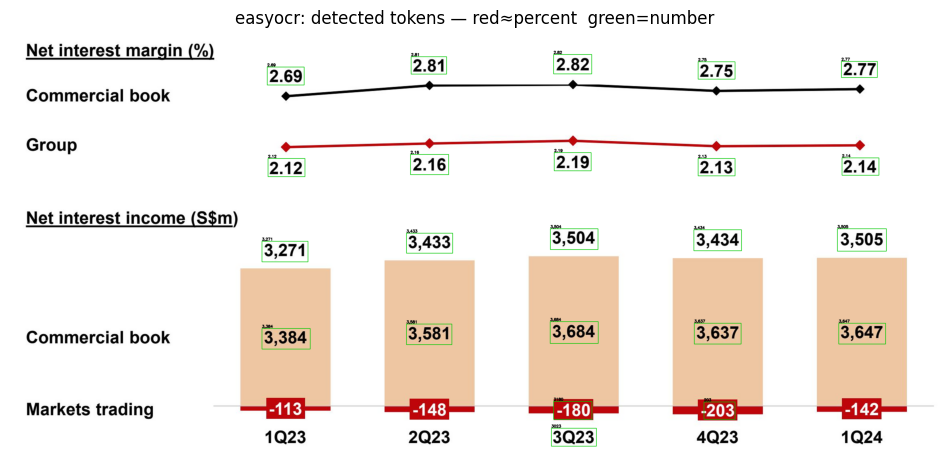

In [40]:
# --- One cell: run EasyOCR on your chart image (simplified) ---
# Works in a notebook. If you just installed packages, restart the kernel once if imports fail.

# --- (A) Installs ---
# Tip: if SSL cert errors happen on macOS, uncomment the certifi block below first.
# import certifi, os
# os.environ["SSL_CERT_FILE"] = certifi.where()
# os.environ["REQUESTS_CA_BUNDLE"] = certifi.where()

%pip -q install easyocr opencv-python-headless pillow matplotlib pandas numpy certifi

# --- (B) Config ---
IMG_PATH = "/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_CFO_presentation/_page_4_Figure_1.jpeg"

# --- (C) Imports & utils ---
import re, math, numpy as np, pandas as pd
from pathlib import Path
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display as _show

NUM_PAT = re.compile(r"^[+-]?\d{1,4}(?:[.,]\d+)?%?$")

def load_image(path):
    p = Path(path)
    if not p.exists():
        raise FileNotFoundError(p)
    im = cv2.imread(str(p))
    if im is None:
        raise RuntimeError("cv2.imread() returned None")
    return im

def preprocess(img_bgr):
    # Upscale + denoise + local contrast + threshold
    scale = 2.0
    img = cv2.resize(img_bgr, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 31, 8)
    return img, gray, thr, scale

def norm_num(s):
    s = s.replace(",", "").strip()
    pct = s.endswith("%")
    if pct: s = s[:-1]
    try:
        return float(s), pct
    except:
        return None, pct

def extract_numbers(ocr_results):
    rows = []
    for r in ocr_results or []:
        txt = str(r["text"]).strip()
        if NUM_PAT.match(txt):
            val, is_pct = norm_num(txt)
            if val is None:
                continue
            x1,y1,x2,y2 = r["bbox"]
            rows.append({
                "raw": txt, "value": val, "is_pct": is_pct, "conf": r.get("conf", None),
                "x1": int(x1), "y1": int(y1), "x2": int(x2), "y2": int(y2),
                "cx": int((x1+x2)/2), "cy": int((y1+y2)/2)
            })
    df = pd.DataFrame(rows).sort_values(["cy","cx"]).reset_index(drop=True)
    if "is_pct" not in df.columns and not df.empty:
        df["is_pct"] = df["raw"].astype(str).str.endswith("%")
    return df

def overlay(img_bgr, df, title="Detections"):
    vis = img_bgr.copy()
    for _, r in (df if isinstance(df, pd.DataFrame) else pd.DataFrame()).iterrows():
        x1,y1,x2,y2 = int(r.x1),int(r.y1),int(r.x2),int(r.y2)
        color = (255,0,0) if bool(r.get("is_pct", False)) else (0,200,0)
        cv2.rectangle(vis, (x1,y1), (x2,y2), color, 2)
        cv2.putText(vis, str(r.raw), (x1, max(12,y1-4)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 2, cv2.LINE_AA)
    plt.figure(figsize=(12,6))
    plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
    plt.axis("off"); plt.title(title); plt.show()

def kmeans_1d(values, k=2, iters=20):
    values = np.asarray(values, dtype=float).reshape(-1,1)
    centers = np.array([values.min(), values.max()]).reshape(k,1)
    for _ in range(iters):
        d = ((values - centers.T)**2)
        labels = d.argmin(axis=1)
        new_centers = np.array([values[labels==i].mean() if np.any(labels==i) else centers[i] for i in range(k)]).reshape(k,1)
        if np.allclose(new_centers, centers, atol=1e-3): break
        centers = new_centers
    return labels, centers.flatten()

# --- (D) Backend wrappers ---
def run_easyocr(img_rgb):
    import easyocr
    rdr = easyocr.Reader(['en'], gpu=False, verbose=False)
    results = rdr.readtext(img_rgb, detail=1, paragraph=False)
    out = []
    for quad, text, conf in results:
        (x1,y1),(x2,y2),(x3,y3),(x4,y4) = quad
        out.append({"bbox": (int(x1),int(y1),int(x3),int(y3)), "text": str(text), "conf": float(conf)})
    return out

# --- (E) Extraction logic specific to your slide layout ---
def extract_series_from_df(df, img_up, backend_name):
    H, W = img_up.shape[:2]
    mid_x = W//2
    # Heuristic bands for right panel
    top_band_min = int(H * 0.38)
    top_band_max = int(H * 0.58)

    pct = df[(df.is_pct==True) & (df.cx > mid_x)].copy()
    nums = df[(df.is_pct==False) & (df.cx > mid_x)].copy()

    # Fallback to detect decimal NIM labels even when '%' is missed
    if pct.empty:
        approx_top = int(H * 0.35)
        cand_pct = df[(df.cx > mid_x) & (df.value.between(1.3, 3.2)) & (df.cy < approx_top)].copy()
        if not cand_pct.empty:
            cand_pct["is_pct"] = True
            pct = cand_pct

    # Split two NIM lines (Commercial vs Group) by vertical clustering (y)
    nim_df = pd.DataFrame()
    if not pct.empty:
        if pct.shape[0] >= 8:
            labels, centers = kmeans_1d(pct["cy"].values, k=2)
            pct["series"] = labels
            order = np.argsort(centers)
            remap = {order[0]:"Commercial NIM (%)", order[1]:"Group NIM (%)"}
            pct["series_name"] = pct["series"].map(remap)
        else:
            pct["series_name"] = "NIM (%)"

        qlabels = ["2Q24","3Q24","4Q24","1Q25","2Q25"]
        rows = []
        for name, sub in pct.groupby("series_name"):
            pick = sub.sort_values("cx").tail(5).sort_values("cx")
            for i, r in enumerate(pick.itertuples(index=False)):
                if i < len(qlabels):
                    rows.append({"Quarter": qlabels[i], "series": name, "value": r.value})
        if rows:
            nim_table = pd.DataFrame(rows)
            nim_df = nim_table.pivot(index="Quarter", columns="series", values="value").reset_index()

    # Net interest income bars (top-right values above beige bars)
    nii_df = pd.DataFrame()
    if not nums.empty:
        band = nums[(nums.value > 500) & (nums.value < 20000) & (nums.cy.between(top_band_min, top_band_max))]
        if band.shape[0] < 5:
            band = nums[(nums.value > 500) & (nums.value < 20000)]
        if not band.empty:
            pick = band.sort_values("cx").tail(5).sort_values("cx").reset_index(drop=True)
            nii_df = pd.DataFrame({
                "Quarter": ["2Q24","3Q24","4Q24","1Q25","2Q25"][:len(pick)],
                "Net interest income ($m)": pick["value"].tolist()
            })

    # Sort quarters chronologically
    def _sort_q(df_in):
        if df_in is None or df_in.empty or "Quarter" not in df_in.columns: return df_in
        order = pd.Categorical(df_in["Quarter"], ["2Q24","3Q24","4Q24","1Q25","2Q25"], ordered=True)
        return df_in.assign(Quarter=order).sort_values("Quarter").reset_index(drop=True)

    nim_df = _sort_q(nim_df)
    nii_df = _sort_q(nii_df)

    # Show per-backend results
    print(f"\n=== Backend: {backend_name} ===")
    if not nim_df.empty:
        print("Extracted NIM (Commercial vs Group):")
        _show(nim_df)
    else:
        print("No NIM table detected.")

    if not nii_df.empty:
        print("Extracted Net interest income ($m):")
        _show(nii_df)
    else:
        print("No Net interest income table detected.")

    # Overlay
    overlay(img_up, df, title=f"{backend_name}: detected tokens — red≈percent  green=number")

    return nim_df, nii_df

# --- (F) Run EasyOCR only ---
img_bgr = load_image(IMG_PATH)
img_up, gray, thr, scale = preprocess(img_bgr)
img_rgb = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)

try:
    ocr = run_easyocr(img_rgb)
    df = extract_numbers(ocr)
    if df.empty:
        print(f"\n=== Backend: easyocr ===\nNo numeric tokens detected.")
    else:
        nim_df, nii_df = extract_series_from_df(df, img_up, "easyocr")
except Exception as e:
    print(f"\n=== Backend: easyocr ===\nERROR → {e}")


In [10]:
# 1. Install the marker library
# This command should be run in your terminal or a Colab cell:
# !pip install marker-pdf -q

# 2. Import necessary components
import subprocess
import shutil
from pathlib import Path
import sys
import hashlib
import re
import cv2
import numpy as np
import pandas as pd

def md5sum(file_path: Path, chunk_size: int = 8192) -> str:
    """Return the hex md5 of a file."""
    h = hashlib.md5()
    with open(file_path, "rb") as f:
        for chunk in iter(lambda: f.read(chunk_size), b""):
            h.update(chunk)
    return h.hexdigest()

# === OCR & extraction helpers (standalone in Untitled-1) ===
NUM_PAT = re.compile(r"^[+-]?\d{1,4}(?:[.,]\d+)?%?$")
RELEVANT_KEYWORDS = ["net interest margin", "net interest income", "nim", "nii"]

def load_image(path):
    p = Path(path)
    im = cv2.imread(str(p))
    if im is None:
        raise RuntimeError(f"cv2.imread() failed: {p}")
    return im

def preprocess(img_bgr):
    scale = 2.0
    img = cv2.resize(img_bgr, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 31, 8)
    return img, gray, thr, scale

def norm_num(s):
    s = s.replace(",", "").strip()
    pct = s.endswith("%")
    if pct:
        s = s[:-1]
    try:
        return float(s), pct
    except:
        return None, pct

def extract_numbers(ocr_results):
    rows = []
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        if NUM_PAT.match(txt):
            val, is_pct = norm_num(txt)
            if val is None:
                continue
            x1,y1,x2,y2 = r["bbox"]
            rows.append({
                "raw": txt, "value": val, "is_pct": is_pct, "conf": r.get("conf", None),
                "x1": int(x1), "y1": int(y1), "x2": int(x2), "y2": int(y2),
                "cx": int((x1+x2)/2), "cy": int((y1+y2)/2)
            })
    df = pd.DataFrame(rows).sort_values(["cy","cx"]).reset_index(drop=True)
    if "is_pct" not in df.columns and not df.empty:
        df["is_pct"] = df["raw"].astype(str).str.endswith("%")
    return df

def kmeans_1d(values, k=2, iters=20):
    values = np.asarray(values, dtype=float).reshape(-1,1)
    centers = np.array([values.min(), values.max()]).reshape(k,1)
    for _ in range(iters):
        d = ((values - centers.T)**2)
        labels = d.argmin(axis=1)
        new_centers = np.array([values[labels==i].mean() if np.any(labels==i) else centers[i] for i in range(k)]).reshape(k,1)
        if np.allclose(new_centers, centers, atol=1e-3):
            break
        centers = new_centers
    return labels, centers.flatten()

def run_easyocr(img_rgb):
    import easyocr
    rdr = easyocr.Reader(['en'], gpu=False, verbose=False)
    results = rdr.readtext(img_rgb, detail=1, paragraph=False)
    out = []
    for quad, text, conf in results:
        (x1,y1),(x2,y2),(x3,y3),(x4,y4) = quad
        out.append({"bbox": (int(x1),int(y1),int(x3),int(y3)), "text": str(text), "conf": float(conf)})
    return out

def extract_series_from_df(df, img_up):
    H, W = img_up.shape[:2]
    mid_x = W//2
    top_band_min = int(H * 0.38)
    top_band_max = int(H * 0.58)

    pct = df[(df.is_pct==True) & (df.cx > mid_x)].copy()
    nums = df[(df.is_pct==False) & (df.cx > mid_x)].copy()

    if pct.empty:
        approx_top = int(H * 0.35)
        cand_pct = df[(df.cx > mid_x) & (df.value.between(1.3, 3.2)) & (df.cy < approx_top)].copy()
        if not cand_pct.empty:
            cand_pct["is_pct"] = True
            pct = cand_pct

    nim_df = pd.DataFrame()
    if not pct.empty:
        if pct.shape[0] >= 8:
            labels, centers = kmeans_1d(pct["cy"].values, k=2)
            pct["series"] = labels
            order = np.argsort(centers)
            remap = {order[0]:"Commercial NIM (%)", order[1]:"Group NIM (%)"}
            pct["series_name"] = pct["series"].map(remap)
        else:
            pct["series_name"] = "NIM (%)"

        qlabels = ["2Q24","3Q24","4Q24","1Q25","2Q25"]
        rows = []
        for name, sub in pct.groupby("series_name"):
            pick = sub.sort_values("cx").tail(5).sort_values("cx")
            for i, r in enumerate(pick.itertuples(index=False)):
                if i < len(qlabels):
                    rows.append({"Quarter": qlabels[i], "series": name, "value": r.value})
        if rows:
            nim_table = pd.DataFrame(rows)
            nim_df = nim_table.pivot(index="Quarter", columns="series", values="value").reset_index()

    nii_df = pd.DataFrame()
    if not nums.empty:
        band = nums[(nums.value > 500) & (nums.value < 20000) & (nums.cy.between(top_band_min, top_band_max))]
        if band.shape[0] < 5:
            band = nums[(nums.value > 500) & (nums.value < 20000)]
        if not band.empty:
            pick = band.sort_values("cx").tail(5).sort_values("cx").reset_index(drop=True)
            nii_df = pd.DataFrame({
                "Quarter": ["2Q24","3Q24","4Q24","1Q25","2Q25"][:len(pick)],
                "Net interest income ($m)": pick["value"].tolist()
            })

    def _sort_q(df_in):
        if df_in is None or df_in.empty or "Quarter" not in df_in.columns:
            return df_in
        order = pd.Categorical(df_in["Quarter"], ["2Q24","3Q24","4Q24","1Q25","2Q25"], ordered=True)
        return df_in.assign(Quarter=order).sort_values("Quarter").reset_index(drop=True)

    return _sort_q(nim_df), _sort_q(nii_df)

def is_relevant_image(img_path):
    """Quick OCR pass to check if an image is relevant by title text."""
    try:
        import easyocr
        rdr = easyocr.Reader(['en'], gpu=False, verbose=False)
        img = cv2.imread(str(img_path))
        if img is None:
            return False
        small = cv2.resize(img, None, fx=0.6, fy=0.6, interpolation=cv2.INTER_AREA)
        results = rdr.readtext(small, detail=0, paragraph=True)
        text = " ".join([t.lower() for t in results])
        return any(k in text for k in RELEVANT_KEYWORDS)
    except Exception:
        return False

def process_image_to_jsonl(img_path: Path):
    """Run EasyOCR → parse series → save nim_df JSONL beside the image (image_stem.jsonl)."""
    img_bgr = load_image(img_path)
    img_up, gray, thr, scale = preprocess(img_bgr)
    img_rgb = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
    ocr = run_easyocr(img_rgb)
    df = extract_numbers(ocr)
    if df.empty:
        return False, "No numeric tokens detected"
    nim_df, nii_df = extract_series_from_df(df, img_up)
    if nim_df is None or nim_df.empty:
        return False, "No NIM table detected"
    out_path = img_path.with_suffix(".jsonl")
    nim_df.to_json(out_path, orient="records", lines=True)
    return True, str(out_path)

# Toggle: if True → normal md5 skip; if False → always reprocess
md5_check = False

# 3. Define the path to the directory containing your PDF files
pdf_directory = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/")

# Check if the directory exists before proceeding
if not pdf_directory.is_dir():
    print(f"❌ ERROR: The directory was not found at '{pdf_directory}'.")
    sys.exit(1) # Exit the script if the directory doesn't exist

# 4. Check if the 'marker_single' command is available
if not shutil.which("marker_single"):
    print("❌ ERROR: The 'marker_single' command was not found.")
    print("Please ensure 'marker-pdf' is installed correctly in your environment's PATH.")
    sys.exit(1)

# Loop through every PDF file in the specified directory
for pdf_path in pdf_directory.glob("*.pdf"):
    print(f"--- Processing file: {pdf_path.name} ---")

    # 5. Let Marker create the <pdf_stem>/ subfolder automatically.
    # Point --output_dir to the *parent* folder so we don't end up with Demo PDF/Demo PDF/.
    output_parent = pdf_path.parent  # e.g., .../Demo/

    # Determine the destination folder Marker will create and a checksum sidecar file
    dest_dir = output_parent / pdf_path.stem
    checksum_file = dest_dir / ".marker_md5"

    # Compute the current md5 of the source PDF
    current_md5 = md5sum(pdf_path)

    # Define the expected main outputs (Marker uses the same stem)
    expected_md = dest_dir / f"{pdf_path.stem}.md"
    expected_json = dest_dir / f"{pdf_path.stem}.json"
    outputs_exist = expected_md.exists() and expected_json.exists()

    # md5 two-mode logic
    if md5_check:
        # Normal: skip if checksum matches and key outputs exist
        if dest_dir.is_dir() and checksum_file.exists() and outputs_exist:
            try:
                saved_md5 = checksum_file.read_text().strip()
            except Exception:
                saved_md5 = ""
            if saved_md5 == current_md5:
                print(f"⏭️  Skipping {pdf_path.name}: up-to-date (md5 match). → {dest_dir}")
                continue
            else:
                print(f"♻️  md5 mismatch → reprocessing {pdf_path.name}")
                print(f"    Cleaning old outputs in: {dest_dir}")
                try:
                    shutil.rmtree(dest_dir)
                except Exception as _e:
                    print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")
        else:
            print("ℹ️  No prior checksum or outputs → processing normally.")
    else:
        # Force reprocess regardless of checksum
        print("⚙️  md5_check=False → forcing reprocess (marker + OCR).")
        if dest_dir.exists():
            print(f"    Cleaning existing folder: {dest_dir}")
            try:
                shutil.rmtree(dest_dir)
            except Exception as _e:
                print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")

    try:
        # ======================================================================
        # 1. Run the CLI command to generate JSON output (with real-time output)
        # ======================================================================
        print(f"Running CLI command for JSON output on {pdf_path.name}...")
        json_command = [
            "marker_single",
            str(pdf_path),
            "--output_format", "json",
            "--output_dir", str(output_parent)
        ]
        # By removing 'capture_output', the subprocess will stream its output directly to the console in real-time.
        result_json = subprocess.run(json_command, check=True)
        print("✅ JSON file generated successfully by CLI.")


        # ======================================================================
        # 2. Run the CLI command to generate Markdown and Image output (with real-time output)
        # ======================================================================
        print(f"\nRunning CLI command for Markdown and Image output on {pdf_path.name}...")
        md_command = [
            "marker_single",
            str(pdf_path),
            # Default format is markdown, so we don't need to specify it
            "--output_dir", str(output_parent)
        ]
        result_md = subprocess.run(md_command, check=True)
        print("✅ Markdown file and images generated successfully by CLI.")

        print(f"\n✨ Files saved under '{output_parent / pdf_path.stem}'.")
        print("Note: Marker creates a subfolder named after the PDF automatically.")

        # === Post-processing: scan Marker images → filter relevant → save JSONL ===
        print("🔎 Scanning extracted images for relevant charts/plots…")
        img_exts = (".png", ".jpg", ".jpeg")
        img_files = [p for p in dest_dir.rglob("*") if p.suffix.lower() in img_exts]
        if not img_files:
            print("   🖼️  No images found in extracted folder.")
        for img_path in sorted(img_files):
            print(f"   • {img_path.name} → relevance check…", end=" ")
            if not is_relevant_image(img_path):
                print("⏭️  Not relevant (No graphs/plots)")
                continue
            print("✅ Relevant — running OCR…", end=" ")
            ok, msg = process_image_to_jsonl(img_path)
            if ok:
                print(f"💾 Saved → {msg}")
            else:
                print(f"⚠️ Skipped ({msg})")

        # After OCR completes, write/update checksum sidecar
        try:
            dest_dir.mkdir(parents=True, exist_ok=True)
            checksum_file.write_text(current_md5)
            print(f"🧾 Recorded checksum in: {checksum_file}")
        except Exception as _e:
            print(f"⚠️  Failed to write checksum file at '{checksum_file}': {_e}")

    except subprocess.CalledProcessError as e:
        print(f"\n❌ An error occurred while processing {pdf_path.name}.")
        print(f"Command: '{' '.join(e.cmd)}'")
        print(f"Return Code: {e.returncode}")
        print("Note: Outputs (if any) may be incomplete; checksum not updated.")
    except Exception as e:
        print(f"\nAn unexpected error occurred while processing {pdf_path.name}: {e}")
    
    print(f"--- Finished processing: {pdf_path.name} ---\n")

print("🎉 All PDF files in the directory have been processed.")


--- Processing file: Demo PDF Merge.pdf ---
⚙️  md5_check=False → forcing reprocess (marker + OCR).
    Cleaning existing folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge
Running CLI command for JSON output on Demo PDF Merge.pdf...


2025-10-30 13:01:24,315 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 11.30it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-30 13:01:39,218 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge
2025-10-30 13:01:39,218 [INFO] marker: Total time: 13.468534708023071


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on Demo PDF Merge.pdf...


2025-10-30 13:01:49,331 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 14.66it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-30 13:02:02,926 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge
2025-10-30 13:02:02,926 [INFO] marker: Total time: 12.607863187789917


✅ Markdown file and images generated successfully by CLI.

✨ Files saved under '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge'.
Note: Marker creates a subfolder named after the PDF automatically.
🔎 Scanning extracted images for relevant charts/plots…
   • _page_0_Figure_2.jpeg → relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Relevant — running OCR… 💾 Saved → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge/_page_0_Figure_2.jsonl
   • _page_1_Figure_3.jpeg → relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant (No graphs/plots)
🧾 Recorded checksum in: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge/.marker_md5
--- Finished processing: Demo PDF Merge.pdf ---

--- Processing file: Demo PDF.pdf ---
⚙️  md5_check=False → forcing reprocess (marker + OCR).
    Cleaning existing folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF
Running CLI command for JSON output on Demo PDF.pdf...


2025-10-30 13:02:36,793 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 16.26it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-30 13:02:45,148 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF
2025-10-30 13:02:45,148 [INFO] marker: Total time: 7.150288105010986


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on Demo PDF.pdf...


2025-10-30 13:02:54,695 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 14.35it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-30 13:03:02,074 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF
2025-10-30 13:03:02,075 [INFO] marker: Total time: 6.619595050811768


✅ Markdown file and images generated successfully by CLI.

✨ Files saved under '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF'.
Note: Marker creates a subfolder named after the PDF automatically.
🔎 Scanning extracted images for relevant charts/plots…
   • _page_0_Figure_3.jpeg → relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant (No graphs/plots)
🧾 Recorded checksum in: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF/.marker_md5
--- Finished processing: Demo PDF.pdf ---

🎉 All PDF files in the directory have been processed.


In [16]:
# 1. Install the marker library
# This command should be run in your terminal or a Colab cell:
# !pip install marker-pdf -q

# 2. Import necessary components
import subprocess
import shutil
from pathlib import Path
import sys
import hashlib
import re
import cv2
import numpy as np
import pandas as pd

def md5sum(file_path: Path, chunk_size: int = 8192) -> str:
    """Return the hex md5 of a file."""
    h = hashlib.md5()
    with open(file_path, "rb") as f:
        for chunk in iter(lambda: f.read(chunk_size), b""):
            h.update(chunk)
    return h.hexdigest()

# === OCR & extraction helpers (standalone in Untitled-1) ===
NUM_PAT = re.compile(r"^[+-]?\d{1,4}(?:[.,]\d+)?%?$")
RELEVANT_KEYWORDS = ["net interest margin", "net interest income", "nim", "nii"]

QUARTER_PAT = re.compile(r"\b([1-4])Q(\d{2}|\d{4})\b", re.IGNORECASE)
# Simpler decade-only pattern for quarters, e.g., 2Q24, 1Q25
QUARTER_SIMPLE_PAT = re.compile(r"\b([1-4])Q(2\d)\b", re.IGNORECASE)  # e.g., 2Q24, 1Q25

# --- Helper: detect quarter tokens from nearby Markdown file ---
def detect_qlabels_from_md(dest_dir: Path, image_name: str) -> list[str]:
    """
    Scan the figure's markdown file for quarter tokens (e.g., 2Q24, 1Q2025).
    Returns tokens in document order (deduped).
    """
    try:
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cand = list(dest_dir.glob("*.md"))
            if not cand:
                return []
            md_file = cand[0]
        text = md_file.read_text(encoding="utf-8", errors="ignore")
    except Exception:
        return []
    # Collect all quarter tokens across the document
    tokens = []
    for m in QUARTER_PAT.finditer(text):
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"
        tokens.append(q)
    # Deduplicate preserving order
    seen = set()
    ordered = []
    for q in tokens:
        if q not in seen:
            seen.add(q)
            ordered.append(q)
    return ordered

def load_image(path):
    p = Path(path)
    im = cv2.imread(str(p))
    if im is None:
        raise RuntimeError(f"cv2.imread() failed: {p}")
    return im

def preprocess(img_bgr):
    scale = 2.0
    img = cv2.resize(img_bgr, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 31, 8)
    return img, gray, thr, scale

def norm_num(s):
    s = s.replace(",", "").strip()
    pct = s.endswith("%")
    if pct:
        s = s[:-1]
    try:
        return float(s), pct
    except:
        return None, pct

def extract_numbers(ocr_results):
    rows = []
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        if NUM_PAT.match(txt):
            val, is_pct = norm_num(txt)
            if val is None:
                continue
            x1,y1,x2,y2 = r["bbox"]
            rows.append({
                "raw": txt, "value": val, "is_pct": is_pct, "conf": r.get("conf", None),
                "x1": int(x1), "y1": int(y1), "x2": int(x2), "y2": int(y2),
                "cx": int((x1+x2)/2), "cy": int((y1+y2)/2)
            })
    df = pd.DataFrame(rows).sort_values(["cy","cx"]).reset_index(drop=True)
    if "is_pct" not in df.columns and not df.empty:
        df["is_pct"] = df["raw"].astype(str).str.endswith("%")
    return df

def kmeans_1d(values, k=2, iters=20):
    values = np.asarray(values, dtype=float).reshape(-1,1)
    centers = np.array([values.min(), values.max()]).reshape(k,1)
    for _ in range(iters):
        d = ((values - centers.T)**2)
        labels = d.argmin(axis=1)
        new_centers = np.array([values[labels==i].mean() if np.any(labels==i) else centers[i] for i in range(k)]).reshape(k,1)
        if np.allclose(new_centers, centers, atol=1e-3):
            break
        centers = new_centers
    return labels, centers.flatten()

def run_easyocr(img_rgb):
    import easyocr
    rdr = easyocr.Reader(['en'], gpu=False, verbose=False)
    results = rdr.readtext(img_rgb, detail=1, paragraph=False)
    out = []
    for quad, text, conf in results:
        (x1,y1),(x2,y2),(x3,y3),(x4,y4) = quad
        out.append({"bbox": (int(x1),int(y1),int(x3),int(y3)), "text": str(text), "conf": float(conf)})
    return out


# --- Helper: detect and order quarter labels from OCR ---
def detect_qlabels(ocr_results, img_width: int) -> list[str]:
    """
    Extract quarter tokens like 1Q25, 2Q2025 from OCR and return them left→right.
    We keep only tokens on the right half (where the series values live in your layout).
    """
    qtokens = []
    mid_x = img_width // 2
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_PAT.search(txt)
        if not m:
            continue
        x1,y1,x2,y2 = r["bbox"]
        cx = (x1 + x2) // 2
        if cx <= mid_x:
            continue  # ignore left panel quarters/titles
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"  # normalize to 1Q25 style
        qtokens.append((cx, q))
    # sort by visual x-position and deduplicate by both text and proximity (ignore near-duplicates)
    qtokens.sort(key=lambda x: x[0])
    # Deduplicate by both text and proximity (ignore near-duplicates)
    ordered = []
    last_x = -9999
    last_q = None
    for x, q in qtokens:
        if last_q == q and abs(x - last_x) < 30:
            continue
        ordered.append(q)
        last_x, last_q = x, q
    return ordered

# === Focused bottom-of-chart scan for small quarter labels ===
def detect_qlabels_bottom(img_bgr) -> list[str]:
    """
    Focused pass: crop the bottom ~30% (where quarter labels usually sit),
    enhance contrast, OCR, and extract quarter tokens left→right.
    """
    try:
        H, W = img_bgr.shape[:2]
        y0 = int(H * 0.70)  # bottom 30%
        crop = img_bgr[y0:H, 0:W]
        # Enhance: grayscale -> bilateral -> CLAHE -> adaptive threshold
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        gray = clahe.apply(gray)
        thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 31, 8)
        # Upscale for small text
        up = cv2.resize(thr, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
        img_rgb = cv2.cvtColor(up, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        # Map bboxes back to global coords: for ordering we only need x
        qtokens = []
        for r in ocr or []:
            txt = str(r.get("text","")).strip()
            m = QUARTER_PAT.search(txt)
            if not m:
                continue
            x1,y1,x2,y2 = r["bbox"]
            # Convert x from upsampled-crop space back to original global space
            cx_local = (x1 + x2) // 2
            cx_global = int(cx_local / 2.0)  # undo scale
            q = f"{m.group(1)}Q{m.group(2)[-2:]}"
            qtokens.append((cx_global, q))
        qtokens.sort(key=lambda x: x[0])
        # Dedup by proximity and text
        ordered = []
        last_x = -9999
        last_q = None
        for x, q in qtokens:
            if last_q == q and abs(x - last_x) < 30:
                continue
            ordered.append(q)
            last_x, last_q = x, q
        return ordered
    except Exception:
        return []

# --- Merge two ordered quarter lists ---
def _merge_ordered(primary: list[str], secondary: list[str]) -> list[str]:
    """
    Merge two left→right sequences, keeping 'primary' order and filling with
    any unseen items from 'secondary' in their order.
    """
    out = list(primary)
    seen = set(primary)
    for q in secondary:
        if q not in seen:
            out.append(q)
            seen.add(q)
    return out

# --- Expand a quarter label like '2Q24' forward n quarters ---
def _expand_quarters(start_q: str, n: int) -> list[str]:
    """
    Given a label like '2Q24', produce a forward sequence of n quarters:
    2Q24, 3Q24, 4Q24, 1Q25, 2Q25, ...
    """
    m = QUARTER_PAT.match(start_q) or QUARTER_SIMPLE_PAT.match(start_q)
    if not m:
        return []
    q = int(m.group(1))
    yy = int(m.group(2)[-2:])
    seq = []
    for _ in range(n):
        seq.append(f"{q}Q{yy:02d}")
        q += 1
        if q == 5:
            q = 1
            yy = (yy + 1) % 100
    return seq

# --- Find a plausible anchor quarter like 2Q24 from OCR or markdown tokens ---
def _anchor_quarter_from_texts(ocr_results, md_tokens: list[str]) -> str | None:
    """
    Find any token like 1Q2x..4Q2x from OCR texts or markdown tokens.
    Returns the first plausible anchor (normalized to e.g. 2Q24) or None.
    """
    # prefer bottom/ocr-derived tokens first (already parsed in detect_qlabels_bottom)
    # fallback: scan all OCR texts with simple pattern
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_SIMPLE_PAT.search(txt)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    # fallback to any markdown token that matches the decade pattern
    for t in md_tokens or []:
        m = QUARTER_SIMPLE_PAT.match(t)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    return None

def extract_series_from_df(df, img_up, ocr_results=None, qlabels_hint=None):
    H, W = img_up.shape[:2]
    mid_x = W//2
    top_band_min = int(H * 0.38)
    top_band_max = int(H * 0.58)

    pct = df[(df.is_pct==True) & (df.cx > mid_x)].copy()
    nums = df[(df.is_pct==False) & (df.cx > mid_x)].copy()

    if pct.empty:
        approx_top = int(H * 0.35)
        cand_pct = df[(df.cx > mid_x) & (df.value.between(1.3, 3.2)) & (df.cy < approx_top)].copy()
        if not cand_pct.empty:
            cand_pct["is_pct"] = True
            pct = cand_pct

    nim_df = pd.DataFrame()
    if not pct.empty:
        if pct.shape[0] >= 8:
            labels, centers = kmeans_1d(pct["cy"].values, k=2)
            pct["series"] = labels
            order = np.argsort(centers)
            remap = {order[0]:"Commercial NIM (%)", order[1]:"Group NIM (%)"}
            pct["series_name"] = pct["series"].map(remap)
        else:
            pct["series_name"] = "NIM (%)"

        # --- Dynamic quarter labels ---
        detected_q_ocr = detect_qlabels(ocr_results or [], W) if ocr_results is not None else []
        detected_q_bot = detect_qlabels_bottom(img_up)
        # Prefer the source with more tokens, but merge to keep any uniques
        if len(detected_q_bot) > len(detected_q_ocr):
            detected_q = _merge_ordered(detected_q_bot, detected_q_ocr)
        else:
            detected_q = _merge_ordered(detected_q_ocr, detected_q_bot)
        rows = []
        for name, sub in pct.groupby("series_name"):
            pick = sub.sort_values("cx").tail(5).sort_values("cx")
            n = len(pick)
            labels = []
            # 1) Prefer OCR-detected quarters (left→right)
            if detected_q:
                # Use the rightmost n (latest) detected quarters to align with right-panel values
                labels = detected_q[-n:] if len(detected_q) >= n else detected_q
            # 2) If insufficient, try markdown-derived hint tokens (document order)
            if (not labels or len(labels) != n) and qlabels_hint:
                labels = qlabels_hint[-n:] if len(qlabels_hint) >= n else qlabels_hint
            # 3) Final fallback: infer a sequence from any anchor like 2Q24
            if not labels or len(labels) != n:
                # Try to infer an anchor quarter from OCR or markdown and expand
                anchor = _anchor_quarter_from_texts(ocr_results, qlabels_hint)
                if anchor:
                    labels = _expand_quarters(anchor, n)
            # 4) If still nothing, use neutral placeholders
            if not labels or len(labels) != n:
                labels = [f"{i+1}Q??" for i in range(n)]
            for i, r in enumerate(pick.itertuples(index=False)):
                rows.append({"Quarter": labels[i], "series": name, "value": r.value})
        if rows:
            nim_table = pd.DataFrame(rows)
            nim_df = nim_table.pivot(index="Quarter", columns="series", values="value").reset_index()

    nii_df = pd.DataFrame()
    if not nums.empty:
        band = nums[(nums.value > 500) & (nums.value < 20000) & (nums.cy.between(top_band_min, top_band_max))]
        if band.shape[0] < 5:
            band = nums[(nums.value > 500) & (nums.value < 20000)]
        if not band.empty:
            pick = band.sort_values("cx").tail(5).sort_values("cx").reset_index(drop=True)
            nii_df = pd.DataFrame({
                "Quarter": ["2Q24","3Q24","4Q24","1Q25","2Q25"][:len(pick)],
                "Net interest income ($m)": pick["value"].tolist()
            })

    def _sort_q(df_in):
        if df_in is None or df_in.empty or "Quarter" not in df_in.columns:
            return df_in
        # Try to sort by numeric (Q#, year) if labels are like 2Q24; else keep input order
        def _key(q):
            m = QUARTER_PAT.match(str(q))
            if not m:
                return (999, 999)
            qn = int(m.group(1))
            yr = int(m.group(2)[-2:])  # last two digits
            return (yr, qn)
        try:
            return df_in.assign(_k=df_in["Quarter"].map(_key)).sort_values("_k").drop(columns=["_k"]).reset_index(drop=True)
        except Exception:
            return df_in.reset_index(drop=True)

    return _sort_q(nim_df), _sort_q(nii_df)

def _extract_md_context(dest_dir: Path, image_name: str) -> dict:
    """
    Best-effort: read the <pdf_stem>.md in dest_dir, find the <image_name> reference,
    capture nearby headings and a neighbor paragraph to build context.
    """
    try:
        # Prefer "<pdf_stem>.md", else any .md
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cands = list(dest_dir.glob("*.md"))
            if not cands:
                return {}
            md_file = cands[0]
        lines = md_file.read_text(encoding="utf-8", errors="ignore").splitlines()
    except Exception:
        return {}

    # Find the image line
    idx = None
    for i, line in enumerate(lines):
        if image_name in line:
            idx = i
            break
    if idx is None:
        return {}

    # Walk upward to find up to two headings and a neighbor paragraph
    figure_title = None
    section_title = None
    neighbor_text = None

    # Find the closest preceding heading(s)
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if not s:
            continue
        # markdown heading levels
        if s.startswith("#"):
            # Remove leading #'s and whitespace
            heading = s.lstrip("#").strip()
            if figure_title is None:
                figure_title = heading
            elif section_title is None:
                section_title = heading
                break

    # Find a non-empty paragraph between the image and last heading
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if s and not s.startswith("#") and not s.startswith("![]("):
            neighbor_text = s
            break

    out = {}
    if figure_title: out["figure_title"] = figure_title
    if section_title: out["section_title"] = section_title
    if neighbor_text: out["neighbor_text"] = neighbor_text
    return out

def _parse_page_and_figure_from_name(image_name: str) -> dict:
    """
    Extract page/figure indices from names like '_page_0_Figure_2.jpeg'.
    """
    info = {}
    try:
        # Very loose parse
        if "_page_" in image_name:
            after = image_name.split("_page_", 1)[1]
            num = after.split("_", 1)[0]
            info["page"] = int(num) + 1  # 1-based for human readability
        if "Figure_" in image_name:
            after = image_name.split("Figure_", 1)[1]
            num = ""
            for ch in after:
                if ch.isdigit():
                    num += ch
                else:
                    break
            if num:
                info["figure_index"] = int(num)
    except Exception:
        pass
    return info

def is_relevant_image(img_path):
    """Quick OCR pass to check if an image is relevant by title text."""
    try:
        import easyocr
        rdr = easyocr.Reader(['en'], gpu=False, verbose=False)
        img = cv2.imread(str(img_path))
        if img is None:
            return False
        small = cv2.resize(img, None, fx=0.6, fy=0.6, interpolation=cv2.INTER_AREA)
        results = rdr.readtext(small, detail=0, paragraph=True)
        text = " ".join([t.lower() for t in results])
        return any(k in text for k in RELEVANT_KEYWORDS)
    except Exception:
        return False

def process_image_to_jsonl(img_path: Path, dest_dir: Path, pdf_name: str):
    """
    Run EasyOCR → parse series → save:
      1) First line: {"_context": {...}} figure-level summary record
      2) Following lines: row records from nim_df
    Output file is placed BESIDE the image: <image_stem>.jsonl
    """
    img_bgr = load_image(img_path)
    img_up, gray, thr, scale = preprocess(img_bgr)
    img_rgb = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
    ocr = run_easyocr(img_rgb)
    df = extract_numbers(ocr)
    if df.empty:
        return False, "No numeric tokens detected"
    md_q = detect_qlabels_from_md(dest_dir, img_path.name)
    nim_df, nii_df = extract_series_from_df(df, img_up, ocr_results=ocr, qlabels_hint=md_q)
    if nim_df is None or nim_df.empty:
        return False, "No NIM table detected"

    out_path = img_path.with_suffix(".jsonl")

    # Build context record
    image_name = img_path.name
    ctx = {
        "source_pdf": pdf_name,
        "image": image_name,
        "units": "percent",
        "entity": "DBS",
        "topic": "Net Interest Margin",
    }
    # Merge page/figure indices if parsable
    ctx.update(_parse_page_and_figure_from_name(image_name))
    # Merge markdown-derived headings/paragraph
    md_ctx = _extract_md_context(dest_dir, image_name)
    if md_ctx:
        ctx.update(md_ctx)
    # One-line natural language summary (very short, based on available columns)
    try:
        cols = [c for c in nim_df.columns if c != "Quarter"]
        # Build a short trend note using first and last row if possible
        if len(nim_df) >= 2 and cols:
            # Prefer detected labels if they look like quarters, else use the first/last present
            def _pick_q(s):
                return s if QUARTER_PAT.match(str(s) or "") else None
            _fq = str(nim_df.iloc[0]["Quarter"])
            _lq = str(nim_df.iloc[-1]["Quarter"])
            first_q = _pick_q(_fq) or (_fq if "??" not in _fq else "start")
            last_q  = _pick_q(_lq) or (_lq if "??" not in _lq else "end")
            pieces = []
            for col in cols[:2]:
                a = nim_df.iloc[0][col]
                b = nim_df.iloc[-1][col]
                if pd.notna(a) and pd.notna(b):
                    pieces.append(f"{col}: {a:.2f}% → {b:.2f}%")
            if pieces:
                ctx["summary"] = f"Figure shows {', '.join(pieces)} from {first_q} to {last_q}."
    except Exception:
        pass

    # Write context and rows
    import json
    with open(out_path, "w", encoding="utf-8") as f:
        f.write(json.dumps({"_context": ctx}, ensure_ascii=False) + "\n")
        for rec in nim_df.to_dict(orient="records"):
            # Add light provenance to each row (kept minimal)
            rec_out = dict(rec)
            rec_out["_meta"] = {"source_pdf": pdf_name, "image": image_name}
            f.write(json.dumps(rec_out, ensure_ascii=False) + "\n")

    return True, str(out_path)

# Toggle: if True → normal md5 skip; if False → always reprocess
md5_check = False

# 3. Define the path to the directory containing your PDF files
pdf_directory = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/")

# Check if the directory exists before proceeding
if not pdf_directory.is_dir():
    print(f"❌ ERROR: The directory was not found at '{pdf_directory}'.")
    sys.exit(1) # Exit the script if the directory doesn't exist

# 4. Check if the 'marker_single' command is available
if not shutil.which("marker_single"):
    print("❌ ERROR: The 'marker_single' command was not found.")
    print("Please ensure 'marker-pdf' is installed correctly in your environment's PATH.")
    sys.exit(1)

# Loop through every PDF file in the specified directory
for pdf_path in pdf_directory.glob("*.pdf"):
    print(f"--- Processing file: {pdf_path.name} ---")

    # 5. Let Marker create the <pdf_stem>/ subfolder automatically.
    # Point --output_dir to the *parent* folder so we don't end up with Demo PDF/Demo PDF/.
    output_parent = pdf_path.parent  # e.g., .../Demo/

    # Determine the destination folder Marker will create and a checksum sidecar file
    dest_dir = output_parent / pdf_path.stem
    checksum_file = dest_dir / ".marker_md5"

    # Compute the current md5 of the source PDF
    current_md5 = md5sum(pdf_path)

    # Define the expected main outputs (Marker uses the same stem)
    expected_md = dest_dir / f"{pdf_path.stem}.md"
    expected_json = dest_dir / f"{pdf_path.stem}.json"
    outputs_exist = expected_md.exists() and expected_json.exists()

    # md5 two-mode logic
    if md5_check:
        # Normal: skip if checksum matches and key outputs exist
        if dest_dir.is_dir() and checksum_file.exists() and outputs_exist:
            try:
                saved_md5 = checksum_file.read_text().strip()
            except Exception:
                saved_md5 = ""
            if saved_md5 == current_md5:
                print(f"⏭️  Skipping {pdf_path.name}: up-to-date (md5 match). → {dest_dir}")
                continue
            else:
                print(f"♻️  md5 mismatch → reprocessing {pdf_path.name}")
                print(f"    Cleaning old outputs in: {dest_dir}")
                try:
                    shutil.rmtree(dest_dir)
                except Exception as _e:
                    print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")
        else:
            print("ℹ️  No prior checksum or outputs → processing normally.")
    else:
        # Force reprocess regardless of checksum
        print("⚙️  md5_check=False → forcing reprocess (marker + OCR).")
        if dest_dir.exists():
            print(f"    Cleaning existing folder: {dest_dir}")
            try:
                shutil.rmtree(dest_dir)
            except Exception as _e:
                print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")

    try:
        # ======================================================================
        # 1. Run the CLI command to generate JSON output (with real-time output)
        # ======================================================================
        print(f"Running CLI command for JSON output on {pdf_path.name}...")
        json_command = [
            "marker_single",
            str(pdf_path),
            "--output_format", "json",
            "--output_dir", str(output_parent)
        ]
        # By removing 'capture_output', the subprocess will stream its output directly to the console in real-time.
        result_json = subprocess.run(json_command, check=True)
        print("✅ JSON file generated successfully by CLI.")


        # ======================================================================
        # 2. Run the CLI command to generate Markdown and Image output (with real-time output)
        # ======================================================================
        print(f"\nRunning CLI command for Markdown and Image output on {pdf_path.name}...")
        md_command = [
            "marker_single",
            str(pdf_path),
            # Default format is markdown, so we don't need to specify it
            "--output_dir", str(output_parent)
        ]
        result_md = subprocess.run(md_command, check=True)
        print("✅ Markdown file and images generated successfully by CLI.")

        print(f"\n✨ Files saved under '{output_parent / pdf_path.stem}'.")
        print("Note: Marker creates a subfolder named after the PDF automatically.")

        # === Post-processing: scan Marker images → filter relevant → save JSONL ===
        print("🔎 Scanning extracted images for relevant charts/plots…")
        img_exts = (".png", ".jpg", ".jpeg")
        img_files = [p for p in dest_dir.rglob("*") if p.suffix.lower() in img_exts]
        if not img_files:
            print("   🖼️  No images found in extracted folder.")
        for img_path in sorted(img_files):
            print(f"   • {img_path.name} → relevance check…", end=" ")
            if not is_relevant_image(img_path):
                print("⏭️  Not relevant (No graphs/plots)")
                continue
            print("✅ Relevant — running OCR…", end=" ")
            ok, msg = process_image_to_jsonl(img_path, dest_dir, pdf_path.name)
            if ok:
                print(f"💾 Saved → {msg}")
            else:
                print(f"⚠️ Skipped ({msg})")

        # After OCR completes, write/update checksum sidecar
        try:
            dest_dir.mkdir(parents=True, exist_ok=True)
            checksum_file.write_text(current_md5)
            print(f"🧾 Recorded checksum in: {checksum_file}")
        except Exception as _e:
            print(f"⚠️  Failed to write checksum file at '{checksum_file}': {_e}")

    except subprocess.CalledProcessError as e:
        print(f"\n❌ An error occurred while processing {pdf_path.name}.")
        print(f"Command: '{' '.join(e.cmd)}'")
        print(f"Return Code: {e.returncode}")
        print("Note: Outputs (if any) may be incomplete; checksum not updated.")
    except Exception as e:
        print(f"\nAn unexpected error occurred while processing {pdf_path.name}: {e}")
    
    print(f"--- Finished processing: {pdf_path.name} ---\n")

print("🎉 All PDF files in the directory have been processed.")


--- Processing file: Demo PDF Merge.pdf ---
⚙️  md5_check=False → forcing reprocess (marker + OCR).
    Cleaning existing folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge
Running CLI command for JSON output on Demo PDF Merge.pdf...


2025-10-30 13:33:19,993 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 12.95it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-30 13:33:33,492 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge
2025-10-30 13:33:33,492 [INFO] marker: Total time: 12.08766508102417


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on Demo PDF Merge.pdf...


2025-10-30 13:33:41,222 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 11.95it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-30 13:33:52,694 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge
2025-10-30 13:33:52,694 [INFO] marker: Total time: 10.853907823562622


✅ Markdown file and images generated successfully by CLI.

✨ Files saved under '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge'.
Note: Marker creates a subfolder named after the PDF automatically.
🔎 Scanning extracted images for relevant charts/plots…
   • _page_0_Figure_2.jpeg → relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Relevant — running OCR… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


💾 Saved → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge/_page_0_Figure_2.jsonl
   • _page_1_Figure_3.jpeg → relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant (No graphs/plots)
🧾 Recorded checksum in: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge/.marker_md5
--- Finished processing: Demo PDF Merge.pdf ---

--- Processing file: Demo PDF.pdf ---
⚙️  md5_check=False → forcing reprocess (marker + OCR).
    Cleaning existing folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF
Running CLI command for JSON output on Demo PDF.pdf...


2025-10-30 13:34:28,476 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 13.37it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-30 13:34:36,482 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF
2025-10-30 13:34:36,482 [INFO] marker: Total time: 6.870627164840698


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on Demo PDF.pdf...


2025-10-30 13:34:46,670 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 14.92it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-30 13:34:54,147 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF
2025-10-30 13:34:54,147 [INFO] marker: Total time: 6.66786003112793


✅ Markdown file and images generated successfully by CLI.

✨ Files saved under '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF'.
Note: Marker creates a subfolder named after the PDF automatically.
🔎 Scanning extracted images for relevant charts/plots…
   • _page_0_Figure_3.jpeg → relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant (No graphs/plots)
🧾 Recorded checksum in: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF/.marker_md5
--- Finished processing: Demo PDF.pdf ---

🎉 All PDF files in the directory have been processed.


## Latest Version

In [17]:
# 1. Install the marker library
# This command should be run in your terminal or a Colab cell:
# !pip install marker-pdf -q

# 2. Import necessary components
import subprocess
import shutil
from pathlib import Path
import sys
import hashlib
import re
import cv2
import numpy as np
import pandas as pd

def md5sum(file_path: Path, chunk_size: int = 8192) -> str:
    """Return the hex md5 of a file."""
    h = hashlib.md5()
    with open(file_path, "rb") as f:
        for chunk in iter(lambda: f.read(chunk_size), b""):
            h.update(chunk)
    return h.hexdigest()

# === OCR & extraction helpers (standalone in Untitled-1) ===
NUM_PAT = re.compile(r"^[+-]?\d{1,4}(?:[.,]\d+)?%?$")
NIM_KEYWORDS = ["net interest margin", "net interest income", "nim", "nii"]

QUARTER_PAT = re.compile(r"\b([1-4])Q(\d{2}|\d{4})\b", re.IGNORECASE)
# Simpler decade-only pattern for quarters, e.g., 2Q24, 1Q25
QUARTER_SIMPLE_PAT = re.compile(r"\b([1-4])Q(2\d)\b", re.IGNORECASE)  # e.g., 2Q24, 1Q25

# --- Helper: detect quarter tokens from nearby Markdown file ---
def detect_qlabels_from_md(dest_dir: Path, image_name: str) -> list[str]:
    """
    Scan the figure's markdown file for quarter tokens (e.g., 2Q24, 1Q2025).
    Returns tokens in document order (deduped).
    """
    try:
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cand = list(dest_dir.glob("*.md"))
            if not cand:
                return []
            md_file = cand[0]
        text = md_file.read_text(encoding="utf-8", errors="ignore")
    except Exception:
        return []
    # Collect all quarter tokens across the document
    tokens = []
    for m in QUARTER_PAT.finditer(text):
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"
        tokens.append(q)
    # Deduplicate preserving order
    seen = set()
    ordered = []
    for q in tokens:
        if q not in seen:
            seen.add(q)
            ordered.append(q)
    return ordered

def load_image(path):
    p = Path(path)
    im = cv2.imread(str(p))
    if im is None:
        raise RuntimeError(f"cv2.imread() failed: {p}")
    return im

def preprocess(img_bgr):
    scale = 2.0
    img = cv2.resize(img_bgr, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 31, 8)
    return img, gray, thr, scale

def norm_num(s):
    s = s.replace(",", "").strip()
    pct = s.endswith("%")
    if pct:
        s = s[:-1]
    try:
        return float(s), pct
    except:
        return None, pct

def extract_numbers(ocr_results):
    rows = []
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        if NUM_PAT.match(txt):
            val, is_pct = norm_num(txt)
            if val is None:
                continue
            x1,y1,x2,y2 = r["bbox"]
            rows.append({
                "raw": txt, "value": val, "is_pct": is_pct, "conf": r.get("conf", None),
                "x1": int(x1), "y1": int(y1), "x2": int(x2), "y2": int(y2),
                "cx": int((x1+x2)/2), "cy": int((y1+y2)/2)
            })
    df = pd.DataFrame(rows).sort_values(["cy","cx"]).reset_index(drop=True)
    if "is_pct" not in df.columns and not df.empty:
        df["is_pct"] = df["raw"].astype(str).str.endswith("%")
    return df

def kmeans_1d(values, k=2, iters=20):
    values = np.asarray(values, dtype=float).reshape(-1,1)
    centers = np.array([values.min(), values.max()]).reshape(k,1)
    for _ in range(iters):
        d = ((values - centers.T)**2)
        labels = d.argmin(axis=1)
        new_centers = np.array([values[labels==i].mean() if np.any(labels==i) else centers[i] for i in range(k)]).reshape(k,1)
        if np.allclose(new_centers, centers, atol=1e-3):
            break
        centers = new_centers
    return labels, centers.flatten()

def run_easyocr(img_rgb):
    import easyocr
    rdr = easyocr.Reader(['en'], gpu=False, verbose=False)
    results = rdr.readtext(img_rgb, detail=1, paragraph=False)
    out = []
    for quad, text, conf in results:
        (x1,y1),(x2,y2),(x3,y3),(x4,y4) = quad
        out.append({"bbox": (int(x1),int(y1),int(x3),int(y3)), "text": str(text), "conf": float(conf)})
    return out


# --- Helper: detect and order quarter labels from OCR ---
def detect_qlabels(ocr_results, img_width: int) -> list[str]:
    """
    Extract quarter tokens like 1Q25, 2Q2025 from OCR and return them left→right.
    We keep only tokens on the right half (where the series values live in your layout).
    """
    qtokens = []
    mid_x = img_width // 2
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_PAT.search(txt)
        if not m:
            continue
        x1,y1,x2,y2 = r["bbox"]
        cx = (x1 + x2) // 2
        if cx <= mid_x:
            continue  # ignore left panel quarters/titles
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"  # normalize to 1Q25 style
        qtokens.append((cx, q))
    # sort by visual x-position and deduplicate by both text and proximity (ignore near-duplicates)
    qtokens.sort(key=lambda x: x[0])
    # Deduplicate by both text and proximity (ignore near-duplicates)
    ordered = []
    last_x = -9999
    last_q = None
    for x, q in qtokens:
        if last_q == q and abs(x - last_x) < 30:
            continue
        ordered.append(q)
        last_x, last_q = x, q
    return ordered

# === Focused bottom-of-chart scan for small quarter labels ===
def detect_qlabels_bottom(img_bgr) -> list[str]:
    """
    Focused pass: crop the bottom ~30% (where quarter labels usually sit),
    enhance contrast, OCR, and extract quarter tokens left→right.
    """
    try:
        H, W = img_bgr.shape[:2]
        y0 = int(H * 0.70)  # bottom 30%
        crop = img_bgr[y0:H, 0:W]
        # Enhance: grayscale -> bilateral -> CLAHE -> adaptive threshold
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        gray = clahe.apply(gray)
        thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 31, 8)
        # Upscale for small text
        up = cv2.resize(thr, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
        img_rgb = cv2.cvtColor(up, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        # Map bboxes back to global coords: for ordering we only need x
        qtokens = []
        for r in ocr or []:
            txt = str(r.get("text","")).strip()
            m = QUARTER_PAT.search(txt)
            if not m:
                continue
            x1,y1,x2,y2 = r["bbox"]
            # Convert x from upsampled-crop space back to original global space
            cx_local = (x1 + x2) // 2
            cx_global = int(cx_local / 2.0)  # undo scale
            q = f"{m.group(1)}Q{m.group(2)[-2:]}"
            qtokens.append((cx_global, q))
        qtokens.sort(key=lambda x: x[0])
        # Dedup by proximity and text
        ordered = []
        last_x = -9999
        last_q = None
        for x, q in qtokens:
            if last_q == q and abs(x - last_x) < 30:
                continue
            ordered.append(q)
            last_x, last_q = x, q
        return ordered
    except Exception:
        return []

# --- Merge two ordered quarter lists ---
def _merge_ordered(primary: list[str], secondary: list[str]) -> list[str]:
    """
    Merge two left→right sequences, keeping 'primary' order and filling with
    any unseen items from 'secondary' in their order.
    """
    out = list(primary)
    seen = set(primary)
    for q in secondary:
        if q not in seen:
            out.append(q)
            seen.add(q)
    return out

# --- Expand a quarter label like '2Q24' forward n quarters ---
def _expand_quarters(start_q: str, n: int) -> list[str]:
    """
    Given a label like '2Q24', produce a forward sequence of n quarters:
    2Q24, 3Q24, 4Q24, 1Q25, 2Q25, ...
    """
    m = QUARTER_PAT.match(start_q) or QUARTER_SIMPLE_PAT.match(start_q)
    if not m:
        return []
    q = int(m.group(1))
    yy = int(m.group(2)[-2:])
    seq = []
    for _ in range(n):
        seq.append(f"{q}Q{yy:02d}")
        q += 1
        if q == 5:
            q = 1
            yy = (yy + 1) % 100
    return seq

# --- Find a plausible anchor quarter like 2Q24 from OCR or markdown tokens ---
def _anchor_quarter_from_texts(ocr_results, md_tokens: list[str]) -> str | None:
    """
    Find any token like 1Q2x..4Q2x from OCR texts or markdown tokens.
    Returns the first plausible anchor (normalized to e.g. 2Q24) or None.
    """
    # prefer bottom/ocr-derived tokens first (already parsed in detect_qlabels_bottom)
    # fallback: scan all OCR texts with simple pattern
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_SIMPLE_PAT.search(txt)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    # fallback to any markdown token that matches the decade pattern
    for t in md_tokens or []:
        m = QUARTER_SIMPLE_PAT.match(t)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    return None

def extract_series_from_df(df, img_up, ocr_results=None, qlabels_hint=None):
    H, W = img_up.shape[:2]
    mid_x = W//2
    top_band_min = int(H * 0.38)
    top_band_max = int(H * 0.58)

    pct = df[(df.is_pct==True) & (df.cx > mid_x)].copy()
    nums = df[(df.is_pct==False) & (df.cx > mid_x)].copy()

    if pct.empty:
        approx_top = int(H * 0.35)
        cand_pct = df[(df.cx > mid_x) & (df.value.between(1.3, 3.2)) & (df.cy < approx_top)].copy()
        if not cand_pct.empty:
            cand_pct["is_pct"] = True
            pct = cand_pct

    nim_df = pd.DataFrame()
    if not pct.empty:
        if pct.shape[0] >= 8:
            labels, centers = kmeans_1d(pct["cy"].values, k=2)
            pct["series"] = labels
            order = np.argsort(centers)
            remap = {order[0]:"Commercial NIM (%)", order[1]:"Group NIM (%)"}
            pct["series_name"] = pct["series"].map(remap)
        else:
            pct["series_name"] = "NIM (%)"

        # --- Dynamic quarter labels ---
        detected_q_ocr = detect_qlabels(ocr_results or [], W) if ocr_results is not None else []
        detected_q_bot = detect_qlabels_bottom(img_up)
        # Prefer the source with more tokens, but merge to keep any uniques
        if len(detected_q_bot) > len(detected_q_ocr):
            detected_q = _merge_ordered(detected_q_bot, detected_q_ocr)
        else:
            detected_q = _merge_ordered(detected_q_ocr, detected_q_bot)
        rows = []
        for name, sub in pct.groupby("series_name"):
            pick = sub.sort_values("cx").tail(5).sort_values("cx")
            n = len(pick)
            labels = []
            # 1) Prefer OCR-detected quarters (left→right)
            if detected_q:
                # Use the rightmost n (latest) detected quarters to align with right-panel values
                labels = detected_q[-n:] if len(detected_q) >= n else detected_q
            # 2) If insufficient, try markdown-derived hint tokens (document order)
            if (not labels or len(labels) != n) and qlabels_hint:
                labels = qlabels_hint[-n:] if len(qlabels_hint) >= n else qlabels_hint
            # 3) Final fallback: infer a sequence from any anchor like 2Q24
            if not labels or len(labels) != n:
                # Try to infer an anchor quarter from OCR or markdown and expand
                anchor = _anchor_quarter_from_texts(ocr_results, qlabels_hint)
                if anchor:
                    labels = _expand_quarters(anchor, n)
            # 4) If still nothing, use neutral placeholders
            if not labels or len(labels) != n:
                labels = [f"{i+1}Q??" for i in range(n)]
            for i, r in enumerate(pick.itertuples(index=False)):
                rows.append({"Quarter": labels[i], "series": name, "value": r.value})
        if rows:
            nim_table = pd.DataFrame(rows)
            nim_df = nim_table.pivot(index="Quarter", columns="series", values="value").reset_index()

    nii_df = pd.DataFrame()
    if not nums.empty:
        band = nums[(nums.value > 500) & (nums.value < 20000) & (nums.cy.between(top_band_min, top_band_max))]
        if band.shape[0] < 5:
            band = nums[(nums.value > 500) & (nums.value < 20000)]
        if not band.empty:
            pick = band.sort_values("cx").tail(5).sort_values("cx").reset_index(drop=True)
            nii_df = pd.DataFrame({
                "Quarter": ["2Q24","3Q24","4Q24","1Q25","2Q25"][:len(pick)],
                "Net interest income ($m)": pick["value"].tolist()
            })

    def _sort_q(df_in):
        if df_in is None or df_in.empty or "Quarter" not in df_in.columns:
            return df_in
        # Try to sort by numeric (Q#, year) if labels are like 2Q24; else keep input order
        def _key(q):
            m = QUARTER_PAT.match(str(q))
            if not m:
                return (999, 999)
            qn = int(m.group(1))
            yr = int(m.group(2)[-2:])  # last two digits
            return (yr, qn)
        try:
            return df_in.assign(_k=df_in["Quarter"].map(_key)).sort_values("_k").drop(columns=["_k"]).reset_index(drop=True)
        except Exception:
            return df_in.reset_index(drop=True)

    return _sort_q(nim_df), _sort_q(nii_df)

def _extract_md_context(dest_dir: Path, image_name: str) -> dict:
    """
    Best-effort: read the <pdf_stem>.md in dest_dir, find the <image_name> reference,
    capture nearby headings and a neighbor paragraph to build context.
    """
    try:
        # Prefer "<pdf_stem>.md", else any .md
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cands = list(dest_dir.glob("*.md"))
            if not cands:
                return {}
            md_file = cands[0]
        lines = md_file.read_text(encoding="utf-8", errors="ignore").splitlines()
    except Exception:
        return {}

    # Find the image line
    idx = None
    for i, line in enumerate(lines):
        if image_name in line:
            idx = i
            break
    if idx is None:
        return {}

    # Walk upward to find up to two headings and a neighbor paragraph
    figure_title = None
    section_title = None
    neighbor_text = None

    # Find the closest preceding heading(s)
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if not s:
            continue
        # markdown heading levels
        if s.startswith("#"):
            # Remove leading #'s and whitespace
            heading = s.lstrip("#").strip()
            if figure_title is None:
                figure_title = heading
            elif section_title is None:
                section_title = heading
                break

    # Find a non-empty paragraph between the image and last heading
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if s and not s.startswith("#") and not s.startswith("![]("):
            neighbor_text = s
            break

    out = {}
    if figure_title: out["figure_title"] = figure_title
    if section_title: out["section_title"] = section_title
    if neighbor_text: out["neighbor_text"] = neighbor_text
    return out

def _parse_page_and_figure_from_name(image_name: str) -> dict:
    """
    Extract page/figure indices from names like '_page_0_Figure_2.jpeg'.
    """
    info = {}
    try:
        # Very loose parse
        if "_page_" in image_name:
            after = image_name.split("_page_", 1)[1]
            num = after.split("_", 1)[0]
            info["page"] = int(num) + 1  # 1-based for human readability
        if "Figure_" in image_name:
            after = image_name.split("Figure_", 1)[1]
            num = ""
            for ch in after:
                if ch.isdigit():
                    num += ch
                else:
                    break
            if num:
                info["figure_index"] = int(num)
    except Exception:
        pass
    return info

def is_relevant_image(img_path, keywords):
    """Quick OCR pass to check if an image is relevant by title text against given keywords."""
    try:
        import easyocr
        rdr = easyocr.Reader(['en'], gpu=False, verbose=False)
        img = cv2.imread(str(img_path))
        if img is None:
            return False
        small = cv2.resize(img, None, fx=0.6, fy=0.6, interpolation=cv2.INTER_AREA)
        results = rdr.readtext(small, detail=0, paragraph=True)
        text = " ".join([t.lower() for t in results])
        return any(k in text for k in keywords)
    except Exception:
        return False


# =============== Pluggable OCR Extractor Framework ===============
class BaseChartExtractor:
    """
    Minimal interface for pluggable chart extractors.
    Implement `is_relevant` and `extract_table`, then call `handle_image(...)`.
    """
    name = "base"
    topic = "Generic Chart"
    units = None
    entity = None
    keywords = []

    def is_relevant(self, img_path: Path) -> bool:
        return is_relevant_image(img_path, self.keywords)

    def extract_table(self, img_path: Path, dest_dir: Path, pdf_name: str):
        """
        Return (df, context_dict) or (None, reason) on failure.
        context_dict will be merged into the _context object.
        """
        raise NotImplementedError

    def _build_context(self, pdf_name: str, img_path: Path, dest_dir: Path, extra: dict | None = None) -> dict:
        ctx = {
            "source_pdf": pdf_name,
            "image": img_path.name,
            "topic": self.topic,
        }
        if self.units:  ctx["units"]  = self.units
        if self.entity: ctx["entity"] = self.entity
        ctx.update(_parse_page_and_figure_from_name(img_path.name))
        md_ctx = _extract_md_context(dest_dir, img_path.name)
        if md_ctx: ctx.update(md_ctx)
        if extra:  ctx.update(extra)
        return ctx

    def _write_jsonl(self, out_path: Path, ctx: dict, df: pd.DataFrame):
        import json
        with open(out_path, "w", encoding="utf-8") as f:
            f.write(json.dumps({"_context": ctx}, ensure_ascii=False) + "\n")
            for rec in df.to_dict(orient="records"):
                rec_out = dict(rec)
                rec_out["_meta"] = {"source_pdf": ctx.get("source_pdf"), "image": ctx.get("image")}
                f.write(json.dumps(rec_out, ensure_ascii=False) + "\n")

    def handle_image(self, img_path: Path, dest_dir: Path, pdf_name: str):
        if not self.is_relevant(img_path):
            return False, "Not relevant"
        df, ctx_extra = self.extract_table(img_path, dest_dir, pdf_name)
        if df is None or df.empty:
            return False, ctx_extra if isinstance(ctx_extra, str) else "No data"
        # Build context and summary if possible
        ctx = self._build_context(pdf_name, img_path, dest_dir, extra=ctx_extra if isinstance(ctx_extra, dict) else {})
        try:
            cols = [c for c in df.columns if c != "Quarter"]
            if len(df) >= 2 and cols:
                def _pick_q(s):
                    return s if QUARTER_PAT.match(str(s) or "") else None
                _fq = str(df.iloc[0]["Quarter"])
                _lq = str(df.iloc[-1]["Quarter"])
                first_q = _pick_q(_fq) or (_fq if "??" not in _fq else "start")
                last_q  = _pick_q(_lq) or (_lq if "??" not in _lq else "end")
                pieces = []
                for col in cols[:2]:
                    a = df.iloc[0][col]
                    b = df.iloc[-1][col]
                    if pd.notna(a) and pd.notna(b):
                        suffix = "%" if "NIM" in col or ctx.get("units") == "percent" else ""
                        pieces.append(f"{col}: {a:.2f}{suffix} → {b:.2f}{suffix}")
                if pieces:
                    ctx["summary"] = f"Figure shows {', '.join(pieces)} from {first_q} to {last_q}."
        except Exception:
            pass
        out_path = img_path.with_suffix(f".{self.name}.jsonl")
        self._write_jsonl(out_path, ctx, df)
        return True, str(out_path)

class NIMExtractor(BaseChartExtractor):
    name = "nim"
    topic = "Net Interest Margin"
    units = "percent"
    entity = "DBS"
    keywords = NIM_KEYWORDS

    def extract_table(self, img_path: Path, dest_dir: Path, pdf_name: str):
        # Reuse the existing pipeline
        img_bgr = load_image(img_path)
        img_up, gray, thr, scale = preprocess(img_bgr)
        img_rgb = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        df_tokens = extract_numbers(ocr)
        if df_tokens.empty:
            return None, "No numeric tokens detected"
        md_q = detect_qlabels_from_md(dest_dir, img_path.name)
        nim_df, _nii_df = extract_series_from_df(df_tokens, img_up, ocr_results=ocr, qlabels_hint=md_q)
        if nim_df is None or nim_df.empty:
            return None, "No NIM table detected"
        return nim_df, {"topic": self.topic, "units": self.units, "entity": self.entity}

# Registry of extractors (add more later)
EXTRACTORS: list[BaseChartExtractor] = [
    NIMExtractor(),
]
# ============= End pluggable extractor framework =============

# Toggle: if True → normal md5 skip; if False → always reprocess
md5_check = False

# 3. Define the path to the directory containing your PDF files
pdf_directory = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/")

# Check if the directory exists before proceeding
if not pdf_directory.is_dir():
    print(f"❌ ERROR: The directory was not found at '{pdf_directory}'.")
    sys.exit(1) # Exit the script if the directory doesn't exist

# 4. Check if the 'marker_single' command is available
if not shutil.which("marker_single"):
    print("❌ ERROR: The 'marker_single' command was not found.")
    print("Please ensure 'marker-pdf' is installed correctly in your environment's PATH.")
    sys.exit(1)

# Loop through every PDF file in the specified directory
for pdf_path in pdf_directory.glob("*.pdf"):
    print(f"--- Processing file: {pdf_path.name} ---")

    # 5. Let Marker create the <pdf_stem>/ subfolder automatically.
    # Point --output_dir to the *parent* folder so we don't end up with Demo PDF/Demo PDF/.
    output_parent = pdf_path.parent  # e.g., .../Demo/

    # Determine the destination folder Marker will create and a checksum sidecar file
    dest_dir = output_parent / pdf_path.stem
    checksum_file = dest_dir / ".marker_md5"

    # Compute the current md5 of the source PDF
    current_md5 = md5sum(pdf_path)

    # Define the expected main outputs (Marker uses the same stem)
    expected_md = dest_dir / f"{pdf_path.stem}.md"
    expected_json = dest_dir / f"{pdf_path.stem}.json"
    outputs_exist = expected_md.exists() and expected_json.exists()

    # md5 two-mode logic
    if md5_check:
        # Normal: skip if checksum matches and key outputs exist
        if dest_dir.is_dir() and checksum_file.exists() and outputs_exist:
            try:
                saved_md5 = checksum_file.read_text().strip()
            except Exception:
                saved_md5 = ""
            if saved_md5 == current_md5:
                print(f"⏭️  Skipping {pdf_path.name}: up-to-date (md5 match). → {dest_dir}")
                continue
            else:
                print(f"♻️  md5 mismatch → reprocessing {pdf_path.name}")
                print(f"    Cleaning old outputs in: {dest_dir}")
                try:
                    shutil.rmtree(dest_dir)
                except Exception as _e:
                    print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")
        else:
            print("ℹ️  No prior checksum or outputs → processing normally.")
    else:
        # Force reprocess regardless of checksum
        print("⚙️  md5_check=False → forcing reprocess (marker + OCR).")
        if dest_dir.exists():
            print(f"    Cleaning existing folder: {dest_dir}")
            try:
                shutil.rmtree(dest_dir)
            except Exception as _e:
                print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")

    try:
        # ======================================================================
        # 1. Run the CLI command to generate JSON output (with real-time output)
        # ======================================================================
        print(f"Running CLI command for JSON output on {pdf_path.name}...")
        json_command = [
            "marker_single",
            str(pdf_path),
            "--output_format", "json",
            "--output_dir", str(output_parent)
        ]
        # By removing 'capture_output', the subprocess will stream its output directly to the console in real-time.
        result_json = subprocess.run(json_command, check=True)
        print("✅ JSON file generated successfully by CLI.")


        # ======================================================================
        # 2. Run the CLI command to generate Markdown and Image output (with real-time output)
        # ======================================================================
        print(f"\nRunning CLI command for Markdown and Image output on {pdf_path.name}...")
        md_command = [
            "marker_single",
            str(pdf_path),
            # Default format is markdown, so we don't need to specify it
            "--output_dir", str(output_parent)
        ]
        result_md = subprocess.run(md_command, check=True)
        print("✅ Markdown file and images generated successfully by CLI.")

        print(f"\n✨ Files saved under '{output_parent / pdf_path.stem}'.")
        print("Note: Marker creates a subfolder named after the PDF automatically.")

        # === Post-processing: scan Marker images → filter relevant → save JSONL ===
        print("🔎 Scanning extracted images for relevant charts/plots…")
        img_exts = (".png", ".jpg", ".jpeg")
        img_files = [p for p in dest_dir.rglob("*") if p.suffix.lower() in img_exts]
        if not img_files:
            print("   🖼️  No images found in extracted folder.")
        for img_path in sorted(img_files):
            print(f"   • {img_path.name}")
            any_hit = False
            for ex in EXTRACTORS:
                print(f"      · [{ex.name}] relevance check…", end=" ")
                if not ex.is_relevant(img_path):
                    print("⏭️  Not relevant")
                    continue
                any_hit = True
                print("✅ Relevant — extracting…", end=" ")
                ok, msg = ex.handle_image(img_path, dest_dir, pdf_path.name)
                if ok:
                    print(f"💾 Saved → {msg}")
                else:
                    print(f"⚠️ Skipped ({msg})")
            if not any_hit:
                print("      ⏭️  No matching extractors for this image.")

        # After OCR completes, write/update checksum sidecar
        try:
            dest_dir.mkdir(parents=True, exist_ok=True)
            checksum_file.write_text(current_md5)
            print(f"🧾 Recorded checksum in: {checksum_file}")
        except Exception as _e:
            print(f"⚠️  Failed to write checksum file at '{checksum_file}': {_e}")

    except subprocess.CalledProcessError as e:
        print(f"\n❌ An error occurred while processing {pdf_path.name}.")
        print(f"Command: '{' '.join(e.cmd)}'")
        print(f"Return Code: {e.returncode}")
        print("Note: Outputs (if any) may be incomplete; checksum not updated.")
    except Exception as e:
        print(f"\nAn unexpected error occurred while processing {pdf_path.name}: {e}")
    
    print(f"--- Finished processing: {pdf_path.name} ---\n")

print("🎉 All PDF files in the directory have been processed.")


--- Processing file: Demo PDF Merge.pdf ---
⚙️  md5_check=False → forcing reprocess (marker + OCR).
    Cleaning existing folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge
Running CLI command for JSON output on Demo PDF Merge.pdf...


2025-10-30 13:40:26,141 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 12.14it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-30 13:40:40,152 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge
2025-10-30 13:40:40,152 [INFO] marker: Total time: 12.379868030548096


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on Demo PDF Merge.pdf...


2025-10-30 13:40:50,384 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-30 13:41:03,625 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge
2025-10-30 13:41:03,625 [INFO] marker: Total time: 12.42951488494873


✅ Markdown file and images generated successfully by CLI.

✨ Files saved under '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge'.
Note: Marker creates a subfolder named after the PDF automatically.
🔎 Scanning extracted images for relevant charts/plots…
   • _page_0_Figure_2.jpeg
      · [nim] relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Relevant — extracting… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


💾 Saved → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge/_page_0_Figure_2.nim.jsonl
   • _page_1_Figure_3.jpeg
      · [nim] relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
🧾 Recorded checksum in: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge/.marker_md5
--- Finished processing: Demo PDF Merge.pdf ---

--- Processing file: Demo PDF.pdf ---
⚙️  md5_check=False → forcing reprocess (marker + OCR).
    Cleaning existing folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF
Running CLI command for JSON output on Demo PDF.pdf...


2025-10-30 13:41:49,606 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 11.98it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-30 13:41:57,708 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF
2025-10-30 13:41:57,709 [INFO] marker: Total time: 6.958008766174316


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on Demo PDF.pdf...


2025-10-30 13:42:07,284 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 13.70it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-30 13:42:15,252 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF
2025-10-30 13:42:15,253 [INFO] marker: Total time: 7.2077717781066895


✅ Markdown file and images generated successfully by CLI.

✨ Files saved under '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF'.
Note: Marker creates a subfolder named after the PDF automatically.
🔎 Scanning extracted images for relevant charts/plots…
   • _page_0_Figure_3.jpeg
      · [nim] relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
🧾 Recorded checksum in: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF/.marker_md5
--- Finished processing: Demo PDF.pdf ---

🎉 All PDF files in the directory have been processed.


In [19]:
# 1. Install the marker library
# This command should be run in your terminal or a Colab cell:
# !pip install marker-pdf -q

# 2. Import necessary components
import subprocess
import shutil
from pathlib import Path
import sys
import hashlib
import re
import cv2
import numpy as np
import pandas as pd

def md5sum(file_path: Path, chunk_size: int = 8192) -> str:
    """Return the hex md5 of a file."""
    h = hashlib.md5()
    with open(file_path, "rb") as f:
        for chunk in iter(lambda: f.read(chunk_size), b""):
            h.update(chunk)
    return h.hexdigest()

def md5_of_folder_inputs(dest_dir: Path) -> str:
    """
    Compute an md5 hash over the extracted inputs in dest_dir.
    Includes only source artifacts likely produced by Marker (md/json/images),
    excludes derived *.jsonl outputs and .marker_md5.
    """
    h = hashlib.md5()
    include_exts = {".md", ".json", ".png", ".jpg", ".jpeg"}
    paths = []
    for p in dest_dir.rglob("*"):
        if p.is_file():
            if p.name == ".marker_md5":
                continue
            if p.suffix.lower() in include_exts:
                paths.append(p)
    # Stable order for deterministic hash
    for p in sorted(paths, key=lambda x: str(x.relative_to(dest_dir))):
        rel = str(p.relative_to(dest_dir)).encode("utf-8")
        try:
            with open(p, "rb") as f:
                data = f.read()
        except Exception:
            data = b""
        h.update(rel + b"\x00" + hashlib.md5(data).hexdigest().encode("utf-8"))
    return h.hexdigest()

# === OCR & extraction helpers (standalone in Untitled-1) ===
NUM_PAT = re.compile(r"^[+-]?\d{1,4}(?:[.,]\d+)?%?$")
NIM_KEYWORDS = ["net interest margin", "net interest income", "nim", "nii"]

QUARTER_PAT = re.compile(r"\b([1-4])Q(\d{2}|\d{4})\b", re.IGNORECASE)
# Simpler decade-only pattern for quarters, e.g., 2Q24, 1Q25
QUARTER_SIMPLE_PAT = re.compile(r"\b([1-4])Q(2\d)\b", re.IGNORECASE)  # e.g., 2Q24, 1Q25

# --- Helper: detect quarter tokens from nearby Markdown file ---
def detect_qlabels_from_md(dest_dir: Path, image_name: str) -> list[str]:
    """
    Scan the figure's markdown file for quarter tokens (e.g., 2Q24, 1Q2025).
    Returns tokens in document order (deduped).
    """
    try:
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cand = list(dest_dir.glob("*.md"))
            if not cand:
                return []
            md_file = cand[0]
        text = md_file.read_text(encoding="utf-8", errors="ignore")
    except Exception:
        return []
    # Collect all quarter tokens across the document
    tokens = []
    for m in QUARTER_PAT.finditer(text):
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"
        tokens.append(q)
    # Deduplicate preserving order
    seen = set()
    ordered = []
    for q in tokens:
        if q not in seen:
            seen.add(q)
            ordered.append(q)
    return ordered

def load_image(path):
    p = Path(path)
    im = cv2.imread(str(p))
    if im is None:
        raise RuntimeError(f"cv2.imread() failed: {p}")
    return im

def preprocess(img_bgr):
    scale = 2.0
    img = cv2.resize(img_bgr, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 31, 8)
    return img, gray, thr, scale

def norm_num(s):
    s = s.replace(",", "").strip()
    pct = s.endswith("%")
    if pct:
        s = s[:-1]
    try:
        return float(s), pct
    except:
        return None, pct

def extract_numbers(ocr_results):
    rows = []
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        if NUM_PAT.match(txt):
            val, is_pct = norm_num(txt)
            if val is None:
                continue
            x1,y1,x2,y2 = r["bbox"]
            rows.append({
                "raw": txt, "value": val, "is_pct": is_pct, "conf": r.get("conf", None),
                "x1": int(x1), "y1": int(y1), "x2": int(x2), "y2": int(y2),
                "cx": int((x1+x2)/2), "cy": int((y1+y2)/2)
            })
    df = pd.DataFrame(rows).sort_values(["cy","cx"]).reset_index(drop=True)
    if "is_pct" not in df.columns and not df.empty:
        df["is_pct"] = df["raw"].astype(str).str.endswith("%")
    return df

def kmeans_1d(values, k=2, iters=20):
    values = np.asarray(values, dtype=float).reshape(-1,1)
    centers = np.array([values.min(), values.max()]).reshape(k,1)
    for _ in range(iters):
        d = ((values - centers.T)**2)
        labels = d.argmin(axis=1)
        new_centers = np.array([values[labels==i].mean() if np.any(labels==i) else centers[i] for i in range(k)]).reshape(k,1)
        if np.allclose(new_centers, centers, atol=1e-3):
            break
        centers = new_centers
    return labels, centers.flatten()

def run_easyocr(img_rgb):
    import easyocr
    rdr = easyocr.Reader(['en'], gpu=False, verbose=False)
    results = rdr.readtext(img_rgb, detail=1, paragraph=False)
    out = []
    for quad, text, conf in results:
        (x1,y1),(x2,y2),(x3,y3),(x4,y4) = quad
        out.append({"bbox": (int(x1),int(y1),int(x3),int(y3)), "text": str(text), "conf": float(conf)})
    return out


# --- Helper: detect and order quarter labels from OCR ---
def detect_qlabels(ocr_results, img_width: int) -> list[str]:
    """
    Extract quarter tokens like 1Q25, 2Q2025 from OCR and return them left→right.
    We keep only tokens on the right half (where the series values live in your layout).
    """
    qtokens = []
    mid_x = img_width // 2
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_PAT.search(txt)
        if not m:
            continue
        x1,y1,x2,y2 = r["bbox"]
        cx = (x1 + x2) // 2
        if cx <= mid_x:
            continue  # ignore left panel quarters/titles
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"  # normalize to 1Q25 style
        qtokens.append((cx, q))
    # sort by visual x-position and deduplicate by both text and proximity (ignore near-duplicates)
    qtokens.sort(key=lambda x: x[0])
    # Deduplicate by both text and proximity (ignore near-duplicates)
    ordered = []
    last_x = -9999
    last_q = None
    for x, q in qtokens:
        if last_q == q and abs(x - last_x) < 30:
            continue
        ordered.append(q)
        last_x, last_q = x, q
    return ordered

# === Focused bottom-of-chart scan for small quarter labels ===
def detect_qlabels_bottom(img_bgr) -> list[str]:
    """
    Focused pass: crop the bottom ~30% (where quarter labels usually sit),
    enhance contrast, OCR, and extract quarter tokens left→right.
    """
    try:
        H, W = img_bgr.shape[:2]
        y0 = int(H * 0.70)  # bottom 30%
        crop = img_bgr[y0:H, 0:W]
        # Enhance: grayscale -> bilateral -> CLAHE -> adaptive threshold
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        gray = clahe.apply(gray)
        thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 31, 8)
        # Upscale for small text
        up = cv2.resize(thr, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
        img_rgb = cv2.cvtColor(up, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        # Map bboxes back to global coords: for ordering we only need x
        qtokens = []
        for r in ocr or []:
            txt = str(r.get("text","")).strip()
            m = QUARTER_PAT.search(txt)
            if not m:
                continue
            x1,y1,x2,y2 = r["bbox"]
            # Convert x from upsampled-crop space back to original global space
            cx_local = (x1 + x2) // 2
            cx_global = int(cx_local / 2.0)  # undo scale
            q = f"{m.group(1)}Q{m.group(2)[-2:]}"
            qtokens.append((cx_global, q))
        qtokens.sort(key=lambda x: x[0])
        # Dedup by proximity and text
        ordered = []
        last_x = -9999
        last_q = None
        for x, q in qtokens:
            if last_q == q and abs(x - last_x) < 30:
                continue
            ordered.append(q)
            last_x, last_q = x, q
        return ordered
    except Exception:
        return []

# --- Merge two ordered quarter lists ---
def _merge_ordered(primary: list[str], secondary: list[str]) -> list[str]:
    """
    Merge two left→right sequences, keeping 'primary' order and filling with
    any unseen items from 'secondary' in their order.
    """
    out = list(primary)
    seen = set(primary)
    for q in secondary:
        if q not in seen:
            out.append(q)
            seen.add(q)
    return out

# --- Expand a quarter label like '2Q24' forward n quarters ---
def _expand_quarters(start_q: str, n: int) -> list[str]:
    """
    Given a label like '2Q24', produce a forward sequence of n quarters:
    2Q24, 3Q24, 4Q24, 1Q25, 2Q25, ...
    """
    m = QUARTER_PAT.match(start_q) or QUARTER_SIMPLE_PAT.match(start_q)
    if not m:
        return []
    q = int(m.group(1))
    yy = int(m.group(2)[-2:])
    seq = []
    for _ in range(n):
        seq.append(f"{q}Q{yy:02d}")
        q += 1
        if q == 5:
            q = 1
            yy = (yy + 1) % 100
    return seq

# --- Find a plausible anchor quarter like 2Q24 from OCR or markdown tokens ---
def _anchor_quarter_from_texts(ocr_results, md_tokens: list[str]) -> str | None:
    """
    Find any token like 1Q2x..4Q2x from OCR texts or markdown tokens.
    Returns the first plausible anchor (normalized to e.g. 2Q24) or None.
    """
    # prefer bottom/ocr-derived tokens first (already parsed in detect_qlabels_bottom)
    # fallback: scan all OCR texts with simple pattern
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_SIMPLE_PAT.search(txt)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    # fallback to any markdown token that matches the decade pattern
    for t in md_tokens or []:
        m = QUARTER_SIMPLE_PAT.match(t)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    return None

def extract_series_from_df(df, img_up, ocr_results=None, qlabels_hint=None):
    H, W = img_up.shape[:2]
    mid_x = W//2
    top_band_min = int(H * 0.38)
    top_band_max = int(H * 0.58)

    pct = df[(df.is_pct==True) & (df.cx > mid_x)].copy()
    nums = df[(df.is_pct==False) & (df.cx > mid_x)].copy()

    if pct.empty:
        approx_top = int(H * 0.35)
        cand_pct = df[(df.cx > mid_x) & (df.value.between(1.3, 3.2)) & (df.cy < approx_top)].copy()
        if not cand_pct.empty:
            cand_pct["is_pct"] = True
            pct = cand_pct
            
    # --- Detect quarter labels once (OCR full + bottom crop), reusable below ---
    detected_q_ocr = detect_qlabels(ocr_results or [], W) if ocr_results is not None else []
    detected_q_bot = detect_qlabels_bottom(img_up)
    # Prefer the source with more tokens, but merge to keep any uniques
    if len(detected_q_bot) > len(detected_q_ocr):
        detected_q = _merge_ordered(detected_q_bot, detected_q_ocr)
    else:
        detected_q = _merge_ordered(detected_q_ocr, detected_q_bot)

    nim_df = pd.DataFrame()
    if not pct.empty:
        if pct.shape[0] >= 8:
            labels, centers = kmeans_1d(pct["cy"].values, k=2)
            pct["series"] = labels
            order = np.argsort(centers)
            remap = {order[0]: "Commercial NIM (%)", order[1]: "Group NIM (%)"}
            pct["series_name"] = pct["series"].map(remap)
        else:
            pct["series_name"] = "NIM (%)"

        rows = []
        for name, sub in pct.groupby("series_name"):
            pick = sub.sort_values("cx").tail(5).sort_values("cx").reset_index(drop=True)
            n = len(pick)
            # Choose quarter labels: detected OCR → markdown hint → anchor expansion → placeholders
            labels = []
            if detected_q:
                labels = detected_q[-n:] if len(detected_q) >= n else detected_q
            if (not labels or len(labels) != n) and qlabels_hint:
                labels = qlabels_hint[-n:] if len(qlabels_hint) >= n else qlabels_hint
            if not labels or len(labels) != n:
                anchor = _anchor_quarter_from_texts(ocr_results, qlabels_hint)
                if anchor:
                    labels = _expand_quarters(anchor, n)
            if not labels or len(labels) != n:
                labels = [f"{i+1}Q??" for i in range(n)]

            for i, r in enumerate(pick.itertuples(index=False)):
                rows.append({"Quarter": labels[i], "series": name, "value": r.value})

        if rows:
            nim_df = pd.DataFrame(rows)
            nim_df = nim_df.pivot_table(index="Quarter", columns="series", values="value", aggfunc="first").reset_index()
            # Make column order stable: Quarter first, then sorted series names
            cols = ["Quarter"] + sorted([c for c in nim_df.columns if c != "Quarter"])
            nim_df = nim_df[cols]

    # NIM-only mode: skip NII extraction entirely
    nii_df = pd.DataFrame()

    def _sort_q(df_in):
        if df_in is None or df_in.empty or "Quarter" not in df_in.columns:
            return df_in
        # Try to sort by numeric (Q#, year) if labels are like 2Q24; else keep input order
        def _key(q):
            m = QUARTER_PAT.match(str(q))
            if not m:
                return (999, 999)
            qn = int(m.group(1))
            yr = int(m.group(2)[-2:])  # last two digits
            return (yr, qn)
        try:
            return df_in.assign(_k=df_in["Quarter"].map(_key)).sort_values("_k").drop(columns=["_k"]).reset_index(drop=True)
        except Exception:
            return df_in.reset_index(drop=True)

    return _sort_q(nim_df), _sort_q(nii_df)



def _extract_md_context(dest_dir: Path, image_name: str) -> dict:
    """
    Best-effort: read the <pdf_stem>.md in dest_dir, find the <image_name> reference,
    capture nearby headings and a neighbor paragraph to build context.
    """
    try:
        # Prefer "<pdf_stem>.md", else any .md
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cands = list(dest_dir.glob("*.md"))
            if not cands:
                return {}
            md_file = cands[0]
        lines = md_file.read_text(encoding="utf-8", errors="ignore").splitlines()
    except Exception:
        return {}

    # Find the image line
    idx = None
    for i, line in enumerate(lines):
        if image_name in line:
            idx = i
            break
    if idx is None:
        return {}

    # Walk upward to find up to two headings and a neighbor paragraph
    figure_title = None
    section_title = None
    neighbor_text = None

    # Find the closest preceding heading(s)
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if not s:
            continue
        # markdown heading levels
        if s.startswith("#"):
            # Remove leading #'s and whitespace
            heading = s.lstrip("#").strip()
            if figure_title is None:
                figure_title = heading
            elif section_title is None:
                section_title = heading
                break

    # Find a non-empty paragraph between the image and last heading
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if s and not s.startswith("#") and not s.startswith("![]("):
            neighbor_text = s
            break

    out = {}
    if figure_title: out["figure_title"] = figure_title
    if section_title: out["section_title"] = section_title
    if neighbor_text: out["neighbor_text"] = neighbor_text
    return out

def _parse_page_and_figure_from_name(image_name: str) -> dict:
    """
    Extract page/figure indices from names like '_page_0_Figure_2.jpeg'.
    """
    info = {}
    try:
        # Very loose parse
        if "_page_" in image_name:
            after = image_name.split("_page_", 1)[1]
            num = after.split("_", 1)[0]
            info["page"] = int(num) + 1  # 1-based for human readability
        if "Figure_" in image_name:
            after = image_name.split("Figure_", 1)[1]
            num = ""
            for ch in after:
                if ch.isdigit():
                    num += ch
                else:
                    break
            if num:
                info["figure_index"] = int(num)
    except Exception:
        pass
    return info

def is_relevant_image(img_path, keywords):
    """Quick OCR pass to check if an image is relevant by title text against given keywords."""
    try:
        import easyocr
        rdr = easyocr.Reader(['en'], gpu=False, verbose=False)
        img = cv2.imread(str(img_path))
        if img is None:
            return False
        small = cv2.resize(img, None, fx=0.6, fy=0.6, interpolation=cv2.INTER_AREA)
        results = rdr.readtext(small, detail=0, paragraph=True)
        text = " ".join([t.lower() for t in results])
        return any(k in text for k in keywords)
    except Exception:
        return False


# =============== Pluggable OCR Extractor Framework ===============
class BaseChartExtractor:
    """
    Minimal interface for pluggable chart extractors.
    Implement `is_relevant` and `extract_table`, then call `handle_image(...)`.
    """
    name = "base"
    topic = "Generic Chart"
    units = None
    entity = None
    keywords = []

    def is_relevant(self, img_path: Path) -> bool:
        return is_relevant_image(img_path, self.keywords)

    def extract_table(self, img_path: Path, dest_dir: Path, pdf_name: str):
        """
        Return (df, context_dict) or (None, reason) on failure.
        context_dict will be merged into the _context object.
        """
        raise NotImplementedError

    def _build_context(self, pdf_name: str, img_path: Path, dest_dir: Path, extra: dict | None = None) -> dict:
        ctx = {
            "source_pdf": pdf_name,
            "image": img_path.name,
            "topic": self.topic,
        }
        if self.units:  ctx["units"]  = self.units
        if self.entity: ctx["entity"] = self.entity
        ctx.update(_parse_page_and_figure_from_name(img_path.name))
        md_ctx = _extract_md_context(dest_dir, img_path.name)
        if md_ctx: ctx.update(md_ctx)
        if extra:  ctx.update(extra)
        return ctx

    def _write_jsonl(self, out_path: Path, ctx: dict, df: pd.DataFrame):
        import json
        with open(out_path, "w", encoding="utf-8") as f:
            f.write(json.dumps({"_context": ctx}, ensure_ascii=False) + "\n")
            for rec in df.to_dict(orient="records"):
                rec_out = dict(rec)
                rec_out["_meta"] = {"source_pdf": ctx.get("source_pdf"), "image": ctx.get("image")}
                f.write(json.dumps(rec_out, ensure_ascii=False) + "\n")

    def handle_image(self, img_path: Path, dest_dir: Path, pdf_name: str):
        if not self.is_relevant(img_path):
            return False, "Not relevant"
        df, ctx_extra = self.extract_table(img_path, dest_dir, pdf_name)
        if df is None or df.empty:
            return False, ctx_extra if isinstance(ctx_extra, str) else "No data"
        # Build context and summary if possible
        ctx = self._build_context(pdf_name, img_path, dest_dir, extra=ctx_extra if isinstance(ctx_extra, dict) else {})
        try:
            cols = [c for c in df.columns if c != "Quarter"]
            if len(df) >= 2 and cols:
                def _pick_q(s):
                    return s if QUARTER_PAT.match(str(s) or "") else None
                _fq = str(df.iloc[0]["Quarter"])
                _lq = str(df.iloc[-1]["Quarter"])
                first_q = _pick_q(_fq) or (_fq if "??" not in _fq else "start")
                last_q  = _pick_q(_lq) or (_lq if "??" not in _lq else "end")
                pieces = []
                for col in cols[:2]:
                    a = df.iloc[0][col]
                    b = df.iloc[-1][col]
                    if pd.notna(a) and pd.notna(b):
                        suffix = "%" if "NIM" in col or ctx.get("units") == "percent" else ""
                        pieces.append(f"{col}: {a:.2f}{suffix} → {b:.2f}{suffix}")
                if pieces:
                    ctx["summary"] = f"Figure shows {', '.join(pieces)} from {first_q} to {last_q}."
        except Exception:
            pass
        out_path = img_path.with_suffix(f".{self.name}.jsonl")
        self._write_jsonl(out_path, ctx, df)
        return True, str(out_path)

class NIMExtractor(BaseChartExtractor):
    name = "nim"
    topic = "Net Interest Margin"
    units = "percent"
    entity = "DBS"
    keywords = NIM_KEYWORDS

    def extract_table(self, img_path: Path, dest_dir: Path, pdf_name: str):
        # Reuse the existing pipeline
        img_bgr = load_image(img_path)
        img_up, gray, thr, scale = preprocess(img_bgr)
        img_rgb = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        df_tokens = extract_numbers(ocr)
        if df_tokens.empty:
            return None, "No numeric tokens detected"
        md_q = detect_qlabels_from_md(dest_dir, img_path.name)
        nim_df, _nii_df = extract_series_from_df(df_tokens, img_up, ocr_results=ocr, qlabels_hint=md_q)
        if nim_df is None or nim_df.empty:
            return None, "No NIM table detected"
        return nim_df, {"topic": self.topic, "units": self.units, "entity": self.entity}

# Registry of extractors (add more later)
EXTRACTORS: list[BaseChartExtractor] = [
    NIMExtractor(),
]
# ============= End pluggable extractor framework =============

# Toggle: if True → normal md5 skip; if False → always reprocess
md5_check = False

process_existing_only = True


# 3. Define the path to the directory containing your PDF files
pdf_directory = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/")

# Check if the directory exists before proceeding
if not pdf_directory.is_dir():
    print(f"❌ ERROR: The directory was not found at '{pdf_directory}'.")
    sys.exit(1) # Exit the script if the directory doesn't exist


# 4. Check if the 'marker_single' command is available (only when running Marker)
if not process_existing_only:
    if not shutil.which("marker_single"):
        print("❌ ERROR: The 'marker_single' command was not found.")
        print("Please ensure 'marker-pdf' is installed correctly in your environment's PATH, or set process_existing_only=True.")
        sys.exit(1)
        
if process_existing_only:
    print("🛠️  process_existing_only=True → Skipping Marker. Scanning existing extracted folders…")
    # Iterate subfolders under pdf_directory (each should be a per-PDF extraction folder)
    for dest_dir in sorted([p for p in pdf_directory.iterdir() if p.is_dir()]):
        pdf_name_guess = f"{dest_dir.name}.pdf"
        print(f"--- Processing extracted folder: {dest_dir} (as {pdf_name_guess}) ---")
        checksum_file = dest_dir / ".marker_md5"

        # Scan images and run all registered extractors
        img_exts = (".png", ".jpg", ".jpeg")
        img_files = [p for p in dest_dir.rglob("*") if p.suffix.lower() in img_exts]
        if not img_files:
            print("   🖼️  No images found in extracted folder.")
        for img_path in sorted(img_files):
            print(f"   • {img_path.name}")
            any_hit = False
            for ex in EXTRACTORS:
                print(f"      · [{ex.name}] relevance check…", end=" ")
                if not ex.is_relevant(img_path):
                    print("⏭️  Not relevant")
                    continue
                any_hit = True
                print("✅ Relevant — extracting…", end=" ")
                ok, msg = ex.handle_image(img_path, dest_dir, pdf_name_guess)
                if ok:
                    print(f"💾 Saved → {msg}")
                else:
                    print(f"⚠️ Skipped ({msg})")
            if not any_hit:
                print("      ⏭️  No matching extractors for this image.")

        # After OCR completes for this folder, write/update checksum sidecar based on folder inputs
        try:
            checksum = md5_of_folder_inputs(dest_dir)
            checksum_file.write_text(checksum)
            print(f"🧾 Recorded folder checksum in: {checksum_file}")
        except Exception as _e:
            print(f"⚠️  Failed to write checksum file at '{checksum_file}': {_e}")

        print(f"--- Finished extracted folder: {dest_dir.name} ---\n")

    print("🎉 All extracted folders in the directory have been processed.")
    sys.exit(0)
    
# Loop through every PDF file in the specified directory
for pdf_path in pdf_directory.glob("*.pdf"):
    print(f"--- Processing file: {pdf_path.name} ---")

    # 5. Let Marker create the <pdf_stem>/ subfolder automatically.
    # Point --output_dir to the *parent* folder so we don't end up with Demo PDF/Demo PDF/.
    output_parent = pdf_path.parent  # e.g., .../Demo/

    # Determine the destination folder Marker will create and a checksum sidecar file
    dest_dir = output_parent / pdf_path.stem
    checksum_file = dest_dir / ".marker_md5"

    # Compute the current md5 of the source PDF
    current_md5 = md5sum(pdf_path)

    # Define the expected main outputs (Marker uses the same stem)
    expected_md = dest_dir / f"{pdf_path.stem}.md"
    expected_json = dest_dir / f"{pdf_path.stem}.json"
    outputs_exist = expected_md.exists() and expected_json.exists()

    # md5 two-mode logic
    if md5_check:
        # Normal: skip if checksum matches and key outputs exist
        if dest_dir.is_dir() and checksum_file.exists() and outputs_exist:
            try:
                saved_md5 = checksum_file.read_text().strip()
            except Exception:
                saved_md5 = ""
            if saved_md5 == current_md5:
                print(f"⏭️  Skipping {pdf_path.name}: up-to-date (md5 match). → {dest_dir}")
                continue
            else:
                print(f"♻️  md5 mismatch → reprocessing {pdf_path.name}")
                print(f"    Cleaning old outputs in: {dest_dir}")
                try:
                    shutil.rmtree(dest_dir)
                except Exception as _e:
                    print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")
        else:
            print("ℹ️  No prior checksum or outputs → processing normally.")
    else:
        # Force reprocess regardless of checksum
        print("⚙️  md5_check=False → forcing reprocess (marker + OCR).")
        if dest_dir.exists():
            print(f"    Cleaning existing folder: {dest_dir}")
            try:
                shutil.rmtree(dest_dir)
            except Exception as _e:
                print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")

    try:
        # ======================================================================
        # 1. Run the CLI command to generate JSON output (with real-time output)
        # ======================================================================
        print(f"Running CLI command for JSON output on {pdf_path.name}...")
        json_command = [
            "marker_single",
            str(pdf_path),
            "--output_format", "json",
            "--output_dir", str(output_parent)
        ]
        # By removing 'capture_output', the subprocess will stream its output directly to the console in real-time.
        result_json = subprocess.run(json_command, check=True)
        print("✅ JSON file generated successfully by CLI.")


        # ======================================================================
        # 2. Run the CLI command to generate Markdown and Image output (with real-time output)
        # ======================================================================
        print(f"\nRunning CLI command for Markdown and Image output on {pdf_path.name}...")
        md_command = [
            "marker_single",
            str(pdf_path),
            # Default format is markdown, so we don't need to specify it
            "--output_dir", str(output_parent)
        ]
        result_md = subprocess.run(md_command, check=True)
        print("✅ Markdown file and images generated successfully by CLI.")

        print(f"\n✨ Files saved under '{output_parent / pdf_path.stem}'.")
        print("Note: Marker creates a subfolder named after the PDF automatically.")

        # === Post-processing: scan Marker images → filter relevant → save JSONL ===
        print("🔎 Scanning extracted images for relevant charts/plots…")
        img_exts = (".png", ".jpg", ".jpeg")
        img_files = [p for p in dest_dir.rglob("*") if p.suffix.lower() in img_exts]
        if not img_files:
            print("   🖼️  No images found in extracted folder.")
        for img_path in sorted(img_files):
            print(f"   • {img_path.name}")
            any_hit = False
            for ex in EXTRACTORS:
                print(f"      · [{ex.name}] relevance check…", end=" ")
                if not ex.is_relevant(img_path):
                    print("⏭️  Not relevant")
                    continue
                any_hit = True
                print("✅ Relevant — extracting…", end=" ")
                ok, msg = ex.handle_image(img_path, dest_dir, pdf_path.name)
                if ok:
                    print(f"💾 Saved → {msg}")
                else:
                    print(f"⚠️ Skipped ({msg})")
            if not any_hit:
                print("      ⏭️  No matching extractors for this image.")

        # After OCR completes, write/update checksum sidecar
        try:
            dest_dir.mkdir(parents=True, exist_ok=True)
            checksum_file.write_text(current_md5)
            print(f"🧾 Recorded checksum in: {checksum_file}")
        except Exception as _e:
            print(f"⚠️  Failed to write checksum file at '{checksum_file}': {_e}")

    except subprocess.CalledProcessError as e:
        print(f"\n❌ An error occurred while processing {pdf_path.name}.")
        print(f"Command: '{' '.join(e.cmd)}'")
        print(f"Return Code: {e.returncode}")
        print("Note: Outputs (if any) may be incomplete; checksum not updated.")
    except Exception as e:
        print(f"\nAn unexpected error occurred while processing {pdf_path.name}: {e}")
    
    print(f"--- Finished processing: {pdf_path.name} ---\n")

print("🎉 All PDF files in the directory have been processed.")


🛠️  process_existing_only=True → Skipping Marker. Scanning existing extracted folders…
--- Processing extracted folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_CEO_presentation (as 1Q24_CEO_presentation.pdf) ---
   • _page_0_Picture_0.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_1_Picture_8.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_2_Picture_10.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_3_Picture_11.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_4_Picture_9.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_5_Picture_0.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
🧾 Recorded folde

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Relevant — extracting… ⚠️ Skipped (No NIM table detected)
   • _page_4_Figure_1.jpeg
      · [nim] relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Relevant — extracting… 💾 Saved → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_CFO_presentation/_page_4_Figure_1.nim.jsonl
   • _page_4_Picture_2.jpeg
      · [nim] relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_5_Figure_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_5_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_6_Picture_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_6_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_7_Figure_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_7_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_8_Figure_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_8_Picture_2.jpeg
      · [nim] relevance check… ⏭️ 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Relevant — extracting… 💾 Saved → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q25_CFO_presentation/_page_3_Figure_1.nim.jsonl
   • _page_4_Figure_1.jpeg
      · [nim] relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Relevant — extracting… 💾 Saved → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q25_CFO_presentation/_page_4_Figure_1.nim.jsonl
   • _page_5_Figure_1.jpeg
      · [nim] relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_5_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_5_Picture_3.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_6_Figure_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_6_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_7_Picture_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_7_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_8_Picture_1.jpeg
      · [nim] relevance check… ✅ Relevant — extracting… ⚠️ Skipped (No NIM table detected)
   • _page_8_Picture_2.jpeg
      · [nim] relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_9_Picture_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_9_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
🧾 Recorded folder checksum in: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q25_CFO_presentation/.marker_md5
--- Finished extracted folder: 1Q25_CFO_presentation ---

--- Processing extracted folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q25_trading_update (as 1Q25_trading_update.pdf) ---
   • _page_0_Picture_0.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_1_Picture_0.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_2_Picture_0.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for th

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_15_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_16_Picture_3.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_17_Figure_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_17_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_18_Figure_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_18_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_19_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_19_Picture_3.jpeg
      · [nim] relevance c

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_28_Picture_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_28_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_29_Picture_0.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_2_Figure_1.jpeg
      · [nim] relevance check… ✅ Relevant — extracting… 💾 Saved → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_CFO_presentation/_page_2_Figure_1.nim.jsonl
   • _page_4_Figure_1.jpeg
      · [nim] relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Relevant — extracting… 💾 Saved → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_CFO_presentation/_page_4_Figure_1.nim.jsonl
   • _page_5_Figure_1.jpeg
      · [nim] relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Relevant — extracting… 💾 Saved → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_CFO_presentation/_page_5_Figure_1.nim.jsonl
   • _page_6_Figure_1.jpeg
      · [nim] relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_6_Picture_5.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_6_Picture_6.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_7_Picture_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_7_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_8_Figure_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_8_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_9_Picture_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_9_Picture_2.jpeg
      · [nim] relevance check… ⏭

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Relevant — extracting… 💾 Saved → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_CFO_presentation/_page_5_Figure_1.nim.jsonl
   • _page_6_Figure_1.jpeg
      · [nim] relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_6_Picture_5.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_7_Figure_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_7_Picture_5.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_7_Picture_6.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_9_Picture_1.jpeg
      · [nim] relevance check… ✅ Relevant — extracting… ⚠️ Skipped (No NIM table detected)
   • _page_9_Picture_2.jpeg
      · [nim] relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
🧾 Recorded folder checksum in: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_CFO_presentation/.marker_md5
--- Finished extracted folder: 2Q25_CFO_presentation ---

--- Processing extracted folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_performance_summary (as 2Q25_performance_summary.pdf) ---
   • _page_0_Picture_0.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_1_Picture_0.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
🧾 Recorded folder checksum in: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_performance_summary/.marker_md5
--- Finished extracted folder: 2Q25_performance_summary ---

--- Processing extracted folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_press_statement (as 2Q25_press_statement.pdf) ---
   • _page_0_Picture_0.jpeg


/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_13_Figure_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_13_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_14_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_15_Picture_3.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_16_Figure_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_16_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_17_Figure_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_17_Picture_2.jpeg
      · [nim] relevance ch

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Relevant — extracting… 💾 Saved → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/3Q24_CFO_presentation/_page_5_Figure_1.nim.jsonl
   • _page_6_Figure_1.jpeg
      · [nim] relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Relevant — extracting… 💾 Saved → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/3Q24_CFO_presentation/_page_6_Figure_1.nim.jsonl
   • _page_7_Figure_1.jpeg
      · [nim] relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Relevant — extracting… 💾 Saved → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/3Q24_CFO_presentation/_page_7_Figure_1.nim.jsonl
   • _page_8_Figure_1.jpeg
      · [nim] relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_8_Picture_6.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_9_Figure_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_9_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
🧾 Recorded folder checksum in: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/3Q24_CFO_presentation/.marker_md5
--- Finished extracted folder: 3Q24_CFO_presentation ---

--- Processing extracted folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/3Q24_trading_update (as 3Q24_trading_update.pdf) ---
   • _page_0_Picture_0.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_1_Picture_0.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for thi

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_13_Picture_4.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_14_Picture_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_14_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_15_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_16_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_17_Picture_3.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_18_Figure_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_18_Picture_2.jpeg
      · [nim] relevance 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Relevant — extracting… 💾 Saved → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_CFO_presentation/_page_3_Figure_6.nim.jsonl
   • _page_5_Figure_1.jpeg
      · [nim] relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Relevant — extracting… 💾 Saved → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_CFO_presentation/_page_5_Figure_1.nim.jsonl
   • _page_6_Figure_1.jpeg
      · [nim] relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_6_Picture_5.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_6_Picture_6.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_7_Figure_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_7_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_8_Figure_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_8_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_9_Picture_1.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_9_Picture_2.jpeg
      · [nim] relevance check… ⏭️

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Relevant — extracting… 💾 Saved → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/dbs-annual-report-2022/_page_14_Figure_10.nim.jsonl
   • _page_14_Figure_11.jpeg
      · [nim] relevance check… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_14_Figure_12.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_14_Figure_27.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_15_Figure_44.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_15_Figure_47.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_15_Figure_51.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_15_Figure_54.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_16_Figure_11.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_16_Figure_17.jpeg
      · [nim] relevance

KeyError: 'cy'

Skipping MD5 generated folders (Marker Disabled, Continuing On)

In [21]:
# 1. Install the marker library
# This command should be run in your terminal or a Colab cell:
# !pip install marker-pdf -q

# 2. Import necessary components
import subprocess
import shutil
from pathlib import Path
import sys
import hashlib
import re
import cv2
import numpy as np
import pandas as pd

def md5sum(file_path: Path, chunk_size: int = 8192) -> str:
    """Return the hex md5 of a file."""
    h = hashlib.md5()
    with open(file_path, "rb") as f:
        for chunk in iter(lambda: f.read(chunk_size), b""):
            h.update(chunk)
    return h.hexdigest()

def md5_of_folder_inputs(dest_dir: Path) -> str:
    """
    Compute an md5 hash over the extracted inputs in dest_dir.
    Includes only source artifacts likely produced by Marker (md/json/images),
    excludes derived *.jsonl outputs and .marker_md5.
    """
    h = hashlib.md5()
    include_exts = {".md", ".json", ".png", ".jpg", ".jpeg"}
    paths = []
    for p in dest_dir.rglob("*"):
        if p.is_file():
            if p.name == ".marker_md5":
                continue
            if p.suffix.lower() in include_exts:
                paths.append(p)
    # Stable order for deterministic hash
    for p in sorted(paths, key=lambda x: str(x.relative_to(dest_dir))):
        rel = str(p.relative_to(dest_dir)).encode("utf-8")
        try:
            with open(p, "rb") as f:
                data = f.read()
        except Exception:
            data = b""
        h.update(rel + b"\x00" + hashlib.md5(data).hexdigest().encode("utf-8"))
    return h.hexdigest()

# === OCR & extraction helpers (standalone in Untitled-1) ===
NUM_PAT = re.compile(r"^[+-]?\d{1,4}(?:[.,]\d+)?%?$")
# Strictly NIM-only keywords (exclude income/"nii" to avoid earnings slides)
NIM_KEYWORDS = ["net interest margin", "nim"]

QUARTER_PAT = re.compile(r"\b([1-4])Q(\d{2}|\d{4})\b", re.IGNORECASE)
# Simpler decade-only pattern for quarters, e.g., 2Q24, 1Q25
QUARTER_SIMPLE_PAT = re.compile(r"\b([1-4])Q(2\d)\b", re.IGNORECASE)  # e.g., 2Q24, 1Q25

# --- Helper: detect quarter tokens from nearby Markdown file ---
def detect_qlabels_from_md(dest_dir: Path, image_name: str) -> list[str]:
    """
    Scan the figure's markdown file for quarter tokens (e.g., 2Q24, 1Q2025).
    Returns tokens in document order (deduped).
    """
    try:
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cand = list(dest_dir.glob("*.md"))
            if not cand:
                return []
            md_file = cand[0]
        text = md_file.read_text(encoding="utf-8", errors="ignore")
    except Exception:
        return []
    # Collect all quarter tokens across the document
    tokens = []
    for m in QUARTER_PAT.finditer(text):
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"
        tokens.append(q)
    # Deduplicate preserving order
    seen = set()
    ordered = []
    for q in tokens:
        if q not in seen:
            seen.add(q)
            ordered.append(q)
    return ordered

def load_image(path):
    p = Path(path)
    im = cv2.imread(str(p))
    if im is None:
        raise RuntimeError(f"cv2.imread() failed: {p}")
    return im

def preprocess(img_bgr):
    scale = 2.0
    img = cv2.resize(img_bgr, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 31, 8)
    return img, gray, thr, scale

def norm_num(s):
    s = s.replace(",", "").strip()
    pct = s.endswith("%")
    if pct:
        s = s[:-1]
    try:
        return float(s), pct
    except:
        return None, pct

def extract_numbers(ocr_results):
    rows = []
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        if NUM_PAT.match(txt):
            val, is_pct = norm_num(txt)
            if val is None:
                continue
            x1,y1,x2,y2 = r["bbox"]
            rows.append({
                "raw": txt, "value": val, "is_pct": is_pct, "conf": r.get("conf", None),
                "x1": int(x1), "y1": int(y1), "x2": int(x2), "y2": int(y2),
                "cx": int((x1+x2)/2), "cy": int((y1+y2)/2)
            })
    
    # 1. Create the DataFrame
    df = pd.DataFrame(rows)
    
    # 2. Check if it's empty BEFORE sorting
    if df.empty:
        return df  # Return the empty DataFrame immediately

    # 3. If not empty, proceed with sorting and processing
    df = df.sort_values(["cy","cx"]).reset_index(drop=True)

    if "is_pct" not in df.columns: # The 'and not df.empty' check is no longer needed
        df["is_pct"] = df["raw"].astype(str).str.endswith("%")
    return df

def kmeans_1d(values, k=2, iters=20):
    values = np.asarray(values, dtype=float).reshape(-1,1)
    centers = np.array([values.min(), values.max()]).reshape(k,1)
    for _ in range(iters):
        d = ((values - centers.T)**2)
        labels = d.argmin(axis=1)
        new_centers = np.array([values[labels==i].mean() if np.any(labels==i) else centers[i] for i in range(k)]).reshape(k,1)
        if np.allclose(new_centers, centers, atol=1e-3):
            break
        centers = new_centers
    return labels, centers.flatten()

def run_easyocr(img_rgb):
    import easyocr
    rdr = easyocr.Reader(['en'], gpu=False, verbose=False)
    results = rdr.readtext(img_rgb, detail=1, paragraph=False)
    out = []
    for quad, text, conf in results:
        (x1,y1),(x2,y2),(x3,y3),(x4,y4) = quad
        out.append({"bbox": (int(x1),int(y1),int(x3),int(y3)), "text": str(text), "conf": float(conf)})
    return out


# --- Helper: detect and order quarter labels from OCR ---
def detect_qlabels(ocr_results, img_width: int) -> list[str]:
    """
    Extract quarter tokens like 1Q25, 2Q2025 from OCR and return them left→right.
    We keep only tokens on the right half (where the series values live in your layout).
    """
    qtokens = []
    mid_x = img_width // 2
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_PAT.search(txt)
        if not m:
            continue
        x1,y1,x2,y2 = r["bbox"]
        cx = (x1 + x2) // 2
        if cx <= mid_x:
            continue  # ignore left panel quarters/titles
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"  # normalize to 1Q25 style
        qtokens.append((cx, q))
    # sort by visual x-position and deduplicate by both text and proximity (ignore near-duplicates)
    qtokens.sort(key=lambda x: x[0])
    # Deduplicate by both text and proximity (ignore near-duplicates)
    ordered = []
    last_x = -9999
    last_q = None
    for x, q in qtokens:
        if last_q == q and abs(x - last_x) < 30:
            continue
        ordered.append(q)
        last_x, last_q = x, q
    return ordered

# === Focused bottom-of-chart scan for small quarter labels ===
def detect_qlabels_bottom(img_bgr) -> list[str]:
    """
    Focused pass: crop the bottom ~30% (where quarter labels usually sit),
    enhance contrast, OCR, and extract quarter tokens left→right.
    """
    try:
        H, W = img_bgr.shape[:2]
        y0 = int(H * 0.70)  # bottom 30%
        crop = img_bgr[y0:H, 0:W]
        # Enhance: grayscale -> bilateral -> CLAHE -> adaptive threshold
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        gray = clahe.apply(gray)
        thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 31, 8)
        # Upscale for small text
        up = cv2.resize(thr, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
        img_rgb = cv2.cvtColor(up, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        # Map bboxes back to global coords: for ordering we only need x
        qtokens = []
        for r in ocr or []:
            txt = str(r.get("text","")).strip()
            m = QUARTER_PAT.search(txt)
            if not m:
                continue
            x1,y1,x2,y2 = r["bbox"]
            # Convert x from upsampled-crop space back to original global space
            cx_local = (x1 + x2) // 2
            cx_global = int(cx_local / 2.0)  # undo scale
            q = f"{m.group(1)}Q{m.group(2)[-2:]}"
            qtokens.append((cx_global, q))
        qtokens.sort(key=lambda x: x[0])
        # Dedup by proximity and text
        ordered = []
        last_x = -9999
        last_q = None
        for x, q in qtokens:
            if last_q == q and abs(x - last_x) < 30:
                continue
            ordered.append(q)
            last_x, last_q = x, q
        return ordered
    except Exception:
        return []

# --- Merge two ordered quarter lists ---
def _merge_ordered(primary: list[str], secondary: list[str]) -> list[str]:
    """
    Merge two left→right sequences, keeping 'primary' order and filling with
    any unseen items from 'secondary' in their order.
    """
    out = list(primary)
    seen = set(primary)
    for q in secondary:
        if q not in seen:
            out.append(q)
            seen.add(q)
    return out

# --- Expand a quarter label like '2Q24' forward n quarters ---
def _expand_quarters(start_q: str, n: int) -> list[str]:
    """
    Given a label like '2Q24', produce a forward sequence of n quarters:
    2Q24, 3Q24, 4Q24, 1Q25, 2Q25, ...
    """
    m = QUARTER_PAT.match(start_q) or QUARTER_SIMPLE_PAT.match(start_q)
    if not m:
        return []
    q = int(m.group(1))
    yy = int(m.group(2)[-2:])
    seq = []
    for _ in range(n):
        seq.append(f"{q}Q{yy:02d}")
        q += 1
        if q == 5:
            q = 1
            yy = (yy + 1) % 100
    return seq

# --- Find a plausible anchor quarter like 2Q24 from OCR or markdown tokens ---
def _anchor_quarter_from_texts(ocr_results, md_tokens: list[str]) -> str | None:
    """
    Find any token like 1Q2x..4Q2x from OCR texts or markdown tokens.
    Returns the first plausible anchor (normalized to e.g. 2Q24) or None.
    """
    # prefer bottom/ocr-derived tokens first (already parsed in detect_qlabels_bottom)
    # fallback: scan all OCR texts with simple pattern
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_SIMPLE_PAT.search(txt)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    # fallback to any markdown token that matches the decade pattern
    for t in md_tokens or []:
        m = QUARTER_SIMPLE_PAT.match(t)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    return None

def extract_series_from_df(df, img_up, ocr_results=None, qlabels_hint=None):
    H, W = img_up.shape[:2]
    mid_x = W//2
    top_band_min = int(H * 0.38)
    top_band_max = int(H * 0.58)

    pct = df[(df.is_pct==True) & (df.cx > mid_x)].copy()
    nums = df[(df.is_pct==False) & (df.cx > mid_x)].copy()

    if pct.empty:
        approx_top = int(H * 0.35)
        cand_pct = df[(df.cx > mid_x) & (df.value.between(1.3, 3.2)) & (df.cy < approx_top)].copy()
        if not cand_pct.empty:
            cand_pct["is_pct"] = True
            pct = cand_pct
            
    # --- Detect quarter labels once (OCR full + bottom crop), reusable below ---
    detected_q_ocr = detect_qlabels(ocr_results or [], W) if ocr_results is not None else []
    detected_q_bot = detect_qlabels_bottom(img_up)
    # Prefer the source with more tokens, but merge to keep any uniques
    if len(detected_q_bot) > len(detected_q_ocr):
        detected_q = _merge_ordered(detected_q_bot, detected_q_ocr)
    else:
        detected_q = _merge_ordered(detected_q_ocr, detected_q_bot)

    nim_df = pd.DataFrame()
    if not pct.empty:
        if pct.shape[0] >= 8:
            labels, centers = kmeans_1d(pct["cy"].values, k=2)
            pct["series"] = labels
            order = np.argsort(centers)
            remap = {order[0]: "Commercial NIM (%)", order[1]: "Group NIM (%)"}
            pct["series_name"] = pct["series"].map(remap)
        else:
            pct["series_name"] = "NIM (%)"

        rows = []
        for name, sub in pct.groupby("series_name"):
            pick = sub.sort_values("cx").tail(5).sort_values("cx").reset_index(drop=True)
            n = len(pick)
            # Choose quarter labels: detected OCR → markdown hint → anchor expansion → placeholders
            labels = []
            if detected_q:
                labels = detected_q[-n:] if len(detected_q) >= n else detected_q
            if (not labels or len(labels) != n) and qlabels_hint:
                labels = qlabels_hint[-n:] if len(qlabels_hint) >= n else qlabels_hint
            if not labels or len(labels) != n:
                anchor = _anchor_quarter_from_texts(ocr_results, qlabels_hint)
                if anchor:
                    labels = _expand_quarters(anchor, n)
            if not labels or len(labels) != n:
                labels = [f"{i+1}Q??" for i in range(n)]

            for i, r in enumerate(pick.itertuples(index=False)):
                rows.append({"Quarter": labels[i], "series": name, "value": r.value})

        if rows:
            nim_df = pd.DataFrame(rows)
            nim_df = nim_df.pivot_table(index="Quarter", columns="series", values="value", aggfunc="first").reset_index()
            # Make column order stable: Quarter first, then sorted series names
            cols = ["Quarter"] + sorted([c for c in nim_df.columns if c != "Quarter"])
            nim_df = nim_df[cols]

    # NIM-only mode: skip NII extraction entirely
    nii_df = pd.DataFrame()

    def _sort_q(df_in):
        if df_in is None or df_in.empty or "Quarter" not in df_in.columns:
            return df_in
        # Try to sort by numeric (Q#, year) if labels are like 2Q24; else keep input order
        def _key(q):
            m = QUARTER_PAT.match(str(q))
            if not m:
                return (999, 999)
            qn = int(m.group(1))
            yr = int(m.group(2)[-2:])  # last two digits
            return (yr, qn)
        try:
            return df_in.assign(_k=df_in["Quarter"].map(_key)).sort_values("_k").drop(columns=["_k"]).reset_index(drop=True)
        except Exception:
            return df_in.reset_index(drop=True)

    return _sort_q(nim_df), _sort_q(nii_df)



def _extract_md_context(dest_dir: Path, image_name: str) -> dict:
    """
    Best-effort: read the <pdf_stem>.md in dest_dir, find the <image_name> reference,
    capture nearby headings and a neighbor paragraph to build context.
    """
    try:
        # Prefer "<pdf_stem>.md", else any .md
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cands = list(dest_dir.glob("*.md"))
            if not cands:
                return {}
            md_file = cands[0]
        lines = md_file.read_text(encoding="utf-8", errors="ignore").splitlines()
    except Exception:
        return {}

    # Find the image line
    idx = None
    for i, line in enumerate(lines):
        if image_name in line:
            idx = i
            break
    if idx is None:
        return {}

    # Walk upward to find up to two headings and a neighbor paragraph
    figure_title = None
    section_title = None
    neighbor_text = None

    # Find the closest preceding heading(s)
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if not s:
            continue
        # markdown heading levels
        if s.startswith("#"):
            # Remove leading #'s and whitespace
            heading = s.lstrip("#").strip()
            if figure_title is None:
                figure_title = heading
            elif section_title is None:
                section_title = heading
                break

    # Find a non-empty paragraph between the image and last heading
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if s and not s.startswith("#") and not s.startswith("![]("):
            neighbor_text = s
            break

    out = {}
    if figure_title: out["figure_title"] = figure_title
    if section_title: out["section_title"] = section_title
    if neighbor_text: out["neighbor_text"] = neighbor_text
    return out

def _parse_page_and_figure_from_name(image_name: str) -> dict:
    """
    Extract page/figure indices from names like '_page_0_Figure_2.jpeg'.
    """
    info = {}
    try:
        # Very loose parse
        if "_page_" in image_name:
            after = image_name.split("_page_", 1)[1]
            num = after.split("_", 1)[0]
            info["page"] = int(num) + 1  # 1-based for human readability
        if "Figure_" in image_name:
            after = image_name.split("Figure_", 1)[1]
            num = ""
            for ch in after:
                if ch.isdigit():
                    num += ch
                else:
                    break
            if num:
                info["figure_index"] = int(num)
    except Exception:
        pass
    return info

def is_relevant_image(img_path, keywords):
    """Quick OCR pass to check if an image is relevant by title text against given keywords."""
    try:
        import easyocr
        rdr = easyocr.Reader(['en'], gpu=False, verbose=False)
        img = cv2.imread(str(img_path))
        if img is None:
            return False
        small = cv2.resize(img, None, fx=0.6, fy=0.6, interpolation=cv2.INTER_AREA)
        results = rdr.readtext(small, detail=0, paragraph=True)
        text = " ".join([t.lower() for t in results])
        return any(k in text for k in keywords)
    except Exception:
        return False


# =============== Pluggable OCR Extractor Framework ===============
class BaseChartExtractor:
    """
    Minimal interface for pluggable chart extractors.
    Implement `is_relevant` and `extract_table`, then call `handle_image(...)`.
    """
    name = "base"
    topic = "Generic Chart"
    units = None
    entity = None
    keywords = []

    def is_relevant(self, img_path: Path) -> bool:
        return is_relevant_image(img_path, self.keywords)

    def extract_table(self, img_path: Path, dest_dir: Path, pdf_name: str):
        """
        Return (df, context_dict) or (None, reason) on failure.
        context_dict will be merged into the _context object.
        """
        raise NotImplementedError

    def _build_context(self, pdf_name: str, img_path: Path, dest_dir: Path, extra: dict | None = None) -> dict:
        ctx = {
            "source_pdf": pdf_name,
            "image": img_path.name,
            "topic": self.topic,
        }
        if self.units:  ctx["units"]  = self.units
        if self.entity: ctx["entity"] = self.entity
        ctx.update(_parse_page_and_figure_from_name(img_path.name))
        md_ctx = _extract_md_context(dest_dir, img_path.name)
        if md_ctx: ctx.update(md_ctx)
        if extra:  ctx.update(extra)
        return ctx

    def _write_jsonl(self, out_path: Path, ctx: dict, df: pd.DataFrame):
        import json
        with open(out_path, "w", encoding="utf-8") as f:
            f.write(json.dumps({"_context": ctx}, ensure_ascii=False) + "\n")
            for rec in df.to_dict(orient="records"):
                rec_out = dict(rec)
                rec_out["_meta"] = {"source_pdf": ctx.get("source_pdf"), "image": ctx.get("image")}
                f.write(json.dumps(rec_out, ensure_ascii=False) + "\n")

    def handle_image(self, img_path: Path, dest_dir: Path, pdf_name: str):
        if not self.is_relevant(img_path):
            return False, "Not relevant"
        df, ctx_extra = self.extract_table(img_path, dest_dir, pdf_name)
        if df is None or df.empty:
            return False, ctx_extra if isinstance(ctx_extra, str) else "No data"
        # Build context and summary if possible
        ctx = self._build_context(pdf_name, img_path, dest_dir, extra=ctx_extra if isinstance(ctx_extra, dict) else {})
        try:
            cols = [c for c in df.columns if c != "Quarter"]
            if len(df) >= 2 and cols:
                def _pick_q(s):
                    return s if QUARTER_PAT.match(str(s) or "") else None
                _fq = str(df.iloc[0]["Quarter"])
                _lq = str(df.iloc[-1]["Quarter"])
                first_q = _pick_q(_fq) or (_fq if "??" not in _fq else "start")
                last_q  = _pick_q(_lq) or (_lq if "??" not in _lq else "end")
                pieces = []
                for col in cols[:2]:
                    a = df.iloc[0][col]
                    b = df.iloc[-1][col]
                    if pd.notna(a) and pd.notna(b):
                        suffix = "%" if "NIM" in col or ctx.get("units") == "percent" else ""
                        pieces.append(f"{col}: {a:.2f}{suffix} → {b:.2f}{suffix}")
                if pieces:
                    ctx["summary"] = f"Figure shows {', '.join(pieces)} from {first_q} to {last_q}."
        except Exception:
            pass
        out_path = img_path.with_suffix(f".{self.name}.jsonl")
        self._write_jsonl(out_path, ctx, df)
        return True, str(out_path)

class NIMExtractor(BaseChartExtractor):
    name = "nim"
    topic = "Net Interest Margin"
    units = "percent"
    entity = "DBS"
    keywords = NIM_KEYWORDS

    def extract_table(self, img_path: Path, dest_dir: Path, pdf_name: str):
        # Reuse the existing pipeline
        img_bgr = load_image(img_path)
        img_up, gray, thr, scale = preprocess(img_bgr)
        img_rgb = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        df_tokens = extract_numbers(ocr)
        if df_tokens.empty:
            return None, "No numeric tokens detected"
        md_q = detect_qlabels_from_md(dest_dir, img_path.name)
        nim_df, _nii_df = extract_series_from_df(df_tokens, img_up, ocr_results=ocr, qlabels_hint=md_q)
        if nim_df is None or nim_df.empty:
            return None, "No NIM table detected"
        return nim_df, {"topic": self.topic, "units": self.units, "entity": self.entity}

# Registry of extractors (add more later)
EXTRACTORS: list[BaseChartExtractor] = [
    NIMExtractor(),
]
# ============= End pluggable extractor framework =============

# Toggle: if True → normal md5 skip; if False → always reprocess
md5_check = False


process_existing_only = True
# In process_existing_only mode, skip folders that already have a .marker_md5 (resume-friendly)
resume_existing_only_skip_md5 = True


# 3. Define the path to the directory containing your PDF files
pdf_directory = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/")

# Check if the directory exists before proceeding
if not pdf_directory.is_dir():
    print(f"❌ ERROR: The directory was not found at '{pdf_directory}'.")
    sys.exit(1) # Exit the script if the directory doesn't exist


# 4. Check if the 'marker_single' command is available (only when running Marker)
if not process_existing_only:
    if not shutil.which("marker_single"):
        print("❌ ERROR: The 'marker_single' command was not found.")
        print("Please ensure 'marker-pdf' is installed correctly in your environment's PATH, or set process_existing_only=True.")
        sys.exit(1)
        
if process_existing_only:
    print("🛠️  process_existing_only=True → Skipping Marker. Scanning existing extracted folders…")
    # Iterate subfolders under pdf_directory (each should be a per-PDF extraction folder)
    for dest_dir in sorted([p for p in pdf_directory.iterdir() if p.is_dir()]):
        pdf_name_guess = f"{dest_dir.name}.pdf"
        print(f"--- Processing extracted folder: {dest_dir} (as {pdf_name_guess}) ---")
        checksum_file = dest_dir / ".marker_md5"

        # Resume mode: if this folder already has a checksum, skip it
        if resume_existing_only_skip_md5 and checksum_file.exists():
            print(f"⏭️  Skipping (already processed): {dest_dir.name} [has .marker_md5]")
            continue

        # Scan images and run all registered extractors
        img_exts = (".png", ".jpg", ".jpeg")
        img_files = [p for p in dest_dir.rglob("*") if p.suffix.lower() in img_exts]
        if not img_files:
            print("   🖼️  No images found in extracted folder.")
        for img_path in sorted(img_files):
            print(f"   • {img_path.name}")
            any_hit = False
            for ex in EXTRACTORS:
                print(f"      · [{ex.name}] relevance check…", end=" ")
                if not ex.is_relevant(img_path):
                    print("⏭️  Not relevant")
                    continue
                any_hit = True
                print("✅ Relevant — extracting…", end=" ")
                ok, msg = ex.handle_image(img_path, dest_dir, pdf_name_guess)
                if ok:
                    print(f"💾 Saved → {msg}")
                else:
                    print(f"⚠️ Skipped ({msg})")
            if not any_hit:
                print("      ⏭️  No matching extractors for this image.")

        # After OCR completes for this folder, write/update checksum sidecar based on folder inputs
        try:
            checksum = md5_of_folder_inputs(dest_dir)
            checksum_file.write_text(checksum)
            print(f"🧾 Recorded folder checksum in: {checksum_file}")
        except Exception as _e:
            print(f"⚠️  Failed to write checksum file at '{checksum_file}': {_e}")

        print(f"--- Finished extracted folder: {dest_dir.name} ---\n")

    print("🎉 All extracted folders in the directory have been processed.")
    sys.exit(0)
    
# Loop through every PDF file in the specified directory
for pdf_path in pdf_directory.glob("*.pdf"):
    print(f"--- Processing file: {pdf_path.name} ---")

    # 5. Let Marker create the <pdf_stem>/ subfolder automatically.
    # Point --output_dir to the *parent* folder so we don't end up with Demo PDF/Demo PDF/.
    output_parent = pdf_path.parent  # e.g., .../Demo/

    # Determine the destination folder Marker will create and a checksum sidecar file
    dest_dir = output_parent / pdf_path.stem
    checksum_file = dest_dir / ".marker_md5"

    # Compute the current md5 of the source PDF
    current_md5 = md5sum(pdf_path)

    # Define the expected main outputs (Marker uses the same stem)
    expected_md = dest_dir / f"{pdf_path.stem}.md"
    expected_json = dest_dir / f"{pdf_path.stem}.json"
    outputs_exist = expected_md.exists() and expected_json.exists()

    # md5 two-mode logic
    if md5_check:
        # Normal: skip if checksum matches and key outputs exist
        if dest_dir.is_dir() and checksum_file.exists() and outputs_exist:
            try:
                saved_md5 = checksum_file.read_text().strip()
            except Exception:
                saved_md5 = ""
            if saved_md5 == current_md5:
                print(f"⏭️  Skipping {pdf_path.name}: up-to-date (md5 match). → {dest_dir}")
                continue
            else:
                print(f"♻️  md5 mismatch → reprocessing {pdf_path.name}")
                print(f"    Cleaning old outputs in: {dest_dir}")
                try:
                    shutil.rmtree(dest_dir)
                except Exception as _e:
                    print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")
        else:
            print("ℹ️  No prior checksum or outputs → processing normally.")
    else:
        # Force reprocess regardless of checksum
        print("⚙️  md5_check=False → forcing reprocess (marker + OCR).")
        if dest_dir.exists():
            print(f"    Cleaning existing folder: {dest_dir}")
            try:
                shutil.rmtree(dest_dir)
            except Exception as _e:
                print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")

    try:
        # ======================================================================
        # 1. Run the CLI command to generate JSON output (with real-time output)
        # ======================================================================
        print(f"Running CLI command for JSON output on {pdf_path.name}...")
        json_command = [
            "marker_single",
            str(pdf_path),
            "--output_format", "json",
            "--output_dir", str(output_parent)
        ]
        # By removing 'capture_output', the subprocess will stream its output directly to the console in real-time.
        result_json = subprocess.run(json_command, check=True)
        print("✅ JSON file generated successfully by CLI.")


        # ======================================================================
        # 2. Run the CLI command to generate Markdown and Image output (with real-time output)
        # ======================================================================
        print(f"\nRunning CLI command for Markdown and Image output on {pdf_path.name}...")
        md_command = [
            "marker_single",
            str(pdf_path),
            # Default format is markdown, so we don't need to specify it
            "--output_dir", str(output_parent)
        ]
        result_md = subprocess.run(md_command, check=True)
        print("✅ Markdown file and images generated successfully by CLI.")

        print(f"\n✨ Files saved under '{output_parent / pdf_path.stem}'.")
        print("Note: Marker creates a subfolder named after the PDF automatically.")

        # === Post-processing: scan Marker images → filter relevant → save JSONL ===
        print("🔎 Scanning extracted images for relevant charts/plots…")
        img_exts = (".png", ".jpg", ".jpeg")
        img_files = [p for p in dest_dir.rglob("*") if p.suffix.lower() in img_exts]
        if not img_files:
            print("   🖼️  No images found in extracted folder.")
        for img_path in sorted(img_files):
            print(f"   • {img_path.name}")
            any_hit = False
            for ex in EXTRACTORS:
                print(f"      · [{ex.name}] relevance check…", end=" ")
                if not ex.is_relevant(img_path):
                    print("⏭️  Not relevant")
                    continue
                any_hit = True
                print("✅ Relevant — extracting…", end=" ")
                ok, msg = ex.handle_image(img_path, dest_dir, pdf_path.name)
                if ok:
                    print(f"💾 Saved → {msg}")
                else:
                    print(f"⚠️ Skipped ({msg})")
            if not any_hit:
                print("      ⏭️  No matching extractors for this image.")

        # After OCR completes, write/update checksum sidecar
        try:
            dest_dir.mkdir(parents=True, exist_ok=True)
            checksum_file.write_text(current_md5)
            print(f"🧾 Recorded checksum in: {checksum_file}")
        except Exception as _e:
            print(f"⚠️  Failed to write checksum file at '{checksum_file}': {_e}")

    except subprocess.CalledProcessError as e:
        print(f"\n❌ An error occurred while processing {pdf_path.name}.")
        print(f"Command: '{' '.join(e.cmd)}'")
        print(f"Return Code: {e.returncode}")
        print("Note: Outputs (if any) may be incomplete; checksum not updated.")
    except Exception as e:
        print(f"\nAn unexpected error occurred while processing {pdf_path.name}: {e}")
    
    print(f"--- Finished processing: {pdf_path.name} ---\n")

print("🎉 All PDF files in the directory have been processed.")


🛠️  process_existing_only=True → Skipping Marker. Scanning existing extracted folders…
--- Processing extracted folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_CEO_presentation (as 1Q24_CEO_presentation.pdf) ---
⏭️  Skipping (already processed): 1Q24_CEO_presentation [has .marker_md5]
--- Processing extracted folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_CFO_presentation (as 1Q24_CFO_presentation.pdf) ---
⏭️  Skipping (already processed): 1Q24_CFO_presentation [has .marker_md5]
--- Processing extracted folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_trading_update (as 1Q24_trading_update.pdf) ---
⏭️  Skipping (already processed): 1Q24_trading_update [has .marker_md5]
--- Processing extracted folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q25_CEO_presentation (as 1Q25_CEO_presentation.pdf) ---
⏭️  Skipping (already processed): 1Q25_CEO_presentation [has .marker_md5]
--- Processing extracted folder: /Users/mar

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_103_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_104_Figure_5.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_10_Figure_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_10_Picture_16.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_111_Picture_2.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_114_Picture_13.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_114_Picture_14.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_114_Picture_15.jpeg
      · [nim] r

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_14_Figure_11.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_14_Figure_12.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_14_Figure_27.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_15_Figure_44.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_15_Figure_47.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_15_Figure_51.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_15_Figure_54.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_16_Figure_11.jpeg
      · [nim] relevance

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_8_Picture_9.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_97_Picture_106.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_97_Picture_26.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_97_Picture_6.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_97_Picture_62.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_97_Picture_82.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_98_Picture_20.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_98_Picture_3.jpeg
      · [nim] rele

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_14_Figure_9.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_16_Figure_10.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_16_Figure_16.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_16_Figure_22.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_16_Figure_27.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_18_Picture_43.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_18_Picture_45.jpeg
      · [nim] relevance check… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_19_Picture_45.jpeg
      · [nim] relevan

SystemExit: 0

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Revalidating jsonl

In [ ]:
# 1. Install the marker library
# This command should be run in your terminal or a Colab cell:
# !pip install marker-pdf -q

# 2. Import necessary components
import subprocess
import shutil
from pathlib import Path
import sys
import hashlib
import re
import cv2
import numpy as np
import pandas as pd

def md5sum(file_path: Path, chunk_size: int = 8192) -> str:
    """Return the hex md5 of a file."""
    h = hashlib.md5()
    with open(file_path, "rb") as f:
        for chunk in iter(lambda: f.read(chunk_size), b""):
            h.update(chunk)
    return h.hexdigest()

def md5_of_folder_inputs(dest_dir: Path) -> str:
    """
    Compute an md5 hash over the extracted inputs in dest_dir.
    Includes only source artifacts likely produced by Marker (md/json/images),
    excludes derived *.jsonl outputs and .marker_md5.
    """
    h = hashlib.md5()
    include_exts = {".md", ".json", ".png", ".jpg", ".jpeg"}
    paths = []
    for p in dest_dir.rglob("*"):
        if p.is_file():
            if p.name == ".marker_md5":
                continue
            if p.suffix.lower() in include_exts:
                paths.append(p)
    # Stable order for deterministic hash
    for p in sorted(paths, key=lambda x: str(x.relative_to(dest_dir))):
        rel = str(p.relative_to(dest_dir)).encode("utf-8")
        try:
            with open(p, "rb") as f:
                data = f.read()
        except Exception:
            data = b""
        h.update(rel + b"\x00" + hashlib.md5(data).hexdigest().encode("utf-8"))
    return h.hexdigest()

# === OCR & extraction helpers (standalone in Untitled-1) ===
NUM_PAT = re.compile(r"^[+-]?\d{1,4}(?:[.,]\d+)?%?$")
NIM_KEYWORDS = ["net interest margin", "nim"]

# NIM value band (pct) and geometry heuristics for verification
NIM_MIN, NIM_MAX = 1.3, 3.2
TOP_FRACTION = 0.45     # upper portion of image for NIM labels
RIGHT_HALF_ONLY = True  # NIM values appear on right panel in these decks
def is_strict_nim_image(img_path: Path) -> tuple[bool, str]:
    """
    Heuristic re-check:
      1) Title/text contains NIM keywords (coarse gate)
      2) Percent tokens mostly within NIM_MIN..NIM_MAX
      3) Tokens located in the top region (and right half, if enabled)
    Returns (ok, reason)
    """
    try:
        img_bgr = load_image(img_path)
        H, W = img_bgr.shape[:2]
        # 1) quick-text gate
        if not is_relevant_image(img_path, NIM_KEYWORDS):
            return (False, "irrelevant_non_nim")
        # 2) numeric gate on enhanced image
        img_up, gray, thr, scale = preprocess(img_bgr)
        img_rgb = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        df = extract_numbers(ocr)
        if df.empty:
            return (False, "no_numbers")
        # geometry filters (apply before value checks)
        top_cut = int(img_up.shape[0] * TOP_FRACTION)
        cond_geom = (df["cy"] < top_cut)
        if RIGHT_HALF_ONLY:
            cond_geom &= (df["cx"] > (img_up.shape[1] // 2))

        # 2a) Preferred path: explicit percentage tokens
        df_pct = df[(df["is_pct"] == True) & cond_geom].copy()
        if not df_pct.empty:
            in_band = df_pct["value"].between(NIM_MIN, NIM_MAX)
            ratio = float(in_band.sum()) / float(len(df_pct))
            if ratio >= 0.6:
                return (True, "ok")
            else:
                return (False, f"non_nim_values_out_of_band({ratio:.2f})")

        # 2b) Fallback: some decks omit the % sign near the series values.
        # If the slide mentions units (e.g., "Net interest margin (%)"), accept
        # plain numbers in the NIM range within the geometry region.
        # Build a quick lowercased concatenation of OCR texts to detect "(%)".
        title_text = " ".join(str(r.get("text", "")).lower() for r in ocr or [])
        has_units_pct = "(%)" in title_text or "margin (%)" in title_text
        df_nums = df[(df["is_pct"] == False) & cond_geom].copy()
        if has_units_pct and not df_nums.empty:
            in_band = df_nums["value"].between(NIM_MIN, NIM_MAX)
            ratio = float(in_band.sum()) / float(len(df_nums))
            if ratio >= 0.6 and in_band.sum() >= 3:
                return (True, "ok_no_percent_signs")
            # fall through if not convincing

        return (False, "no_percentages_or_units")
    except Exception as e:
        return (False, f"exception:{e}")

def reverify_nim_jsonl_in_folder(dest_dir: Path):
    """
    For each *.nim.jsonl, trace back to its source image and verify with strict rules.
    If invalid, suffix the file with '.rejected' (non-destructive).
    """
    jsonl_files = sorted(dest_dir.rglob("*.nim.jsonl"))
    if not jsonl_files:
        return
    for jf in jsonl_files:
        try:
            # Read first line (_context) to find image path if present
            ctx = None
            with open(jf, "r", encoding="utf-8") as f:
                first = f.readline().strip()
            if first.startswith("{"):
                import json
                obj = json.loads(first)
                ctx = obj.get("_context", {})
            image_name = None
            if ctx and isinstance(ctx, dict):
                image_name = ctx.get("image", None)
            # Fallback: derive from filename
            if not image_name:
                image_name = jf.with_suffix("").name  # <image>.<name>.jsonl → <image>.<name>
                # Try removing extractor suffix
                if image_name.endswith(".nim"):
                    image_name = image_name[:-4]
                # Re-add common image extension guesses
            # Locate image next to jsonl
            img_path = None
            for ext in (".png", ".jpg", ".jpeg"):
                cand = jf.with_suffix("").with_suffix(ext)
                # If name has .nim in the stem, swap: <stem>.nim.jsonl → <stem>.jpeg
                if cand.exists():
                    img_path = cand
                    break
                if image_name:
                    alt = (jf.parent / image_name).with_suffix(ext)
                    if alt.exists():
                        img_path = alt
                        break
            if img_path is None:
                print(f"   ⚠️  {jf.name}: cannot find source image; skipping reverification.")
                continue
            ok, reason = is_strict_nim_image(img_path)
            if not ok:
                flag = jf.with_suffix(jf.suffix + ".flag")
                try:
                    with open(flag, "w", encoding="utf-8") as f:
                        f.write(str(reason))
                    print(f"   ⚑ Flagged {jf.name} (reason: {reason}) → {flag.name}")
                except Exception as e:
                    print(f"   ⚠️  Could not write flag for {jf.name}: {e}")
            else:
                # If a previous flag exists but this file now validates, remove the stale flag
                flag = jf.with_suffix(jf.suffix + ".flag")
                if flag.exists():
                    try:
                        flag.unlink()
                        print(f"   🧹 Cleared flag for {jf.name}")
                    except Exception as e:
                        print(f"   ⚠️  Could not clear flag for {jf.name}: {e}")
                print(f"   ✅ Verified {jf.name}")
        except Exception as e:
            print(f"   ⚠️  Error checking {jf.name}: {e}")

QUARTER_PAT = re.compile(r"\b([1-4])Q(\d{2}|\d{4})\b", re.IGNORECASE)
# Simpler decade-only pattern for quarters, e.g., 2Q24, 1Q25
QUARTER_SIMPLE_PAT = re.compile(r"\b([1-4])Q(2\d)\b", re.IGNORECASE)  # e.g., 2Q24, 1Q25

# --- Helper: detect quarter tokens from nearby Markdown file ---
def detect_qlabels_from_md(dest_dir: Path, image_name: str) -> list[str]:
    """
    Scan the figure's markdown file for quarter tokens (e.g., 2Q24, 1Q2025).
    Returns tokens in document order (deduped).
    """
    try:
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cand = list(dest_dir.glob("*.md"))
            if not cand:
                return []
            md_file = cand[0]
        text = md_file.read_text(encoding="utf-8", errors="ignore")
    except Exception:
        return []
    # Collect all quarter tokens across the document
    tokens = []
    for m in QUARTER_PAT.finditer(text):
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"
        tokens.append(q)
    # Deduplicate preserving order
    seen = set()
    ordered = []
    for q in tokens:
        if q not in seen:
            seen.add(q)
            ordered.append(q)
    return ordered

def load_image(path):
    p = Path(path)
    im = cv2.imread(str(p))
    if im is None:
        raise RuntimeError(f"cv2.imread() failed: {p}")
    return im

def preprocess(img_bgr):
    scale = 2.0
    img = cv2.resize(img_bgr, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 31, 8)
    return img, gray, thr, scale

def norm_num(s):
    s = s.replace(",", "").strip()
    pct = s.endswith("%")
    if pct:
        s = s[:-1]
    try:
        return float(s), pct
    except:
        return None, pct

def extract_numbers(ocr_results):
    rows = []
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        if NUM_PAT.match(txt):
            val, is_pct = norm_num(txt)
            if val is None:
                continue
            x1,y1,x2,y2 = r["bbox"]
            rows.append({
                "raw": txt, "value": val, "is_pct": is_pct, "conf": r.get("conf", None),
                "x1": int(x1), "y1": int(y1), "x2": int(x2), "y2": int(y2),
                "cx": int((x1+x2)/2), "cy": int((y1+y2)/2)
            })
    df = pd.DataFrame(rows).sort_values(["cy","cx"]).reset_index(drop=True)
    if "is_pct" not in df.columns and not df.empty:
        df["is_pct"] = df["raw"].astype(str).str.endswith("%")
    return df

def kmeans_1d(values, k=2, iters=20):
    values = np.asarray(values, dtype=float).reshape(-1,1)
    centers = np.array([values.min(), values.max()]).reshape(k,1)
    for _ in range(iters):
        d = ((values - centers.T)**2)
        labels = d.argmin(axis=1)
        new_centers = np.array([values[labels==i].mean() if np.any(labels==i) else centers[i] for i in range(k)]).reshape(k,1)
        if np.allclose(new_centers, centers, atol=1e-3):
            break
        centers = new_centers
    return labels, centers.flatten()

def run_easyocr(img_rgb):
    import easyocr
    rdr = easyocr.Reader(['en'], gpu=False, verbose=False)
    results = rdr.readtext(img_rgb, detail=1, paragraph=False)
    out = []
    for quad, text, conf in results:
        (x1,y1),(x2,y2),(x3,y3),(x4,y4) = quad
        out.append({"bbox": (int(x1),int(y1),int(x3),int(y3)), "text": str(text), "conf": float(conf)})
    return out


# --- Helper: detect and order quarter labels from OCR ---
def detect_qlabels(ocr_results, img_width: int) -> list[str]:
    """
    Extract quarter tokens like 1Q25, 2Q2025 from OCR and return them left→right.
    We keep only tokens on the right half (where the series values live in your layout).
    """
    qtokens = []
    mid_x = img_width // 2
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_PAT.search(txt)
        if not m:
            continue
        x1,y1,x2,y2 = r["bbox"]
        cx = (x1 + x2) // 2
        if cx <= mid_x:
            continue  # ignore left panel quarters/titles
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"  # normalize to 1Q25 style
        qtokens.append((cx, q))
    # sort by visual x-position and deduplicate by both text and proximity (ignore near-duplicates)
    qtokens.sort(key=lambda x: x[0])
    # Deduplicate by both text and proximity (ignore near-duplicates)
    ordered = []
    last_x = -9999
    last_q = None
    for x, q in qtokens:
        if last_q == q and abs(x - last_x) < 30:
            continue
        ordered.append(q)
        last_x, last_q = x, q
    return ordered

# === Focused bottom-of-chart scan for small quarter labels ===
def detect_qlabels_bottom(img_bgr) -> list[str]:
    """
    Focused pass: crop the bottom ~30% (where quarter labels usually sit),
    enhance contrast, OCR, and extract quarter tokens left→right.
    """
    try:
        H, W = img_bgr.shape[:2]
        y0 = int(H * 0.70)  # bottom 30%
        crop = img_bgr[y0:H, 0:W]
        # Enhance: grayscale -> bilateral -> CLAHE -> adaptive threshold
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        gray = clahe.apply(gray)
        thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 31, 8)
        # Upscale for small text
        up = cv2.resize(thr, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
        img_rgb = cv2.cvtColor(up, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        # Map bboxes back to global coords: for ordering we only need x
        qtokens = []
        for r in ocr or []:
            txt = str(r.get("text","")).strip()
            m = QUARTER_PAT.search(txt)
            if not m:
                continue
            x1,y1,x2,y2 = r["bbox"]
            # Convert x from upsampled-crop space back to original global space
            cx_local = (x1 + x2) // 2
            cx_global = int(cx_local / 2.0)  # undo scale
            q = f"{m.group(1)}Q{m.group(2)[-2:]}"
            qtokens.append((cx_global, q))
        qtokens.sort(key=lambda x: x[0])
        # Dedup by proximity and text
        ordered = []
        last_x = -9999
        last_q = None
        for x, q in qtokens:
            if last_q == q and abs(x - last_x) < 30:
                continue
            ordered.append(q)
            last_x, last_q = x, q
        return ordered
    except Exception:
        return []

# --- Merge two ordered quarter lists ---
def _merge_ordered(primary: list[str], secondary: list[str]) -> list[str]:
    """
    Merge two left→right sequences, keeping 'primary' order and filling with
    any unseen items from 'secondary' in their order.
    """
    out = list(primary)
    seen = set(primary)
    for q in secondary:
        if q not in seen:
            out.append(q)
            seen.add(q)
    return out

# --- Expand a quarter label like '2Q24' forward n quarters ---
def _expand_quarters(start_q: str, n: int) -> list[str]:
    """
    Given a label like '2Q24', produce a forward sequence of n quarters:
    2Q24, 3Q24, 4Q24, 1Q25, 2Q25, ...
    """
    m = QUARTER_PAT.match(start_q) or QUARTER_SIMPLE_PAT.match(start_q)
    if not m:
        return []
    q = int(m.group(1))
    yy = int(m.group(2)[-2:])
    seq = []
    for _ in range(n):
        seq.append(f"{q}Q{yy:02d}")
        q += 1
        if q == 5:
            q = 1
            yy = (yy + 1) % 100
    return seq

# --- Find a plausible anchor quarter like 2Q24 from OCR or markdown tokens ---
def _anchor_quarter_from_texts(ocr_results, md_tokens: list[str]) -> str | None:
    """
    Find any token like 1Q2x..4Q2x from OCR texts or markdown tokens.
    Returns the first plausible anchor (normalized to e.g. 2Q24) or None.
    """
    # prefer bottom/ocr-derived tokens first (already parsed in detect_qlabels_bottom)
    # fallback: scan all OCR texts with simple pattern
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_SIMPLE_PAT.search(txt)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    # fallback to any markdown token that matches the decade pattern
    for t in md_tokens or []:
        m = QUARTER_SIMPLE_PAT.match(t)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    return None

def extract_series_from_df(df, img_up, ocr_results=None, qlabels_hint=None):
    H, W = img_up.shape[:2]
    mid_x = W//2
    top_band_min = int(H * 0.38)
    top_band_max = int(H * 0.58)

    pct = df[(df.is_pct==True) & (df.cx > mid_x)].copy()
    nums = df[(df.is_pct==False) & (df.cx > mid_x)].copy()

    if pct.empty:
        approx_top = int(H * 0.35)
        cand_pct = df[(df.cx > mid_x) & (df.value.between(1.3, 3.2)) & (df.cy < approx_top)].copy()
        if not cand_pct.empty:
            cand_pct["is_pct"] = True
            pct = cand_pct
            
    # --- Detect quarter labels once (OCR full + bottom crop), reusable below ---
    detected_q_ocr = detect_qlabels(ocr_results or [], W) if ocr_results is not None else []
    detected_q_bot = detect_qlabels_bottom(img_up)
    # Prefer the source with more tokens, but merge to keep any uniques
    if len(detected_q_bot) > len(detected_q_ocr):
        detected_q = _merge_ordered(detected_q_bot, detected_q_ocr)
    else:
        detected_q = _merge_ordered(detected_q_ocr, detected_q_bot)

    nim_df = pd.DataFrame()
    if not pct.empty:
        if pct.shape[0] >= 8:
            labels, centers = kmeans_1d(pct["cy"].values, k=2)
            pct["series"] = labels
            order = np.argsort(centers)
            remap = {order[0]: "Commercial NIM (%)", order[1]: "Group NIM (%)"}
            pct["series_name"] = pct["series"].map(remap)
        else:
            pct["series_name"] = "NIM (%)"

        rows = []
        for name, sub in pct.groupby("series_name"):
            pick = sub.sort_values("cx").tail(5).sort_values("cx").reset_index(drop=True)
            n = len(pick)
            # Choose quarter labels: detected OCR → markdown hint → anchor expansion → placeholders
            labels = []
            if detected_q:
                labels = detected_q[-n:] if len(detected_q) >= n else detected_q
            if (not labels or len(labels) != n) and qlabels_hint:
                labels = qlabels_hint[-n:] if len(qlabels_hint) >= n else qlabels_hint
            if not labels or len(labels) != n:
                anchor = _anchor_quarter_from_texts(ocr_results, qlabels_hint)
                if anchor:
                    labels = _expand_quarters(anchor, n)
            if not labels or len(labels) != n:
                labels = [f"{i+1}Q??" for i in range(n)]

            for i, r in enumerate(pick.itertuples(index=False)):
                rows.append({"Quarter": labels[i], "series": name, "value": r.value})

        if rows:
            nim_df = pd.DataFrame(rows)
            nim_df = nim_df.pivot_table(index="Quarter", columns="series", values="value", aggfunc="first").reset_index()
            # Make column order stable: Quarter first, then sorted series names
            cols = ["Quarter"] + sorted([c for c in nim_df.columns if c != "Quarter"])
            nim_df = nim_df[cols]

    # NIM-only mode: skip NII extraction entirely
    nii_df = pd.DataFrame()

    def _sort_q(df_in):
        if df_in is None or df_in.empty or "Quarter" not in df_in.columns:
            return df_in
        # Try to sort by numeric (Q#, year) if labels are like 2Q24; else keep input order
        def _key(q):
            m = QUARTER_PAT.match(str(q))
            if not m:
                return (999, 999)
            qn = int(m.group(1))
            yr = int(m.group(2)[-2:])  # last two digits
            return (yr, qn)
        try:
            return df_in.assign(_k=df_in["Quarter"].map(_key)).sort_values("_k").drop(columns=["_k"]).reset_index(drop=True)
        except Exception:
            return df_in.reset_index(drop=True)

    return _sort_q(nim_df), _sort_q(nii_df)



def _extract_md_context(dest_dir: Path, image_name: str) -> dict:
    """
    Best-effort: read the <pdf_stem>.md in dest_dir, find the <image_name> reference,
    capture nearby headings and a neighbor paragraph to build context.
    """
    try:
        # Prefer "<pdf_stem>.md", else any .md
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cands = list(dest_dir.glob("*.md"))
            if not cands:
                return {}
            md_file = cands[0]
        lines = md_file.read_text(encoding="utf-8", errors="ignore").splitlines()
    except Exception:
        return {}

    # Find the image line
    idx = None
    for i, line in enumerate(lines):
        if image_name in line:
            idx = i
            break
    if idx is None:
        return {}

    # Walk upward to find up to two headings and a neighbor paragraph
    figure_title = None
    section_title = None
    neighbor_text = None

    # Find the closest preceding heading(s)
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if not s:
            continue
        # markdown heading levels
        if s.startswith("#"):
            # Remove leading #'s and whitespace
            heading = s.lstrip("#").strip()
            if figure_title is None:
                figure_title = heading
            elif section_title is None:
                section_title = heading
                break

    # Find a non-empty paragraph between the image and last heading
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if s and not s.startswith("#") and not s.startswith("![]("):
            neighbor_text = s
            break

    out = {}
    if figure_title: out["figure_title"] = figure_title
    if section_title: out["section_title"] = section_title
    if neighbor_text: out["neighbor_text"] = neighbor_text
    return out

def _parse_page_and_figure_from_name(image_name: str) -> dict:
    """
    Extract page/figure indices from names like '_page_0_Figure_2.jpeg'.
    """
    info = {}
    try:
        # Very loose parse
        if "_page_" in image_name:
            after = image_name.split("_page_", 1)[1]
            num = after.split("_", 1)[0]
            info["page"] = int(num) + 1  # 1-based for human readability
        if "Figure_" in image_name:
            after = image_name.split("Figure_", 1)[1]
            num = ""
            for ch in after:
                if ch.isdigit():
                    num += ch
                else:
                    break
            if num:
                info["figure_index"] = int(num)
    except Exception:
        pass
    return info

def is_relevant_image(img_path, keywords):
    """Quick OCR pass to check if an image is relevant by title text against given keywords."""
    try:
        import easyocr
        rdr = easyocr.Reader(['en'], gpu=False, verbose=False)
        img = cv2.imread(str(img_path))
        if img is None:
            return False
        small = cv2.resize(img, None, fx=0.6, fy=0.6, interpolation=cv2.INTER_AREA)
        results = rdr.readtext(small, detail=0, paragraph=True)
        text = " ".join([t.lower() for t in results])
        return any(k in text for k in keywords)
    except Exception:
        return False


# =============== Pluggable OCR Extractor Framework ===============
class BaseChartExtractor:
    """
    Minimal interface for pluggable chart extractors.
    Implement `is_relevant` and `extract_table`, then call `handle_image(...)`.
    """
    name = "base"
    topic = "Generic Chart"
    units = None
    entity = None
    keywords = []

    def is_relevant(self, img_path: Path) -> bool:
        return is_relevant_image(img_path, self.keywords)

    def extract_table(self, img_path: Path, dest_dir: Path, pdf_name: str):
        """
        Return (df, context_dict) or (None, reason) on failure.
        context_dict will be merged into the _context object.
        """
        raise NotImplementedError

    def _build_context(self, pdf_name: str, img_path: Path, dest_dir: Path, extra: dict | None = None) -> dict:
        ctx = {
            "source_pdf": pdf_name,
            "image": img_path.name,
            "topic": self.topic,
        }
        if self.units:  ctx["units"]  = self.units
        if self.entity: ctx["entity"] = self.entity
        ctx.update(_parse_page_and_figure_from_name(img_path.name))
        md_ctx = _extract_md_context(dest_dir, img_path.name)
        if md_ctx: ctx.update(md_ctx)
        if extra:  ctx.update(extra)
        return ctx

    def _write_jsonl(self, out_path: Path, ctx: dict, df: pd.DataFrame):
        import json
        with open(out_path, "w", encoding="utf-8") as f:
            f.write(json.dumps({"_context": ctx}, ensure_ascii=False) + "\n")
            for rec in df.to_dict(orient="records"):
                rec_out = dict(rec)
                rec_out["_meta"] = {"source_pdf": ctx.get("source_pdf"), "image": ctx.get("image")}
                f.write(json.dumps(rec_out, ensure_ascii=False) + "\n")

    def handle_image(self, img_path: Path, dest_dir: Path, pdf_name: str):
        if not self.is_relevant(img_path):
            return False, "Not relevant"
        df, ctx_extra = self.extract_table(img_path, dest_dir, pdf_name)
        if df is None or df.empty:
            return False, ctx_extra if isinstance(ctx_extra, str) else "No data"
        # Build context and summary if possible
        ctx = self._build_context(pdf_name, img_path, dest_dir, extra=ctx_extra if isinstance(ctx_extra, dict) else {})
        try:
            cols = [c for c in df.columns if c != "Quarter"]
            if len(df) >= 2 and cols:
                def _pick_q(s):
                    return s if QUARTER_PAT.match(str(s) or "") else None
                _fq = str(df.iloc[0]["Quarter"])
                _lq = str(df.iloc[-1]["Quarter"])
                first_q = _pick_q(_fq) or (_fq if "??" not in _fq else "start")
                last_q  = _pick_q(_lq) or (_lq if "??" not in _lq else "end")
                pieces = []
                for col in cols[:2]:
                    a = df.iloc[0][col]
                    b = df.iloc[-1][col]
                    if pd.notna(a) and pd.notna(b):
                        suffix = "%" if "NIM" in col or ctx.get("units") == "percent" else ""
                        pieces.append(f"{col}: {a:.2f}{suffix} → {b:.2f}{suffix}")
                if pieces:
                    ctx["summary"] = f"Figure shows {', '.join(pieces)} from {first_q} to {last_q}."
        except Exception:
            pass
        out_path = img_path.with_suffix(f".{self.name}.jsonl")
        self._write_jsonl(out_path, ctx, df)
        return True, str(out_path)

class NIMExtractor(BaseChartExtractor):
    name = "nim"
    topic = "Net Interest Margin"
    units = "percent"
    entity = "DBS"
    keywords = NIM_KEYWORDS

    def extract_table(self, img_path: Path, dest_dir: Path, pdf_name: str):
        # Reuse the existing pipeline
        img_bgr = load_image(img_path)
        img_up, gray, thr, scale = preprocess(img_bgr)
        img_rgb = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        df_tokens = extract_numbers(ocr)
        if df_tokens.empty:
            return None, "No numeric tokens detected"
        md_q = detect_qlabels_from_md(dest_dir, img_path.name)
        nim_df, _nii_df = extract_series_from_df(df_tokens, img_up, ocr_results=ocr, qlabels_hint=md_q)
        if nim_df is None or nim_df.empty:
            return None, "No NIM table detected"
        return nim_df, {"topic": self.topic, "units": self.units, "entity": self.entity}

# Registry of extractors (add more later)
EXTRACTORS: list[BaseChartExtractor] = [
    NIMExtractor(),
]
# ============= End pluggable extractor framework =============


# Toggle: if True → normal md5 skip; if False → always reprocess
md5_check = False

process_existing_only = True

# If True → ONLY scan existing *.nim.jsonl files, re-OCR their images, and DELETE irrelevant jsonl files
reverify_only = True

# If True → during reverify/flag pass, re-run OCR and (re)write the JSONL for each item
reverify_rebuild_jsonl = True

# Helper: regenerate a JSONL from a single image using the NIM extractor, bypassing the relevance gate
def _regenerate_nim_jsonl(img_path: Path, dest_dir: Path, pdf_name_guess: str) -> tuple[bool, str]:
    """Re-run OCR and write <image>.nim.jsonl. Returns (ok, message)."""
    try:
        ex = NIMExtractor()
        nim_df, ctx_extra = ex.extract_table(img_path, dest_dir, pdf_name_guess)
        if nim_df is None or nim_df.empty:
            return False, "No NIM table detected"
        ctx = ex._build_context(pdf_name_guess, img_path, dest_dir, extra=ctx_extra if isinstance(ctx_extra, dict) else {})
        out_path = img_path.with_suffix(f".{ex.name}.jsonl")
        ex._write_jsonl(out_path, ctx, nim_df)
        # Clear stale flag if any
        flag = out_path.with_suffix(out_path.suffix + ".flag")
        if flag.exists():
            try:
                flag.unlink()
            except Exception:
                pass
        return True, str(out_path)
    except Exception as e:
        return False, f"exception:{e}"


def purge_irrelevant_jsonl_in_folder(dest_dir: Path, dry_run: bool = False, flag_only: bool = True):
    """
    For each *.nim.jsonl in dest_dir, trace back to its source image and run strict NIM verification.
    If invalid, flag the jsonl file with a .flag file (non-destructive by default).
    Set dry_run=True to only log actions.
    Optionally, rebuild JSONLs for all encountered items when reverify_rebuild_jsonl is True.
    """
    jsonl_files = sorted(dest_dir.rglob("*.nim.jsonl"))
    if not jsonl_files:
        return
    for jf in jsonl_files:
        try:
            # Read first line to get _context.image if present
            ctx = None
            with open(jf, "r", encoding="utf-8") as f:
                first = f.readline().strip()
            if first.startswith("{"):
                import json
                obj = json.loads(first)
                ctx = obj.get("_context", {})
            image_name = ctx.get("image") if isinstance(ctx, dict) else None

            # Fallback: derive from stem
            if not image_name:
                image_name = jf.with_suffix("").name
                if image_name.endswith(".nim"):
                    image_name = image_name[:-4]

            # Locate image alongside jsonl
            img_path = None
            for ext in (".png", ".jpg", ".jpeg"):
                cand = jf.with_suffix("").with_suffix(ext)
                if cand.exists():
                    img_path = cand
                    break
                if image_name:
                    alt = (jf.parent / image_name).with_suffix(ext)
                    if alt.exists():
                        img_path = alt
                        break
            if img_path is None:
                print(f"   ⚠️  {jf.name}: cannot find source image; skipping purge.")
                continue

            pdf_name_guess = f"{dest_dir.name}.pdf"

            ok, reason = is_strict_nim_image(img_path)
            if not ok:
                flag = jf.with_suffix(jf.suffix + ".flag")
                if dry_run:
                    print(f"   ⚑ Would flag {jf.name} (reason: {reason}) → {flag.name}")
                else:
                    try:
                        with open(flag, "w", encoding="utf-8") as f:
                            f.write(str(reason))
                        print(f"   ⚑ Flagged {jf.name} (reason: {reason}) → {flag.name}")
                    except Exception as e:
                        print(f"   ⚠️  Could not write flag for {jf.name}: {e}")
                if reverify_rebuild_jsonl and not dry_run:
                    ok2, msg2 = _regenerate_nim_jsonl(img_path, dest_dir, pdf_name_guess)
                    if ok2:
                        print(f"   🔁 Rebuilt JSONL → {msg2}")
                    else:
                        print(f"   ⚠️  Rebuild skipped: {msg2}")
            else:
                # If previously flagged, clear the flag when valid
                flag = jf.with_suffix(jf.suffix + '.flag')
                if flag.exists():
                    try:
                        flag.unlink()
                        print(f"   🧹 Cleared flag for {jf.name}")
                    except Exception as e:
                        print(f"   ⚠️  Could not clear flag for {jf.name}: {e}")
                if reverify_rebuild_jsonl and not dry_run:
                    ok2, msg2 = _regenerate_nim_jsonl(img_path, dest_dir, pdf_name_guess)
                    if ok2:
                        print(f"   🔁 Rebuilt JSONL → {msg2}")
                    else:
                        print(f"   ⚠️  Rebuild skipped: {msg2}")
                print(f"   ✅ Kept {jf.name}")
        except Exception as e:
            print(f"   ⚠️  Error checking {jf.name}: {e}")


# 3. Define the path to the directory containing your PDF files
pdf_directory = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/")

# Check if the directory exists before proceeding
if not pdf_directory.is_dir():
    print(f"❌ ERROR: The directory was not found at '{pdf_directory}'.")
    sys.exit(1) # Exit the script if the directory doesn't exist


# 4. Check if the 'marker_single' command is available (only when running Marker)
if not process_existing_only:
    if not shutil.which("marker_single"):
        print("❌ ERROR: The 'marker_single' command was not found.")
        print("Please ensure 'marker-pdf' is installed correctly in your environment's PATH, or set process_existing_only=True.")
        sys.exit(1)
        
# Purge-only mode: walk subfolders, delete irrelevant jsonl, then exit
if 'reverify_only' in globals() and reverify_only:
    print("🔍 reverify_only=True → Scanning JSONLs, flagging irrelevant ones, and rebuilding outputs…")
    for dest_dir in sorted([p for p in pdf_directory.iterdir() if p.is_dir()]):
        print(f"--- Purge pass in: {dest_dir} ---")
        purge_irrelevant_jsonl_in_folder(dest_dir, dry_run=False, flag_only=True)
        print(f"--- Done: {dest_dir.name} ---\n")
    print("✅ Reverify-only purge complete.")
    if "ipykernel" not in sys.modules:
        sys.exit(0)

if process_existing_only:
    print("🛠️  process_existing_only=True → Skipping Marker. Scanning existing extracted folders…")
    # Iterate subfolders under pdf_directory (each should be a per-PDF extraction folder)
    for dest_dir in sorted([p for p in pdf_directory.iterdir() if p.is_dir()]):
        pdf_name_guess = f"{dest_dir.name}.pdf"
        print(f"--- Processing extracted folder: {dest_dir} (as {pdf_name_guess}) ---")
        checksum_file = dest_dir / ".marker_md5"

        # Scan images and run all registered extractors
        img_exts = (".png", ".jpg", ".jpeg")
        img_files = [p for p in dest_dir.rglob("*") if p.suffix.lower() in img_exts]
        if not img_files:
            print("   🖼️  No images found in extracted folder.")
        for img_path in sorted(img_files):
            print(f"   • {img_path.name}")
            any_hit = False
            for ex in EXTRACTORS:
                print(f"      · [{ex.name}] relevance check…", end=" ")
                if not ex.is_relevant(img_path):
                    print("⏭️  Not relevant")
                    continue
                any_hit = True
                print("✅ Relevant — extracting…", end=" ")
                ok, msg = ex.handle_image(img_path, dest_dir, pdf_name_guess)
                if ok:
                    print(f"💾 Saved → {msg}")
                else:
                    print(f"⚠️ Skipped ({msg})")
            if not any_hit:
                print("      ⏭️  No matching extractors for this image.")

        # Post-pass: reverify all generated *.nim.jsonl against source images
        reverify_nim_jsonl_in_folder(dest_dir)
        # After OCR completes for this folder, write/update checksum sidecar based on folder inputs
        try:
            checksum = md5_of_folder_inputs(dest_dir)
            checksum_file.write_text(checksum)
            print(f"🧾 Recorded folder checksum in: {checksum_file}")
        except Exception as _e:
            print(f"⚠️  Failed to write checksum file at '{checksum_file}': {_e}")

        print(f"--- Finished extracted folder: {dest_dir.name} ---\n")

    print("🎉 All extracted folders in the directory have been processed.")
    if "ipykernel" not in sys.modules:
        sys.exit(0)
    
# Loop through every PDF file in the specified directory
for pdf_path in pdf_directory.glob("*.pdf"):
    print(f"--- Processing file: {pdf_path.name} ---")

    # 5. Let Marker create the <pdf_stem>/ subfolder automatically.
    # Point --output_dir to the *parent* folder so we don't end up with Demo PDF/Demo PDF/.
    output_parent = pdf_path.parent  # e.g., .../Demo/

    # Determine the destination folder Marker will create and a checksum sidecar file
    dest_dir = output_parent / pdf_path.stem
    checksum_file = dest_dir / ".marker_md5"

    # Compute the current md5 of the source PDF
    current_md5 = md5sum(pdf_path)

    # Define the expected main outputs (Marker uses the same stem)
    expected_md = dest_dir / f"{pdf_path.stem}.md"
    expected_json = dest_dir / f"{pdf_path.stem}.json"
    outputs_exist = expected_md.exists() and expected_json.exists()

    # md5 two-mode logic
    if md5_check:
        # Normal: skip if checksum matches and key outputs exist
        if dest_dir.is_dir() and checksum_file.exists() and outputs_exist:
            try:
                saved_md5 = checksum_file.read_text().strip()
            except Exception:
                saved_md5 = ""
            if saved_md5 == current_md5:
                print(f"⏭️  Skipping {pdf_path.name}: up-to-date (md5 match). → {dest_dir}")
                continue
            else:
                print(f"♻️  md5 mismatch → reprocessing {pdf_path.name}")
                print(f"    Cleaning old outputs in: {dest_dir}")
                try:
                    shutil.rmtree(dest_dir)
                except Exception as _e:
                    print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")
        else:
            print("ℹ️  No prior checksum or outputs → processing normally.")
    else:
        # Force reprocess regardless of checksum
        print("⚙️  md5_check=False → forcing reprocess (marker + OCR).")
        if dest_dir.exists():
            print(f"    Cleaning existing folder: {dest_dir}")
            try:
                shutil.rmtree(dest_dir)
            except Exception as _e:
                print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")

    try:
        # ======================================================================
        # 1. Run the CLI command to generate JSON output (with real-time output)
        # ======================================================================
        print(f"Running CLI command for JSON output on {pdf_path.name}...")
        json_command = [
            "marker_single",
            str(pdf_path),
            "--output_format", "json",
            "--output_dir", str(output_parent)
        ]
        # By removing 'capture_output', the subprocess will stream its output directly to the console in real-time.
        result_json = subprocess.run(json_command, check=True)
        print("✅ JSON file generated successfully by CLI.")


        # ======================================================================
        # 2. Run the CLI command to generate Markdown and Image output (with real-time output)
        # ======================================================================
        print(f"\nRunning CLI command for Markdown and Image output on {pdf_path.name}...")
        md_command = [
            "marker_single",
            str(pdf_path),
            # Default format is markdown, so we don't need to specify it
            "--output_dir", str(output_parent)
        ]
        result_md = subprocess.run(md_command, check=True)
        print("✅ Markdown file and images generated successfully by CLI.")

        print(f"\n✨ Files saved under '{output_parent / pdf_path.stem}'.")
        print("Note: Marker creates a subfolder named after the PDF automatically.")

        # === Post-processing: scan Marker images → filter relevant → save JSONL ===
        print("🔎 Scanning extracted images for relevant charts/plots…")
        img_exts = (".png", ".jpg", ".jpeg")
        img_files = [p for p in dest_dir.rglob("*") if p.suffix.lower() in img_exts]
        if not img_files:
            print("   🖼️  No images found in extracted folder.")
        for img_path in sorted(img_files):
            print(f"   • {img_path.name}")
            any_hit = False
            for ex in EXTRACTORS:
                print(f"      · [{ex.name}] relevance check…", end=" ")
                if not ex.is_relevant(img_path):
                    print("⏭️  Not relevant")
                    continue
                any_hit = True
                print("✅ Relevant — extracting…", end=" ")
                ok, msg = ex.handle_image(img_path, dest_dir, pdf_path.name)
                if ok:
                    print(f"💾 Saved → {msg}")
                else:
                    print(f"⚠️ Skipped ({msg})")
            if not any_hit:
                print("      ⏭️  No matching extractors for this image.")

        # Post-pass: reverify all generated *.nim.jsonl against source images
        reverify_nim_jsonl_in_folder(dest_dir)
        # After OCR completes, write/update checksum sidecar
        try:
            dest_dir.mkdir(parents=True, exist_ok=True)
            checksum_file.write_text(current_md5)
            print(f"🧾 Recorded checksum in: {checksum_file}")
        except Exception as _e:
            print(f"⚠️  Failed to write checksum file at '{checksum_file}': {_e}")

    except subprocess.CalledProcessError as e:
        print(f"\n❌ An error occurred while processing {pdf_path.name}.")
        print(f"Command: '{' '.join(e.cmd)}'")
        print(f"Return Code: {e.returncode}")
        print("Note: Outputs (if any) may be incomplete; checksum not updated.")
    except Exception as e:
        print(f"\nAn unexpected error occurred while processing {pdf_path.name}: {e}")
    
    print(f"--- Finished processing: {pdf_path.name} ---\n")

print("🎉 All PDF files in the directory have been processed.")


Enhanced jsonl check

In [32]:
# 1. Install the marker library
# This command should be run in your terminal or a Colab cell:
# !pip install marker-pdf -q

# 2. Import necessary components
import subprocess
import shutil
from pathlib import Path
import sys
import hashlib
import re
import cv2
import numpy as np
import pandas as pd

def md5sum(file_path: Path, chunk_size: int = 8192) -> str:
    """Return the hex md5 of a file."""
    h = hashlib.md5()
    with open(file_path, "rb") as f:
        for chunk in iter(lambda: f.read(chunk_size), b""):
            h.update(chunk)
    return h.hexdigest()

def md5_of_folder_inputs(dest_dir: Path) -> str:
    """
    Compute an md5 hash over the extracted inputs in dest_dir.
    Includes only source artifacts likely produced by Marker (md/json/images),
    excludes derived *.jsonl outputs and .marker_md5.
    """
    h = hashlib.md5()
    include_exts = {".md", ".json", ".png", ".jpg", ".jpeg"}
    paths = []
    for p in dest_dir.rglob("*"):
        if p.is_file():
            if p.name == ".marker_md5":
                continue
            if p.suffix.lower() in include_exts:
                paths.append(p)
    # Stable order for deterministic hash
    for p in sorted(paths, key=lambda x: str(x.relative_to(dest_dir))):
        rel = str(p.relative_to(dest_dir)).encode("utf-8")
        try:
            with open(p, "rb") as f:
                data = f.read()
        except Exception:
            data = b""
        h.update(rel + b"\x00" + hashlib.md5(data).hexdigest().encode("utf-8"))
    return h.hexdigest()

# === OCR & extraction helpers (standalone in Untitled-1) ===
NUM_PAT = re.compile(r"^[+-]?\d{1,4}(?:[.,]\d+)?%?$")
NIM_KEYWORDS = ["net interest margin", "nim"]

# NIM value band (pct) and geometry heuristics for verification
NIM_MIN, NIM_MAX = 1.3, 3.2
TOP_FRACTION = 0.45     # upper portion of image for NIM labels
RIGHT_HALF_ONLY = True  # NIM values appear on right panel in these decks
def is_strict_nim_image(img_path: Path) -> tuple[bool, str]:
    """
    Heuristic re-check:
      1) Title/text contains NIM keywords (coarse gate)
      2) Percent tokens mostly within NIM_MIN..NIM_MAX
      3) Tokens located in the top region (and right half, if enabled)
    Returns (ok, reason)
    """
    try:
        img_bgr = load_image(img_path)
        H, W = img_bgr.shape[:2]
        # 1) quick-text gate (soft): don't return yet; allow numeric signature to validate
        kw_ok = is_relevant_image(img_path, NIM_KEYWORDS)
        # 2) numeric gate on enhanced image
        img_up, gray, thr, scale = preprocess(img_bgr)
        img_rgb = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        # --- Semantic gate: accept classic NIM slides based on stable labels ---
        text_lower = " ".join(str(r.get("text", "")).lower() for r in ocr or [])
        has_nim = "net interest margin" in text_lower
        has_cb  = "commercial book" in text_lower
        has_grp = "group" in text_lower
        if has_nim and (has_cb or has_grp):
            which = [w for w, ok in (("nim", has_nim), ("cb", has_cb), ("grp", has_grp)) if ok]
            return (True, f"ok_semantic({'+' .join(which)})")
        df = extract_numbers(ocr)
        if df.empty:
            return (False, "no_numbers")
        # geometry filters (apply before value checks)
        top_cut = int(img_up.shape[0] * TOP_FRACTION)
        cond_geom = (df["cy"] < top_cut)
        if RIGHT_HALF_ONLY:
            cond_geom &= (df["cx"] > (img_up.shape[1] // 2))

        # 2a) Preferred path: explicit percentage tokens
        df_pct = df[(df["is_pct"] == True) & cond_geom].copy()
        if not df_pct.empty:
            in_band = df_pct["value"].between(NIM_MIN, NIM_MAX)
            ratio = float(in_band.sum()) / float(len(df_pct))
            if ratio >= 0.6:
                return (True, "ok")
            else:
                return (False, f"non_nim_values_out_of_band({ratio:.2f})")

        # 2b) Fallback: some decks omit the % sign near the series values.
        # Accept plain numbers in the NIM range if units are explicit or implied, or if numeric signature is strong.
        title_text = text_lower  # already computed above
        has_units_pct = "(%)" in title_text or "margin (%)" in title_text or "net interest margin" in title_text
        df_nums = df[(df["is_pct"] == False) & cond_geom].copy()
        if not df_nums.empty:
            in_band = df_nums["value"].between(NIM_MIN, NIM_MAX)
            ratio = float(in_band.sum()) / float(len(df_nums))
            # Case A: explicit or implied units in title → accept when enough in-band hits
            if has_units_pct and ratio >= 0.6 and in_band.sum() >= 3:
                return (True, "ok_no_percent_signs")
            # Case B: title OCR may have missed units; if the quick keyword gate succeeded, accept with a stricter ratio
            if kw_ok and ratio >= 0.7 and in_band.sum() >= 3:
                return (True, "ok_numeric_signature")

        # Final decision: if numeric signature still failed, report clearer reason
        if not kw_ok:
            return (False, "irrelevant_non_nim")
        else:
            return (False, "no_percentages_or_units")
    except Exception as e:
        return (False, f"exception:{e}")

def reverify_nim_jsonl_in_folder(dest_dir: Path):
    """
    For each *.nim.jsonl, trace back to its source image and verify with strict rules.
    If invalid, suffix the file with '.rejected' (non-destructive).
    """
    jsonl_files = sorted(dest_dir.rglob("*.nim.jsonl"))
    if not jsonl_files:
        return
    for jf in jsonl_files:
        try:
            # Read first line (_context) to find image path if present
            ctx = None
            with open(jf, "r", encoding="utf-8") as f:
                first = f.readline().strip()
            if first.startswith("{"):
                import json
                obj = json.loads(first)
                ctx = obj.get("_context", {})
            image_name = None
            if ctx and isinstance(ctx, dict):
                image_name = ctx.get("image", None)
            # Fallback: derive from filename
            if not image_name:
                image_name = jf.with_suffix("").name  # <image>.<name>.jsonl → <image>.<name>
                # Try removing extractor suffix
                if image_name.endswith(".nim"):
                    image_name = image_name[:-4]
                # Re-add common image extension guesses
            # Locate image next to jsonl
            img_path = None
            for ext in (".png", ".jpg", ".jpeg"):
                cand = jf.with_suffix("").with_suffix(ext)
                # If name has .nim in the stem, swap: <stem>.nim.jsonl → <stem>.jpeg
                if cand.exists():
                    img_path = cand
                    break
                if image_name:
                    alt = (jf.parent / image_name).with_suffix(ext)
                    if alt.exists():
                        img_path = alt
                        break
            if img_path is None:
                print(f"   ⚠️  {jf.name}: cannot find source image; skipping reverification.")
                continue
            ok, reason = is_strict_nim_image(img_path)
            if not ok:
                flag = jf.with_suffix(jf.suffix + ".flag")
                try:
                    with open(flag, "w", encoding="utf-8") as f:
                        f.write(str(reason))
                    print(f"   ⚑ Flagged {jf.name} (reason: {reason}) → {flag.name}")
                except Exception as e:
                    print(f"   ⚠️  Could not write flag for {jf.name}: {e}")
            else:
                # If a previous flag exists but this file now validates, remove the stale flag
                flag = jf.with_suffix(jf.suffix + ".flag")
                if flag.exists():
                    try:
                        flag.unlink()
                        print(f"   🧹 Cleared flag for {jf.name}")
                    except Exception as e:
                        print(f"   ⚠️  Could not clear flag for {jf.name}: {e}")
                print(f"   ✅ Verified {jf.name}")
        except Exception as e:
            print(f"   ⚠️  Error checking {jf.name}: {e}")

QUARTER_PAT = re.compile(r"\b([1-4])Q(\d{2}|\d{4})\b", re.IGNORECASE)
# Simpler decade-only pattern for quarters, e.g., 2Q24, 1Q25
QUARTER_SIMPLE_PAT = re.compile(r"\b([1-4])Q(2\d)\b", re.IGNORECASE)  # e.g., 2Q24, 1Q25

# --- Helper: detect quarter tokens from nearby Markdown file ---
def detect_qlabels_from_md(dest_dir: Path, image_name: str) -> list[str]:
    """
    Scan the figure's markdown file for quarter tokens (e.g., 2Q24, 1Q2025).
    Returns tokens in document order (deduped).
    """
    try:
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cand = list(dest_dir.glob("*.md"))
            if not cand:
                return []
            md_file = cand[0]
        text = md_file.read_text(encoding="utf-8", errors="ignore")
    except Exception:
        return []
    # Collect all quarter tokens across the document
    tokens = []
    for m in QUARTER_PAT.finditer(text):
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"
        tokens.append(q)
    # Deduplicate preserving order
    seen = set()
    ordered = []
    for q in tokens:
        if q not in seen:
            seen.add(q)
            ordered.append(q)
    return ordered

def load_image(path):
    p = Path(path)
    im = cv2.imread(str(p))
    if im is None:
        raise RuntimeError(f"cv2.imread() failed: {p}")
    return im

def preprocess(img_bgr):
    scale = 2.0
    img = cv2.resize(img_bgr, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 31, 8)
    return img, gray, thr, scale

def norm_num(s):
    s = s.replace(",", "").strip()
    pct = s.endswith("%")
    if pct:
        s = s[:-1]
    try:
        return float(s), pct
    except:
        return None, pct

def extract_numbers(ocr_results):
    rows = []
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        if NUM_PAT.match(txt):
            val, is_pct = norm_num(txt)
            if val is None:
                continue
            x1,y1,x2,y2 = r["bbox"]
            rows.append({
                "raw": txt, "value": val, "is_pct": is_pct, "conf": r.get("conf", None),
                "x1": int(x1), "y1": int(y1), "x2": int(x2), "y2": int(y2),
                "cx": int((x1+x2)/2), "cy": int((y1+y2)/2)
            })
    df = pd.DataFrame(rows).sort_values(["cy","cx"]).reset_index(drop=True)
    if "is_pct" not in df.columns and not df.empty:
        df["is_pct"] = df["raw"].astype(str).str.endswith("%")
    return df

def kmeans_1d(values, k=2, iters=20):
    values = np.asarray(values, dtype=float).reshape(-1,1)
    centers = np.array([values.min(), values.max()]).reshape(k,1)
    for _ in range(iters):
        d = ((values - centers.T)**2)
        labels = d.argmin(axis=1)
        new_centers = np.array([values[labels==i].mean() if np.any(labels==i) else centers[i] for i in range(k)]).reshape(k,1)
        if np.allclose(new_centers, centers, atol=1e-3):
            break
        centers = new_centers
    return labels, centers.flatten()

def run_easyocr(img_rgb):
    import easyocr
    rdr = easyocr.Reader(['en'], gpu=False, verbose=False)
    results = rdr.readtext(img_rgb, detail=1, paragraph=False)
    out = []
    for quad, text, conf in results:
        (x1,y1),(x2,y2),(x3,y3),(x4,y4) = quad
        out.append({"bbox": (int(x1),int(y1),int(x3),int(y3)), "text": str(text), "conf": float(conf)})
    return out


# --- Helper: detect and order quarter labels from OCR ---
def detect_qlabels(ocr_results, img_width: int) -> list[str]:
    """
    Extract quarter tokens like 1Q25, 2Q2025 from OCR and return them left→right.
    We keep only tokens on the right half (where the series values live in your layout).
    """
    qtokens = []
    mid_x = img_width // 2
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_PAT.search(txt)
        if not m:
            continue
        x1,y1,x2,y2 = r["bbox"]
        cx = (x1 + x2) // 2
        if cx <= mid_x:
            continue  # ignore left panel quarters/titles
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"  # normalize to 1Q25 style
        qtokens.append((cx, q))
    # sort by visual x-position and deduplicate by both text and proximity (ignore near-duplicates)
    qtokens.sort(key=lambda x: x[0])
    # Deduplicate by both text and proximity (ignore near-duplicates)
    ordered = []
    last_x = -9999
    last_q = None
    for x, q in qtokens:
        if last_q == q and abs(x - last_x) < 30:
            continue
        ordered.append(q)
        last_x, last_q = x, q
    return ordered

# === Focused bottom-of-chart scan for small quarter labels ===
def detect_qlabels_bottom(img_bgr) -> list[str]:
    """
    Focused pass: crop the bottom ~30% (where quarter labels usually sit),
    enhance contrast, OCR, and extract quarter tokens left→right.
    """
    try:
        H, W = img_bgr.shape[:2]
        y0 = int(H * 0.70)  # bottom 30%
        crop = img_bgr[y0:H, 0:W]
        # Enhance: grayscale -> bilateral -> CLAHE -> adaptive threshold
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        gray = clahe.apply(gray)
        thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 31, 8)
        # Upscale for small text
        up = cv2.resize(thr, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
        img_rgb = cv2.cvtColor(up, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        # Map bboxes back to global coords: for ordering we only need x
        qtokens = []
        for r in ocr or []:
            txt = str(r.get("text","")).strip()
            m = QUARTER_PAT.search(txt)
            if not m:
                continue
            x1,y1,x2,y2 = r["bbox"]
            # Convert x from upsampled-crop space back to original global space
            cx_local = (x1 + x2) // 2
            cx_global = int(cx_local / 2.0)  # undo scale
            q = f"{m.group(1)}Q{m.group(2)[-2:]}"
            qtokens.append((cx_global, q))
        qtokens.sort(key=lambda x: x[0])
        # Dedup by proximity and text
        ordered = []
        last_x = -9999
        last_q = None
        for x, q in qtokens:
            if last_q == q and abs(x - last_x) < 30:
                continue
            ordered.append(q)
            last_x, last_q = x, q
        return ordered
    except Exception:
        return []

# --- Merge two ordered quarter lists ---
def _merge_ordered(primary: list[str], secondary: list[str]) -> list[str]:
    """
    Merge two left→right sequences, keeping 'primary' order and filling with
    any unseen items from 'secondary' in their order.
    """
    out = list(primary)
    seen = set(primary)
    for q in secondary:
        if q not in seen:
            out.append(q)
            seen.add(q)
    return out

# --- Expand a quarter label like '2Q24' forward n quarters ---
def _expand_quarters(start_q: str, n: int) -> list[str]:
    """
    Given a label like '2Q24', produce a forward sequence of n quarters:
    2Q24, 3Q24, 4Q24, 1Q25, 2Q25, ...
    """
    m = QUARTER_PAT.match(start_q) or QUARTER_SIMPLE_PAT.match(start_q)
    if not m:
        return []
    q = int(m.group(1))
    yy = int(m.group(2)[-2:])
    seq = []
    for _ in range(n):
        seq.append(f"{q}Q{yy:02d}")
        q += 1
        if q == 5:
            q = 1
            yy = (yy + 1) % 100
    return seq

# --- Find a plausible anchor quarter like 2Q24 from OCR or markdown tokens ---
def _anchor_quarter_from_texts(ocr_results, md_tokens: list[str]) -> str | None:
    """
    Find any token like 1Q2x..4Q2x from OCR texts or markdown tokens.
    Returns the first plausible anchor (normalized to e.g. 2Q24) or None.
    """
    # prefer bottom/ocr-derived tokens first (already parsed in detect_qlabels_bottom)
    # fallback: scan all OCR texts with simple pattern
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_SIMPLE_PAT.search(txt)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    # fallback to any markdown token that matches the decade pattern
    for t in md_tokens or []:
        m = QUARTER_SIMPLE_PAT.match(t)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    return None

def extract_series_from_df(df, img_up, ocr_results=None, qlabels_hint=None):
    H, W = img_up.shape[:2]
    mid_x = W//2
    top_band_min = int(H * 0.38)
    top_band_max = int(H * 0.58)

    pct = df[(df.is_pct==True) & (df.cx > mid_x)].copy()
    nums = df[(df.is_pct==False) & (df.cx > mid_x)].copy()

    if pct.empty:
        approx_top = int(H * 0.35)
        cand_pct = df[(df.cx > mid_x) & (df.value.between(1.3, 3.2)) & (df.cy < approx_top)].copy()
        if not cand_pct.empty:
            cand_pct["is_pct"] = True
            pct = cand_pct
            
    # --- Detect quarter labels once (OCR full + bottom crop), reusable below ---
    detected_q_ocr = detect_qlabels(ocr_results or [], W) if ocr_results is not None else []
    detected_q_bot = detect_qlabels_bottom(img_up)
    # Prefer the source with more tokens, but merge to keep any uniques
    if len(detected_q_bot) > len(detected_q_ocr):
        detected_q = _merge_ordered(detected_q_bot, detected_q_ocr)
    else:
        detected_q = _merge_ordered(detected_q_ocr, detected_q_bot)

    nim_df = pd.DataFrame()
    if not pct.empty:
        if pct.shape[0] >= 8:
            labels, centers = kmeans_1d(pct["cy"].values, k=2)
            pct["series"] = labels
            order = np.argsort(centers)
            remap = {order[0]: "Commercial NIM (%)", order[1]: "Group NIM (%)"}
            pct["series_name"] = pct["series"].map(remap)
        else:
            pct["series_name"] = "NIM (%)"

        rows = []
        for name, sub in pct.groupby("series_name"):
            pick = sub.sort_values("cx").tail(5).sort_values("cx").reset_index(drop=True)
            n = len(pick)
            # Choose quarter labels: detected OCR → markdown hint → anchor expansion → placeholders
            labels = []
            if detected_q:
                labels = detected_q[-n:] if len(detected_q) >= n else detected_q
            if (not labels or len(labels) != n) and qlabels_hint:
                labels = qlabels_hint[-n:] if len(qlabels_hint) >= n else qlabels_hint
            if not labels or len(labels) != n:
                anchor = _anchor_quarter_from_texts(ocr_results, qlabels_hint)
                if anchor:
                    labels = _expand_quarters(anchor, n)
            if not labels or len(labels) != n:
                labels = [f"{i+1}Q??" for i in range(n)]

            for i, r in enumerate(pick.itertuples(index=False)):
                rows.append({"Quarter": labels[i], "series": name, "value": r.value})

        if rows:
            nim_df = pd.DataFrame(rows)
            nim_df = nim_df.pivot_table(index="Quarter", columns="series", values="value", aggfunc="first").reset_index()
            # Make column order stable: Quarter first, then sorted series names
            cols = ["Quarter"] + sorted([c for c in nim_df.columns if c != "Quarter"])
            nim_df = nim_df[cols]

    # NIM-only mode: skip NII extraction entirely
    nii_df = pd.DataFrame()

    def _sort_q(df_in):
        if df_in is None or df_in.empty or "Quarter" not in df_in.columns:
            return df_in
        # Try to sort by numeric (Q#, year) if labels are like 2Q24; else keep input order
        def _key(q):
            m = QUARTER_PAT.match(str(q))
            if not m:
                return (999, 999)
            qn = int(m.group(1))
            yr = int(m.group(2)[-2:])  # last two digits
            return (yr, qn)
        try:
            return df_in.assign(_k=df_in["Quarter"].map(_key)).sort_values("_k").drop(columns=["_k"]).reset_index(drop=True)
        except Exception:
            return df_in.reset_index(drop=True)

    return _sort_q(nim_df), _sort_q(nii_df)



def _extract_md_context(dest_dir: Path, image_name: str) -> dict:
    """
    Best-effort: read the <pdf_stem>.md in dest_dir, find the <image_name> reference,
    capture nearby headings and a neighbor paragraph to build context.
    """
    try:
        # Prefer "<pdf_stem>.md", else any .md
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cands = list(dest_dir.glob("*.md"))
            if not cands:
                return {}
            md_file = cands[0]
        lines = md_file.read_text(encoding="utf-8", errors="ignore").splitlines()
    except Exception:
        return {}

    # Find the image line
    idx = None
    for i, line in enumerate(lines):
        if image_name in line:
            idx = i
            break
    if idx is None:
        return {}

    # Walk upward to find up to two headings and a neighbor paragraph
    figure_title = None
    section_title = None
    neighbor_text = None

    # Find the closest preceding heading(s)
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if not s:
            continue
        # markdown heading levels
        if s.startswith("#"):
            # Remove leading #'s and whitespace
            heading = s.lstrip("#").strip()
            if figure_title is None:
                figure_title = heading
            elif section_title is None:
                section_title = heading
                break

    # Find a non-empty paragraph between the image and last heading
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if s and not s.startswith("#") and not s.startswith("![]("):
            neighbor_text = s
            break

    out = {}
    if figure_title: out["figure_title"] = figure_title
    if section_title: out["section_title"] = section_title
    if neighbor_text: out["neighbor_text"] = neighbor_text
    return out

def _parse_page_and_figure_from_name(image_name: str) -> dict:
    """
    Extract page/figure indices from names like '_page_0_Figure_2.jpeg'.
    """
    info = {}
    try:
        # Very loose parse
        if "_page_" in image_name:
            after = image_name.split("_page_", 1)[1]
            num = after.split("_", 1)[0]
            info["page"] = int(num) + 1  # 1-based for human readability
        if "Figure_" in image_name:
            after = image_name.split("Figure_", 1)[1]
            num = ""
            for ch in after:
                if ch.isdigit():
                    num += ch
                else:
                    break
            if num:
                info["figure_index"] = int(num)
    except Exception:
        pass
    return info

def is_relevant_image(img_path, keywords):
    """Quick OCR pass to check if an image is relevant by title text against given keywords."""
    try:
        import easyocr
        rdr = easyocr.Reader(['en'], gpu=False, verbose=False)
        img = cv2.imread(str(img_path))
        if img is None:
            return False
        # Upscale a bit to help EasyOCR read thin underlined headings
        scaled = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
        results = rdr.readtext(scaled, detail=0, paragraph=True)
        text = " ".join([t.lower() for t in results])
        return any(k in text for k in keywords)
    except Exception:
        return False


# =============== Pluggable OCR Extractor Framework ===============
class BaseChartExtractor:
    """
    Minimal interface for pluggable chart extractors.
    Implement `is_relevant` and `extract_table`, then call `handle_image(...)`.
    """
    name = "base"
    topic = "Generic Chart"
    units = None
    entity = None
    keywords = []

    def is_relevant(self, img_path: Path) -> bool:
        return is_relevant_image(img_path, self.keywords)

    def extract_table(self, img_path: Path, dest_dir: Path, pdf_name: str):
        """
        Return (df, context_dict) or (None, reason) on failure.
        context_dict will be merged into the _context object.
        """
        raise NotImplementedError

    def _build_context(self, pdf_name: str, img_path: Path, dest_dir: Path, extra: dict | None = None) -> dict:
        ctx = {
            "source_pdf": pdf_name,
            "image": img_path.name,
            "topic": self.topic,
        }
        if self.units:  ctx["units"]  = self.units
        if self.entity: ctx["entity"] = self.entity
        ctx.update(_parse_page_and_figure_from_name(img_path.name))
        md_ctx = _extract_md_context(dest_dir, img_path.name)
        if md_ctx: ctx.update(md_ctx)
        if extra:  ctx.update(extra)
        return ctx

    def _write_jsonl(self, out_path: Path, ctx: dict, df: pd.DataFrame):
        import json
        with open(out_path, "w", encoding="utf-8") as f:
            f.write(json.dumps({"_context": ctx}, ensure_ascii=False) + "\n")
            for rec in df.to_dict(orient="records"):
                rec_out = dict(rec)
                rec_out["_meta"] = {"source_pdf": ctx.get("source_pdf"), "image": ctx.get("image")}
                f.write(json.dumps(rec_out, ensure_ascii=False) + "\n")

    def handle_image(self, img_path: Path, dest_dir: Path, pdf_name: str):
        if not self.is_relevant(img_path):
            return False, "Not relevant"
        df, ctx_extra = self.extract_table(img_path, dest_dir, pdf_name)
        if df is None or df.empty:
            return False, ctx_extra if isinstance(ctx_extra, str) else "No data"
        # Build context and summary if possible
        ctx = self._build_context(pdf_name, img_path, dest_dir, extra=ctx_extra if isinstance(ctx_extra, dict) else {})
        try:
            cols = [c for c in df.columns if c != "Quarter"]
            if len(df) >= 2 and cols:
                def _pick_q(s):
                    return s if QUARTER_PAT.match(str(s) or "") else None
                _fq = str(df.iloc[0]["Quarter"])
                _lq = str(df.iloc[-1]["Quarter"])
                first_q = _pick_q(_fq) or (_fq if "??" not in _fq else "start")
                last_q  = _pick_q(_lq) or (_lq if "??" not in _lq else "end")
                pieces = []
                for col in cols[:2]:
                    a = df.iloc[0][col]
                    b = df.iloc[-1][col]
                    if pd.notna(a) and pd.notna(b):
                        suffix = "%" if "NIM" in col or ctx.get("units") == "percent" else ""
                        pieces.append(f"{col}: {a:.2f}{suffix} → {b:.2f}{suffix}")
                if pieces:
                    ctx["summary"] = f"Figure shows {', '.join(pieces)} from {first_q} to {last_q}."
        except Exception:
            pass
        out_path = img_path.with_suffix(f".{self.name}.jsonl")
        self._write_jsonl(out_path, ctx, df)
        return True, str(out_path)

class NIMExtractor(BaseChartExtractor):
    name = "nim"
    topic = "Net Interest Margin"
    units = "percent"
    entity = "DBS"
    keywords = NIM_KEYWORDS

    def extract_table(self, img_path: Path, dest_dir: Path, pdf_name: str):
        # Reuse the existing pipeline
        img_bgr = load_image(img_path)
        img_up, gray, thr, scale = preprocess(img_bgr)
        img_rgb = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        df_tokens = extract_numbers(ocr)
        if df_tokens.empty:
            return None, "No numeric tokens detected"
        md_q = detect_qlabels_from_md(dest_dir, img_path.name)
        nim_df, _nii_df = extract_series_from_df(df_tokens, img_up, ocr_results=ocr, qlabels_hint=md_q)
        if nim_df is None or nim_df.empty:
            return None, "No NIM table detected"
        return nim_df, {"topic": self.topic, "units": self.units, "entity": self.entity}

# Registry of extractors (add more later)
EXTRACTORS: list[BaseChartExtractor] = [
    NIMExtractor(),
]
# ============= End pluggable extractor framework =============


# Toggle: if True → normal md5 skip; if False → always reprocess
md5_check = False

process_existing_only = True

# If True → ONLY scan existing *.nim.jsonl files, re-OCR their images, and DELETE irrelevant jsonl files
reverify_only = True

# Disable auto-rebuilds during reverify; rebuild only via single-image mode
reverify_rebuild_jsonl = False
reverify_rebuild_on_keep = False
reverify_rebuild_on_flag = False

# Single-image regeneration mode: set to True and provide an absolute image path
single_image_mode = True
single_image_path = "/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/3Q24_CFO_presentation/_page_7_Figure_1.jpeg"  # e.g., "/Users/.../All/1Q24_CFO_presentation/_page_4_Figure_1.jpeg"


# Helper: regenerate a JSONL from a single image using the NIM extractor, bypassing the relevance gate
def _regenerate_nim_jsonl(img_path: Path, dest_dir: Path, pdf_name_guess: str) -> tuple[bool, str]:
    """Re-run OCR and write <image>.nim.jsonl. Returns (ok, message)."""
    try:
        ex = NIMExtractor()
        nim_df, ctx_extra = ex.extract_table(img_path, dest_dir, pdf_name_guess)
        if nim_df is None or nim_df.empty:
            return False, "No NIM table detected"
        ctx = ex._build_context(pdf_name_guess, img_path, dest_dir, extra=ctx_extra if isinstance(ctx_extra, dict) else {})
        out_path = img_path.with_suffix(f".{ex.name}.jsonl")
        ex._write_jsonl(out_path, ctx, nim_df)
        # Clear stale flag if any
        flag = out_path.with_suffix(out_path.suffix + ".flag")
        if flag.exists():
            try:
                flag.unlink()
            except Exception:
                pass
        return True, str(out_path)
    except Exception as e:
        return False, f"exception:{e}"


def purge_irrelevant_jsonl_in_folder(dest_dir: Path, dry_run: bool = False, flag_only: bool = True):
    """
    For each *.nim.jsonl in dest_dir, trace back to its source image and run strict NIM verification.
    If invalid, flag the jsonl file with a .flag file (non-destructive by default).
    Set dry_run=True to only log actions.
    """
    jsonl_files = sorted(dest_dir.rglob("*.nim.jsonl"))
    if not jsonl_files:
        return
    for jf in jsonl_files:
        try:
            # Read first line to get _context.image if present
            ctx = None
            with open(jf, "r", encoding="utf-8") as f:
                first = f.readline().strip()
            if first.startswith("{"):
                import json
                obj = json.loads(first)
                ctx = obj.get("_context", {})
            image_name = ctx.get("image") if isinstance(ctx, dict) else None

            # Fallback: derive from stem
            if not image_name:
                image_name = jf.with_suffix("").name
                if image_name.endswith(".nim"):
                    image_name = image_name[:-4]

            # Locate image alongside jsonl
            img_path = None
            for ext in (".png", ".jpg", ".jpeg"):
                cand = jf.with_suffix("").with_suffix(ext)
                if cand.exists():
                    img_path = cand
                    break
                if image_name:
                    alt = (jf.parent / image_name).with_suffix(ext)
                    if alt.exists():
                        img_path = alt
                        break
            if img_path is None:
                print(f"   ⚠️  {jf.name}: cannot find source image; skipping purge.")
                continue

            pdf_name_guess = f"{dest_dir.name}.pdf"

            ok, reason = is_strict_nim_image(img_path)
            if not ok:
                flag = jf.with_suffix(jf.suffix + ".flag")
                if dry_run:
                    print(f"   ⚑ Would flag {jf.name} (reason: {reason}) → {flag.name}")
                else:
                    try:
                        with open(flag, "w", encoding="utf-8") as f:
                            f.write(str(reason))
                        print(f"   ⚑ Flagged {jf.name} (reason: {reason}) → {flag.name}")
                    except Exception as e:
                        print(f"   ⚠️  Could not write flag for {jf.name}: {e}")
            else:
                # If previously flagged, clear the flag when valid
                flag = jf.with_suffix(jf.suffix + '.flag')
                if flag.exists():
                    try:
                        flag.unlink()
                        print(f"   🧹 Cleared flag for {jf.name}")
                    except Exception as e:
                        print(f"   ⚠️  Could not clear flag for {jf.name}: {e}")
                print(f"   ✅ Kept {jf.name}")
        except Exception as e:
            print(f"   ⚠️  Error checking {jf.name}: {e}")


# 3. Define the path to the directory containing your PDF files
pdf_directory = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/")

# Check if the directory exists before proceeding
if not pdf_directory.is_dir():
    print(f"❌ ERROR: The directory was not found at '{pdf_directory}'.")
    sys.exit(1) # Exit the script if the directory doesn't exist


# 4. Check if the 'marker_single' command is available (only when running Marker)
if not process_existing_only:
    if not shutil.which("marker_single"):
        print("❌ ERROR: The 'marker_single' command was not found.")
        print("Please ensure 'marker-pdf' is installed correctly in your environment's PATH, or set process_existing_only=True.")
        sys.exit(1)
        
# --- Single-image regeneration entrypoint ---
if 'single_image_mode' in globals() and single_image_mode:
    p = Path(single_image_path)
    if not p.is_file():
        print(f"❌ single_image_mode: image not found: {p}")
        if "ipykernel" not in sys.modules:
            sys.exit(2)
    dest_dir = p.parent
    pdf_name_guess = f"{dest_dir.name}.pdf"
    ok, msg = _regenerate_nim_jsonl(p, dest_dir, pdf_name_guess)
    if ok:
        print(f"✅ Rebuilt JSONL → {msg}")
    else:
        print(f"⚠️  Rebuild failed/skipped: {msg}")
    # Exit after single-image action to avoid scanning folders
    if "ipykernel" not in sys.modules:
        sys.exit(0)
             
# Purge-only mode: walk subfolders, delete irrelevant jsonl, then exit
if 'reverify_only' in globals() and reverify_only:
    print("🔍 reverify_only=True → Scanning JSONLs and flagging irrelevant ones (no rebuilds). Will stop after this pass…")
    for dest_dir in sorted([p for p in pdf_directory.iterdir() if p.is_dir()]):
        print(f"--- Purge pass in: {dest_dir} ---")
        purge_irrelevant_jsonl_in_folder(dest_dir, dry_run=False, flag_only=True)
        print(f"--- Done: {dest_dir.name} ---\n")
    print("✅ Reverify-only purge complete.")
    # Prevent further processing in this run
    globals()["_STOP_AFTER_REVERIFY"] = True
    if "ipykernel" not in sys.modules:
        sys.exit(0)

if not globals().get("_STOP_AFTER_REVERIFY", False) and process_existing_only:
    print("🛠️  process_existing_only=True → Skipping Marker. Scanning existing extracted folders…")
    # Iterate subfolders under pdf_directory (each should be a per-PDF extraction folder)
    for dest_dir in sorted([p for p in pdf_directory.iterdir() if p.is_dir()]):
        pdf_name_guess = f"{dest_dir.name}.pdf"
        print(f"--- Processing extracted folder: {dest_dir} (as {pdf_name_guess}) ---")
        checksum_file = dest_dir / ".marker_md5"

        # Scan images and run all registered extractors
        img_exts = (".png", ".jpg", ".jpeg")
        img_files = [p for p in dest_dir.rglob("*") if p.suffix.lower() in img_exts]
        if not img_files:
            print("   🖼️  No images found in extracted folder.")
        for img_path in sorted(img_files):
            print(f"   • {img_path.name}")
            any_hit = False
            for ex in EXTRACTORS:
                print(f"      · [{ex.name}] relevance check…", end=" ")
                if not ex.is_relevant(img_path):
                    print("⏭️  Not relevant")
                    continue
                any_hit = True
                print("✅ Relevant — extracting…", end=" ")
                ok, msg = ex.handle_image(img_path, dest_dir, pdf_name_guess)
                if ok:
                    print(f"💾 Saved → {msg}")
                else:
                    print(f"⚠️ Skipped ({msg})")
            if not any_hit:
                print("      ⏭️  No matching extractors for this image.")

        # Post-pass: reverify all generated *.nim.jsonl against source images
        reverify_nim_jsonl_in_folder(dest_dir)
        # After OCR completes for this folder, write/update checksum sidecar based on folder inputs
        try:
            checksum = md5_of_folder_inputs(dest_dir)
            checksum_file.write_text(checksum)
            print(f"🧾 Recorded folder checksum in: {checksum_file}")
        except Exception as _e:
            print(f"⚠️  Failed to write checksum file at '{checksum_file}': {_e}")

        print(f"--- Finished extracted folder: {dest_dir.name} ---\n")

    print("🎉 All extracted folders in the directory have been processed.")
    if "ipykernel" not in sys.modules:
        sys.exit(0)
    
# Loop through PDFs only when not in reverify-only mode and not in process-existing-only mode
if not globals().get("_STOP_AFTER_REVERIFY", False) and not process_existing_only:
    for pdf_path in pdf_directory.glob("*.pdf"):
        print(f"--- Processing file: {pdf_path.name} ---")

        # 5. Let Marker create the <pdf_stem>/ subfolder automatically.
        # Point --output_dir to the *parent* folder so we don't end up with Demo PDF/Demo PDF/.
        output_parent = pdf_path.parent  # e.g., .../Demo/

        # Determine the destination folder Marker will create and a checksum sidecar file
        dest_dir = output_parent / pdf_path.stem
        checksum_file = dest_dir / ".marker_md5"

        # Compute the current md5 of the source PDF
        current_md5 = md5sum(pdf_path)

        # Define the expected main outputs (Marker uses the same stem)
        expected_md = dest_dir / f"{pdf_path.stem}.md"
        expected_json = dest_dir / f"{pdf_path.stem}.json"
        outputs_exist = expected_md.exists() and expected_json.exists()

        # md5 two-mode logic
        if md5_check:
            # Normal: skip if checksum matches and key outputs exist
            if dest_dir.is_dir() and checksum_file.exists() and outputs_exist:
                try:
                    saved_md5 = checksum_file.read_text().strip()
                except Exception:
                    saved_md5 = ""
                if saved_md5 == current_md5:
                    print(f"⏭️  Skipping {pdf_path.name}: up-to-date (md5 match). → {dest_dir}")
                    continue
                else:
                    print(f"♻️  md5 mismatch → reprocessing {pdf_path.name}")
                    print(f"    Cleaning old outputs in: {dest_dir}")
                    try:
                        shutil.rmtree(dest_dir)
                    except Exception as _e:
                        print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")
            else:
                print("ℹ️  No prior checksum or outputs → processing normally.")
        else:
            # Force reprocess regardless of checksum
            print("⚙️  md5_check=False → forcing reprocess (marker + OCR).")
            if dest_dir.exists():
                print(f"    Cleaning existing folder: {dest_dir}")
                try:
                    shutil.rmtree(dest_dir)
                except Exception as _e:
                    print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")

        try:
            # ======================================================================
            # 1. Run the CLI command to generate JSON output (with real-time output)
            # ======================================================================
            print(f"Running CLI command for JSON output on {pdf_path.name}...")
            json_command = [
                "marker_single",
                str(pdf_path),
                "--output_format", "json",
                "--output_dir", str(output_parent)
            ]
            # By removing 'capture_output', the subprocess will stream its output directly to the console in real-time.
            result_json = subprocess.run(json_command, check=True)
            print("✅ JSON file generated successfully by CLI.")


            # ======================================================================
            # 2. Run the CLI command to generate Markdown and Image output (with real-time output)
            # ======================================================================
            print(f"\nRunning CLI command for Markdown and Image output on {pdf_path.name}...")
            md_command = [
                "marker_single",
                str(pdf_path),
                # Default format is markdown, so we don't need to specify it
                "--output_dir", str(output_parent)
            ]
            result_md = subprocess.run(md_command, check=True)
            print("✅ Markdown file and images generated successfully by CLI.")

            print(f"\n✨ Files saved under '{output_parent / pdf_path.stem}'.")
            print("Note: Marker creates a subfolder named after the PDF automatically.")

            # === Post-processing: scan Marker images → filter relevant → save JSONL ===
            print("🔎 Scanning extracted images for relevant charts/plots…")
            img_exts = (".png", ".jpg", ".jpeg")
            img_files = [p for p in dest_dir.rglob("*") if p.suffix.lower() in img_exts]
            if not img_files:
                print("   🖼️  No images found in extracted folder.")
            for img_path in sorted(img_files):
                print(f"   • {img_path.name}")
                any_hit = False
                for ex in EXTRACTORS:
                    print(f"      · [{ex.name}] relevance check…", end=" ")
                    if not ex.is_relevant(img_path):
                        print("⏭️  Not relevant")
                        continue
                    any_hit = True
                    print("✅ Relevant — extracting…", end=" ")
                    ok, msg = ex.handle_image(img_path, dest_dir, pdf_path.name)
                    if ok:
                        print(f"💾 Saved → {msg}")
                    else:
                        print(f"⚠️ Skipped ({msg})")
                if not any_hit:
                    print("      ⏭️  No matching extractors for this image.")

            # Post-pass: reverify all generated *.nim.jsonl against source images
            reverify_nim_jsonl_in_folder(dest_dir)
            # After OCR completes, write/update checksum sidecar
            try:
                dest_dir.mkdir(parents=True, exist_ok=True)
                checksum_file.write_text(current_md5)
                print(f"🧾 Recorded checksum in: {checksum_file}")
            except Exception as _e:
                print(f"⚠️  Failed to write checksum file at '{checksum_file}': {_e}")

        except subprocess.CalledProcessError as e:
            print(f"\n❌ An error occurred while processing {pdf_path.name}.")
            print(f"Command: '{' '.join(e.cmd)}'")
            print(f"Return Code: {e.returncode}")
            print("Note: Outputs (if any) may be incomplete; checksum not updated.")
        except Exception as e:
            print(f"\nAn unexpected error occurred while processing {pdf_path.name}: {e}")
        
        print(f"--- Finished processing: {pdf_path.name} ---\n")

    print("🎉 All PDF files in the directory have been processed.")


/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Rebuilt JSONL → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/3Q24_CFO_presentation/_page_7_Figure_1.nim.jsonl
🔍 reverify_only=True → Scanning JSONLs and flagging irrelevant ones (no rebuilds). Will stop after this pass…
--- Purge pass in: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_CEO_presentation ---
--- Done: 1Q24_CEO_presentation ---

--- Purge pass in: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_CFO_presentation ---


/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


   ✅ Kept _page_4_Figure_1.nim.jsonl
--- Done: 1Q24_CFO_presentation ---

--- Purge pass in: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_trading_update ---
--- Done: 1Q24_trading_update ---

--- Purge pass in: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q25_CEO_presentation ---
--- Done: 1Q25_CEO_presentation ---

--- Purge pass in: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q25_CFO_presentation ---


KeyboardInterrupt: 

Beta Test Flow

In [31]:
# 1. Install the marker library
# This command should be run in your terminal or a Colab cell:
# !pip install marker-pdf -q

# 2. Import necessary components
import subprocess
import shutil
from pathlib import Path
import sys
import hashlib
import re
import cv2
import numpy as np
import pandas as pd


def md5sum(file_path: Path, chunk_size: int = 8192) -> str:
    """Return the hex md5 of a file."""
    h = hashlib.md5()
    with open(file_path, "rb") as f:
        for chunk in iter(lambda: f.read(chunk_size), b""):
            h.update(chunk)
    return h.hexdigest()

# === OCR & extraction helpers ===
NUM_PAT = re.compile(r"^[+-]?\d{1,4}(?:[.,]\d+)?%?$")
NIM_KEYWORDS = ["net interest margin", "nim"]

QUARTER_PAT = re.compile(r"\b([1-4])Q(\d{2}|\d{4})\b", re.IGNORECASE)
# Simpler decade-only pattern for quarters, e.g., 2Q24, 1Q25
QUARTER_SIMPLE_PAT = re.compile(r"\b([1-4])Q(2\d)\b", re.IGNORECASE)  # e.g., 2Q24, 1Q25

# --- Helper: detect quarter tokens from nearby Markdown file ---
def detect_qlabels_from_md(dest_dir: Path, image_name: str) -> list[str]:
    """
    Scan the figure's markdown file for quarter tokens (e.g., 2Q24, 1Q2025).
    Returns tokens in document order (deduped).
    """
    try:
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cand = list(dest_dir.glob("*.md"))
            if not cand:
                return []
            md_file = cand[0]
        text = md_file.read_text(encoding="utf-8", errors="ignore")
    except Exception:
        return []
    # Collect all quarter tokens across the document
    tokens = []
    for m in QUARTER_PAT.finditer(text):
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"
        tokens.append(q)
    # Deduplicate preserving order
    seen = set()
    ordered = []
    for q in tokens:
        if q not in seen:
            seen.add(q)
            ordered.append(q)
    return ordered

def load_image(path):
    p = Path(path)
    im = cv2.imread(str(p))
    if im is None:
        raise RuntimeError(f"cv2.imread() failed: {p}")
    return im

def preprocess(img_bgr):
    scale = 2.0
    img = cv2.resize(img_bgr, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 31, 8)
    return img, gray, thr, scale

def norm_num(s):
    s = s.replace(",", "").strip()
    pct = s.endswith("%")
    if pct:
        s = s[:-1]
    try:
        return float(s), pct
    except:
        return None, pct

def extract_numbers(ocr_results):
    rows = []
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        if NUM_PAT.match(txt):
            val, is_pct = norm_num(txt)
            if val is None:
                continue
            x1,y1,x2,y2 = r["bbox"]
            rows.append({
                "raw": txt, "value": val, "is_pct": is_pct, "conf": r.get("conf", None),
                "x1": int(x1), "y1": int(y1), "x2": int(x2), "y2": int(y2),
                "cx": int((x1+x2)/2), "cy": int((y1+y2)/2)
            })
    df = pd.DataFrame(rows).sort_values(["cy","cx"]).reset_index(drop=True)
    if "is_pct" not in df.columns and not df.empty:
        df["is_pct"] = df["raw"].astype(str).str.endswith("%")
    return df

def kmeans_1d(values, k=2, iters=20):
    values = np.asarray(values, dtype=float).reshape(-1,1)
    centers = np.array([values.min(), values.max()]).reshape(k,1)
    for _ in range(iters):
        d = ((values - centers.T)**2)
        labels = d.argmin(axis=1)
        new_centers = np.array([values[labels==i].mean() if np.any(labels==i) else centers[i] for i in range(k)]).reshape(k,1)
        if np.allclose(new_centers, centers, atol=1e-3):
            break
        centers = new_centers
    return labels, centers.flatten()

def run_easyocr(img_rgb):
    import easyocr
    rdr = easyocr.Reader(['en'], gpu=False, verbose=False)
    results = rdr.readtext(img_rgb, detail=1, paragraph=False)
    out = []
    for quad, text, conf in results:
        (x1,y1),(x2,y2),(x3,y3),(x4,y4) = quad
        out.append({"bbox": (int(x1),int(y1),int(x3),int(y3)), "text": str(text), "conf": float(conf)})
    return out

# NIM value band (pct) and geometry heuristics for verification
NIM_MIN, NIM_MAX = 1.3, 3.2
TOP_FRACTION = 0.45     # upper portion of image for NIM labels
RIGHT_HALF_ONLY = True  # NIM values appear on right panel in these deck

def is_strict_nim_image(img_path: Path) -> tuple[bool, str]:
    """
    Heuristic re-check:
      1) Title/text contains NIM keywords (coarse gate)
      2) Percent tokens mostly within NIM_MIN..NIM_MAX
      3) Tokens located in the top region (and right half, if enabled)
    Returns (ok, reason)
    """
    try:
        img_bgr = load_image(img_path)
        H, W = img_bgr.shape[:2]
        # 1) quick-text gate (soft): don't return yet; allow numeric signature to validate
        kw_ok = is_relevant_image(img_path, NIM_KEYWORDS)
        # 2) numeric gate on enhanced image
        img_up, gray, thr, scale = preprocess(img_bgr)
        img_rgb = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        # --- Semantic gate: accept classic NIM slides based on stable labels ---
        text_lower = " ".join(str(r.get("text", "")).lower() for r in ocr or [])
        has_nim = "net interest margin" in text_lower
        has_cb  = "commercial book" in text_lower
        has_grp = "group" in text_lower
        if has_nim and (has_cb or has_grp):
            which = [w for w, ok in (("nim", has_nim), ("cb", has_cb), ("grp", has_grp)) if ok]
            return (True, f"ok_semantic({'+' .join(which)})")
        df = extract_numbers(ocr)
        if df.empty:
            return (False, "no_numbers")
        # geometry filters (apply before value checks)
        top_cut = int(img_up.shape[0] * TOP_FRACTION)
        cond_geom = (df["cy"] < top_cut)
        if RIGHT_HALF_ONLY:
            cond_geom &= (df["cx"] > (img_up.shape[1] // 2))

        # 2a) Preferred path: explicit percentage tokens
        df_pct = df[(df["is_pct"] == True) & cond_geom].copy()
        if not df_pct.empty:
            in_band = df_pct["value"].between(NIM_MIN, NIM_MAX)
            ratio = float(in_band.sum()) / float(len(df_pct))
            if ratio >= 0.6:
                return (True, "ok")
            else:
                return (False, f"non_nim_values_out_of_band({ratio:.2f})")

        # 2b) Fallback: some decks omit the % sign near the series values.
        # Accept plain numbers in the NIM range if units are explicit or implied, or if numeric signature is strong.
        title_text = text_lower  # already computed above
        has_units_pct = "(%)" in title_text or "margin (%)" in title_text or "net interest margin" in title_text
        df_nums = df[(df["is_pct"] == False) & cond_geom].copy()
        if not df_nums.empty:
            in_band = df_nums["value"].between(NIM_MIN, NIM_MAX)
            ratio = float(in_band.sum()) / float(len(df_nums))
            # Case A: explicit or implied units in title → accept when enough in-band hits
            if has_units_pct and ratio >= 0.6 and in_band.sum() >= 3:
                return (True, "ok_no_percent_signs")
            # Case B: title OCR may have missed units; if the quick keyword gate succeeded, accept with a stricter ratio
            if kw_ok and ratio >= 0.7 and in_band.sum() >= 3:
                return (True, "ok_numeric_signature")

        # Final decision: if numeric signature still failed, report clearer reason
        if not kw_ok:
            return (False, "irrelevant_non_nim")
        else:
            return (False, "no_percentages_or_units")
    except Exception as e:
        return (False, f"exception:{e}")


# --- Helper: detect and order quarter labels from OCR ---
def detect_qlabels(ocr_results, img_width: int) -> list[str]:
    """
    Extract quarter tokens like 1Q25, 2Q2025 from OCR and return them left→right.
    We keep only tokens on the right half (where the series values live in your layout).
    """
    qtokens = []
    mid_x = img_width // 2
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_PAT.search(txt)
        if not m:
            continue
        x1,y1,x2,y2 = r["bbox"]
        cx = (x1 + x2) // 2
        if cx <= mid_x:
            continue  # ignore left panel quarters/titles
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"  # normalize to 1Q25 style
        qtokens.append((cx, q))
    # sort by visual x-position and deduplicate by both text and proximity (ignore near-duplicates)
    qtokens.sort(key=lambda x: x[0])
    # Deduplicate by both text and proximity (ignore near-duplicates)
    ordered = []
    last_x = -9999
    last_q = None
    for x, q in qtokens:
        if last_q == q and abs(x - last_x) < 30:
            continue
        ordered.append(q)
        last_x, last_q = x, q
    return ordered

# === Focused bottom-of-chart scan for small quarter labels ===
def detect_qlabels_bottom(img_bgr) -> list[str]:
    """
    Focused pass: crop the bottom ~30% (where quarter labels usually sit),
    enhance contrast, OCR, and extract quarter tokens left→right.
    """
    try:
        H, W = img_bgr.shape[:2]
        y0 = int(H * 0.70)  # bottom 30%
        crop = img_bgr[y0:H, 0:W]
        # Enhance: grayscale -> bilateral -> CLAHE -> adaptive threshold
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        gray = clahe.apply(gray)
        thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 31, 8)
        # Upscale for small text
        up = cv2.resize(thr, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
        img_rgb = cv2.cvtColor(up, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        # Map bboxes back to global coords: for ordering we only need x
        qtokens = []
        for r in ocr or []:
            txt = str(r.get("text","")).strip()
            m = QUARTER_PAT.search(txt)
            if not m:
                continue
            x1,y1,x2,y2 = r["bbox"]
            # Convert x from upsampled-crop space back to original global space
            cx_local = (x1 + x2) // 2
            cx_global = int(cx_local / 2.0)  # undo scale
            q = f"{m.group(1)}Q{m.group(2)[-2:]}"
            qtokens.append((cx_global, q))
        qtokens.sort(key=lambda x: x[0])
        # Dedup by proximity and text
        ordered = []
        last_x = -9999
        last_q = None
        for x, q in qtokens:
            if last_q == q and abs(x - last_x) < 30:
                continue
            ordered.append(q)
            last_x, last_q = x, q
        return ordered
    except Exception:
        return []

# --- Merge two ordered quarter lists ---
def _merge_ordered(primary: list[str], secondary: list[str]) -> list[str]:
    """
    Merge two left→right sequences, keeping 'primary' order and filling with
    any unseen items from 'secondary' in their order.
    """
    out = list(primary)
    seen = set(primary)
    for q in secondary:
        if q not in seen:
            out.append(q)
            seen.add(q)
    return out

# --- Expand a quarter label like '2Q24' forward n quarters ---
def _expand_quarters(start_q: str, n: int) -> list[str]:
    """
    Given a label like '2Q24', produce a forward sequence of n quarters:
    2Q24, 3Q24, 4Q24, 1Q25, 2Q25, ...
    """
    m = QUARTER_PAT.match(start_q) or QUARTER_SIMPLE_PAT.match(start_q)
    if not m:
        return []
    q = int(m.group(1))
    yy = int(m.group(2)[-2:])
    seq = []
    for _ in range(n):
        seq.append(f"{q}Q{yy:02d}")
        q += 1
        if q == 5:
            q = 1
            yy = (yy + 1) % 100
    return seq

# --- Find a plausible anchor quarter like 2Q24 from OCR or markdown tokens ---
def _anchor_quarter_from_texts(ocr_results, md_tokens: list[str]) -> str | None:
    """
    Find any token like 1Q2x..4Q2x from OCR texts or markdown tokens.
    Returns the first plausible anchor (normalized to e.g. 2Q24) or None.
    """
    # prefer bottom/ocr-derived tokens first (already parsed in detect_qlabels_bottom)
    # fallback: scan all OCR texts with simple pattern
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_SIMPLE_PAT.search(txt)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    # fallback to any markdown token that matches the decade pattern
    for t in md_tokens or []:
        m = QUARTER_SIMPLE_PAT.match(t)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    return None

def extract_series_from_df(df, img_up, ocr_results=None, qlabels_hint=None):
    H, W = img_up.shape[:2]
    mid_x = W//2
    top_band_min = int(H * 0.38)
    top_band_max = int(H * 0.58)

    pct = df[(df.is_pct==True) & (df.cx > mid_x)].copy()
    nums = df[(df.is_pct==False) & (df.cx > mid_x)].copy()

    if pct.empty:
        approx_top = int(H * 0.35)
        cand_pct = df[(df.cx > mid_x) & (df.value.between(1.3, 3.2)) & (df.cy < approx_top)].copy()
        if not cand_pct.empty:
            cand_pct["is_pct"] = True
            pct = cand_pct

    nim_df = pd.DataFrame()
    if not pct.empty:
        if pct.shape[0] >= 8:
            labels, centers = kmeans_1d(pct["cy"].values, k=2)
            pct["series"] = labels
            order = np.argsort(centers)
            remap = {order[0]:"Commercial NIM (%)", order[1]:"Group NIM (%)"}
            pct["series_name"] = pct["series"].map(remap)
        else:
            pct["series_name"] = "NIM (%)"

        # --- Dynamic quarter labels ---
        detected_q_ocr = detect_qlabels(ocr_results or [], W) if ocr_results is not None else []
        detected_q_bot = detect_qlabels_bottom(img_up)
        # Prefer the source with more tokens, but merge to keep any uniques
        if len(detected_q_bot) > len(detected_q_ocr):
            detected_q = _merge_ordered(detected_q_bot, detected_q_ocr)
        else:
            detected_q = _merge_ordered(detected_q_ocr, detected_q_bot)
        rows = []
        for name, sub in pct.groupby("series_name"):
            pick = sub.sort_values("cx").tail(5).sort_values("cx")
            n = len(pick)
            labels = []
            # 1) Prefer OCR-detected quarters (left→right)
            if detected_q:
                # Use the rightmost n (latest) detected quarters to align with right-panel values
                labels = detected_q[-n:] if len(detected_q) >= n else detected_q
            # 2) If insufficient, try markdown-derived hint tokens (document order)
            if (not labels or len(labels) != n) and qlabels_hint:
                labels = qlabels_hint[-n:] if len(qlabels_hint) >= n else qlabels_hint
            # 3) Final fallback: infer a sequence from any anchor like 2Q24
            if not labels or len(labels) != n:
                # Try to infer an anchor quarter from OCR or markdown and expand
                anchor = _anchor_quarter_from_texts(ocr_results, qlabels_hint)
                if anchor:
                    labels = _expand_quarters(anchor, n)
            # 4) If still nothing, use neutral placeholders
            if not labels or len(labels) != n:
                labels = [f"{i+1}Q??" for i in range(n)]
            for i, r in enumerate(pick.itertuples(index=False)):
                rows.append({"Quarter": labels[i], "series": name, "value": r.value})
        if rows:
            nim_table = pd.DataFrame(rows)
            nim_df = nim_table.pivot(index="Quarter", columns="series", values="value").reset_index()

    # NIM-only mode: skip NII extraction entirely
    nii_df = pd.DataFrame()

    def _sort_q(df_in):
        if df_in is None or df_in.empty or "Quarter" not in df_in.columns:
            return df_in
        # Try to sort by numeric (Q#, year) if labels are like 2Q24; else keep input order
        def _key(q):
            m = QUARTER_PAT.match(str(q))
            if not m:
                return (999, 999)
            qn = int(m.group(1))
            yr = int(m.group(2)[-2:])  # last two digits
            return (yr, qn)
        try:
            return df_in.assign(_k=df_in["Quarter"].map(_key)).sort_values("_k").drop(columns=["_k"]).reset_index(drop=True)
        except Exception:
            return df_in.reset_index(drop=True)

    return _sort_q(nim_df), _sort_q(nii_df)

def _extract_md_context(dest_dir: Path, image_name: str) -> dict:
    """
    Best-effort: read the <pdf_stem>.md in dest_dir, find the <image_name> reference,
    capture nearby headings and a neighbor paragraph to build context.
    """
    try:
        # Prefer "<pdf_stem>.md", else any .md
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cands = list(dest_dir.glob("*.md"))
            if not cands:
                return {}
            md_file = cands[0]
        lines = md_file.read_text(encoding="utf-8", errors="ignore").splitlines()
    except Exception:
        return {}

    # Find the image line
    idx = None
    for i, line in enumerate(lines):
        if image_name in line:
            idx = i
            break
    if idx is None:
        return {}

    # Walk upward to find up to two headings and a neighbor paragraph
    figure_title = None
    section_title = None
    neighbor_text = None

    # Find the closest preceding heading(s)
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if not s:
            continue
        # markdown heading levels
        if s.startswith("#"):
            # Remove leading #'s and whitespace
            heading = s.lstrip("#").strip()
            if figure_title is None:
                figure_title = heading
            elif section_title is None:
                section_title = heading
                break

    # Find a non-empty paragraph between the image and last heading
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if s and not s.startswith("#") and not s.startswith("![]("):
            neighbor_text = s
            break

    out = {}
    if figure_title: out["figure_title"] = figure_title
    if section_title: out["section_title"] = section_title
    if neighbor_text: out["neighbor_text"] = neighbor_text
    return out

def _parse_page_and_figure_from_name(image_name: str) -> dict:
    """
    Extract page/figure indices from names like '_page_0_Figure_2.jpeg'.
    """
    info = {}
    try:
        # Very loose parse
        if "_page_" in image_name:
            after = image_name.split("_page_", 1)[1]
            num = after.split("_", 1)[0]
            info["page"] = int(num) + 1  # 1-based for human readability
        if "Figure_" in image_name:
            after = image_name.split("Figure_", 1)[1]
            num = ""
            for ch in after:
                if ch.isdigit():
                    num += ch
                else:
                    break
            if num:
                info["figure_index"] = int(num)
    except Exception:
        pass
    return info

def is_relevant_image(img_path, keywords):
    """Quick OCR pass to check if an image is relevant by title text against given keywords."""
    try:
        import easyocr
        rdr = easyocr.Reader(['en'], gpu=False, verbose=False)
        img = cv2.imread(str(img_path))
        if img is None:
            return False
        small = cv2.resize(img, None, fx=0.6, fy=0.6, interpolation=cv2.INTER_AREA)
        results = rdr.readtext(small, detail=0, paragraph=True)
        text = " ".join([t.lower() for t in results])
        return any(k in text for k in keywords)
    except Exception:
        return False


# =============== Pluggable OCR Extractor Framework ===============
class BaseChartExtractor:
    """
    Minimal interface for pluggable chart extractors.
    Implement `is_relevant` and `extract_table`, then call `handle_image(...)`.
    """
    name = "base"
    topic = "Generic Chart"
    units = None
    entity = None
    keywords = []

    def is_relevant(self, img_path: Path) -> bool:
        return is_relevant_image(img_path, self.keywords)

    def extract_table(self, img_path: Path, dest_dir: Path, pdf_name: str):
        """
        Return (df, context_dict) or (None, reason) on failure.
        context_dict will be merged into the _context object.
        """
        raise NotImplementedError

    def _build_context(self, pdf_name: str, img_path: Path, dest_dir: Path, extra: dict | None = None) -> dict:
        ctx = {
            "source_pdf": pdf_name,
            "image": img_path.name,
            "topic": self.topic,
        }
        if self.units:  ctx["units"]  = self.units
        if self.entity: ctx["entity"] = self.entity
        ctx.update(_parse_page_and_figure_from_name(img_path.name))
        md_ctx = _extract_md_context(dest_dir, img_path.name)
        if md_ctx: ctx.update(md_ctx)
        if extra:  ctx.update(extra)
        return ctx

    def _write_jsonl(self, out_path: Path, ctx: dict, df: pd.DataFrame):
        import json
        with open(out_path, "w", encoding="utf-8") as f:
            f.write(json.dumps({"_context": ctx}, ensure_ascii=False) + "\n")
            for rec in df.to_dict(orient="records"):
                rec_out = dict(rec)
                rec_out["_meta"] = {"source_pdf": ctx.get("source_pdf"), "image": ctx.get("image")}
                f.write(json.dumps(rec_out, ensure_ascii=False) + "\n")

    def handle_image(self, img_path: Path, dest_dir: Path, pdf_name: str, *, bypass_relevance: bool = False):
        if not bypass_relevance and not self.is_relevant(img_path):
            return False, "Not relevant"
        df, ctx_extra = self.extract_table(img_path, dest_dir, pdf_name)
        if df is None or df.empty:
            return False, ctx_extra if isinstance(ctx_extra, str) else "No data"
        # Build context and summary if possible
        ctx = self._build_context(pdf_name, img_path, dest_dir, extra=ctx_extra if isinstance(ctx_extra, dict) else {})
        try:
            cols = [c for c in df.columns if c != "Quarter"]
            if len(df) >= 2 and cols:
                def _pick_q(s):
                    return s if QUARTER_PAT.match(str(s) or "") else None
                _fq = str(df.iloc[0]["Quarter"])
                _lq = str(df.iloc[-1]["Quarter"])
                first_q = _pick_q(_fq) or (_fq if "??" not in _fq else "start")
                last_q  = _pick_q(_lq) or (_lq if "??" not in _lq else "end")
                pieces = []
                for col in cols[:2]:
                    a = df.iloc[0][col]
                    b = df.iloc[-1][col]
                    if pd.notna(a) and pd.notna(b):
                        suffix = "%" if "NIM" in col or ctx.get("units") == "percent" else ""
                        pieces.append(f"{col}: {a:.2f}{suffix} → {b:.2f}{suffix}")
                if pieces:
                    ctx["summary"] = f"Figure shows {', '.join(pieces)} from {first_q} to {last_q}."
        except Exception:
            pass
        out_path = img_path.with_suffix(f".{self.name}.jsonl")
        self._write_jsonl(out_path, ctx, df)
        return True, str(out_path)

class NIMExtractor(BaseChartExtractor):
    name = "nim"
    topic = "Net Interest Margin"
    units = "percent"
    entity = "DBS"
    keywords = NIM_KEYWORDS

    def extract_table(self, img_path: Path, dest_dir: Path, pdf_name: str):
        # Reuse the existing pipeline
        img_bgr = load_image(img_path)
        img_up, gray, thr, scale = preprocess(img_bgr)
        img_rgb = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        df_tokens = extract_numbers(ocr)
        if df_tokens.empty:
            return None, "No numeric tokens detected"
        md_q = detect_qlabels_from_md(dest_dir, img_path.name)
        nim_df, _nii_df = extract_series_from_df(df_tokens, img_up, ocr_results=ocr, qlabels_hint=md_q)
        if nim_df is None or nim_df.empty:
            return None, "No NIM table detected"
        return nim_df, {"topic": self.topic, "units": self.units, "entity": self.entity}

# Registry of extractors (add more later)
EXTRACTORS: list[BaseChartExtractor] = [
    NIMExtractor(),
]
# ============= End pluggable extractor framework =============

# Toggle: if True → normal md5 skip; if False → always reprocess
md5_check = False

# 3. Define the path to the directory containing your PDF files
pdf_directory = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/")

# Check if the directory exists before proceeding
if not pdf_directory.is_dir():
    print(f"❌ ERROR: The directory was not found at '{pdf_directory}'.")
    sys.exit(1) # Exit the script if the directory doesn't exist

# 4. Check if the 'marker_single' command is available
if not shutil.which("marker_single"):
    print("❌ ERROR: The 'marker_single' command was not found.")
    print("Please ensure 'marker-pdf' is installed correctly in your environment's PATH.")
    sys.exit(1)

# Loop through every PDF file in the specified directory
for pdf_path in pdf_directory.glob("*.pdf"):
    print(f"--- Processing file: {pdf_path.name} ---")

    # 5. Let Marker create the <pdf_stem>/ subfolder automatically.
    # Point --output_dir to the *parent* folder so we don't end up with Demo PDF/Demo PDF/.
    output_parent = pdf_path.parent  # e.g., .../Demo/

    # Determine the destination folder Marker will create and a checksum sidecar file
    dest_dir = output_parent / pdf_path.stem
    checksum_file = dest_dir / ".marker_md5"

    # Compute the current md5 of the source PDF
    current_md5 = md5sum(pdf_path)

    # Define the expected main outputs (Marker uses the same stem)
    expected_md = dest_dir / f"{pdf_path.stem}.md"
    expected_json = dest_dir / f"{pdf_path.stem}.json"
    outputs_exist = expected_md.exists() and expected_json.exists()

    # md5 two-mode logic
    if md5_check:
        # Normal: skip if checksum matches and key outputs exist
        if dest_dir.is_dir() and checksum_file.exists() and outputs_exist:
            try:
                saved_md5 = checksum_file.read_text().strip()
            except Exception:
                saved_md5 = ""
            if saved_md5 == current_md5:
                print(f"⏭️  Skipping {pdf_path.name}: up-to-date (md5 match). → {dest_dir}")
                continue
            else:
                print(f"♻️  md5 mismatch → reprocessing {pdf_path.name}")
                print(f"    Cleaning old outputs in: {dest_dir}")
                try:
                    shutil.rmtree(dest_dir)
                except Exception as _e:
                    print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")
        else:
            print("ℹ️  No prior checksum or outputs → processing normally.")
    else:
        # Force reprocess regardless of checksum
        print("⚙️  md5_check=False → forcing reprocess (marker + OCR).")
        if dest_dir.exists():
            print(f"    Cleaning existing folder: {dest_dir}")
            try:
                shutil.rmtree(dest_dir)
            except Exception as _e:
                print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")

    try:
        # ======================================================================
        # 1. Run the CLI command to generate JSON output (with real-time output)
        # ======================================================================
        print(f"Running CLI command for JSON output on {pdf_path.name}...")
        json_command = [
            "marker_single",
            str(pdf_path),
            "--output_format", "json",
            "--output_dir", str(output_parent)
        ]
        # By removing 'capture_output', the subprocess will stream its output directly to the console in real-time.
        result_json = subprocess.run(json_command, check=True)
        print("✅ JSON file generated successfully by CLI.")


        # ======================================================================
        # 2. Run the CLI command to generate Markdown and Image output (with real-time output)
        # ======================================================================
        print(f"\nRunning CLI command for Markdown and Image output on {pdf_path.name}...")
        md_command = [
            "marker_single",
            str(pdf_path),
            # Default format is markdown, so we don't need to specify it
            "--output_dir", str(output_parent)
        ]
        result_md = subprocess.run(md_command, check=True)
        print("✅ Markdown file and images generated successfully by CLI.")

        print(f"\n✨ Files saved under '{output_parent / pdf_path.stem}'.")
        print("Note: Marker creates a subfolder named after the PDF automatically.")

        # === Post-processing: scan Marker images → filter relevant → save JSONL ===
        print("🔎 Scanning extracted images for relevant charts/plots…")
        img_exts = (".png", ".jpg", ".jpeg")
        img_files = [p for p in dest_dir.rglob("*") if p.suffix.lower() in img_exts]
        if not img_files:
            print("   🖼️  No images found in extracted folder.")
        for img_path in sorted(img_files):
            print(f"   • {img_path.name}")
            any_hit = False
            for ex in EXTRACTORS:
                # Stage 1: quick keyword/title skim
                print(f"      · [{ex.name}] quick gate…", end=" ")
                if not ex.is_relevant(img_path):
                    print("⏭️  Not relevant")
                    continue
                print("✅ ok; strict gate…", end=" ")

                # Stage 2: strict verifier (geometry + numeric band + semantic anchors)
                ok_strict, reason = is_strict_nim_image(img_path)
                if not ok_strict:
                    print(f"⏭️  Failed strict ({reason})")
                    continue

                any_hit = True
                print("✅ Strict OK — extracting…", end=" ")
                ok, msg = ex.handle_image(img_path, dest_dir, pdf_path.name, bypass_relevance=True)
                if ok:
                    print(f"💾 Saved → {msg}")
                else:
                    print(f"⚠️ Skipped ({msg})")
            if not any_hit:
                print("      ⏭️  No matching extractors for this image.")

        # After OCR completes, write/update checksum sidecar
        try:
            dest_dir.mkdir(parents=True, exist_ok=True)
            checksum_file.write_text(current_md5)
            print(f"🧾 Recorded checksum in: {checksum_file}")
        except Exception as _e:
            print(f"⚠️  Failed to write checksum file at '{checksum_file}': {_e}")

    except subprocess.CalledProcessError as e:
        print(f"\n❌ An error occurred while processing {pdf_path.name}.")
        print(f"Command: '{' '.join(e.cmd)}'")
        print(f"Return Code: {e.returncode}")
        print("Note: Outputs (if any) may be incomplete; checksum not updated.")
    except Exception as e:
        print(f"\nAn unexpected error occurred while processing {pdf_path.name}: {e}")
    
    print(f"--- Finished processing: {pdf_path.name} ---\n")

print("🎉 All PDF files in the directory have been processed.")


--- Processing file: Demo PDF Merge.pdf ---
⚙️  md5_check=False → forcing reprocess (marker + OCR).
    Cleaning existing folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge
Running CLI command for JSON output on Demo PDF Merge.pdf...


2025-10-30 20:01:57,234 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 11.25it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-30 20:02:11,332 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge
2025-10-30 20:02:11,332 [INFO] marker: Total time: 12.91714096069336


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on Demo PDF Merge.pdf...


2025-10-30 20:02:19,045 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 26.01it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-30 20:02:29,866 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge
2025-10-30 20:02:29,866 [INFO] marker: Total time: 10.215930223464966


✅ Markdown file and images generated successfully by CLI.

✨ Files saved under '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge'.
Note: Marker creates a subfolder named after the PDF automatically.
🔎 Scanning extracted images for relevant charts/plots…
   • _page_0_Figure_2.jpeg
      · [nim] quick gate… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ ok; strict gate… ✅ Strict OK — extracting… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


💾 Saved → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge/_page_0_Figure_2.nim.jsonl
   • _page_1_Figure_3.jpeg
      · [nim] quick gate… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
🧾 Recorded checksum in: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF Merge/.marker_md5
--- Finished processing: Demo PDF Merge.pdf ---

--- Processing file: Demo PDF.pdf ---
⚙️  md5_check=False → forcing reprocess (marker + OCR).
    Cleaning existing folder: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF
Running CLI command for JSON output on Demo PDF.pdf...


2025-10-30 20:03:18,603 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 15.16it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-30 20:03:26,622 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF
2025-10-30 20:03:26,623 [INFO] marker: Total time: 6.868319034576416


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on Demo PDF.pdf...


2025-10-30 20:03:36,573 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Running OCR Error Detection: 100%|██████████| 1/1 [00:00<00:00, 13.00it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-30 20:03:44,317 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF
2025-10-30 20:03:44,317 [INFO] marker: Total time: 6.72737717628479


✅ Markdown file and images generated successfully by CLI.

✨ Files saved under '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF'.
Note: Marker creates a subfolder named after the PDF automatically.
🔎 Scanning extracted images for relevant charts/plots…
   • _page_0_Figure_3.jpeg
      · [nim] quick gate… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
🧾 Recorded checksum in: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/Demo PDF/.marker_md5
--- Finished processing: Demo PDF.pdf ---

--- Processing file: 3Q24_CFO_presentation.pdf ---
⚙️  md5_check=False → forcing reprocess (marker + OCR).
Running CLI command for JSON output on 3Q24_CFO_presentation.pdf...


2025-10-30 20:03:58,454 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 42/42 [00:11<00:00,  3.82it/s]
2025-10-30 20:06:56,216 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/3Q24_CFO_presentation
2025-10-30 20:06:56,216 [INFO] marker: Total time: 176.57989597320557


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 3Q24_CFO_presentation.pdf...


2025-10-30 20:07:07,233 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 42/42 [00:10<00:00,  3.88it/s]
2025-10-30 20:10:02,935 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/3Q24_CFO_presentation
2025-10-30 20:10:02,935 [INFO] marker: Total time: 174.69536089897156


✅ Markdown file and images generated successfully by CLI.

✨ Files saved under '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/3Q24_CFO_presentation'.
Note: Marker creates a subfolder named after the PDF automatically.
🔎 Scanning extracted images for relevant charts/plots…
   • _page_0_Picture_0.jpeg
      · [nim] quick gate… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_10_Figure_1.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_10_Picture_2.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_11_Figure_1.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_11_Picture_2.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_12_Picture_1.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_12_Picture_2.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_13_Figure_1.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_13_Picture_2.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No match

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


💾 Saved → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/3Q24_CFO_presentation/_page_7_Figure_1.nim.jsonl
   • _page_8_Figure_1.jpeg
      · [nim] quick gate… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_8_Picture_6.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_9_Figure_1.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_9_Picture_2.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
🧾 Recorded checksum in: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/3Q24_CFO_presentation/.marker_md5
--- Finished processing: 3Q24_CFO_presentation.pdf ---

🎉 All PDF files in the directory have been processed.


Working Quarter Detection

In [9]:
# --- One cell: run EasyOCR on your chart image (simplified) ---
# Works in a notebook. If you just installed packages, restart the kernel once if imports fail.

# --- (A) Installs ---
# Tip: if SSL cert errors happen on macOS, uncomment the certifi block below first.
# import certifi, os
# os.environ["SSL_CERT_FILE"] = certifi.where()
# os.environ["REQUESTS_CA_BUNDLE"] = certifi.where()

# %pip -q install easyocr opencv-python-headless pillow matplotlib pandas numpy certifi

# --- (B) Config ---
IMG_PATHS = [
    "/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_CFO_presentation/_page_4_Figure_1.jpeg",
    "/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_CFO_presentation/_page_5_Figure_1.jpeg",
    "/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/3Q24_CFO_presentation/_page_7_Figure_1.jpeg",
    "/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_CFO_presentation/_page_5_Figure_1.jpeg",
    "/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q25_CFO_presentation/_page_4_Figure_1.jpeg",
    "/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_CFO_presentation/_page_5_Figure_1.jpeg",
]

# --- (C) Imports & utils ---
import re, math, numpy as np, pandas as pd
from pathlib import Path
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display as _show

NUM_PAT = re.compile(r"^[+-]?\d{1,4}(?:[.,]\d+)?%?$")
# This is the FIX
QUARTER_PAT = re.compile(r"([1-4Iil|])\s*[QO0]\s*([0-9O]{2,4})", re.I)

_CHAR_FIX = str.maketrans({
    "O":"0","o":"0",
    "S":"5","s":"5",
    "I":"1","l":"1","|":"1","!":"1",
    "D":"0",
    "B":"3", "8":"3",  # Force B and 8 to become 3
    "Z":"2", "z":"2"   # Force Z to become 2
})

def normalize_token(t: str) -> str:
    t = (t or "").strip()
    return t.translate(_CHAR_FIX).replace(" ", "")

def load_image(path):
    p = Path(path)
    if not p.exists():
        raise FileNotFoundError(p)
    im = cv2.imread(str(p))
    if im is None:
        raise RuntimeError("cv2.imread() returned None")
    return im

def preprocess(img_bgr):
    # Upscale + denoise + local contrast + threshold
    scale = 2.0
    img = cv2.resize(img_bgr, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 31, 8)
    return img, gray, thr, scale

def norm_num(s):
    s = s.replace(",", "").strip()
    pct = s.endswith("%")
    if pct: s = s[:-1]
    try:
        return float(s), pct
    except:
        return None, pct

def extract_numbers(ocr_results):
    rows = []
    for r in ocr_results or []:
        txt = str(r["text"]).strip()
        if NUM_PAT.match(txt):
            val, is_pct = norm_num(txt)
            if val is None:
                continue
            x1,y1,x2,y2 = r["bbox"]
            rows.append({
                "raw": txt, "value": val, "is_pct": is_pct, "conf": r.get("conf", None),
                "x1": int(x1), "y1": int(y1), "x2": int(x2), "y2": int(y2),
                "cx": int((x1+x2)/2), "cy": int((y1+y2)/2)
            })
    df = pd.DataFrame(rows).sort_values(["cy","cx"]).reset_index(drop=True)
    if "is_pct" not in df.columns and not df.empty:
        df["is_pct"] = df["raw"].astype(str).str.endswith("%")
    return df

def _is_half_token(t: str) -> bool:
    t = (t or "").lower().replace(" ", "")
    return ("9m" in t) or ("1h" in t) or ("h1" in t) or ("h2" in t) or ("2h" in t)

def overlay(img_bgr, df, title="Detections"):
    vis = img_bgr.copy()
    for _, r in (df if isinstance(df, pd.DataFrame) else pd.DataFrame()).iterrows():
        x1,y1,x2,y2 = int(r.x1),int(r.y1),int(r.x2),int(r.y2)
        color = (255,0,0) if bool(r.get("is_pct", False)) else (0,200,0)
        cv2.rectangle(vis, (x1,y1), (x2,y2), color, 2)
        cv2.putText(vis, str(r.raw), (x1, max(12,y1-4)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 2, cv2.LINE_AA)
    plt.figure(figsize=(12,6))
    plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
    plt.axis("off"); plt.title(title); plt.show()

def kmeans_1d(values, k=2, iters=20):
    values = np.asarray(values, dtype=float).reshape(-1,1)
    centers = np.array([values.min(), values.max()]).reshape(k,1)
    for _ in range(iters):
        d = ((values - centers.T)**2)
        labels = d.argmin(axis=1)
        new_centers = np.array([values[labels==i].mean() if np.any(labels==i) else centers[i] for i in range(k)]).reshape(k,1)
        if np.allclose(new_centers, centers, atol=1e-3): break
        centers = new_centers
    return labels, centers.flatten()

# --- (D) Backend wrappers ---
_EASY_OCR_READER = None
def run_easyocr(img_rgb):
    import easyocr
    global _EASY_OCR_READER
    if _EASY_OCR_READER is None:
        _EASY_OCR_READER = easyocr.Reader(['en'], gpu=False, verbose=False)
    results = _EASY_OCR_READER.readtext(img_rgb, detail=1, paragraph=False)
    out = []
    for quad, text, conf in results:
        (x1,y1),(x2,y2),(x3,y3),(x4,y4) = quad
        out.append({"bbox": (int(x1),int(y1),int(x3),int(y3)), "text": str(text), "conf": float(conf)})
    return out

def detect_quarters_easyocr(img_bgr):
    """
    Use EasyOCR to read quarter labels along the bottom axis.
    Returns a list of (x_global, 'nQyy') sorted left→right, with half-year tokens removed.
    """
    H, W = img_bgr.shape[:2]
    y0 = int(H * 0.66)  # bottom 34% to include labels (changed from 0.60)
    crop = img_bgr[y0:H, 0:W]
    # preprocess: gray -> bilateral -> CLAHE -> adaptive thr -> morph close -> upsample
    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 31, 8)
    # kernel = np.ones((3,3), np.uint8)
    # thr = cv2.morphologyEx(thr, cv2.MORPH_CLOSE, kernel, iterations=1)
    up = cv2.resize(thr, None, fx=3.0, fy=3.0, interpolation=cv2.INTER_CUBIC)  # changed from 2.5
    img_rgb = cv2.cvtColor(up, cv2.COLOR_GRAY2RGB)
    ocr = run_easyocr(img_rgb)
    print("\n[DEBUG] Raw tokens from bottom axis:")
    for r in ocr or []:
        print(f"  - Raw: '{r.get('text','')}'  ->  Normalized: '{normalize_token(r.get('text',''))}'")
    # PASS 1 — direct regex on normalized tokens
    tokens = []
    for r in ocr or []:
        raw = str(r.get("text","")).strip()
        x1,y1,x2,y2 = r["bbox"]
        cx_local = (x1 + x2) // 2
        cx_global = int(cx_local / 3.0)  # undo scaling
        tokens.append({"x": cx_global, "raw": raw, "norm": normalize_token(raw)})

    quarters = []
    for t in tokens:
        if _is_half_token(t["norm"]):
            continue
        m = QUARTER_PAT.search(t["norm"])
        if m:
            q = f"{m.group(1)}Q{m.group(2)[-2:]}"
            q = normalize_token(q)
            quarters.append((t["x"], q))

    # PASS 2 — stitch split tokens if too few quarters were found
    if len(quarters) < 4 and tokens:
        # classify simple pieces
        pieces = sorted(tokens, key=lambda d: d["x"])
        digits_1to4 = [p for p in pieces if p["norm"] in ("1","2","3","4")]
        q_only      = [p for p in pieces if p["norm"].upper() == "Q"]
        q_with_year = [p for p in pieces if re.fullmatch(r"Q[0-9O]{2,4}", p["norm"], flags=re.I)]
        years_2d    = [p for p in pieces if re.fullmatch(r"[0-9O]{2,4}", p["norm"])]

        used = set()
        def near(a, b, tol=70):  # pixels in global coords
            return abs(a["x"] - b["x"]) <= tol

        # patterns: [digit][Q][year] or [digit][Qyy] or [digitQ][yy] or [digit][Qyy] (with OCR confusions)
        for d in digits_1to4:
            # digit + Qyy
            candidates = [q for q in q_with_year if near(d, q)]
            if candidates:
                qtok = min(candidates, key=lambda q: abs(q["x"]-d["x"]))
                qyy = normalize_token(qtok["norm"])[1:]
                quarters.append(( (d["x"]+qtok["x"])//2, f"{d['norm']}Q{qyy[-2:]}" ))
                used.add(id(d)); used.add(id(qtok)); continue
            # digit + Q + yy
            qs = [q for q in q_only if near(d, q)]
            ys = [y for y in years_2d if near(d, y, tol=120)]
            if qs and ys:
                qtok = min(qs, key=lambda q: abs(q["x"]-d["x"]))
                ytok = min(ys, key=lambda y: abs(y["x"]-qtok["x"]))
                yy = normalize_token(ytok["norm"])
                quarters.append(( (d["x"]+ytok["x"])//2, f"{d['norm']}Q{yy[-2:]}" ))
                used.add(id(d)); used.add(id(qtok)); used.add(id(ytok)); continue

    # PASS 3 — clean and dedupe results
    if not quarters:
        return []
    quarters.sort(key=lambda t: t[0])
    deduped = []
    last_x = -10**9
    for x,q in quarters:
        if abs(x - last_x) <= 22:
            continue
        deduped.append((x,q))
        last_x = x
    quarters = deduped

    return quarters

# --- (E) Extraction logic specific to your slide layout ---
# Removed entire extract_series_from_df function as per instructions

# --- (F) Run EasyOCR only ---
for path in IMG_PATHS:
    print("\n" + "="*88)
    print(f"Image: {path}")
    try:
        img_bgr = load_image(path)
        q_xy = detect_quarters_easyocr(img_bgr)
        if q_xy:
            quarters = [q for _, q in q_xy]
            xpos     = [int(x) for x, _ in q_xy]
            print("Detected quarters (EasyOCR, bottom axis):", ", ".join(quarters))
            print("x-pos:", xpos)
        else:
            print("Detected quarters (EasyOCR, bottom axis): <none>")
    except Exception as e:
        print(f"ERROR → {e}")



Image: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_CFO_presentation/_page_4_Figure_1.jpeg


/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)



[DEBUG] Raw tokens from bottom axis:
  - Raw: 'Commercial book'  ->  Normalized: 'C0mmercia1b00k'
  - Raw: '3,384'  ->  Normalized: '3,334'
  - Raw: '3,581'  ->  Normalized: '3,531'
  - Raw: '3,684'  ->  Normalized: '3,634'
  - Raw: '3,637'  ->  Normalized: '3,637'
  - Raw: '3,647'  ->  Normalized: '3,647'
  - Raw: 'Markets trading'  ->  Normalized: 'Market5trading'
  - Raw: ''113'  ->  Normalized: ''113'
  - Raw: ''148'  ->  Normalized: ''143'
  - Raw: ''180'  ->  Normalized: ''130'
  - Raw: '2203'  ->  Normalized: '2203'
  - Raw: '142'  ->  Normalized: '142'
  - Raw: '1023'  ->  Normalized: '1023'
  - Raw: '2023'  ->  Normalized: '2023'
  - Raw: '3023'  ->  Normalized: '3023'
  - Raw: '4023'  ->  Normalized: '4023'
  - Raw: '1Q24'  ->  Normalized: '1Q24'
Detected quarters (EasyOCR, bottom axis): 1Q23, 2Q23, 3Q23, 4Q23, 1Q24
x-pos: [683, 1040, 1396, 1753, 2111]

Image: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_CFO_presentation/_page_5_Figure_1.jpeg

[DEBUG] Raw toke

Working Guard

In [12]:
# 1. Install the marker library
# This command should be run in your terminal or a Colab cell:
# !pip install marker-pdf -q

# 2. Import necessary components
import subprocess
import shutil
from pathlib import Path
import sys
import hashlib
import re
import cv2
import numpy as np
import pandas as pd


def md5sum(file_path: Path, chunk_size: int = 8192) -> str:
    """Return the hex md5 of a file."""
    h = hashlib.md5()
    with open(file_path, "rb") as f:
        for chunk in iter(lambda: f.read(chunk_size), b""):
            h.update(chunk)
    return h.hexdigest()

# === OCR & extraction helpers ===
NUM_PAT = re.compile(r"^[+-]?\d{1,4}(?:[.,]\d+)?%?$")
NIM_KEYWORDS = ["net interest margin", "nim"]

QUARTER_PAT = re.compile(r"\b([1-4Iil|])\s*[QO0]\s*([0-9O]{2,4})\b", re.IGNORECASE)
# Simpler decade-only pattern for quarters, e.g., 2Q24, 1Q25
QUARTER_SIMPLE_PAT = re.compile(r"\b([1-4])Q(2\d)\b", re.IGNORECASE)  # e.g., 2Q24, 1Q25

# --- OCR character normalization for quarter tokens (common OCR mistakes) ---
_CHAR_FIX = str.maketrans({
    "O":"0","o":"0",
    "S":"5","s":"5",
    "I":"1","l":"1","|":"1","!":"1",
    "D":"0",
    "B":"3","8":"3",
    "Z":"2","z":"2"
})
def normalize_token(t: str) -> str:
    t = (t or "").strip()
    return t.translate(_CHAR_FIX).replace(" ", "")

# --- Helper: detect quarter tokens from nearby Markdown file ---
def detect_qlabels_from_md(dest_dir: Path, image_name: str) -> list[str]:
    """
    Scan the figure's markdown file for quarter tokens (e.g., 2Q24, 1Q2025).
    Returns tokens in document order (deduped).
    """
    try:
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cand = list(dest_dir.glob("*.md"))
            if not cand:
                return []
            md_file = cand[0]
        text = md_file.read_text(encoding="utf-8", errors="ignore")
    except Exception:
        return []
    # Collect all quarter tokens across the document
    tokens = []
    for m in QUARTER_PAT.finditer(text):
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"
        tokens.append(q)
    # Deduplicate preserving order
    seen = set()
    ordered = []
    for q in tokens:
        if q not in seen:
            seen.add(q)
            ordered.append(q)
    return ordered

def load_image(path):
    p = Path(path)
    im = cv2.imread(str(p))
    if im is None:
        raise RuntimeError(f"cv2.imread() failed: {p}")
    return im

def preprocess(img_bgr):
    scale = 2.0
    img = cv2.resize(img_bgr, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 31, 8)
    return img, gray, thr, scale

def norm_num(s):
    s = s.replace(",", "").strip()
    pct = s.endswith("%")
    if pct:
        s = s[:-1]
    try:
        return float(s), pct
    except:
        return None, pct

def extract_numbers(ocr_results):
    rows = []
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        if NUM_PAT.match(txt):
            val, is_pct = norm_num(txt)
            if val is None:
                continue
            x1,y1,x2,y2 = r["bbox"]
            rows.append({
                "raw": txt, "value": val, "is_pct": is_pct, "conf": r.get("conf", None),
                "x1": int(x1), "y1": int(y1), "x2": int(x2), "y2": int(y2),
                "cx": int((x1+x2)/2), "cy": int((y1+y2)/2)
            })
    df = pd.DataFrame(rows).sort_values(["cy","cx"]).reset_index(drop=True)
    if "is_pct" not in df.columns and not df.empty:
        df["is_pct"] = df["raw"].astype(str).str.endswith("%")
    return df

def kmeans_1d(values, k=2, iters=20):
    values = np.asarray(values, dtype=float).reshape(-1,1)
    centers = np.array([values.min(), values.max()]).reshape(k,1)
    for _ in range(iters):
        d = ((values - centers.T)**2)
        labels = d.argmin(axis=1)
        new_centers = np.array([values[labels==i].mean() if np.any(labels==i) else centers[i] for i in range(k)]).reshape(k,1)
        if np.allclose(new_centers, centers, atol=1e-3):
            break
        centers = new_centers
    return labels, centers.flatten()

def run_easyocr(img_rgb):
    import easyocr
    global _EASY_OCR_READER
    try:
        _EASY_OCR_READER
    except NameError:
        _EASY_OCR_READER = None
    if _EASY_OCR_READER is None:
        _EASY_OCR_READER = easyocr.Reader(['en'], gpu=False, verbose=False)
    results = _EASY_OCR_READER.readtext(img_rgb, detail=1, paragraph=False)
    out = []
    for quad, text, conf in results:
        (x1,y1),(x2,y2),(x3,y3),(x4,y4) = quad
        out.append({"bbox": (int(x1),int(y1),int(x3),int(y3)), "text": str(text), "conf": float(conf)})
    return out

# --- Focused bottom-axis quarter detection using EasyOCR (robust to OCR confusions) ---
def detect_quarters_easyocr(img_bgr):
    """
    Use EasyOCR to read quarter labels along the bottom axis.
    Returns a list of (x_global, 'nQyy') sorted left→right, with half-year tokens removed.
    """
    H, W = img_bgr.shape[:2]
    y0 = int(H * 0.66)  # bottom ~34%
    crop = img_bgr[y0:H, 0:W]
    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 31, 8)
    # kernel = np.ones((3,3), np.uint8)
    # thr = cv2.morphologyEx(thr, cv2.MORPH_CLOSE, kernel, iterations=1)
    up = cv2.resize(thr, None, fx=3.0, fy=3.0, interpolation=cv2.INTER_CUBIC)
    img_rgb = cv2.cvtColor(up, cv2.COLOR_GRAY2RGB)
    ocr = run_easyocr(img_rgb)
    # PASS 1 — direct regex on normalized tokens
    tokens = []
    for r in ocr or []:
        raw = str(r.get("text","")).strip()
        x1,y1,x2,y2 = r["bbox"]
        cx_local = (x1 + x2) // 2
        cx_global = int(cx_local / 3.0)  # undo scaling
        tokens.append({"x": cx_global, "raw": raw, "norm": normalize_token(raw)})
    def _is_half_token(t: str) -> bool:
        t = (t or "").lower().replace(" ", "")
        return ("9m" in t) or ("1h" in t) or ("h1" in t) or ("h2" in t) or ("2h" in t)
    quarters = []
    for t in tokens:
        if _is_half_token(t["norm"]):
            continue
        m = QUARTER_PAT.search(t["norm"])
        if m:
            q = f"{m.group(1)}Q{m.group(2)[-2:]}"
            q = normalize_token(q)
            quarters.append((t["x"], q))
    # PASS 2 — stitch split tokens if too few quarters were found
    if len(quarters) < 4 and tokens:
        pieces = sorted(tokens, key=lambda d: d["x"])
        digits_1to4 = [p for p in pieces if p["norm"] in ("1","2","3","4")]
        q_only      = [p for p in pieces if p["norm"].upper() == "Q"]
        q_with_year = [p for p in pieces if re.fullmatch(r"Q[0-9O]{2,4}", p["norm"], flags=re.I)]
        years_2d    = [p for p in pieces if re.fullmatch(r"[0-9O]{2,4}", p["norm"])]
        def near(a, b, tol=70):
            return abs(a["x"] - b["x"]) <= tol
        for d in digits_1to4:
            # digit + Qyy
            candidates = [q for q in q_with_year if near(d, q)]
            if candidates:
                qtok = min(candidates, key=lambda q: abs(q["x"]-d["x"]))
                qyy = normalize_token(qtok["norm"])[1:]
                quarters.append(((d["x"]+qtok["x"])//2, f"{d['norm']}Q{qyy[-2:]}"))
                continue
            # digit + Q + yy
            qs = [q for q in q_only if near(d, q)]
            ys = [y for y in years_2d if near(d, y, tol=120)]
            if qs and ys:
                qtok = min(qs, key=lambda q: abs(q["x"]-d["x"]))
                ytok = min(ys, key=lambda y: abs(y["x"]-qtok["x"]))
                yy = normalize_token(ytok["norm"])
                quarters.append(((d["x"]+ytok["x"])//2, f"{d['norm']}Q{yy[-2:]}"))
                continue
    if not quarters:
        return []
    quarters.sort(key=lambda t: t[0])
    deduped, last_x = [], -10**9
    for x,q in quarters:
        if abs(x - last_x) <= 22:
            continue
        deduped.append((x,q))
        last_x = x
    return deduped

# NIM value band (pct) and geometry heuristics for verification
NIM_MIN, NIM_MAX = 1.3, 3.2
TOP_FRACTION = 0.65     # widen band: NIM labels often sit higher than 45%
RIGHT_HALF_ONLY = True  # NIM values appear on right panel in these deck

def is_strict_nim_image(img_path: Path) -> tuple[bool, str]:
    """
    Heuristic re-check:
      1) Title/text contains NIM keywords (coarse gate)
      2) Percent tokens mostly within NIM_MIN..NIM_MAX
      3) Tokens located in the top region (and right half, if enabled)
    Returns (ok, reason)
    """
    try:
        img_bgr = load_image(img_path)
        H, W = img_bgr.shape[:2]
        # 1) quick-text gate (soft): don't return yet; allow numeric signature to validate
        kw_ok = is_relevant_image(img_path, NIM_KEYWORDS)
        # 2) numeric gate on enhanced image
        img_up, gray, thr, scale = preprocess(img_bgr)
        img_rgb = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        # --- Semantic gate: accept classic NIM slides based on stable labels ---
        text_lower = " ".join(str(r.get("text", "")).lower() for r in ocr or [])
        has_nim = "net interest margin" in text_lower
        has_cb  = "commercial book" in text_lower
        has_grp = "group" in text_lower
        if has_nim and (has_cb or has_grp):
            which = [w for w, ok in (("nim", has_nim), ("cb", has_cb), ("grp", has_grp)) if ok]
            return (True, f"ok_semantic({'+' .join(which)})")
        df = extract_numbers(ocr)
        if df.empty:
            return (False, "no_numbers")
        # geometry filters (apply before value checks)
        top_cut = int(img_up.shape[0] * TOP_FRACTION)
        cond_geom = (df["cy"] < top_cut)
        if RIGHT_HALF_ONLY:
            cond_geom &= (df["cx"] > (img_up.shape[1] // 2))

        # 2a) Preferred path: explicit percentage tokens
        df_pct = df[(df["is_pct"] == True) & cond_geom].copy()
        if not df_pct.empty:
            in_band = df_pct["value"].between(NIM_MIN, NIM_MAX)
            ratio = float(in_band.sum()) / float(len(df_pct))
            if ratio >= 0.6:
                return (True, "ok")
            else:
                return (False, f"non_nim_values_out_of_band({ratio:.2f})")

        # 2b) Fallback: some decks omit the % sign near the series values.
        # Accept plain numbers in the NIM range if units are explicit or implied, or if numeric signature is strong.
        title_text = text_lower  # already computed above
        has_units_pct = "(%)" in title_text or "margin (%)" in title_text or "net interest margin" in title_text
        df_nums = df[(df["is_pct"] == False) & cond_geom].copy()
        if not df_nums.empty:
            in_band = df_nums["value"].between(NIM_MIN, NIM_MAX)
            ratio = float(in_band.sum()) / float(len(df_nums))
            # Case A: explicit or implied units in title → accept when enough in-band hits
            if has_units_pct and ratio >= 0.6 and in_band.sum() >= 3:
                return (True, "ok_no_percent_signs")
            # Case B: title OCR may have missed units; if the quick keyword gate succeeded, accept with a stricter ratio
            if kw_ok and ratio >= 0.7 and in_band.sum() >= 3:
                return (True, "ok_numeric_signature")

        # Final decision: if numeric signature still failed, report clearer reason
        if not kw_ok:
            return (False, "irrelevant_non_nim")
        else:
            return (False, "no_percentages_or_units")
    except Exception as e:
        return (False, f"exception:{e}")


# --- Helper: detect and order quarter labels from OCR ---
def detect_qlabels(ocr_results, img_width: int) -> list[str]:
    """
    Extract quarter tokens like 1Q25, 2Q2025 from OCR and return them left→right.
    We keep only tokens on the right half (where the series values live in your layout).
    """
    qtokens = []
    mid_x = img_width // 2
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_PAT.search(txt)
        if not m:
            continue
        x1,y1,x2,y2 = r["bbox"]
        cx = (x1 + x2) // 2
        if cx <= mid_x:
            continue  # ignore left panel quarters/titles
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"  # normalize to 1Q25 style
        qtokens.append((cx, q))
    # sort by visual x-position and deduplicate by both text and proximity (ignore near-duplicates)
    qtokens.sort(key=lambda x: x[0])
    # Deduplicate by both text and proximity (ignore near-duplicates)
    ordered = []
    last_x = -9999
    last_q = None
    for x, q in qtokens:
        if last_q == q and abs(x - last_x) < 30:
            continue
        ordered.append(q)
        last_x, last_q = x, q
    return ordered

# === Focused bottom-of-chart scan for small quarter labels ===
def detect_qlabels_bottom(img_bgr) -> list[str]:
    """
    Focused pass: crop the bottom ~30% (where quarter labels usually sit),
    enhance contrast, OCR, and extract quarter tokens left→right.
    """
    try:
        H, W = img_bgr.shape[:2]
        y0 = int(H * 0.60)  # bottom 40%
        crop = img_bgr[y0:H, 0:W]
        # Enhance: grayscale -> bilateral -> CLAHE -> adaptive threshold
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        gray = clahe.apply(gray)
        thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 31, 8)
        # Morphological close to strengthen thin glyphs
        kernel = np.ones((3,3), np.uint8)
        thr = cv2.morphologyEx(thr, cv2.MORPH_CLOSE, kernel, iterations=1)
        # Upscale for small text
        up = cv2.resize(thr, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
        img_rgb = cv2.cvtColor(up, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        # Map bboxes back to global coords: decide single-panel vs split-panel
        mid_x = W // 2
        left_quarters, right_quarters = [], []
        left_tokens_text, right_tokens_text = [], []
        for r in ocr or []:
            raw = str(r.get("text", "")).strip()
            x1,y1,x2,y2 = r["bbox"]
            cx_local = (x1 + x2) // 2
            cx_global = int(cx_local / 2.5)  # undo scale

            if cx_global <= mid_x:
                left_tokens_text.append(raw.lower())
            else:
                right_tokens_text.append(raw.lower())

            m = QUARTER_PAT.search(raw)
            if not m:
                continue
            q = f"{m.group(1)}Q{m.group(2)[-2:]}"
            if cx_global <= mid_x:
                left_quarters.append((cx_global, q))
            else:
                right_quarters.append((cx_global, q))

        def has_halfyear_or_9m(tokens: list[str]) -> bool:
            s = " ".join(tokens)
            return ("9m" in s) or ("1h" in s) or ("h1" in s) or ("h2" in s) or ("2h" in s)

        left_has_h = has_halfyear_or_9m(left_tokens_text)
        # Panel selection logic: prefer both halves unless left clearly half-year and right has ≥3 quarters
        if (not left_has_h) and (len(left_quarters) + len(right_quarters) >= 2):
            # Likely single panel or weak OCR on one side → use both halves
            qtokens = left_quarters + right_quarters
        elif len(right_quarters) >= 3:
            # Strong right panel signal → use right only
            qtokens = right_quarters
        else:
            # Fallback: use everything we found
            qtokens = left_quarters + right_quarters

        # Sort and dedupe close neighbors (≤18 px)
        qtokens.sort(key=lambda t: t[0])
        deduped = []
        last_x = -10**9
        for x, q in qtokens:
            if abs(x - last_x) <= 18:
                continue
            deduped.append((x, q))
            last_x = x

        return [q for _, q in deduped]
    except Exception:
        return []

# --- Same as detect_qlabels_bottom, but returns (x, label) for alignment ---
def detect_qlabels_bottom_with_xy(img_bgr) -> list[tuple[int, str]]:
    try:
        H, W = img_bgr.shape[:2]
        y0 = int(H * 0.60)
        crop = img_bgr[y0:H, 0:W]
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        gray = clahe.apply(gray)
        thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 31, 8)
        kernel = np.ones((3,3), np.uint8)
        thr = cv2.morphologyEx(thr, cv2.MORPH_CLOSE, kernel, iterations=1)
        up = cv2.resize(thr, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
        img_rgb = cv2.cvtColor(up, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)

        mid_x = W // 2
        left_quarters, right_quarters = [], []
        left_tokens_text = []
        for r in ocr or []:
            raw = str(r.get("text", "")).strip()
            x1,y1,x2,y2 = r["bbox"]
            cx_local = (x1 + x2) // 2
            cx_global = int(cx_local / 2.5)
            if cx_global <= mid_x:
                left_tokens_text.append(raw.lower())
            m = QUARTER_PAT.search(raw)
            if not m:
                continue
            q = f"{m.group(1)}Q{m.group(2)[-2:]}"
            if cx_global <= mid_x:
                left_quarters.append((cx_global, q))
            else:
                right_quarters.append((cx_global, q))

        def has_halfyear_or_9m(tokens: list[str]) -> bool:
            s = " ".join(tokens)
            return ("9m" in s) or ("1h" in s) or ("h1" in s) or ("h2" in s) or ("2h" in s)

        left_has_h = has_halfyear_or_9m(left_tokens_text)
        if (not left_has_h) and (len(left_quarters) + len(right_quarters) >= 2):
            # Likely single panel or weak OCR on one side → use both halves
            qtokens = left_quarters + right_quarters
        elif len(right_quarters) >= 3:
            # Strong right panel signal → use right only
            qtokens = right_quarters
        else:
            # Fallback: use everything we found
            qtokens = left_quarters + right_quarters

        qtokens.sort(key=lambda t: t[0])
        deduped = []
        last_x = -10**9
        for x, q in qtokens:
            if abs(x - last_x) <= 18:
                continue
            deduped.append((x, q))
            last_x = x
        return deduped
    except Exception:
        return []

# --- Merge two ordered quarter lists ---
def _merge_ordered(primary: list[str], secondary: list[str]) -> list[str]:
    """
    Merge two left→right sequences, keeping 'primary' order and filling with
    any unseen items from 'secondary' in their order.
    """
    out = list(primary)
    seen = set(primary)
    for q in secondary:
        if q not in seen:
            out.append(q)
            seen.add(q)
    return out

# --- Expand a quarter label like '2Q24' forward n quarters ---
def _expand_quarters(start_q: str, n: int) -> list[str]:
    """
    Given a label like '2Q24', produce a forward sequence of n quarters:
    2Q24, 3Q24, 4Q24, 1Q25, 2Q25, ...
    """
    m = QUARTER_PAT.match(start_q) or QUARTER_SIMPLE_PAT.match(start_q)
    if not m:
        return []
    q = int(m.group(1))
    yy = int(m.group(2)[-2:])
    seq = []
    for _ in range(n):
        seq.append(f"{q}Q{yy:02d}")
        q += 1
        if q == 5:
            q = 1
            yy = (yy + 1) % 100
    return seq

# --- Find a plausible anchor quarter like 2Q24 from OCR or markdown tokens ---
def _anchor_quarter_from_texts(ocr_results, md_tokens: list[str]) -> str | None:
    """
    Find any token like 1Q2x..4Q2x from OCR texts or markdown tokens.
    Returns the first plausible anchor (normalized to e.g. 2Q24) or None.
    """
    # prefer bottom/ocr-derived tokens first (already parsed in detect_qlabels_bottom)
    # fallback: scan all OCR texts with simple pattern
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_SIMPLE_PAT.search(txt)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    # fallback to any markdown token that matches the decade pattern
    for t in md_tokens or []:
        m = QUARTER_SIMPLE_PAT.match(t)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    return None

def extract_series_from_df(df, img_up, ocr_results=None, qlabels_hint=None):
    H, W = img_up.shape[:2]
    mid_x = W//2
    top_band_min = int(H * 0.38)
    top_band_max = int(H * 0.58)

    # Detect bottom quarter labels (with x) early to infer layout
    detected_q_bot_xy = detect_quarters_easyocr(img_up)
    left_count  = sum(1 for x, _ in detected_q_bot_xy if x <= mid_x)
    right_count = sum(1 for x, _ in detected_q_bot_xy if x >  mid_x)
    # Heuristic: if we see ≥4 quarter tokens spanning both halves, it's a single-panel timeline
    single_panel = (len(detected_q_bot_xy) >= 4 and left_count >= 1 and right_count >= 1)

    # Filter tokens: keep right-half only for split panels; keep all for single panels
    if single_panel:
        pct = df[(df.is_pct==True)].copy()
        nums = df[(df.is_pct==False)].copy()
    else:
        pct = df[(df.is_pct==True) & (df.cx > mid_x)].copy()
        nums = df[(df.is_pct==False) & (df.cx > mid_x)].copy()

    if pct.empty:
        # Fallback for charts that omit the '%' sign on the value dots.
        # Use a wider top band and avoid forcing right-half on single-panel timelines.
        approx_top = int(H * 0.60)
        if single_panel:
            cx_mask = (df.cx > 0)  # keep all x for single panel
        else:
            cx_mask = (df.cx > mid_x)
        cand_pct = df[cx_mask & df.value.between(NIM_MIN, NIM_MAX) & (df.cy < approx_top)].copy()
        if not cand_pct.empty:
            cand_pct["is_pct"] = True
            pct = cand_pct

    nim_df = pd.DataFrame()
    if not pct.empty:
        # Try to split into two horizontal series by Y even when we have only 3 quarters (→ 6 points)
        # Deduplicate by proximity on Y to stabilize clustering
        y_sorted = pct.sort_values("cy")["cy"].to_numpy()
        uniq_y = []
        last_y = -10**9
        for yy in y_sorted:
            if abs(yy - last_y) >= 6:  # 6px tolerance for duplicates
                uniq_y.append(yy)
                last_y = yy
        # Attempt k-means when we have at least 4 points total (≈ 2 series × 2 quarters)
        if pct.shape[0] >= 4 and len(uniq_y) >= 2:
            labels, centers = kmeans_1d(pct["cy"].values, k=2)
            pct["series"] = labels
            order = np.argsort(centers)  # top (commercial) should have smaller y
            remap = {order[0]: "Commercial NIM (%)", order[1]: "Group NIM (%)"}
            pct["series_name"] = pct["series"].map(remap)
            # Sanity: ensure both series have data; else collapse to one
            counts = pct["series_name"].value_counts()
            if any(counts.get(name, 0) == 0 for name in ["Commercial NIM (%)", "Group NIM (%)"]):
                pct["series_name"] = "NIM (%)"
        else:
            pct["series_name"] = "NIM (%)"

        # Reuse bottom-quarter labels captured above
        detected_q_bot = [q for _, q in detected_q_bot_xy]
        detected_q_ocr = detect_qlabels(ocr_results or [], W) if ocr_results is not None else []
        if len(detected_q_bot) > len(detected_q_ocr):
            detected_q = _merge_ordered(detected_q_bot, detected_q_ocr)
        else:
            detected_q = _merge_ordered(detected_q_ocr, detected_q_bot)
        rows = []
        for name, sub in pct.groupby("series_name"):
            # Sort left→right and collapse near-duplicates (same x within 12px)
            sub_sorted = sub.sort_values("cx")
            uniq_rows = []
            last_x = -10**9
            for r in sub_sorted.itertuples(index=False):
                if abs(r.cx - last_x) < 12:
                    continue
                uniq_rows.append(r)
                last_x = r.cx
            # Keep only the right-panel portion (already ensured by cx>mid_x earlier)
            pick = list(uniq_rows)[-5:]  # cap to 5 most recent positions, but may be <5
            n = len(pick)
            if n == 0:
                continue
            labels = []
            # Robust mapping: map each value x to its nearest bottom quarter label x (right panel).
            # Filter any accidental half-year tokens (1H/2H/H1/H2/9M) just in case OCR returns them.
            def _is_half_token(t: str) -> bool:
                t = (t or "").lower().replace(" ", "")
                return ("9m" in t) or ("1h" in t) or ("h1" in t) or ("h2" in t) or ("2h" in t) or ("h24" in t) or ("h23" in t)

            # detected_q_bot_xy already respects split vs single panel. Keep right-panel positions only here.
            q_xy = []
            for x, q in detected_q_bot_xy:
                if x <= mid_x:
                    continue
                if _is_half_token(q):
                    continue
                q_xy.append((x, q))

            if len(q_xy) < n:
                # Borrow from left panel if they look like quarters (and not half-year)
                for x, q in detected_q_bot_xy:
                    if x > mid_x:
                        continue
                    if _is_half_token(q):
                        continue
                    q_xy.append((x, q))

            if q_xy:
                q_xy.sort(key=lambda t: t[0])  # left→right
                # Map each picked value to nearest quarter label by x-position
                vx = [rr.cx for rr in pick]
                qx = [x for x, _ in q_xy]
                ql = [q for _, q in q_xy]
                mapped = []
                for x in vx:
                    j = int(np.argmin([abs(x - xx) for xx in qx])) if qx else -1
                    mapped.append(ql[j] if j >= 0 else None)
                labels = mapped
            else:
                detected_q_ocr = detect_qlabels(ocr_results or [], W) if ocr_results is not None else []
                if detected_q_ocr:
                    labels = detected_q_ocr[-n:] if len(detected_q_ocr) >= n else detected_q_ocr

            # If still short, use markdown tokens; else expand from an anchor like 2Q24
            if (not labels) or (len(labels) != n):
                if qlabels_hint:
                    labels = qlabels_hint[-n:] if len(qlabels_hint) >= n else qlabels_hint
            if (not labels) or (len(labels) != n):
                anchor = _anchor_quarter_from_texts(ocr_results, qlabels_hint)
                if anchor:
                    labels = _expand_quarters(anchor, n)
            if (not labels) or (len(labels) != n):
                labels = [f"{i+1}Q??" for i in range(n)]
            # Ensure left→right order for consistent mapping to labels
            pick = sorted(pick, key=lambda r: r.cx)
            labels = list(labels)[:n]
            for i, r in enumerate(pick):
                if i >= len(labels):
                    break
                rows.append({"Quarter": labels[i], "series": name, "value": r.value})
        if rows:
            nim_table = pd.DataFrame(rows)
            # Guard: drop rows with missing labels
            nim_table = nim_table.dropna(subset=["Quarter", "series"])  
            # If multiple detections map to the same (Quarter, series), average them
            if not nim_table.empty:
                dupe_mask = nim_table.duplicated(subset=["Quarter", "series"], keep=False)
                if dupe_mask.any():
                    # Aggregate duplicates by mean (stable for minor OCR jitter)
                    nim_table = nim_table.groupby(["Quarter", "series"], as_index=False)["value"].mean()
            nim_df = nim_table.pivot(index="Quarter", columns="series", values="value").reset_index()

    # NIM-only mode: skip NII extraction entirely
    nii_df = pd.DataFrame()

    def _sort_q(df_in):
        if df_in is None or df_in.empty or "Quarter" not in df_in.columns:
            return df_in
        # Try to sort by numeric (Q#, year) if labels are like 2Q24; else keep input order
        def _key(q):
            m = QUARTER_PAT.match(str(q))
            if not m:
                return (999, 999)
            qn = int(m.group(1))
            yr = int(m.group(2)[-2:])  # last two digits
            return (yr, qn)
        try:
            return df_in.assign(_k=df_in["Quarter"].map(_key)).sort_values("_k").drop(columns=["_k"]).reset_index(drop=True)
        except Exception:
            return df_in.reset_index(drop=True)

    return _sort_q(nim_df), _sort_q(nii_df)

def _extract_md_context(dest_dir: Path, image_name: str) -> dict:
    """
    Best-effort: read the <pdf_stem>.md in dest_dir, find the <image_name> reference,
    capture nearby headings and a neighbor paragraph to build context.
    """
    try:
        # Prefer "<pdf_stem>.md", else any .md
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cands = list(dest_dir.glob("*.md"))
            if not cands:
                return {}
            md_file = cands[0]
        lines = md_file.read_text(encoding="utf-8", errors="ignore").splitlines()
    except Exception:
        return {}

    # Find the image line
    idx = None
    for i, line in enumerate(lines):
        if image_name in line:
            idx = i
            break
    if idx is None:
        return {}

    # Walk upward to find up to two headings and a neighbor paragraph
    figure_title = None
    section_title = None
    neighbor_text = None

    # Find the closest preceding heading(s)
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if not s:
            continue
        # markdown heading levels
        if s.startswith("#"):
            # Remove leading #'s and whitespace
            heading = s.lstrip("#").strip()
            if figure_title is None:
                figure_title = heading
            elif section_title is None:
                section_title = heading
                break

    # Find a non-empty paragraph between the image and last heading
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if s and not s.startswith("#") and not s.startswith("![]("):
            neighbor_text = s
            break

    out = {}
    if figure_title: out["figure_title"] = figure_title
    if section_title: out["section_title"] = section_title
    if neighbor_text: out["neighbor_text"] = neighbor_text
    return out

def _parse_page_and_figure_from_name(image_name: str) -> dict:
    """
    Extract page/figure indices from names like '_page_0_Figure_2.jpeg'.
    """
    info = {}
    try:
        # Very loose parse
        if "_page_" in image_name:
            after = image_name.split("_page_", 1)[1]
            num = after.split("_", 1)[0]
            info["page"] = int(num) + 1  # 1-based for human readability
        if "Figure_" in image_name:
            after = image_name.split("Figure_", 1)[1]
            num = ""
            for ch in after:
                if ch.isdigit():
                    num += ch
                else:
                    break
            if num:
                info["figure_index"] = int(num)
    except Exception:
        pass
    return info

def is_relevant_image(img_path, keywords):
    """Quick OCR pass to check if an image is relevant by title text against given keywords."""
    try:
        import easyocr
        rdr = easyocr.Reader(['en'], gpu=False, verbose=False)
        img = cv2.imread(str(img_path))
        if img is None:
            return False
        small = cv2.resize(img, None, fx=0.6, fy=0.6, interpolation=cv2.INTER_AREA)
        results = rdr.readtext(small, detail=0, paragraph=True)
        text = " ".join([t.lower() for t in results])
        return any(k in text for k in keywords)
    except Exception:
        return False


# =============== Pluggable OCR Extractor Framework ===============
class BaseChartExtractor:
    """
    Minimal interface for pluggable chart extractors.
    Implement `is_relevant` and `extract_table`, then call `handle_image(...)`.
    """
    name = "base"
    topic = "Generic Chart"
    units = None
    entity = None
    keywords = []

    def is_relevant(self, img_path: Path) -> bool:
        return is_relevant_image(img_path, self.keywords)

    def extract_table(self, img_path: Path, dest_dir: Path, pdf_name: str):
        """
        Return (df, context_dict) or (None, reason) on failure.
        context_dict will be merged into the _context object.
        """
        raise NotImplementedError

    def _build_context(self, pdf_name: str, img_path: Path, dest_dir: Path, extra: dict | None = None) -> dict:
        ctx = {
            "source_pdf": pdf_name,
            "image": img_path.name,
            "topic": self.topic,
        }
        if self.units:  ctx["units"]  = self.units
        if self.entity: ctx["entity"] = self.entity
        ctx.update(_parse_page_and_figure_from_name(img_path.name))
        md_ctx = _extract_md_context(dest_dir, img_path.name)
        if md_ctx: ctx.update(md_ctx)
        if extra:  ctx.update(extra)
        return ctx

    def _write_jsonl(self, out_path: Path, ctx: dict, df: pd.DataFrame):
        import json
        with open(out_path, "w", encoding="utf-8") as f:
            f.write(json.dumps({"_context": ctx}, ensure_ascii=False) + "\n")
            for rec in df.to_dict(orient="records"):
                rec_out = dict(rec)
                rec_out["_meta"] = {"source_pdf": ctx.get("source_pdf"), "image": ctx.get("image")}
                f.write(json.dumps(rec_out, ensure_ascii=False) + "\n")

    def handle_image(self, img_path: Path, dest_dir: Path, pdf_name: str, *, bypass_relevance: bool = False):
        if not bypass_relevance and not self.is_relevant(img_path):
            return False, "Not relevant"
        df, ctx_extra = self.extract_table(img_path, dest_dir, pdf_name)
        if df is None or df.empty:
            return False, ctx_extra if isinstance(ctx_extra, str) else "No data"
        # Build context and summary if possible
        ctx = self._build_context(pdf_name, img_path, dest_dir, extra=ctx_extra if isinstance(ctx_extra, dict) else {})
        try:
            cols = [c for c in df.columns if c != "Quarter"]
            if len(df) >= 2 and cols:
                def _pick_q(s):
                    return s if QUARTER_PAT.match(str(s) or "") else None
                _fq = str(df.iloc[0]["Quarter"])
                _lq = str(df.iloc[-1]["Quarter"])
                first_q = _pick_q(_fq) or (_fq if "??" not in _fq else "start")
                last_q  = _pick_q(_lq) or (_lq if "??" not in _lq else "end")
                pieces = []
                for col in cols[:2]:
                    a = df.iloc[0][col]
                    b = df.iloc[-1][col]
                    if pd.notna(a) and pd.notna(b):
                        suffix = "%" if "NIM" in col or ctx.get("units") == "percent" else ""
                        pieces.append(f"{col}: {a:.2f}{suffix} → {b:.2f}{suffix}")
                if pieces:
                    ctx["summary"] = f"Figure shows {', '.join(pieces)} from {first_q} to {last_q}."
        except Exception:
            pass
        out_path = img_path.with_suffix(f".{self.name}.jsonl")
        self._write_jsonl(out_path, ctx, df)
        return True, str(out_path)

class NIMExtractor(BaseChartExtractor):
    name = "nim"
    topic = "Net Interest Margin"
    units = "percent"
    entity = "DBS"
    keywords = NIM_KEYWORDS

    def extract_table(self, img_path: Path, dest_dir: Path, pdf_name: str):
        # Reuse the existing pipeline
        img_bgr = load_image(img_path)
        img_up, gray, thr, scale = preprocess(img_bgr)
        img_rgb = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        df_tokens = extract_numbers(ocr)
        if df_tokens.empty:
            return None, "No numeric tokens detected"
        md_q = detect_qlabels_from_md(dest_dir, img_path.name)
        nim_df, _nii_df = extract_series_from_df(df_tokens, img_up, ocr_results=ocr, qlabels_hint=md_q)
        if nim_df is None or nim_df.empty:
            return None, "No NIM table detected"
        return nim_df, {"topic": self.topic, "units": self.units, "entity": self.entity}

# Registry of extractors (add more later)
EXTRACTORS: list[BaseChartExtractor] = [
    NIMExtractor(),
]
# ============= End pluggable extractor framework =============

# === Single-image rebuild/verify mode (optional) ===
# Set single_image_mode=True and point single_image_path to a specific extracted image
# to run the two-stage gate + extraction just for that file, then exit.
single_image_mode = True
single_image_paths: list[Path] = [
    Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_CFO_presentation/_page_4_Figure_1.jpeg"),
    Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_CFO_presentation/_page_5_Figure_1.jpeg"),
    Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/3Q24_CFO_presentation/_page_7_Figure_1.jpeg"),
    Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_CFO_presentation/_page_5_Figure_1.jpeg"), 
    
]
# Optional singular fallback path (legacy): set to a string/Path if you want a single-image override
single_image_path = None

# Legacy fallback (ignored i
 # Toggle: if True → normal md5 skip; if False → always reprocess
md5_check = False

# 3. Define the path to the directory containing your PDF files
pdf_directory = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/")

# === Fast path: single image only ===
# === Fast path: single/multi-image only ===
if single_image_mode:
    paths: list[Path] = []
    if single_image_paths:
        paths = [Path(p) for p in single_image_paths if p is not None]
    elif single_image_path:
        paths = [Path(single_image_path)]

    if not paths:
        print("❌ single_image_mode=True but no paths were provided.")
        sys.exit(1)

    print("--- Multi-image mode ---")
    successes = 0
    for img_path in paths:
        if not img_path.exists():
            print(f"❌ Missing: {img_path}")
            continue

        dest_dir = img_path.parent
        pdf_name = f"{dest_dir.name}.pdf"
        print(f"\n🖼️  Image: {img_path.name}  |  PDF: {pdf_name}")

        # Quick quarter readout (EasyOCR-only, bottom axis)
        try:
            img_bgr_quarters = load_image(img_path)
            q_xy = detect_quarters_easyocr(img_bgr_quarters)
            if q_xy:
                print("   📎 Quarters (EasyOCR):", ", ".join([q for _,q in q_xy]))
            else:
                print("   📎 Quarters (EasyOCR): <none>")
        except Exception as _qe:
            print(f"   📎 Quarters (EasyOCR): error → {_qe}")

        any_hit = False

        for ex in EXTRACTORS:
            print(f"   · [{ex.name}] quick gate…", end=" ")
            if not ex.is_relevant(img_path):
                print("⏭️  Not relevant")
                continue
            print("✅ ok; strict gate…", end=" ")
            ok_strict, reason = is_strict_nim_image(img_path)
            if not ok_strict:
                print(f"⏭️  Failed strict ({reason})")
                continue
            print("✅ Strict OK — extracting…")

            # Extract directly so we can print the table; still write JSONL
            df, ctx_extra = ex.extract_table(img_path, dest_dir, pdf_name)
            if df is None or df.empty:
                print("   ⚠️ No data extracted.")
                continue

            any_hit = True
            successes += 1

            # Build context + summary and write JSONL
            ctx = ex._build_context(pdf_name, img_path, dest_dir, extra=ctx_extra if isinstance(ctx_extra, dict) else {})
            try:
                cols = [c for c in df.columns if c != "Quarter"]
                if len(df) >= 2 and cols:
                    def _pick_q(s):
                        return s if QUARTER_PAT.match(str(s) or "") else None
                    _fq = str(df.iloc[0]["Quarter"]); _lq = str(df.iloc[-1]["Quarter"])
                    first_q = _pick_q(_fq) or (_fq if "??" not in _fq else "start")
                    last_q  = _pick_q(_lq) or (_lq if "??" not in _lq else "end")
                    pieces = []
                    for col in cols[:2]:
                        a = df.iloc[0][col]; b = df.iloc[-1][col]
                        if pd.notna(a) and pd.notna(b):
                            suffix = "%" if "NIM" in col or ctx.get("units") == "percent" else ""
                            pieces.append(f"{col}: {a:.2f}{suffix} → {b:.2f}{suffix}")
                    if pieces:
                        ctx["summary"] = f"Figure shows {', '.join(pieces)} from {first_q} to {last_q}."
            except Exception:
                pass

            out_path = img_path.with_suffix(f".{ex.name}.jsonl")
            ex._write_jsonl(out_path, ctx, df)
            print(f"   💾 Saved JSONL → {out_path}")

            # Pretty-print the extracted table directly
            try:
                print("\n   📊 Extracted table:")
                print(df.to_string(index=False))
            except Exception:
                print(df)

        if not any_hit:
            print("   ⏭️  No matching extractors for this image.")

    print(f"\n✅ Done. Extracted from {successes} image(s).")
    # Prevent the pipeline (marker/md5) from running if notebook catches SystemExit
    globals()["_STOP_AFTER_SINGLE"] = True
    sys.exit(0)
    
# Check if the directory exists before proceeding
if not pdf_directory.is_dir():
    print(f"❌ ERROR: The directory was not found at '{pdf_directory}'.")
    sys.exit(1) # Exit the script if the directory doesn't exist

# 4. Check if the 'marker_single' command is available
if not shutil.which("marker_single"):
    print("❌ ERROR: The 'marker_single' command was not found.")
    print("Please ensure 'marker-pdf' is installed correctly in your environment's PATH.")
    sys.exit(1)

# Loop through every PDF file in the specified directory
for pdf_path in pdf_directory.glob("*.pdf"):
    print(f"--- Processing file: {pdf_path.name} ---")

    # 5. Let Marker create the <pdf_stem>/ subfolder automatically.
    # Point --output_dir to the *parent* folder so we don't end up with Demo PDF/Demo PDF/.
    output_parent = pdf_path.parent  # e.g., .../Demo/

    # Determine the destination folder Marker will create and a checksum sidecar file
    dest_dir = output_parent / pdf_path.stem
    checksum_file = dest_dir / ".marker_md5"

    # Compute the current md5 of the source PDF
    current_md5 = md5sum(pdf_path)

    # Define the expected main outputs (Marker uses the same stem)
    expected_md = dest_dir / f"{pdf_path.stem}.md"
    expected_json = dest_dir / f"{pdf_path.stem}.json"
    outputs_exist = expected_md.exists() and expected_json.exists()

    # md5 two-mode logic
    if md5_check:
        # Normal: skip if checksum matches and key outputs exist
        if dest_dir.is_dir() and checksum_file.exists() and outputs_exist:
            try:
                saved_md5 = checksum_file.read_text().strip()
            except Exception:
                saved_md5 = ""
            if saved_md5 == current_md5:
                print(f"⏭️  Skipping {pdf_path.name}: up-to-date (md5 match). → {dest_dir}")
                continue
            else:
                print(f"♻️  md5 mismatch → reprocessing {pdf_path.name}")
                print(f"    Cleaning old outputs in: {dest_dir}")
                try:
                    shutil.rmtree(dest_dir)
                except Exception as _e:
                    print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")
        else:
            print("ℹ️  No prior checksum or outputs → processing normally.")
    else:
        # Force reprocess regardless of checksum
        print("⚙️  md5_check=False → forcing reprocess (marker + OCR).")
        if dest_dir.exists():
            print(f"    Cleaning existing folder: {dest_dir}")
            try:
                shutil.rmtree(dest_dir)
            except Exception as _e:
                print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")

    try:
        # ======================================================================
        # 1. Run the CLI command to generate JSON output (with real-time output)
        # ======================================================================
        print(f"Running CLI command for JSON output on {pdf_path.name}...")
        json_command = [
            "marker_single",
            str(pdf_path),
            "--output_format", "json",
            "--output_dir", str(output_parent)
        ]
        # By removing 'capture_output', the subprocess will stream its output directly to the console in real-time.
        result_json = subprocess.run(json_command, check=True)
        print("✅ JSON file generated successfully by CLI.")


        # ======================================================================
        # 2. Run the CLI command to generate Markdown and Image output (with real-time output)
        # ======================================================================
        print(f"\nRunning CLI command for Markdown and Image output on {pdf_path.name}...")
        md_command = [
            "marker_single",
            str(pdf_path),
            # Default format is markdown, so we don't need to specify it
            "--output_dir", str(output_parent)
        ]
        result_md = subprocess.run(md_command, check=True)
        print("✅ Markdown file and images generated successfully by CLI.")

        print(f"\n✨ Files saved under '{output_parent / pdf_path.stem}'.")
        print("Note: Marker creates a subfolder named after the PDF automatically.")

        # === Post-processing: scan Marker images → filter relevant → save JSONL ===
        print("🔎 Scanning extracted images for relevant charts/plots…")
        img_exts = (".png", ".jpg", ".jpeg")
        img_files = [p for p in dest_dir.rglob("*") if p.suffix.lower() in img_exts]
        if not img_files:
            print("   🖼️  No images found in extracted folder.")
        for img_path in sorted(img_files):
            print(f"   • {img_path.name}")
            any_hit = False
            for ex in EXTRACTORS:
                # Stage 1: quick keyword/title skim
                print(f"      · [{ex.name}] quick gate…", end=" ")
                if not ex.is_relevant(img_path):
                    print("⏭️  Not relevant")
                    continue
                print("✅ ok; strict gate…", end=" ")

                # Stage 2: strict verifier (geometry + numeric band + semantic anchors)
                ok_strict, reason = is_strict_nim_image(img_path)
                if not ok_strict:
                    print(f"⏭️  Failed strict ({reason})")
                    continue

                any_hit = True
                print("✅ Strict OK — extracting…", end=" ")
                ok, msg = ex.handle_image(img_path, dest_dir, pdf_path.name, bypass_relevance=True)
                if ok:
                    print(f"💾 Saved → {msg}")
                else:
                    print(f"⚠️ Skipped ({msg})")
            if not any_hit:
                print("      ⏭️  No matching extractors for this image.")

        # After OCR completes, write/update checksum sidecar
        try:
            dest_dir.mkdir(parents=True, exist_ok=True)
            checksum_file.write_text(current_md5)
            print(f"🧾 Recorded checksum in: {checksum_file}")
        except Exception as _e:
            print(f"⚠️  Failed to write checksum file at '{checksum_file}': {_e}")

    except subprocess.CalledProcessError as e:
        print(f"\n❌ An error occurred while processing {pdf_path.name}.")
        print(f"Command: '{' '.join(e.cmd)}'")
        print(f"Return Code: {e.returncode}")
        print("Note: Outputs (if any) may be incomplete; checksum not updated.")
    except Exception as e:
        print(f"\nAn unexpected error occurred while processing {pdf_path.name}: {e}")
    
    print(f"--- Finished processing: {pdf_path.name} ---\n")

print("🎉 All PDF files in the directory have been processed.")


--- Multi-image mode ---

🖼️  Image: _page_4_Figure_1.jpeg  |  PDF: 1Q24_CFO_presentation.pdf
   📎 Quarters (EasyOCR): 1Q23, 2Q23, 3Q23, 4Q23, 1Q24
   · [nim] quick gate… ✅ ok; strict gate… ✅ Strict OK — extracting…
   💾 Saved JSONL → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q24_CFO_presentation/_page_4_Figure_1.nim.jsonl

   📊 Extracted table:
Quarter  Commercial NIM (%)  Group NIM (%)
   1Q23                2.69           2.12
   2Q23                2.81           2.16
   3Q23                2.82           2.19
   4Q23                2.75           2.13
   1Q24                2.77           2.14

🖼️  Image: _page_5_Figure_1.jpeg  |  PDF: 2Q24_CFO_presentation.pdf


/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


   📎 Quarters (EasyOCR): 2Q23, 3Q23, 4Q23, 1Q24, 2Q24
   · [nim] quick gate… ✅ ok; strict gate… ✅ Strict OK — extracting…
   💾 Saved JSONL → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_CFO_presentation/_page_5_Figure_1.nim.jsonl

   📊 Extracted table:
Quarter  Commercial NIM (%)  Group NIM (%)
   2Q23                2.81           2.16
   3Q23                2.82           2.19
   4Q23                2.75           2.13
   1Q24                2.77           2.14
   2Q24                2.83           2.14

🖼️  Image: _page_7_Figure_1.jpeg  |  PDF: 3Q24_CFO_presentation.pdf


/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


   📎 Quarters (EasyOCR): 1Q24, 2Q24, 3Q24
   · [nim] quick gate… ✅ ok; strict gate… ✅ Strict OK — extracting…
   💾 Saved JSONL → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/3Q24_CFO_presentation/_page_7_Figure_1.nim.jsonl

   📊 Extracted table:
Quarter  Commercial NIM (%)  Group NIM (%)
   1Q24                2.77           2.14
   2Q24                2.83           2.14
   3Q24                2.83           2.11

🖼️  Image: _page_5_Figure_1.jpeg  |  PDF: 4Q24_CFO_presentation.pdf


/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


   📎 Quarters (EasyOCR): 1Q24, 2Q24, 3Q24, 4Q24
   · [nim] quick gate… ✅ ok; strict gate… ✅ Strict OK — extracting…
   💾 Saved JSONL → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_CFO_presentation/_page_5_Figure_1.nim.jsonl

   📊 Extracted table:
Quarter  Commercial NIM (%)  Group NIM (%)
   1Q24                2.77           2.14
   2Q24                2.83           2.14
   3Q24                2.83           2.11
   4Q24                2.77           2.15

✅ Done. Extracted from 4 image(s).


SystemExit: 0

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [16]:
# 1. Install the marker library
# This command should be run in your terminal or a Colab cell:
# !pip install marker-pdf -q

# 2. Import necessary components
import subprocess
import shutil
from pathlib import Path
import sys
import hashlib
import re
import cv2
import numpy as np
import pandas as pd


def md5sum(file_path: Path, chunk_size: int = 8192) -> str:
    """Return the hex md5 of a file."""
    h = hashlib.md5()
    with open(file_path, "rb") as f:
        for chunk in iter(lambda: f.read(chunk_size), b""):
            h.update(chunk)
    return h.hexdigest()

# === OCR & extraction helpers ===
NUM_PAT = re.compile(r"^[+-]?\d{1,4}(?:[.,]\d+)?%?$")
NIM_KEYWORDS = ["net interest margin", "nim"]

QUARTER_PAT = re.compile(r"\b([1-4Iil|])\s*[QO0]\s*([0-9O]{2,4})\b", re.IGNORECASE)
# Simpler decade-only pattern for quarters, e.g., 2Q24, 1Q25
QUARTER_SIMPLE_PAT = re.compile(r"\b([1-4])Q(2\d)\b", re.IGNORECASE)  # e.g., 2Q24, 1Q25

# --- OCR character normalization for quarter tokens (common OCR mistakes) ---
_CHAR_FIX = str.maketrans({
    "O":"0","o":"0",
    "S":"5","s":"5",
    "I":"1","l":"1","|":"1","!":"1",
    "D":"0",
    "B":"3","8":"3",
    "Z":"2","z":"2"
})
def normalize_token(t: str) -> str:
    t = (t or "").strip()
    return t.translate(_CHAR_FIX).replace(" ", "")

# --- Helper: detect quarter tokens from nearby Markdown file ---
def detect_qlabels_from_md(dest_dir: Path, image_name: str) -> list[str]:
    """
    Scan the figure's markdown file for quarter tokens (e.g., 2Q24, 1Q2025).
    Returns tokens in document order (deduped).
    """
    try:
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cand = list(dest_dir.glob("*.md"))
            if not cand:
                return []
            md_file = cand[0]
        text = md_file.read_text(encoding="utf-8", errors="ignore")
    except Exception:
        return []
    # Collect all quarter tokens across the document
    tokens = []
    for m in QUARTER_PAT.finditer(text):
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"
        tokens.append(q)
    # Deduplicate preserving order
    seen = set()
    ordered = []
    for q in tokens:
        if q not in seen:
            seen.add(q)
            ordered.append(q)
    return ordered

def load_image(path):
    p = Path(path)
    im = cv2.imread(str(p))
    if im is None:
        raise RuntimeError(f"cv2.imread() failed: {p}")
    return im

def preprocess(img_bgr):
    scale = 2.0
    img = cv2.resize(img_bgr, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 31, 8)
    return img, gray, thr, scale

def norm_num(s):
    s = s.replace(",", "").strip()
    pct = s.endswith("%")
    if pct:
        s = s[:-1]
    try:
        return float(s), pct
    except:
        return None, pct

def extract_numbers(ocr_results):
    rows = []
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        if NUM_PAT.match(txt):
            val, is_pct = norm_num(txt)
            if val is None:
                continue
            x1,y1,x2,y2 = r["bbox"]
            rows.append({
                "raw": txt, "value": val, "is_pct": is_pct, "conf": r.get("conf", None),
                "x1": int(x1), "y1": int(y1), "x2": int(x2), "y2": int(y2),
                "cx": int((x1+x2)/2), "cy": int((y1+y2)/2)
            })
    df = pd.DataFrame(rows).sort_values(["cy","cx"]).reset_index(drop=True)
    if "is_pct" not in df.columns and not df.empty:
        df["is_pct"] = df["raw"].astype(str).str.endswith("%")
    return df

def kmeans_1d(values, k=2, iters=20):
    values = np.asarray(values, dtype=float).reshape(-1,1)
    centers = np.array([values.min(), values.max()]).reshape(k,1)
    for _ in range(iters):
        d = ((values - centers.T)**2)
        labels = d.argmin(axis=1)
        new_centers = np.array([values[labels==i].mean() if np.any(labels==i) else centers[i] for i in range(k)]).reshape(k,1)
        if np.allclose(new_centers, centers, atol=1e-3):
            break
        centers = new_centers
    return labels, centers.flatten()

def run_easyocr(img_rgb):
    import easyocr
    global _EASY_OCR_READER
    try:
        _EASY_OCR_READER
    except NameError:
        _EASY_OCR_READER = None
    if _EASY_OCR_READER is None:
        _EASY_OCR_READER = easyocr.Reader(['en'], gpu=False, verbose=False)
    results = _EASY_OCR_READER.readtext(img_rgb, detail=1, paragraph=False)
    out = []
    for quad, text, conf in results:
        (x1,y1),(x2,y2),(x3,y3),(x4,y4) = quad
        out.append({"bbox": (int(x1),int(y1),int(x3),int(y3)), "text": str(text), "conf": float(conf)})
    return out

# --- Focused bottom-axis quarter detection using EasyOCR (robust to OCR confusions) ---
def detect_quarters_easyocr(img_bgr):
    """
    Use EasyOCR to read quarter labels along the bottom axis.
    Returns a list of (x_global, 'nQyy') sorted left→right, with half-year tokens removed.
    """
    H, W = img_bgr.shape[:2]
    y0 = int(H * 0.66)  # bottom ~34%
    crop = img_bgr[y0:H, 0:W]
    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 31, 8)
    # kernel = np.ones((3,3), np.uint8)
    # thr = cv2.morphologyEx(thr, cv2.MORPH_CLOSE, kernel, iterations=1)
    up = cv2.resize(thr, None, fx=3.0, fy=3.0, interpolation=cv2.INTER_CUBIC)
    img_rgb = cv2.cvtColor(up, cv2.COLOR_GRAY2RGB)
    ocr = run_easyocr(img_rgb)
    # PASS 1 — direct regex on normalized tokens
    tokens = []
    for r in ocr or []:
        raw = str(r.get("text","")).strip()
        x1,y1,x2,y2 = r["bbox"]
        cx_local = (x1 + x2) // 2
        cx_global = int(cx_local / 3.0)  # undo scaling
        tokens.append({"x": cx_global, "raw": raw, "norm": normalize_token(raw)})
    def _is_half_token(t: str) -> bool:
        t = (t or "").lower().replace(" ", "")
        return ("9m" in t) or ("1h" in t) or ("h1" in t) or ("h2" in t) or ("2h" in t)
    quarters = []
    for t in tokens:
        if _is_half_token(t["norm"]):
            continue
        m = QUARTER_PAT.search(t["norm"])
        if m:
            q = f"{m.group(1)}Q{m.group(2)[-2:]}"
            q = normalize_token(q)
            quarters.append((t["x"], q))
    # PASS 2 — stitch split tokens if too few quarters were found
    if len(quarters) < 4 and tokens:
        pieces = sorted(tokens, key=lambda d: d["x"])
        digits_1to4 = [p for p in pieces if p["norm"] in ("1","2","3","4")]
        q_only      = [p for p in pieces if p["norm"].upper() == "Q"]
        q_with_year = [p for p in pieces if re.fullmatch(r"Q[0-9O]{2,4}", p["norm"], flags=re.I)]
        years_2d    = [p for p in pieces if re.fullmatch(r"[0-9O]{2,4}", p["norm"])]
        def near(a, b, tol=70):
            return abs(a["x"] - b["x"]) <= tol
        for d in digits_1to4:
            # digit + Qyy
            candidates = [q for q in q_with_year if near(d, q)]
            if candidates:
                qtok = min(candidates, key=lambda q: abs(q["x"]-d["x"]))
                qyy = normalize_token(qtok["norm"])[1:]
                quarters.append(((d["x"]+qtok["x"])//2, f"{d['norm']}Q{qyy[-2:]}"))
                continue
            # digit + Q + yy
            qs = [q for q in q_only if near(d, q)]
            ys = [y for y in years_2d if near(d, y, tol=120)]
            if qs and ys:
                qtok = min(qs, key=lambda q: abs(q["x"]-d["x"]))
                ytok = min(ys, key=lambda y: abs(y["x"]-qtok["x"]))
                yy = normalize_token(ytok["norm"])
                quarters.append(((d["x"]+ytok["x"])//2, f"{d['norm']}Q{yy[-2:]}"))
                continue
    if not quarters:
        return []
    quarters.sort(key=lambda t: t[0])
    deduped, last_x = [], -10**9
    for x,q in quarters:
        if abs(x - last_x) <= 22:
            continue
        deduped.append((x,q))
        last_x = x
    return deduped

# NIM value band (pct) and geometry heuristics for verification
NIM_MIN, NIM_MAX = 1.3, 3.2
TOP_FRACTION = 0.65     # widen band: NIM labels often sit higher than 45%
RIGHT_HALF_ONLY = True  # NIM values appear on right panel in these deck

def is_strict_nim_image(img_path: Path) -> tuple[bool, str]:
    """
    Heuristic re-check:
      1) Title/text contains NIM keywords (coarse gate)
      2) Percent tokens mostly within NIM_MIN..NIM_MAX
      3) Tokens located in the top region (and right half, if enabled)
    Returns (ok, reason)
    """
    try:
        img_bgr = load_image(img_path)
        H, W = img_bgr.shape[:2]
        # 1) quick-text gate (soft): don't return yet; allow numeric signature to validate
        kw_ok = is_relevant_image(img_path, NIM_KEYWORDS)
        # 2) numeric gate on enhanced image
        img_up, gray, thr, scale = preprocess(img_bgr)
        img_rgb = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        # --- Semantic gate: accept classic NIM slides based on stable labels ---
        text_lower = " ".join(str(r.get("text", "")).lower() for r in ocr or [])
        has_nim = "net interest margin" in text_lower
        has_cb  = "commercial book" in text_lower
        has_grp = "group" in text_lower
        if has_nim and (has_cb or has_grp):
            which = [w for w, ok in (("nim", has_nim), ("cb", has_cb), ("grp", has_grp)) if ok]
            return (True, f"ok_semantic({'+' .join(which)})")
        df = extract_numbers(ocr)
        if df.empty:
            return (False, "no_numbers")
        # geometry filters (apply before value checks)
        top_cut = int(img_up.shape[0] * 0.62)
        cond_geom = (df["cy"] < top_cut)
        if RIGHT_HALF_ONLY:
            cond_geom &= (df["cx"] > (img_up.shape[1] // 2))

        # 2a) Preferred path: explicit percentage tokens
        df_pct = df[(df["is_pct"] == True) & cond_geom].copy()
        if not df_pct.empty:
            in_band = df_pct["value"].between(NIM_MIN, NIM_MAX)
            ratio = float(in_band.sum()) / float(len(df_pct))
            if ratio >= 0.6:
                return (True, "ok")
            else:
                return (False, f"non_nim_values_out_of_band({ratio:.2f})")

        # 2b) Fallback: some decks omit the % sign near the series values.
        # Accept plain numbers in the NIM range if units are explicit or implied, or if numeric signature is strong.
        title_text = text_lower  # already computed above
        has_units_pct = "(%)" in title_text or "margin (%)" in title_text or has_nim
        df_nums = df[(df["is_pct"] == False) & cond_geom].copy()
        if not df_nums.empty:
            in_band = df_nums["value"].between(NIM_MIN, NIM_MAX)
            ratio = float(in_band.sum()) / float(len(df_nums))
            # Case A: explicit or implied units in title → accept when enough in-band hits
            if has_units_pct and ratio >= 0.6 and in_band.sum() >= 3:
                return (True, "ok_no_percent_signs")
            # Case B: title OCR may have missed units; if the quick keyword gate succeeded, accept with a stricter ratio
            if kw_ok and ratio >= 0.7 and in_band.sum() >= 3:
                return (True, "ok_numeric_signature")
            # Case C: strong structural evidence (quarters on bottom) + numeric signature in band
            q_xy_fallback = detect_quarters_easyocr(img_bgr)
            if len(q_xy_fallback) >= 4 and ratio >= 0.6 and in_band.sum() >= 3:
                return (True, "ok_structural_numeric_signature")

        # Final decision: if numeric signature still failed, report clearer reason
        if not kw_ok:
            return (False, "irrelevant_non_nim")
        else:
            return (False, "no_percentages_or_units")
    except Exception as e:
        return (False, f"exception:{e}")


# --- Helper: detect and order quarter labels from OCR ---
def detect_qlabels(ocr_results, img_width: int) -> list[str]:
    """
    Extract quarter tokens like 1Q25, 2Q2025 from OCR and return them left→right.
    We keep only tokens on the right half (where the series values live in your layout).
    """
    qtokens = []
    mid_x = img_width // 2
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_PAT.search(txt)
        if not m:
            continue
        x1,y1,x2,y2 = r["bbox"]
        cx = (x1 + x2) // 2
        if cx <= mid_x:
            continue  # ignore left panel quarters/titles
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"  # normalize to 1Q25 style
        qtokens.append((cx, q))
    # sort by visual x-position and deduplicate by both text and proximity (ignore near-duplicates)
    qtokens.sort(key=lambda x: x[0])
    # Deduplicate by both text and proximity (ignore near-duplicates)
    ordered = []
    last_x = -9999
    last_q = None
    for x, q in qtokens:
        if last_q == q and abs(x - last_x) < 30:
            continue
        ordered.append(q)
        last_x, last_q = x, q
    return ordered

# === Focused bottom-of-chart scan for small quarter labels ===
def detect_qlabels_bottom(img_bgr) -> list[str]:
    """
    Focused pass: crop the bottom ~30% (where quarter labels usually sit),
    enhance contrast, OCR, and extract quarter tokens left→right.
    """
    try:
        H, W = img_bgr.shape[:2]
        y0 = int(H * 0.60)  # bottom 40%
        crop = img_bgr[y0:H, 0:W]
        # Enhance: grayscale -> bilateral -> CLAHE -> adaptive threshold
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        gray = clahe.apply(gray)
        thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 31, 8)
        # Morphological close to strengthen thin glyphs
        kernel = np.ones((3,3), np.uint8)
        thr = cv2.morphologyEx(thr, cv2.MORPH_CLOSE, kernel, iterations=1)
        # Upscale for small text
        up = cv2.resize(thr, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
        img_rgb = cv2.cvtColor(up, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        # Map bboxes back to global coords: decide single-panel vs split-panel
        mid_x = W // 2
        left_quarters, right_quarters = [], []
        left_tokens_text, right_tokens_text = [], []
        for r in ocr or []:
            raw = str(r.get("text", "")).strip()
            x1,y1,x2,y2 = r["bbox"]
            cx_local = (x1 + x2) // 2
            cx_global = int(cx_local / 2.5)  # undo scale

            if cx_global <= mid_x:
                left_tokens_text.append(raw.lower())
            else:
                right_tokens_text.append(raw.lower())

            m = QUARTER_PAT.search(raw)
            if not m:
                continue
            q = f"{m.group(1)}Q{m.group(2)[-2:]}"
            if cx_global <= mid_x:
                left_quarters.append((cx_global, q))
            else:
                right_quarters.append((cx_global, q))

        def has_halfyear_or_9m(tokens: list[str]) -> bool:
            s = " ".join(tokens)
            return ("9m" in s) or ("1h" in s) or ("h1" in s) or ("h2" in s) or ("2h" in s)

        left_has_h = has_halfyear_or_9m(left_tokens_text)
        # Panel selection logic: prefer both halves unless left clearly half-year and right has ≥3 quarters
        if (not left_has_h) and (len(left_quarters) + len(right_quarters) >= 2):
            # Likely single panel or weak OCR on one side → use both halves
            qtokens = left_quarters + right_quarters
        elif len(right_quarters) >= 3:
            # Strong right panel signal → use right only
            qtokens = right_quarters
        else:
            # Fallback: use everything we found
            qtokens = left_quarters + right_quarters

        # Sort and dedupe close neighbors (≤18 px)
        qtokens.sort(key=lambda t: t[0])
        deduped = []
        last_x = -10**9
        for x, q in qtokens:
            if abs(x - last_x) <= 18:
                continue
            deduped.append((x, q))
            last_x = x

        return [q for _, q in deduped]
    except Exception:
        return []

# --- Same as detect_qlabels_bottom, but returns (x, label) for alignment ---
def detect_qlabels_bottom_with_xy(img_bgr) -> list[tuple[int, str]]:
    try:
        H, W = img_bgr.shape[:2]
        y0 = int(H * 0.60)
        crop = img_bgr[y0:H, 0:W]
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        gray = clahe.apply(gray)
        thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 31, 8)
        kernel = np.ones((3,3), np.uint8)
        thr = cv2.morphologyEx(thr, cv2.MORPH_CLOSE, kernel, iterations=1)
        up = cv2.resize(thr, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
        img_rgb = cv2.cvtColor(up, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)

        mid_x = W // 2
        left_quarters, right_quarters = [], []
        left_tokens_text = []
        for r in ocr or []:
            raw = str(r.get("text", "")).strip()
            x1,y1,x2,y2 = r["bbox"]
            cx_local = (x1 + x2) // 2
            cx_global = int(cx_local / 2.5)
            if cx_global <= mid_x:
                left_tokens_text.append(raw.lower())
            m = QUARTER_PAT.search(raw)
            if not m:
                continue
            q = f"{m.group(1)}Q{m.group(2)[-2:]}"
            if cx_global <= mid_x:
                left_quarters.append((cx_global, q))
            else:
                right_quarters.append((cx_global, q))

        def has_halfyear_or_9m(tokens: list[str]) -> bool:
            s = " ".join(tokens)
            return ("9m" in s) or ("1h" in s) or ("h1" in s) or ("h2" in s) or ("2h" in s)

        left_has_h = has_halfyear_or_9m(left_tokens_text)
        if (not left_has_h) and (len(left_quarters) + len(right_quarters) >= 2):
            # Likely single panel or weak OCR on one side → use both halves
            qtokens = left_quarters + right_quarters
        elif len(right_quarters) >= 3:
            # Strong right panel signal → use right only
            qtokens = right_quarters
        else:
            # Fallback: use everything we found
            qtokens = left_quarters + right_quarters

        qtokens.sort(key=lambda t: t[0])
        deduped = []
        last_x = -10**9
        for x, q in qtokens:
            if abs(x - last_x) <= 18:
                continue
            deduped.append((x, q))
            last_x = x
        return deduped
    except Exception:
        return []

# --- Merge two ordered quarter lists ---
def _merge_ordered(primary: list[str], secondary: list[str]) -> list[str]:
    """
    Merge two left→right sequences, keeping 'primary' order and filling with
    any unseen items from 'secondary' in their order.
    """
    out = list(primary)
    seen = set(primary)
    for q in secondary:
        if q not in seen:
            out.append(q)
            seen.add(q)
    return out

# --- Expand a quarter label like '2Q24' forward n quarters ---
def _expand_quarters(start_q: str, n: int) -> list[str]:
    """
    Given a label like '2Q24', produce a forward sequence of n quarters:
    2Q24, 3Q24, 4Q24, 1Q25, 2Q25, ...
    """
    m = QUARTER_PAT.match(start_q) or QUARTER_SIMPLE_PAT.match(start_q)
    if not m:
        return []
    q = int(m.group(1))
    yy = int(m.group(2)[-2:])
    seq = []
    for _ in range(n):
        seq.append(f"{q}Q{yy:02d}")
        q += 1
        if q == 5:
            q = 1
            yy = (yy + 1) % 100
    return seq

# --- Find a plausible anchor quarter like 2Q24 from OCR or markdown tokens ---
def _anchor_quarter_from_texts(ocr_results, md_tokens: list[str]) -> str | None:
    """
    Find any token like 1Q2x..4Q2x from OCR texts or markdown tokens.
    Returns the first plausible anchor (normalized to e.g. 2Q24) or None.
    """
    # prefer bottom/ocr-derived tokens first (already parsed in detect_qlabels_bottom)
    # fallback: scan all OCR texts with simple pattern
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_SIMPLE_PAT.search(txt)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    # fallback to any markdown token that matches the decade pattern
    for t in md_tokens or []:
        m = QUARTER_SIMPLE_PAT.match(t)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    return None

def extract_series_from_df(df, img_up, ocr_results=None, qlabels_hint=None):
    H, W = img_up.shape[:2]
    mid_x = W//2
    top_band_min = int(H * 0.38)
    top_band_max = int(H * 0.58)

    # Detect bottom quarter labels (with x) early to infer layout
    detected_q_bot_xy = detect_quarters_easyocr(img_up)
    left_count  = sum(1 for x, _ in detected_q_bot_xy if x <= mid_x)
    right_count = sum(1 for x, _ in detected_q_bot_xy if x >  mid_x)
    # Heuristic: if we see ≥4 quarter tokens spanning both halves, it's a single-panel timeline
    single_panel = (len(detected_q_bot_xy) >= 4 and left_count >= 1 and right_count >= 1)

    # Filter tokens: keep right-half only for split panels; keep all for single panels
    if single_panel:
        pct = df[(df.is_pct==True)].copy()
        nums = df[(df.is_pct==False)].copy()
    else:
        pct = df[(df.is_pct==True) & (df.cx > mid_x)].copy()
        nums = df[(df.is_pct==False) & (df.cx > mid_x)].copy()

    if pct.empty:
        # Fallback for charts that omit the '%' sign on the value dots.
        # Use a wider top band and avoid forcing right-half on single-panel timelines.
        approx_top = int(H * 0.60)
        if single_panel:
            cx_mask = (df.cx > 0)  # keep all x for single panel
        else:
            cx_mask = (df.cx > mid_x)
        cand_pct = df[cx_mask & df.value.between(NIM_MIN, NIM_MAX) & (df.cy < approx_top)].copy()
        if not cand_pct.empty:
            cand_pct["is_pct"] = True
            pct = cand_pct

    nim_df = pd.DataFrame()
    if not pct.empty:
        # Try to split into two horizontal series by Y even when we have only 3 quarters (→ 6 points)
        # Deduplicate by proximity on Y to stabilize clustering
        y_sorted = pct.sort_values("cy")["cy"].to_numpy()
        uniq_y = []
        last_y = -10**9
        for yy in y_sorted:
            if abs(yy - last_y) >= 6:  # 6px tolerance for duplicates
                uniq_y.append(yy)
                last_y = yy
        # Attempt k-means when we have at least 4 points total (≈ 2 series × 2 quarters)
        if pct.shape[0] >= 4 and len(uniq_y) >= 2:
            labels, centers = kmeans_1d(pct["cy"].values, k=2)
            pct["series"] = labels
            order = np.argsort(centers)  # top (commercial) should have smaller y
            remap = {order[0]: "Commercial NIM (%)", order[1]: "Group NIM (%)"}
            pct["series_name"] = pct["series"].map(remap)
            # Sanity: ensure both series have data; else collapse to one
            counts = pct["series_name"].value_counts()
            if any(counts.get(name, 0) == 0 for name in ["Commercial NIM (%)", "Group NIM (%)"]):
                pct["series_name"] = "NIM (%)"
        else:
            pct["series_name"] = "NIM (%)"

        # Reuse bottom-quarter labels captured above
        detected_q_bot = [q for _, q in detected_q_bot_xy]
        detected_q_ocr = detect_qlabels(ocr_results or [], W) if ocr_results is not None else []
        if len(detected_q_bot) > len(detected_q_ocr):
            detected_q = _merge_ordered(detected_q_bot, detected_q_ocr)
        else:
            detected_q = _merge_ordered(detected_q_ocr, detected_q_bot)
        rows = []
        for name, sub in pct.groupby("series_name"):
            # Sort left→right and collapse near-duplicates (same x within 12px)
            sub_sorted = sub.sort_values("cx")
            uniq_rows = []
            last_x = -10**9
            for r in sub_sorted.itertuples(index=False):
                if abs(r.cx - last_x) < 12:
                    continue
                uniq_rows.append(r)
                last_x = r.cx
            # Keep only the right-panel portion (already ensured by cx>mid_x earlier)
            pick = list(uniq_rows)[-5:]  # cap to 5 most recent positions, but may be <5
            n = len(pick)
            if n == 0:
                continue
            labels = []
            # Robust mapping: map each value x to its nearest bottom quarter label x (right panel).
            # Filter any accidental half-year tokens (1H/2H/H1/H2/9M) just in case OCR returns them.
            def _is_half_token(t: str) -> bool:
                t = (t or "").lower().replace(" ", "")
                return ("9m" in t) or ("1h" in t) or ("h1" in t) or ("h2" in t) or ("2h" in t) or ("h24" in t) or ("h23" in t)

            # detected_q_bot_xy already respects split vs single panel. Keep right-panel positions only here.
            q_xy = []
            for x, q in detected_q_bot_xy:
                if x <= mid_x:
                    continue
                if _is_half_token(q):
                    continue
                q_xy.append((x, q))

            if len(q_xy) < n:
                # Borrow from left panel if they look like quarters (and not half-year)
                for x, q in detected_q_bot_xy:
                    if x > mid_x:
                        continue
                    if _is_half_token(q):
                        continue
                    q_xy.append((x, q))

            if q_xy:
                q_xy.sort(key=lambda t: t[0])  # left→right
                # Map each picked value to nearest quarter label by x-position
                vx = [rr.cx for rr in pick]
                qx = [x for x, _ in q_xy]
                ql = [q for _, q in q_xy]
                mapped = []
                for x in vx:
                    j = int(np.argmin([abs(x - xx) for xx in qx])) if qx else -1
                    mapped.append(ql[j] if j >= 0 else None)
                labels = mapped
            else:
                detected_q_ocr = detect_qlabels(ocr_results or [], W) if ocr_results is not None else []
                if detected_q_ocr:
                    labels = detected_q_ocr[-n:] if len(detected_q_ocr) >= n else detected_q_ocr

            # If still short, use markdown tokens; else expand from an anchor like 2Q24
            if (not labels) or (len(labels) != n):
                if qlabels_hint:
                    labels = qlabels_hint[-n:] if len(qlabels_hint) >= n else qlabels_hint
            if (not labels) or (len(labels) != n):
                anchor = _anchor_quarter_from_texts(ocr_results, qlabels_hint)
                if anchor:
                    labels = _expand_quarters(anchor, n)
            if (not labels) or (len(labels) != n):
                labels = [f"{i+1}Q??" for i in range(n)]
            # Ensure left→right order for consistent mapping to labels
            pick = sorted(pick, key=lambda r: r.cx)
            labels = list(labels)[:n]
            for i, r in enumerate(pick):
                if i >= len(labels):
                    break
                rows.append({"Quarter": labels[i], "series": name, "value": r.value})
        if rows:
            nim_table = pd.DataFrame(rows)
            # Guard: drop rows with missing labels
            nim_table = nim_table.dropna(subset=["Quarter", "series"])  
            # If multiple detections map to the same (Quarter, series), average them
            if not nim_table.empty:
                dupe_mask = nim_table.duplicated(subset=["Quarter", "series"], keep=False)
                if dupe_mask.any():
                    # Aggregate duplicates by mean (stable for minor OCR jitter)
                    nim_table = nim_table.groupby(["Quarter", "series"], as_index=False)["value"].mean()
            nim_df = nim_table.pivot(index="Quarter", columns="series", values="value").reset_index()

    # NIM-only mode: skip NII extraction entirely
    nii_df = pd.DataFrame()

    def _sort_q(df_in):
        if df_in is None or df_in.empty or "Quarter" not in df_in.columns:
            return df_in
        # Try to sort by numeric (Q#, year) if labels are like 2Q24; else keep input order
        def _key(q):
            m = QUARTER_PAT.match(str(q))
            if not m:
                return (999, 999)
            qn = int(m.group(1))
            yr = int(m.group(2)[-2:])  # last two digits
            return (yr, qn)
        try:
            return df_in.assign(_k=df_in["Quarter"].map(_key)).sort_values("_k").drop(columns=["_k"]).reset_index(drop=True)
        except Exception:
            return df_in.reset_index(drop=True)

    return _sort_q(nim_df), _sort_q(nii_df)

def _extract_md_context(dest_dir: Path, image_name: str) -> dict:
    """
    Best-effort: read the <pdf_stem>.md in dest_dir, find the <image_name> reference,
    capture nearby headings and a neighbor paragraph to build context.
    """
    try:
        # Prefer "<pdf_stem>.md", else any .md
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cands = list(dest_dir.glob("*.md"))
            if not cands:
                return {}
            md_file = cands[0]
        lines = md_file.read_text(encoding="utf-8", errors="ignore").splitlines()
    except Exception:
        return {}

    # Find the image line
    idx = None
    for i, line in enumerate(lines):
        if image_name in line:
            idx = i
            break
    if idx is None:
        return {}

    # Walk upward to find up to two headings and a neighbor paragraph
    figure_title = None
    section_title = None
    neighbor_text = None

    # Find the closest preceding heading(s)
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if not s:
            continue
        # markdown heading levels
        if s.startswith("#"):
            # Remove leading #'s and whitespace
            heading = s.lstrip("#").strip()
            if figure_title is None:
                figure_title = heading
            elif section_title is None:
                section_title = heading
                break

    # Find a non-empty paragraph between the image and last heading
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if s and not s.startswith("#") and not s.startswith("![]("):
            neighbor_text = s
            break

    out = {}
    if figure_title: out["figure_title"] = figure_title
    if section_title: out["section_title"] = section_title
    if neighbor_text: out["neighbor_text"] = neighbor_text
    return out

def _parse_page_and_figure_from_name(image_name: str) -> dict:
    """
    Extract page/figure indices from names like '_page_0_Figure_2.jpeg'.
    """
    info = {}
    try:
        # Very loose parse
        if "_page_" in image_name:
            after = image_name.split("_page_", 1)[1]
            num = after.split("_", 1)[0]
            info["page"] = int(num) + 1  # 1-based for human readability
        if "Figure_" in image_name:
            after = image_name.split("Figure_", 1)[1]
            num = ""
            for ch in after:
                if ch.isdigit():
                    num += ch
                else:
                    break
            if num:
                info["figure_index"] = int(num)
    except Exception:
        pass
    return info

def is_relevant_image(img_path, keywords):
    """Robust relevance check for NIM slides.
    - Reuse the singleton EasyOCR reader (run_easyocr)
    - Accept split tokens like "Net" / "interest" / "margin" (not only the exact phrase)
    - Fallback: if we see ≥4 quarter labels on the bottom AND ≥3 top-band percent-like values in NIM range, treat as relevant.
    """
    try:
        img = cv2.imread(str(img_path))
        if img is None:
            return False

        # Pass A: OCR on lightly upscaled original
        view_a = cv2.resize(img, None, fx=1.3, fy=1.3, interpolation=cv2.INTER_CUBIC)
        ocr_a = run_easyocr(cv2.cvtColor(view_a, cv2.COLOR_BGR2RGB))
        tokens_a = [str(r.get("text","")).lower() for r in (ocr_a or [])]
        text_a = " ".join(tokens_a)

        # Quick phrase match (exact keywords like "net interest margin")
        if any(k in text_a for k in keywords):
            return True

        # Pass B: OCR on preprocessed thresholded view (more stable for thin fonts)
        _, _, thr, _ = preprocess(img)
        ocr_b = run_easyocr(cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB))
        tokens_b = [str(r.get("text","")).lower() for r in (ocr_b or [])]
        text_b = " ".join(tokens_b)
        if any(k in text_b for k in keywords):
            return True

        # Token-level split-word check
        tokens = tokens_a + tokens_b
        has_net      = any("net" in t for t in tokens)
        has_interest = any("interest" in t for t in tokens)
        has_margin   = any("margin" in t for t in tokens or [])
        has_nim_abbr = any(re.search(r"\bnim\b", t) for t in tokens)
        has_cb       = any("commercial book" in t for t in tokens)
        has_grp      = any(re.search(r"\bgroup\b", t) for t in tokens)
        if (has_net and has_interest and has_margin) or has_nim_abbr:
            # Strengthen with context words if available
            if has_cb or has_grp:
                return True

        # Structural fallback: quarters + percent values in the NIM band
        q_xy = detect_quarters_easyocr(img)
        if len(q_xy) >= 4:
            # Look for ≥3 percent-ish values in the top band within NIM_MIN..NIM_MAX
            df = extract_numbers(ocr_b)
            if not df.empty:
                H, W = view_a.shape[:2]
                top_cut = int(H * 0.55)
                in_top = df["cy"] < top_cut
                in_band = df["value"].between(NIM_MIN, NIM_MAX)
                pctish = in_band  # allow numbers without % (the series sometimes omit it)
                if int((in_top & pctish).sum()) >= 3:
                    return True

        return False
    except Exception:
        return False


# =============== Pluggable OCR Extractor Framework ===============
class BaseChartExtractor:
    """
    Minimal interface for pluggable chart extractors.
    Implement `is_relevant` and `extract_table`, then call `handle_image(...)`.
    """
    name = "base"
    topic = "Generic Chart"
    units = None
    entity = None
    keywords = []

    def is_relevant(self, img_path: Path) -> bool:
        return is_relevant_image(img_path, self.keywords)

    def extract_table(self, img_path: Path, dest_dir: Path, pdf_name: str):
        """
        Return (df, context_dict) or (None, reason) on failure.
        context_dict will be merged into the _context object.
        """
        raise NotImplementedError

    def _build_context(self, pdf_name: str, img_path: Path, dest_dir: Path, extra: dict | None = None) -> dict:
        ctx = {
            "source_pdf": pdf_name,
            "image": img_path.name,
            "topic": self.topic,
        }
        if self.units:  ctx["units"]  = self.units
        if self.entity: ctx["entity"] = self.entity
        ctx.update(_parse_page_and_figure_from_name(img_path.name))
        md_ctx = _extract_md_context(dest_dir, img_path.name)
        if md_ctx: ctx.update(md_ctx)
        if extra:  ctx.update(extra)
        return ctx

    def _write_jsonl(self, out_path: Path, ctx: dict, df: pd.DataFrame):
        import json
        with open(out_path, "w", encoding="utf-8") as f:
            f.write(json.dumps({"_context": ctx}, ensure_ascii=False) + "\n")
            for rec in df.to_dict(orient="records"):
                rec_out = dict(rec)
                rec_out["_meta"] = {"source_pdf": ctx.get("source_pdf"), "image": ctx.get("image")}
                f.write(json.dumps(rec_out, ensure_ascii=False) + "\n")

    def handle_image(self, img_path: Path, dest_dir: Path, pdf_name: str, *, bypass_relevance: bool = False):
        if not bypass_relevance and not self.is_relevant(img_path):
            return False, "Not relevant"
        df, ctx_extra = self.extract_table(img_path, dest_dir, pdf_name)
        if df is None or df.empty:
            return False, ctx_extra if isinstance(ctx_extra, str) else "No data"
        # Build context and summary if possible
        ctx = self._build_context(pdf_name, img_path, dest_dir, extra=ctx_extra if isinstance(ctx_extra, dict) else {})
        try:
            cols = [c for c in df.columns if c != "Quarter"]
            if len(df) >= 2 and cols:
                def _pick_q(s):
                    return s if QUARTER_PAT.match(str(s) or "") else None
                _fq = str(df.iloc[0]["Quarter"])
                _lq = str(df.iloc[-1]["Quarter"])
                first_q = _pick_q(_fq) or (_fq if "??" not in _fq else "start")
                last_q  = _pick_q(_lq) or (_lq if "??" not in _lq else "end")
                pieces = []
                for col in cols[:2]:
                    a = df.iloc[0][col]
                    b = df.iloc[-1][col]
                    if pd.notna(a) and pd.notna(b):
                        suffix = "%" if "NIM" in col or ctx.get("units") == "percent" else ""
                        pieces.append(f"{col}: {a:.2f}{suffix} → {b:.2f}{suffix}")
                if pieces:
                    ctx["summary"] = f"Figure shows {', '.join(pieces)} from {first_q} to {last_q}."
        except Exception:
            pass
        out_path = img_path.with_suffix(f".{self.name}.jsonl")
        self._write_jsonl(out_path, ctx, df)
        return True, str(out_path)

class NIMExtractor(BaseChartExtractor):
    name = "nim"
    topic = "Net Interest Margin"
    units = "percent"
    entity = "DBS"
    keywords = NIM_KEYWORDS

    def extract_table(self, img_path: Path, dest_dir: Path, pdf_name: str):
        # Reuse the existing pipeline
        img_bgr = load_image(img_path)
        img_up, gray, thr, scale = preprocess(img_bgr)
        img_rgb = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        df_tokens = extract_numbers(ocr)
        if df_tokens.empty:
            return None, "No numeric tokens detected"
        md_q = detect_qlabels_from_md(dest_dir, img_path.name)
        nim_df, _nii_df = extract_series_from_df(df_tokens, img_up, ocr_results=ocr, qlabels_hint=md_q)
        if nim_df is None or nim_df.empty:
            return None, "No NIM table detected"
        return nim_df, {"topic": self.topic, "units": self.units, "entity": self.entity}

# Registry of extractors (add more later)
EXTRACTORS: list[BaseChartExtractor] = [
    NIMExtractor(),
]
# ============= End pluggable extractor framework =============

# === Single-image rebuild/verify mode (optional) ===
# Set single_image_mode=True and point single_image_path to a specific extracted image
# to run the two-stage gate + extraction just for that file, then exit.
single_image_mode = True
single_image_paths: list[Path] = [
    Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q25_CFO_presentation/_page_4_Figure_1.jpeg"),
    Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_CFO_presentation/_page_5_Figure_1.jpeg")  
]
# Optional singular fallback path (legacy): set to a string/Path if you want a single-image override
single_image_path = None

# Legacy fallback (ignored i
 # Toggle: if True → normal md5 skip; if False → always reprocess
md5_check = False

# 3. Define the path to the directory containing your PDF files
pdf_directory = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/")

# === Fast path: single image only ===
# === Fast path: single/multi-image only ===
if single_image_mode:
    paths: list[Path] = []
    if single_image_paths:
        paths = [Path(p) for p in single_image_paths if p is not None]
    elif single_image_path:
        paths = [Path(single_image_path)]

    if not paths:
        print("❌ single_image_mode=True but no paths were provided.")
        sys.exit(1)

    print("--- Multi-image mode ---")
    successes = 0
    for img_path in paths:
        if not img_path.exists():
            print(f"❌ Missing: {img_path}")
            continue

        dest_dir = img_path.parent
        pdf_name = f"{dest_dir.name}.pdf"
        print(f"\n🖼️  Image: {img_path.name}  |  PDF: {pdf_name}")

        # Quick quarter readout (EasyOCR-only, bottom axis)
        try:
            img_bgr_quarters = load_image(img_path)
            q_xy = detect_quarters_easyocr(img_bgr_quarters)
            if q_xy:
                print("   📎 Quarters (EasyOCR):", ", ".join([q for _,q in q_xy]))
            else:
                print("   📎 Quarters (EasyOCR): <none>")
        except Exception as _qe:
            print(f"   📎 Quarters (EasyOCR): error → {_qe}")

        any_hit = False

        for ex in EXTRACTORS:
            print(f"   · [{ex.name}] quick gate…", end=" ")
            if not ex.is_relevant(img_path):
                print("⏭️  Not relevant")
                continue
            print("✅ ok; strict gate…", end=" ")
            ok_strict, reason = is_strict_nim_image(img_path)
            if not ok_strict:
                print(f"⏭️  Failed strict ({reason})")
                continue
            print("✅ Strict OK — extracting…")

            # Extract directly so we can print the table; still write JSONL
            df, ctx_extra = ex.extract_table(img_path, dest_dir, pdf_name)
            if df is None or df.empty:
                print("   ⚠️ No data extracted.")
                continue

            any_hit = True
            successes += 1

            # Build context + summary and write JSONL
            ctx = ex._build_context(pdf_name, img_path, dest_dir, extra=ctx_extra if isinstance(ctx_extra, dict) else {})
            try:
                cols = [c for c in df.columns if c != "Quarter"]
                if len(df) >= 2 and cols:
                    def _pick_q(s):
                        return s if QUARTER_PAT.match(str(s) or "") else None
                    _fq = str(df.iloc[0]["Quarter"]); _lq = str(df.iloc[-1]["Quarter"])
                    first_q = _pick_q(_fq) or (_fq if "??" not in _fq else "start")
                    last_q  = _pick_q(_lq) or (_lq if "??" not in _lq else "end")
                    pieces = []
                    for col in cols[:2]:
                        a = df.iloc[0][col]; b = df.iloc[-1][col]
                        if pd.notna(a) and pd.notna(b):
                            suffix = "%" if "NIM" in col or ctx.get("units") == "percent" else ""
                            pieces.append(f"{col}: {a:.2f}{suffix} → {b:.2f}{suffix}")
                    if pieces:
                        ctx["summary"] = f"Figure shows {', '.join(pieces)} from {first_q} to {last_q}."
            except Exception:
                pass

            out_path = img_path.with_suffix(f".{ex.name}.jsonl")
            ex._write_jsonl(out_path, ctx, df)
            print(f"   💾 Saved JSONL → {out_path}")

            # Pretty-print the extracted table directly
            try:
                print("\n   📊 Extracted table:")
                print(df.to_string(index=False))
            except Exception:
                print(df)

        if not any_hit:
            print("   ⏭️  No matching extractors for this image.")

    print(f"\n✅ Done. Extracted from {successes} image(s).")
    # Prevent the pipeline (marker/md5) from running if notebook catches SystemExit
    globals()["_STOP_AFTER_SINGLE"] = True
    sys.exit(0)
    
# Check if the directory exists before proceeding
if not pdf_directory.is_dir():
    print(f"❌ ERROR: The directory was not found at '{pdf_directory}'.")
    sys.exit(1) # Exit the script if the directory doesn't exist

# 4. Check if the 'marker_single' command is available
if not shutil.which("marker_single"):
    print("❌ ERROR: The 'marker_single' command was not found.")
    print("Please ensure 'marker-pdf' is installed correctly in your environment's PATH.")
    sys.exit(1)

# Loop through every PDF file in the specified directory
for pdf_path in pdf_directory.glob("*.pdf"):
    print(f"--- Processing file: {pdf_path.name} ---")

    # 5. Let Marker create the <pdf_stem>/ subfolder automatically.
    # Point --output_dir to the *parent* folder so we don't end up with Demo PDF/Demo PDF/.
    output_parent = pdf_path.parent  # e.g., .../Demo/

    # Determine the destination folder Marker will create and a checksum sidecar file
    dest_dir = output_parent / pdf_path.stem
    checksum_file = dest_dir / ".marker_md5"

    # Compute the current md5 of the source PDF
    current_md5 = md5sum(pdf_path)

    # Define the expected main outputs (Marker uses the same stem)
    expected_md = dest_dir / f"{pdf_path.stem}.md"
    expected_json = dest_dir / f"{pdf_path.stem}.json"
    outputs_exist = expected_md.exists() and expected_json.exists()

    # md5 two-mode logic
    if md5_check:
        # Normal: skip if checksum matches and key outputs exist
        if dest_dir.is_dir() and checksum_file.exists() and outputs_exist:
            try:
                saved_md5 = checksum_file.read_text().strip()
            except Exception:
                saved_md5 = ""
            if saved_md5 == current_md5:
                print(f"⏭️  Skipping {pdf_path.name}: up-to-date (md5 match). → {dest_dir}")
                continue
            else:
                print(f"♻️  md5 mismatch → reprocessing {pdf_path.name}")
                print(f"    Cleaning old outputs in: {dest_dir}")
                try:
                    shutil.rmtree(dest_dir)
                except Exception as _e:
                    print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")
        else:
            print("ℹ️  No prior checksum or outputs → processing normally.")
    else:
        # Force reprocess regardless of checksum
        print("⚙️  md5_check=False → forcing reprocess (marker + OCR).")
        if dest_dir.exists():
            print(f"    Cleaning existing folder: {dest_dir}")
            try:
                shutil.rmtree(dest_dir)
            except Exception as _e:
                print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")

    try:
        # ======================================================================
        # 1. Run the CLI command to generate JSON output (with real-time output)
        # ======================================================================
        print(f"Running CLI command for JSON output on {pdf_path.name}...")
        json_command = [
            "marker_single",
            str(pdf_path),
            "--output_format", "json",
            "--output_dir", str(output_parent)
        ]
        # By removing 'capture_output', the subprocess will stream its output directly to the console in real-time.
        result_json = subprocess.run(json_command, check=True)
        print("✅ JSON file generated successfully by CLI.")


        # ======================================================================
        # 2. Run the CLI command to generate Markdown and Image output (with real-time output)
        # ======================================================================
        print(f"\nRunning CLI command for Markdown and Image output on {pdf_path.name}...")
        md_command = [
            "marker_single",
            str(pdf_path),
            # Default format is markdown, so we don't need to specify it
            "--output_dir", str(output_parent)
        ]
        result_md = subprocess.run(md_command, check=True)
        print("✅ Markdown file and images generated successfully by CLI.")

        print(f"\n✨ Files saved under '{output_parent / pdf_path.stem}'.")
        print("Note: Marker creates a subfolder named after the PDF automatically.")

        # === Post-processing: scan Marker images → filter relevant → save JSONL ===
        print("🔎 Scanning extracted images for relevant charts/plots…")
        img_exts = (".png", ".jpg", ".jpeg")
        img_files = [p for p in dest_dir.rglob("*") if p.suffix.lower() in img_exts]
        if not img_files:
            print("   🖼️  No images found in extracted folder.")
        for img_path in sorted(img_files):
            print(f"   • {img_path.name}")
            any_hit = False
            for ex in EXTRACTORS:
                # Stage 1: quick keyword/title skim
                print(f"      · [{ex.name}] quick gate…", end=" ")
                if not ex.is_relevant(img_path):
                    print("⏭️  Not relevant")
                    continue
                print("✅ ok; strict gate…", end=" ")

                # Stage 2: strict verifier (geometry + numeric band + semantic anchors)
                ok_strict, reason = is_strict_nim_image(img_path)
                if not ok_strict:
                    print(f"⏭️  Failed strict ({reason})")
                    continue

                any_hit = True
                print("✅ Strict OK — extracting…", end=" ")
                ok, msg = ex.handle_image(img_path, dest_dir, pdf_path.name, bypass_relevance=True)
                if ok:
                    print(f"💾 Saved → {msg}")
                else:
                    print(f"⚠️ Skipped ({msg})")
            if not any_hit:
                print("      ⏭️  No matching extractors for this image.")

        # After OCR completes, write/update checksum sidecar
        try:
            dest_dir.mkdir(parents=True, exist_ok=True)
            checksum_file.write_text(current_md5)
            print(f"🧾 Recorded checksum in: {checksum_file}")
        except Exception as _e:
            print(f"⚠️  Failed to write checksum file at '{checksum_file}': {_e}")

    except subprocess.CalledProcessError as e:
        print(f"\n❌ An error occurred while processing {pdf_path.name}.")
        print(f"Command: '{' '.join(e.cmd)}'")
        print(f"Return Code: {e.returncode}")
        print("Note: Outputs (if any) may be incomplete; checksum not updated.")
    except Exception as e:
        print(f"\nAn unexpected error occurred while processing {pdf_path.name}: {e}")
    
    print(f"--- Finished processing: {pdf_path.name} ---\n")

print("🎉 All PDF files in the directory have been processed.")


--- Multi-image mode ---

🖼️  Image: _page_4_Figure_1.jpeg  |  PDF: 1Q25_CFO_presentation.pdf
   📎 Quarters (EasyOCR): 1Q24, 2Q24, 3Q24, 4Q24, 1Q25
   · [nim] quick gate… ✅ ok; strict gate… ✅ Strict OK — extracting…
   💾 Saved JSONL → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/1Q25_CFO_presentation/_page_4_Figure_1.nim.jsonl

   📊 Extracted table:
Quarter  Commercial NIM (%)  Group NIM (%)
   1Q24                2.77           2.14
   2Q24                2.83           2.14
   3Q24                2.83           2.11
   4Q24                2.77           2.15
   1Q25                2.68           2.12

🖼️  Image: _page_5_Figure_1.jpeg  |  PDF: 2Q25_CFO_presentation.pdf


/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


   📎 Quarters (EasyOCR): 2Q24, 3Q24, 4Q24, 1Q25, 2Q25
   · [nim] quick gate… ✅ ok; strict gate… ✅ Strict OK — extracting…
   💾 Saved JSONL → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q25_CFO_presentation/_page_5_Figure_1.nim.jsonl

   📊 Extracted table:
Quarter  Commercial NIM (%)  Group NIM (%)
   2Q24                2.83           2.14
   3Q24                2.83           2.11
   4Q24                2.77           2.15
   1Q25                2.68           2.12
   2Q25                2.55           2.05

✅ Done. Extracted from 2 image(s).


SystemExit: 0

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Stage 1 Beta

In [17]:
# 1. Install the marker library
# This command should be run in your terminal or a Colab cell:
# !pip install marker-pdf -q

# 2. Import necessary components
import subprocess
import shutil
from pathlib import Path
import sys
import hashlib
import re
import cv2
import numpy as np
import pandas as pd


def md5sum(file_path: Path, chunk_size: int = 8192) -> str:
    """Return the hex md5 of a file."""
    h = hashlib.md5()
    with open(file_path, "rb") as f:
        for chunk in iter(lambda: f.read(chunk_size), b""):
            h.update(chunk)
    return h.hexdigest()

# === OCR & extraction helpers ===
NUM_PAT = re.compile(r"^[+-]?\d{1,4}(?:[.,]\d+)?%?$")
NIM_KEYWORDS = ["net interest margin", "nim"]

QUARTER_PAT = re.compile(r"\b([1-4Iil|])\s*[QO0]\s*([0-9O]{2,4})\b", re.IGNORECASE)
# Simpler decade-only pattern for quarters, e.g., 2Q24, 1Q25
QUARTER_SIMPLE_PAT = re.compile(r"\b([1-4])Q(2\d)\b", re.IGNORECASE)  # e.g., 2Q24, 1Q25

# --- OCR character normalization for quarter tokens (common OCR mistakes) ---
_CHAR_FIX = str.maketrans({
    "O":"0","o":"0",
    "S":"5","s":"5",
    "I":"1","l":"1","|":"1","!":"1",
    "D":"0",
    "B":"3","8":"3",
    "Z":"2","z":"2"
})
def normalize_token(t: str) -> str:
    t = (t or "").strip()
    return t.translate(_CHAR_FIX).replace(" ", "")

# --- Helper: detect quarter tokens from nearby Markdown file ---
def detect_qlabels_from_md(dest_dir: Path, image_name: str) -> list[str]:
    """
    Scan the figure's markdown file for quarter tokens (e.g., 2Q24, 1Q2025).
    Returns tokens in document order (deduped).
    """
    try:
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cand = list(dest_dir.glob("*.md"))
            if not cand:
                return []
            md_file = cand[0]
        text = md_file.read_text(encoding="utf-8", errors="ignore")
    except Exception:
        return []
    # Collect all quarter tokens across the document
    tokens = []
    for m in QUARTER_PAT.finditer(text):
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"
        tokens.append(q)
    # Deduplicate preserving order
    seen = set()
    ordered = []
    for q in tokens:
        if q not in seen:
            seen.add(q)
            ordered.append(q)
    return ordered

def load_image(path):
    p = Path(path)
    im = cv2.imread(str(p))
    if im is None:
        raise RuntimeError(f"cv2.imread() failed: {p}")
    return im

def preprocess(img_bgr):
    scale = 2.0
    img = cv2.resize(img_bgr, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 31, 8)
    return img, gray, thr, scale

def norm_num(s):
    s = s.replace(",", "").strip()
    pct = s.endswith("%")
    if pct:
        s = s[:-1]
    try:
        return float(s), pct
    except:
        return None, pct

def extract_numbers(ocr_results):
    rows = []
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        if NUM_PAT.match(txt):
            val, is_pct = norm_num(txt)
            if val is None:
                continue
            x1,y1,x2,y2 = r["bbox"]
            rows.append({
                "raw": txt, "value": val, "is_pct": is_pct, "conf": r.get("conf", None),
                "x1": int(x1), "y1": int(y1), "x2": int(x2), "y2": int(y2),
                "cx": int((x1+x2)/2), "cy": int((y1+y2)/2)
            })
    df = pd.DataFrame(rows).sort_values(["cy","cx"]).reset_index(drop=True)
    if "is_pct" not in df.columns and not df.empty:
        df["is_pct"] = df["raw"].astype(str).str.endswith("%")
    return df

def kmeans_1d(values, k=2, iters=20):
    values = np.asarray(values, dtype=float).reshape(-1,1)
    centers = np.array([values.min(), values.max()]).reshape(k,1)
    for _ in range(iters):
        d = ((values - centers.T)**2)
        labels = d.argmin(axis=1)
        new_centers = np.array([values[labels==i].mean() if np.any(labels==i) else centers[i] for i in range(k)]).reshape(k,1)
        if np.allclose(new_centers, centers, atol=1e-3):
            break
        centers = new_centers
    return labels, centers.flatten()

def run_easyocr(img_rgb):
    import easyocr
    global _EASY_OCR_READER
    try:
        _EASY_OCR_READER
    except NameError:
        _EASY_OCR_READER = None
    if _EASY_OCR_READER is None:
        _EASY_OCR_READER = easyocr.Reader(['en'], gpu=False, verbose=False)
    results = _EASY_OCR_READER.readtext(img_rgb, detail=1, paragraph=False)
    out = []
    for quad, text, conf in results:
        (x1,y1),(x2,y2),(x3,y3),(x4,y4) = quad
        out.append({"bbox": (int(x1),int(y1),int(x3),int(y3)), "text": str(text), "conf": float(conf)})
    return out

# --- Focused bottom-axis quarter detection using EasyOCR (robust to OCR confusions) ---
def detect_quarters_easyocr(img_bgr):
    """
    Use EasyOCR to read quarter labels along the bottom axis.
    Returns a list of (x_global, 'nQyy') sorted left→right, with half-year tokens removed.
    """
    H, W = img_bgr.shape[:2]
    y0 = int(H * 0.66)  # bottom ~34%
    crop = img_bgr[y0:H, 0:W]
    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 31, 8)
    # kernel = np.ones((3,3), np.uint8)
    # thr = cv2.morphologyEx(thr, cv2.MORPH_CLOSE, kernel, iterations=1)
    up = cv2.resize(thr, None, fx=3.0, fy=3.0, interpolation=cv2.INTER_CUBIC)
    img_rgb = cv2.cvtColor(up, cv2.COLOR_GRAY2RGB)
    ocr = run_easyocr(img_rgb)
    # PASS 1 — direct regex on normalized tokens
    tokens = []
    for r in ocr or []:
        raw = str(r.get("text","")).strip()
        x1,y1,x2,y2 = r["bbox"]
        cx_local = (x1 + x2) // 2
        cx_global = int(cx_local / 3.0)  # undo scaling
        tokens.append({"x": cx_global, "raw": raw, "norm": normalize_token(raw)})
    def _is_half_token(t: str) -> bool:
        t = (t or "").lower().replace(" ", "")
        return ("9m" in t) or ("1h" in t) or ("h1" in t) or ("h2" in t) or ("2h" in t)
    quarters = []
    for t in tokens:
        if _is_half_token(t["norm"]):
            continue
        m = QUARTER_PAT.search(t["norm"])
        if m:
            q = f"{m.group(1)}Q{m.group(2)[-2:]}"
            q = normalize_token(q)
            quarters.append((t["x"], q))
    # PASS 2 — stitch split tokens if too few quarters were found
    if len(quarters) < 4 and tokens:
        pieces = sorted(tokens, key=lambda d: d["x"])
        digits_1to4 = [p for p in pieces if p["norm"] in ("1","2","3","4")]
        q_only      = [p for p in pieces if p["norm"].upper() == "Q"]
        q_with_year = [p for p in pieces if re.fullmatch(r"Q[0-9O]{2,4}", p["norm"], flags=re.I)]
        years_2d    = [p for p in pieces if re.fullmatch(r"[0-9O]{2,4}", p["norm"])]
        def near(a, b, tol=70):
            return abs(a["x"] - b["x"]) <= tol
        for d in digits_1to4:
            # digit + Qyy
            candidates = [q for q in q_with_year if near(d, q)]
            if candidates:
                qtok = min(candidates, key=lambda q: abs(q["x"]-d["x"]))
                qyy = normalize_token(qtok["norm"])[1:]
                quarters.append(((d["x"]+qtok["x"])//2, f"{d['norm']}Q{qyy[-2:]}"))
                continue
            # digit + Q + yy
            qs = [q for q in q_only if near(d, q)]
            ys = [y for y in years_2d if near(d, y, tol=120)]
            if qs and ys:
                qtok = min(qs, key=lambda q: abs(q["x"]-d["x"]))
                ytok = min(ys, key=lambda y: abs(y["x"]-qtok["x"]))
                yy = normalize_token(ytok["norm"])
                quarters.append(((d["x"]+ytok["x"])//2, f"{d['norm']}Q{yy[-2:]}"))
                continue
    if not quarters:
        return []
    quarters.sort(key=lambda t: t[0])
    deduped, last_x = [], -10**9
    for x,q in quarters:
        if abs(x - last_x) <= 22:
            continue
        deduped.append((x,q))
        last_x = x
    return deduped

# NIM value band (pct) and geometry heuristics for verification
NIM_MIN, NIM_MAX = 1.3, 3.2
TOP_FRACTION = 0.65     # widen band: NIM labels often sit higher than 45%
RIGHT_HALF_ONLY = True  # NIM values appear on right panel in these deck

def is_strict_nim_image(img_path: Path) -> tuple[bool, str]:
    """
    Heuristic re-check:
      1) Title/text contains NIM keywords (coarse gate)
      2) Percent tokens mostly within NIM_MIN..NIM_MAX
      3) Tokens located in the top region (and right half, if enabled)
    Returns (ok, reason)
    """
    try:
        img_bgr = load_image(img_path)
        H, W = img_bgr.shape[:2]
        # 1) quick-text gate (soft): don't return yet; allow numeric signature to validate
        kw_ok = is_relevant_image(img_path, NIM_KEYWORDS)
        # 2) numeric gate on enhanced image
        img_up, gray, thr, scale = preprocess(img_bgr)
        img_rgb = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        # --- Semantic gate: accept classic NIM slides based on stable labels ---
        text_lower = " ".join(str(r.get("text", "")).lower() for r in ocr or [])
        has_nim = "net interest margin" in text_lower
        has_cb  = "commercial book" in text_lower
        has_grp = "group" in text_lower
        if has_nim and (has_cb or has_grp):
            which = [w for w, ok in (("nim", has_nim), ("cb", has_cb), ("grp", has_grp)) if ok]
            return (True, f"ok_semantic({'+' .join(which)})")
        df = extract_numbers(ocr)
        if df.empty:
            return (False, "no_numbers")
        # geometry filters (apply before value checks)
        top_cut = int(img_up.shape[0] * 0.62)
        cond_geom = (df["cy"] < top_cut)
        if RIGHT_HALF_ONLY:
            cond_geom &= (df["cx"] > (img_up.shape[1] // 2))

        # 2a) Preferred path: explicit percentage tokens
        df_pct = df[(df["is_pct"] == True) & cond_geom].copy()
        if not df_pct.empty:
            in_band = df_pct["value"].between(NIM_MIN, NIM_MAX)
            ratio = float(in_band.sum()) / float(len(df_pct))
            if ratio >= 0.6:
                return (True, "ok")
            else:
                return (False, f"non_nim_values_out_of_band({ratio:.2f})")

        # 2b) Fallback: some decks omit the % sign near the series values.
        # Accept plain numbers in the NIM range if units are explicit or implied, or if numeric signature is strong.
        title_text = text_lower  # already computed above
        has_units_pct = "(%)" in title_text or "margin (%)" in title_text or has_nim
        df_nums = df[(df["is_pct"] == False) & cond_geom].copy()
        if not df_nums.empty:
            in_band = df_nums["value"].between(NIM_MIN, NIM_MAX)
            ratio = float(in_band.sum()) / float(len(df_nums))
            # Case A: explicit or implied units in title → accept when enough in-band hits
            if has_units_pct and ratio >= 0.6 and in_band.sum() >= 3:
                return (True, "ok_no_percent_signs")
            # Case B: title OCR may have missed units; if the quick keyword gate succeeded, accept with a stricter ratio
            if kw_ok and ratio >= 0.7 and in_band.sum() >= 3:
                return (True, "ok_numeric_signature")
            # Case C: strong structural evidence (quarters on bottom) + numeric signature in band
            q_xy_fallback = detect_quarters_easyocr(img_bgr)
            if len(q_xy_fallback) >= 4 and ratio >= 0.6 and in_band.sum() >= 3:
                return (True, "ok_structural_numeric_signature")

        # Final decision: if numeric signature still failed, report clearer reason
        if not kw_ok:
            return (False, "irrelevant_non_nim")
        else:
            return (False, "no_percentages_or_units")
    except Exception as e:
        return (False, f"exception:{e}")


# --- Helper: detect and order quarter labels from OCR ---
def detect_qlabels(ocr_results, img_width: int) -> list[str]:
    """
    Extract quarter tokens like 1Q25, 2Q2025 from OCR and return them left→right.
    We keep only tokens on the right half (where the series values live in your layout).
    """
    qtokens = []
    mid_x = img_width // 2
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_PAT.search(txt)
        if not m:
            continue
        x1,y1,x2,y2 = r["bbox"]
        cx = (x1 + x2) // 2
        if cx <= mid_x:
            continue  # ignore left panel quarters/titles
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"  # normalize to 1Q25 style
        qtokens.append((cx, q))
    # sort by visual x-position and deduplicate by both text and proximity (ignore near-duplicates)
    qtokens.sort(key=lambda x: x[0])
    # Deduplicate by both text and proximity (ignore near-duplicates)
    ordered = []
    last_x = -9999
    last_q = None
    for x, q in qtokens:
        if last_q == q and abs(x - last_x) < 30:
            continue
        ordered.append(q)
        last_x, last_q = x, q
    return ordered

# === Focused bottom-of-chart scan for small quarter labels ===
def detect_qlabels_bottom(img_bgr) -> list[str]:
    """
    Focused pass: crop the bottom ~30% (where quarter labels usually sit),
    enhance contrast, OCR, and extract quarter tokens left→right.
    """
    try:
        H, W = img_bgr.shape[:2]
        y0 = int(H * 0.60)  # bottom 40%
        crop = img_bgr[y0:H, 0:W]
        # Enhance: grayscale -> bilateral -> CLAHE -> adaptive threshold
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        gray = clahe.apply(gray)
        thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 31, 8)
        # Morphological close to strengthen thin glyphs
        kernel = np.ones((3,3), np.uint8)
        thr = cv2.morphologyEx(thr, cv2.MORPH_CLOSE, kernel, iterations=1)
        # Upscale for small text
        up = cv2.resize(thr, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
        img_rgb = cv2.cvtColor(up, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        # Map bboxes back to global coords: decide single-panel vs split-panel
        mid_x = W // 2
        left_quarters, right_quarters = [], []
        left_tokens_text, right_tokens_text = [], []
        for r in ocr or []:
            raw = str(r.get("text", "")).strip()
            x1,y1,x2,y2 = r["bbox"]
            cx_local = (x1 + x2) // 2
            cx_global = int(cx_local / 2.5)  # undo scale

            if cx_global <= mid_x:
                left_tokens_text.append(raw.lower())
            else:
                right_tokens_text.append(raw.lower())

            m = QUARTER_PAT.search(raw)
            if not m:
                continue
            q = f"{m.group(1)}Q{m.group(2)[-2:]}"
            if cx_global <= mid_x:
                left_quarters.append((cx_global, q))
            else:
                right_quarters.append((cx_global, q))

        def has_halfyear_or_9m(tokens: list[str]) -> bool:
            s = " ".join(tokens)
            return ("9m" in s) or ("1h" in s) or ("h1" in s) or ("h2" in s) or ("2h" in s)

        left_has_h = has_halfyear_or_9m(left_tokens_text)
        # Panel selection logic: prefer both halves unless left clearly half-year and right has ≥3 quarters
        if (not left_has_h) and (len(left_quarters) + len(right_quarters) >= 2):
            # Likely single panel or weak OCR on one side → use both halves
            qtokens = left_quarters + right_quarters
        elif len(right_quarters) >= 3:
            # Strong right panel signal → use right only
            qtokens = right_quarters
        else:
            # Fallback: use everything we found
            qtokens = left_quarters + right_quarters

        # Sort and dedupe close neighbors (≤18 px)
        qtokens.sort(key=lambda t: t[0])
        deduped = []
        last_x = -10**9
        for x, q in qtokens:
            if abs(x - last_x) <= 18:
                continue
            deduped.append((x, q))
            last_x = x

        return [q for _, q in deduped]
    except Exception:
        return []

# --- Same as detect_qlabels_bottom, but returns (x, label) for alignment ---
def detect_qlabels_bottom_with_xy(img_bgr) -> list[tuple[int, str]]:
    try:
        H, W = img_bgr.shape[:2]
        y0 = int(H * 0.60)
        crop = img_bgr[y0:H, 0:W]
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        gray = clahe.apply(gray)
        thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 31, 8)
        kernel = np.ones((3,3), np.uint8)
        thr = cv2.morphologyEx(thr, cv2.MORPH_CLOSE, kernel, iterations=1)
        up = cv2.resize(thr, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
        img_rgb = cv2.cvtColor(up, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)

        mid_x = W // 2
        left_quarters, right_quarters = [], []
        left_tokens_text = []
        for r in ocr or []:
            raw = str(r.get("text", "")).strip()
            x1,y1,x2,y2 = r["bbox"]
            cx_local = (x1 + x2) // 2
            cx_global = int(cx_local / 2.5)
            if cx_global <= mid_x:
                left_tokens_text.append(raw.lower())
            m = QUARTER_PAT.search(raw)
            if not m:
                continue
            q = f"{m.group(1)}Q{m.group(2)[-2:]}"
            if cx_global <= mid_x:
                left_quarters.append((cx_global, q))
            else:
                right_quarters.append((cx_global, q))

        def has_halfyear_or_9m(tokens: list[str]) -> bool:
            s = " ".join(tokens)
            return ("9m" in s) or ("1h" in s) or ("h1" in s) or ("h2" in s) or ("2h" in s)

        left_has_h = has_halfyear_or_9m(left_tokens_text)
        if (not left_has_h) and (len(left_quarters) + len(right_quarters) >= 2):
            # Likely single panel or weak OCR on one side → use both halves
            qtokens = left_quarters + right_quarters
        elif len(right_quarters) >= 3:
            # Strong right panel signal → use right only
            qtokens = right_quarters
        else:
            # Fallback: use everything we found
            qtokens = left_quarters + right_quarters

        qtokens.sort(key=lambda t: t[0])
        deduped = []
        last_x = -10**9
        for x, q in qtokens:
            if abs(x - last_x) <= 18:
                continue
            deduped.append((x, q))
            last_x = x
        return deduped
    except Exception:
        return []

# --- Merge two ordered quarter lists ---
def _merge_ordered(primary: list[str], secondary: list[str]) -> list[str]:
    """
    Merge two left→right sequences, keeping 'primary' order and filling with
    any unseen items from 'secondary' in their order.
    """
    out = list(primary)
    seen = set(primary)
    for q in secondary:
        if q not in seen:
            out.append(q)
            seen.add(q)
    return out

# --- Expand a quarter label like '2Q24' forward n quarters ---
def _expand_quarters(start_q: str, n: int) -> list[str]:
    """
    Given a label like '2Q24', produce a forward sequence of n quarters:
    2Q24, 3Q24, 4Q24, 1Q25, 2Q25, ...
    """
    m = QUARTER_PAT.match(start_q) or QUARTER_SIMPLE_PAT.match(start_q)
    if not m:
        return []
    q = int(m.group(1))
    yy = int(m.group(2)[-2:])
    seq = []
    for _ in range(n):
        seq.append(f"{q}Q{yy:02d}")
        q += 1
        if q == 5:
            q = 1
            yy = (yy + 1) % 100
    return seq

# --- Find a plausible anchor quarter like 2Q24 from OCR or markdown tokens ---
def _anchor_quarter_from_texts(ocr_results, md_tokens: list[str]) -> str | None:
    """
    Find any token like 1Q2x..4Q2x from OCR texts or markdown tokens.
    Returns the first plausible anchor (normalized to e.g. 2Q24) or None.
    """
    # prefer bottom/ocr-derived tokens first (already parsed in detect_qlabels_bottom)
    # fallback: scan all OCR texts with simple pattern
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_SIMPLE_PAT.search(txt)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    # fallback to any markdown token that matches the decade pattern
    for t in md_tokens or []:
        m = QUARTER_SIMPLE_PAT.match(t)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    return None

def extract_series_from_df(df, img_up, ocr_results=None, qlabels_hint=None):
    H, W = img_up.shape[:2]
    mid_x = W//2
    top_band_min = int(H * 0.38)
    top_band_max = int(H * 0.58)

    # Detect bottom quarter labels (with x) early to infer layout
    detected_q_bot_xy = detect_quarters_easyocr(img_up)
    left_count  = sum(1 for x, _ in detected_q_bot_xy if x <= mid_x)
    right_count = sum(1 for x, _ in detected_q_bot_xy if x >  mid_x)
    # Heuristic: if we see ≥4 quarter tokens spanning both halves, it's a single-panel timeline
    single_panel = (len(detected_q_bot_xy) >= 4 and left_count >= 1 and right_count >= 1)

    # Filter tokens: keep right-half only for split panels; keep all for single panels
    if single_panel:
        pct = df[(df.is_pct==True)].copy()
        nums = df[(df.is_pct==False)].copy()
    else:
        pct = df[(df.is_pct==True) & (df.cx > mid_x)].copy()
        nums = df[(df.is_pct==False) & (df.cx > mid_x)].copy()

    if pct.empty:
        # Fallback for charts that omit the '%' sign on the value dots.
        # Use a wider top band and avoid forcing right-half on single-panel timelines.
        approx_top = int(H * 0.60)
        if single_panel:
            cx_mask = (df.cx > 0)  # keep all x for single panel
        else:
            cx_mask = (df.cx > mid_x)
        cand_pct = df[cx_mask & df.value.between(NIM_MIN, NIM_MAX) & (df.cy < approx_top)].copy()
        if not cand_pct.empty:
            cand_pct["is_pct"] = True
            pct = cand_pct

    nim_df = pd.DataFrame()
    if not pct.empty:
        # Try to split into two horizontal series by Y even when we have only 3 quarters (→ 6 points)
        # Deduplicate by proximity on Y to stabilize clustering
        y_sorted = pct.sort_values("cy")["cy"].to_numpy()
        uniq_y = []
        last_y = -10**9
        for yy in y_sorted:
            if abs(yy - last_y) >= 6:  # 6px tolerance for duplicates
                uniq_y.append(yy)
                last_y = yy
        # Attempt k-means when we have at least 4 points total (≈ 2 series × 2 quarters)
        if pct.shape[0] >= 4 and len(uniq_y) >= 2:
            labels, centers = kmeans_1d(pct["cy"].values, k=2)
            pct["series"] = labels
            order = np.argsort(centers)  # top (commercial) should have smaller y
            remap = {order[0]: "Commercial NIM (%)", order[1]: "Group NIM (%)"}
            pct["series_name"] = pct["series"].map(remap)
            # Sanity: ensure both series have data; else collapse to one
            counts = pct["series_name"].value_counts()
            if any(counts.get(name, 0) == 0 for name in ["Commercial NIM (%)", "Group NIM (%)"]):
                pct["series_name"] = "NIM (%)"
        else:
            pct["series_name"] = "NIM (%)"

        # Reuse bottom-quarter labels captured above
        detected_q_bot = [q for _, q in detected_q_bot_xy]
        detected_q_ocr = detect_qlabels(ocr_results or [], W) if ocr_results is not None else []
        if len(detected_q_bot) > len(detected_q_ocr):
            detected_q = _merge_ordered(detected_q_bot, detected_q_ocr)
        else:
            detected_q = _merge_ordered(detected_q_ocr, detected_q_bot)
        rows = []
        for name, sub in pct.groupby("series_name"):
            # Sort left→right and collapse near-duplicates (same x within 12px)
            sub_sorted = sub.sort_values("cx")
            uniq_rows = []
            last_x = -10**9
            for r in sub_sorted.itertuples(index=False):
                if abs(r.cx - last_x) < 12:
                    continue
                uniq_rows.append(r)
                last_x = r.cx
            # Keep only the right-panel portion (already ensured by cx>mid_x earlier)
            pick = list(uniq_rows)[-5:]  # cap to 5 most recent positions, but may be <5
            n = len(pick)
            if n == 0:
                continue
            labels = []
            # Robust mapping: map each value x to its nearest bottom quarter label x (right panel).
            # Filter any accidental half-year tokens (1H/2H/H1/H2/9M) just in case OCR returns them.
            def _is_half_token(t: str) -> bool:
                t = (t or "").lower().replace(" ", "")
                return ("9m" in t) or ("1h" in t) or ("h1" in t) or ("h2" in t) or ("2h" in t) or ("h24" in t) or ("h23" in t)

            # detected_q_bot_xy already respects split vs single panel. Keep right-panel positions only here.
            q_xy = []
            for x, q in detected_q_bot_xy:
                if x <= mid_x:
                    continue
                if _is_half_token(q):
                    continue
                q_xy.append((x, q))

            if len(q_xy) < n:
                # Borrow from left panel if they look like quarters (and not half-year)
                for x, q in detected_q_bot_xy:
                    if x > mid_x:
                        continue
                    if _is_half_token(q):
                        continue
                    q_xy.append((x, q))

            if q_xy:
                q_xy.sort(key=lambda t: t[0])  # left→right
                # Map each picked value to nearest quarter label by x-position
                vx = [rr.cx for rr in pick]
                qx = [x for x, _ in q_xy]
                ql = [q for _, q in q_xy]
                mapped = []
                for x in vx:
                    j = int(np.argmin([abs(x - xx) for xx in qx])) if qx else -1
                    mapped.append(ql[j] if j >= 0 else None)
                labels = mapped
            else:
                detected_q_ocr = detect_qlabels(ocr_results or [], W) if ocr_results is not None else []
                if detected_q_ocr:
                    labels = detected_q_ocr[-n:] if len(detected_q_ocr) >= n else detected_q_ocr

            # If still short, use markdown tokens; else expand from an anchor like 2Q24
            if (not labels) or (len(labels) != n):
                if qlabels_hint:
                    labels = qlabels_hint[-n:] if len(qlabels_hint) >= n else qlabels_hint
            if (not labels) or (len(labels) != n):
                anchor = _anchor_quarter_from_texts(ocr_results, qlabels_hint)
                if anchor:
                    labels = _expand_quarters(anchor, n)
            if (not labels) or (len(labels) != n):
                labels = [f"{i+1}Q??" for i in range(n)]
            # Ensure left→right order for consistent mapping to labels
            pick = sorted(pick, key=lambda r: r.cx)
            labels = list(labels)[:n]
            for i, r in enumerate(pick):
                if i >= len(labels):
                    break
                rows.append({"Quarter": labels[i], "series": name, "value": r.value})
        if rows:
            nim_table = pd.DataFrame(rows)
            # Guard: drop rows with missing labels
            nim_table = nim_table.dropna(subset=["Quarter", "series"])  
            # If multiple detections map to the same (Quarter, series), average them
            if not nim_table.empty:
                dupe_mask = nim_table.duplicated(subset=["Quarter", "series"], keep=False)
                if dupe_mask.any():
                    # Aggregate duplicates by mean (stable for minor OCR jitter)
                    nim_table = nim_table.groupby(["Quarter", "series"], as_index=False)["value"].mean()
            nim_df = nim_table.pivot(index="Quarter", columns="series", values="value").reset_index()

    # NIM-only mode: skip NII extraction entirely
    nii_df = pd.DataFrame()

    def _sort_q(df_in):
        if df_in is None or df_in.empty or "Quarter" not in df_in.columns:
            return df_in
        # Try to sort by numeric (Q#, year) if labels are like 2Q24; else keep input order
        def _key(q):
            m = QUARTER_PAT.match(str(q))
            if not m:
                return (999, 999)
            qn = int(m.group(1))
            yr = int(m.group(2)[-2:])  # last two digits
            return (yr, qn)
        try:
            return df_in.assign(_k=df_in["Quarter"].map(_key)).sort_values("_k").drop(columns=["_k"]).reset_index(drop=True)
        except Exception:
            return df_in.reset_index(drop=True)

    return _sort_q(nim_df), _sort_q(nii_df)

def _extract_md_context(dest_dir: Path, image_name: str) -> dict:
    """
    Best-effort: read the <pdf_stem>.md in dest_dir, find the <image_name> reference,
    capture nearby headings and a neighbor paragraph to build context.
    """
    try:
        # Prefer "<pdf_stem>.md", else any .md
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cands = list(dest_dir.glob("*.md"))
            if not cands:
                return {}
            md_file = cands[0]
        lines = md_file.read_text(encoding="utf-8", errors="ignore").splitlines()
    except Exception:
        return {}

    # Find the image line
    idx = None
    for i, line in enumerate(lines):
        if image_name in line:
            idx = i
            break
    if idx is None:
        return {}

    # Walk upward to find up to two headings and a neighbor paragraph
    figure_title = None
    section_title = None
    neighbor_text = None

    # Find the closest preceding heading(s)
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if not s:
            continue
        # markdown heading levels
        if s.startswith("#"):
            # Remove leading #'s and whitespace
            heading = s.lstrip("#").strip()
            if figure_title is None:
                figure_title = heading
            elif section_title is None:
                section_title = heading
                break

    # Find a non-empty paragraph between the image and last heading
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if s and not s.startswith("#") and not s.startswith("![]("):
            neighbor_text = s
            break

    out = {}
    if figure_title: out["figure_title"] = figure_title
    if section_title: out["section_title"] = section_title
    if neighbor_text: out["neighbor_text"] = neighbor_text
    return out

def _parse_page_and_figure_from_name(image_name: str) -> dict:
    """
    Extract page/figure indices from names like '_page_0_Figure_2.jpeg'.
    """
    info = {}
    try:
        # Very loose parse
        if "_page_" in image_name:
            after = image_name.split("_page_", 1)[1]
            num = after.split("_", 1)[0]
            info["page"] = int(num) + 1  # 1-based for human readability
        if "Figure_" in image_name:
            after = image_name.split("Figure_", 1)[1]
            num = ""
            for ch in after:
                if ch.isdigit():
                    num += ch
                else:
                    break
            if num:
                info["figure_index"] = int(num)
    except Exception:
        pass
    return info

def is_relevant_image(img_path, keywords):
    """Robust relevance check for NIM slides.
    - Reuse the singleton EasyOCR reader (run_easyocr)
    - Accept split tokens like "Net" / "interest" / "margin" (not only the exact phrase)
    - Fallback: if we see ≥4 quarter labels on the bottom AND ≥3 top-band percent-like values in NIM range, treat as relevant.
    """
    try:
        img = cv2.imread(str(img_path))
        if img is None:
            return False

        # Pass A: OCR on lightly upscaled original
        view_a = cv2.resize(img, None, fx=1.3, fy=1.3, interpolation=cv2.INTER_CUBIC)
        ocr_a = run_easyocr(cv2.cvtColor(view_a, cv2.COLOR_BGR2RGB))
        tokens_a = [str(r.get("text","")).lower() for r in (ocr_a or [])]
        text_a = " ".join(tokens_a)

        # Quick phrase match (exact keywords like "net interest margin")
        if any(k in text_a for k in keywords):
            return True

        # Pass B: OCR on preprocessed thresholded view (more stable for thin fonts)
        _, _, thr, _ = preprocess(img)
        ocr_b = run_easyocr(cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB))
        tokens_b = [str(r.get("text","")).lower() for r in (ocr_b or [])]
        text_b = " ".join(tokens_b)
        if any(k in text_b for k in keywords):
            return True

        # Token-level split-word check
        tokens = tokens_a + tokens_b
        has_net      = any("net" in t for t in tokens)
        has_interest = any("interest" in t for t in tokens)
        has_margin   = any("margin" in t for t in tokens or [])
        has_nim_abbr = any(re.search(r"\bnim\b", t) for t in tokens)
        has_cb       = any("commercial book" in t for t in tokens)
        has_grp      = any(re.search(r"\bgroup\b", t) for t in tokens)
        if (has_net and has_interest and has_margin) or has_nim_abbr:
            # Strengthen with context words if available
            if has_cb or has_grp:
                return True

        # Structural fallback: quarters + percent values in the NIM band
        q_xy = detect_quarters_easyocr(img)
        if len(q_xy) >= 4:
            # Look for ≥3 percent-ish values in the top band within NIM_MIN..NIM_MAX
            df = extract_numbers(ocr_b)
            if not df.empty:
                H, W = view_a.shape[:2]
                top_cut = int(H * 0.55)
                in_top = df["cy"] < top_cut
                in_band = df["value"].between(NIM_MIN, NIM_MAX)
                pctish = in_band  # allow numbers without % (the series sometimes omit it)
                if int((in_top & pctish).sum()) >= 3:
                    return True

        return False
    except Exception:
        return False


# =============== Pluggable OCR Extractor Framework ===============
class BaseChartExtractor:
    """
    Minimal interface for pluggable chart extractors.
    Implement `is_relevant` and `extract_table`, then call `handle_image(...)`.
    """
    name = "base"
    topic = "Generic Chart"
    units = None
    entity = None
    keywords = []

    def is_relevant(self, img_path: Path) -> bool:
        return is_relevant_image(img_path, self.keywords)

    def extract_table(self, img_path: Path, dest_dir: Path, pdf_name: str):
        """
        Return (df, context_dict) or (None, reason) on failure.
        context_dict will be merged into the _context object.
        """
        raise NotImplementedError

    def _build_context(self, pdf_name: str, img_path: Path, dest_dir: Path, extra: dict | None = None) -> dict:
        ctx = {
            "source_pdf": pdf_name,
            "image": img_path.name,
            "topic": self.topic,
        }
        if self.units:  ctx["units"]  = self.units
        if self.entity: ctx["entity"] = self.entity
        ctx.update(_parse_page_and_figure_from_name(img_path.name))
        md_ctx = _extract_md_context(dest_dir, img_path.name)
        if md_ctx: ctx.update(md_ctx)
        if extra:  ctx.update(extra)
        return ctx

    def _write_jsonl(self, out_path: Path, ctx: dict, df: pd.DataFrame):
        import json
        with open(out_path, "w", encoding="utf-8") as f:
            f.write(json.dumps({"_context": ctx}, ensure_ascii=False) + "\n")
            for rec in df.to_dict(orient="records"):
                rec_out = dict(rec)
                rec_out["_meta"] = {"source_pdf": ctx.get("source_pdf"), "image": ctx.get("image")}
                f.write(json.dumps(rec_out, ensure_ascii=False) + "\n")

    def handle_image(self, img_path: Path, dest_dir: Path, pdf_name: str, *, bypass_relevance: bool = False):
        if not bypass_relevance and not self.is_relevant(img_path):
            return False, "Not relevant"
        df, ctx_extra = self.extract_table(img_path, dest_dir, pdf_name)
        if df is None or df.empty:
            return False, ctx_extra if isinstance(ctx_extra, str) else "No data"
        # Build context and summary if possible
        ctx = self._build_context(pdf_name, img_path, dest_dir, extra=ctx_extra if isinstance(ctx_extra, dict) else {})
        try:
            cols = [c for c in df.columns if c != "Quarter"]
            if len(df) >= 2 and cols:
                def _pick_q(s):
                    return s if QUARTER_PAT.match(str(s) or "") else None
                _fq = str(df.iloc[0]["Quarter"])
                _lq = str(df.iloc[-1]["Quarter"])
                first_q = _pick_q(_fq) or (_fq if "??" not in _fq else "start")
                last_q  = _pick_q(_lq) or (_lq if "??" not in _lq else "end")
                pieces = []
                for col in cols[:2]:
                    a = df.iloc[0][col]
                    b = df.iloc[-1][col]
                    if pd.notna(a) and pd.notna(b):
                        suffix = "%" if "NIM" in col or ctx.get("units") == "percent" else ""
                        pieces.append(f"{col}: {a:.2f}{suffix} → {b:.2f}{suffix}")
                if pieces:
                    ctx["summary"] = f"Figure shows {', '.join(pieces)} from {first_q} to {last_q}."
        except Exception:
            pass
        out_path = img_path.with_suffix(f".{self.name}.jsonl")
        self._write_jsonl(out_path, ctx, df)
        return True, str(out_path)

class NIMExtractor(BaseChartExtractor):
    name = "nim"
    topic = "Net Interest Margin"
    units = "percent"
    entity = "DBS"
    keywords = NIM_KEYWORDS

    def extract_table(self, img_path: Path, dest_dir: Path, pdf_name: str):
        # Reuse the existing pipeline
        img_bgr = load_image(img_path)
        img_up, gray, thr, scale = preprocess(img_bgr)
        img_rgb = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        df_tokens = extract_numbers(ocr)
        if df_tokens.empty:
            return None, "No numeric tokens detected"
        md_q = detect_qlabels_from_md(dest_dir, img_path.name)
        nim_df, _nii_df = extract_series_from_df(df_tokens, img_up, ocr_results=ocr, qlabels_hint=md_q)
        if nim_df is None or nim_df.empty:
            return None, "No NIM table detected"
        return nim_df, {"topic": self.topic, "units": self.units, "entity": self.entity}

# Registry of extractors (add more later)
EXTRACTORS: list[BaseChartExtractor] = [
    NIMExtractor(),
]
# ============= End pluggable extractor framework =============

# === Single-image rebuild/verify mode (optional) ===
# Set single_image_mode=True and point single_image_path to a specific extracted image
# to run the two-stage gate + extraction just for that file, then exit.
single_image_mode = False
single_image_paths: list[Path] = [
   
]
# Optional singular fallback path (legacy): set to a string/Path if you want a single-image override
single_image_path = None

# Legacy fallback (ignored i
 # Toggle: if True → normal md5 skip; if False → always reprocess
md5_check = False

# 3. Define the path to the directory containing your PDF files
pdf_directory = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/")

# === Fast path: single image only ===
# === Fast path: single/multi-image only ===
if single_image_mode:
    paths: list[Path] = []
    if single_image_paths:
        paths = [Path(p) for p in single_image_paths if p is not None]
    elif single_image_path:
        paths = [Path(single_image_path)]

    if not paths:
        print("❌ single_image_mode=True but no paths were provided.")
        sys.exit(1)

    print("--- Multi-image mode ---")
    successes = 0
    for img_path in paths:
        if not img_path.exists():
            print(f"❌ Missing: {img_path}")
            continue

        dest_dir = img_path.parent
        pdf_name = f"{dest_dir.name}.pdf"
        print(f"\n🖼️  Image: {img_path.name}  |  PDF: {pdf_name}")

        # Quick quarter readout (EasyOCR-only, bottom axis)
        try:
            img_bgr_quarters = load_image(img_path)
            q_xy = detect_quarters_easyocr(img_bgr_quarters)
            if q_xy:
                print("   📎 Quarters (EasyOCR):", ", ".join([q for _,q in q_xy]))
            else:
                print("   📎 Quarters (EasyOCR): <none>")
        except Exception as _qe:
            print(f"   📎 Quarters (EasyOCR): error → {_qe}")

        any_hit = False

        for ex in EXTRACTORS:
            print(f"   · [{ex.name}] quick gate…", end=" ")
            if not ex.is_relevant(img_path):
                print("⏭️  Not relevant")
                continue
            print("✅ ok; strict gate…", end=" ")
            ok_strict, reason = is_strict_nim_image(img_path)
            if not ok_strict:
                print(f"⏭️  Failed strict ({reason})")
                continue
            print("✅ Strict OK — extracting…")

            # Extract directly so we can print the table; still write JSONL
            df, ctx_extra = ex.extract_table(img_path, dest_dir, pdf_name)
            if df is None or df.empty:
                print("   ⚠️ No data extracted.")
                continue

            any_hit = True
            successes += 1

            # Build context + summary and write JSONL
            ctx = ex._build_context(pdf_name, img_path, dest_dir, extra=ctx_extra if isinstance(ctx_extra, dict) else {})
            try:
                cols = [c for c in df.columns if c != "Quarter"]
                if len(df) >= 2 and cols:
                    def _pick_q(s):
                        return s if QUARTER_PAT.match(str(s) or "") else None
                    _fq = str(df.iloc[0]["Quarter"]); _lq = str(df.iloc[-1]["Quarter"])
                    first_q = _pick_q(_fq) or (_fq if "??" not in _fq else "start")
                    last_q  = _pick_q(_lq) or (_lq if "??" not in _lq else "end")
                    pieces = []
                    for col in cols[:2]:
                        a = df.iloc[0][col]; b = df.iloc[-1][col]
                        if pd.notna(a) and pd.notna(b):
                            suffix = "%" if "NIM" in col or ctx.get("units") == "percent" else ""
                            pieces.append(f"{col}: {a:.2f}{suffix} → {b:.2f}{suffix}")
                    if pieces:
                        ctx["summary"] = f"Figure shows {', '.join(pieces)} from {first_q} to {last_q}."
            except Exception:
                pass

            out_path = img_path.with_suffix(f".{ex.name}.jsonl")
            ex._write_jsonl(out_path, ctx, df)
            print(f"   💾 Saved JSONL → {out_path}")

            # Pretty-print the extracted table directly
            try:
                print("\n   📊 Extracted table:")
                print(df.to_string(index=False))
            except Exception:
                print(df)

        if not any_hit:
            print("   ⏭️  No matching extractors for this image.")

    print(f"\n✅ Done. Extracted from {successes} image(s).")
    # Prevent the pipeline (marker/md5) from running if notebook catches SystemExit
    globals()["_STOP_AFTER_SINGLE"] = True
    sys.exit(0)
    
# Check if the directory exists before proceeding
if not pdf_directory.is_dir():
    print(f"❌ ERROR: The directory was not found at '{pdf_directory}'.")
    sys.exit(1) # Exit the script if the directory doesn't exist

# 4. Check if the 'marker_single' command is available
if not shutil.which("marker_single"):
    print("❌ ERROR: The 'marker_single' command was not found.")
    print("Please ensure 'marker-pdf' is installed correctly in your environment's PATH.")
    sys.exit(1)

# Loop through every PDF file in the specified directory
for pdf_path in pdf_directory.glob("*.pdf"):
    print(f"--- Processing file: {pdf_path.name} ---")

    # 5. Let Marker create the <pdf_stem>/ subfolder automatically.
    # Point --output_dir to the *parent* folder so we don't end up with Demo PDF/Demo PDF/.
    output_parent = pdf_path.parent  # e.g., .../Demo/

    # Determine the destination folder Marker will create and a checksum sidecar file
    dest_dir = output_parent / pdf_path.stem
    checksum_file = dest_dir / ".marker_md5"

    # Compute the current md5 of the source PDF
    current_md5 = md5sum(pdf_path)

    # Define the expected main outputs (Marker uses the same stem)
    expected_md = dest_dir / f"{pdf_path.stem}.md"
    expected_json = dest_dir / f"{pdf_path.stem}.json"
    outputs_exist = expected_md.exists() and expected_json.exists()

    # md5 two-mode logic
    if md5_check:
        # Normal: skip if checksum matches and key outputs exist
        if dest_dir.is_dir() and checksum_file.exists() and outputs_exist:
            try:
                saved_md5 = checksum_file.read_text().strip()
            except Exception:
                saved_md5 = ""
            if saved_md5 == current_md5:
                print(f"⏭️  Skipping {pdf_path.name}: up-to-date (md5 match). → {dest_dir}")
                continue
            else:
                print(f"♻️  md5 mismatch → reprocessing {pdf_path.name}")
                print(f"    Cleaning old outputs in: {dest_dir}")
                try:
                    shutil.rmtree(dest_dir)
                except Exception as _e:
                    print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")
        else:
            print("ℹ️  No prior checksum or outputs → processing normally.")
    else:
        # Force reprocess regardless of checksum
        print("⚙️  md5_check=False → forcing reprocess (marker + OCR).")
        if dest_dir.exists():
            print(f"    Cleaning existing folder: {dest_dir}")
            try:
                shutil.rmtree(dest_dir)
            except Exception as _e:
                print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")

    try:
        # ======================================================================
        # 1. Run the CLI command to generate JSON output (with real-time output)
        # ======================================================================
        print(f"Running CLI command for JSON output on {pdf_path.name}...")
        json_command = [
            "marker_single",
            str(pdf_path),
            "--output_format", "json",
            "--output_dir", str(output_parent)
        ]
        # By removing 'capture_output', the subprocess will stream its output directly to the console in real-time.
        result_json = subprocess.run(json_command, check=True)
        print("✅ JSON file generated successfully by CLI.")


        # ======================================================================
        # 2. Run the CLI command to generate Markdown and Image output (with real-time output)
        # ======================================================================
        print(f"\nRunning CLI command for Markdown and Image output on {pdf_path.name}...")
        md_command = [
            "marker_single",
            str(pdf_path),
            # Default format is markdown, so we don't need to specify it
            "--output_dir", str(output_parent)
        ]
        result_md = subprocess.run(md_command, check=True)
        print("✅ Markdown file and images generated successfully by CLI.")

        print(f"\n✨ Files saved under '{output_parent / pdf_path.stem}'.")
        print("Note: Marker creates a subfolder named after the PDF automatically.")

        # === Post-processing: scan Marker images → filter relevant → save JSONL ===
        print("🔎 Scanning extracted images for relevant charts/plots…")
        img_exts = (".png", ".jpg", ".jpeg")
        img_files = [p for p in dest_dir.rglob("*") if p.suffix.lower() in img_exts]
        if not img_files:
            print("   🖼️  No images found in extracted folder.")
        for img_path in sorted(img_files):
            print(f"   • {img_path.name}")
            any_hit = False
            for ex in EXTRACTORS:
                # Stage 1: quick keyword/title skim
                print(f"      · [{ex.name}] quick gate…", end=" ")
                if not ex.is_relevant(img_path):
                    print("⏭️  Not relevant")
                    continue
                print("✅ ok; strict gate…", end=" ")

                # Stage 2: strict verifier (geometry + numeric band + semantic anchors)
                ok_strict, reason = is_strict_nim_image(img_path)
                if not ok_strict:
                    print(f"⏭️  Failed strict ({reason})")
                    continue

                any_hit = True
                print("✅ Strict OK — extracting…", end=" ")
                ok, msg = ex.handle_image(img_path, dest_dir, pdf_path.name, bypass_relevance=True)
                if ok:
                    print(f"💾 Saved → {msg}")
                else:
                    print(f"⚠️ Skipped ({msg})")
            if not any_hit:
                print("      ⏭️  No matching extractors for this image.")

        # After OCR completes, write/update checksum sidecar
        try:
            dest_dir.mkdir(parents=True, exist_ok=True)
            checksum_file.write_text(current_md5)
            print(f"🧾 Recorded checksum in: {checksum_file}")
        except Exception as _e:
            print(f"⚠️  Failed to write checksum file at '{checksum_file}': {_e}")

    except subprocess.CalledProcessError as e:
        print(f"\n❌ An error occurred while processing {pdf_path.name}.")
        print(f"Command: '{' '.join(e.cmd)}'")
        print(f"Return Code: {e.returncode}")
        print("Note: Outputs (if any) may be incomplete; checksum not updated.")
    except Exception as e:
        print(f"\nAn unexpected error occurred while processing {pdf_path.name}: {e}")
    
    print(f"--- Finished processing: {pdf_path.name} ---\n")

print("🎉 All PDF files in the directory have been processed.")


--- Processing file: 3Q24_CFO_presentation.pdf ---
⚙️  md5_check=False → forcing reprocess (marker + OCR).
Running CLI command for JSON output on 3Q24_CFO_presentation.pdf...


2025-10-30 22:24:28,387 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 42/42 [00:11<00:00,  3.81it/s]
2025-10-30 22:27:21,618 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/3Q24_CFO_presentation
2025-10-30 22:27:21,618 [INFO] marker: Total time: 171.5794539451599


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 3Q24_CFO_presentation.pdf...


2025-10-30 22:27:32,588 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing Text: 100%|██████████| 42/42 [00:08<00:00,  4.86it/s]
2025-10-30 22:30:23,850 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/3Q24_CFO_presentation
2025-10-30 22:30:23,850 [INFO] marker: Total time: 170.33986520767212


✅ Markdown file and images generated successfully by CLI.

✨ Files saved under '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/3Q24_CFO_presentation'.
Note: Marker creates a subfolder named after the PDF automatically.
🔎 Scanning extracted images for relevant charts/plots…
   • _page_0_Picture_0.jpeg
      · [nim] quick gate… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_10_Figure_1.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_10_Picture_2.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_11_Figure_1.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_11_Picture_2.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_12_Picture_1.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_12_Picture_2.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_13_Figure_1.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_13_Picture_2.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No match

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_8_Picture_6.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_9_Figure_1.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_9_Picture_2.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
🧾 Recorded checksum in: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/3Q24_CFO_presentation/.marker_md5
--- Finished processing: 3Q24_CFO_presentation.pdf ---

--- Processing file: 1Q25_CFO_presentation.pdf ---
⚙️  md5_check=False → forcing reprocess (marker + OCR).
Running CLI command for JSON output on 1Q25_CFO_presentation.pdf...


2025-10-30 22:36:41,830 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing tables: 100%|██████████| 1/1 [00:05<00:00,  5.99s/it]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-30 22:38:37,411 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/1Q25_CFO_presentation
2025-10-30 22:38:37,411 [INFO] marker: Total time: 114.31595182418823


✅ JSON file generated successfully by CLI.

Running CLI command for Markdown and Image output on 1Q25_CFO_presentation.pdf...


2025-10-30 22:38:48,102 [WARNING] surya: `TableRecEncoderDecoderModel` is not compatible with mps backend. Defaulting to cpu instead
Recognizing tables: 100%|██████████| 1/1 [00:05<00:00,  5.73s/it]
Detecting bboxes: 0it [00:00, ?it/s]
2025-10-30 22:40:38,991 [INFO] marker: Saved markdown to /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/1Q25_CFO_presentation
2025-10-30 22:40:38,991 [INFO] marker: Total time: 110.01462292671204


✅ Markdown file and images generated successfully by CLI.

✨ Files saved under '/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/Demo/1Q25_CFO_presentation'.
Note: Marker creates a subfolder named after the PDF automatically.
🔎 Scanning extracted images for relevant charts/plots…
   • _page_0_Picture_0.jpeg
      · [nim] quick gate… 

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_10_Figure_1.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_10_Picture_2.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_11_Picture_2.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_12_Picture_2.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_13_Picture_2.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_14_Picture_2.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_15_Picture_2.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_16_Picture_5.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No mat

/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_5_Picture_2.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_5_Picture_3.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_6_Figure_1.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_6_Picture_2.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_7_Picture_1.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_7_Picture_2.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_8_Picture_1.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching extractors for this image.
   • _page_8_Picture_2.jpeg
      · [nim] quick gate… ⏭️  Not relevant
      ⏭️  No matching ex

## Approved V1

In [6]:
# 1. Install the marker library
# This command should be run in your terminal or a Colab cell:
# !pip install marker-pdf -q

# 2. Import necessary components
import subprocess
import shutil
from pathlib import Path
import sys
import hashlib
import re
import cv2
import numpy as np
import pandas as pd


def md5sum(file_path: Path, chunk_size: int = 8192) -> str:
    """Return the hex md5 of a file."""
    h = hashlib.md5()
    with open(file_path, "rb") as f:
        for chunk in iter(lambda: f.read(chunk_size), b""):
            h.update(chunk)
    return h.hexdigest()

# === OCR & extraction helpers ===
NUM_PAT = re.compile(r"^[+-]?\d{1,4}(?:[.,]\d+)?%?$")
NIM_KEYWORDS = ["net interest margin", "nim"]

QUARTER_PAT = re.compile(r"\b([1-4Iil|])\s*[QO0]\s*([0-9O]{2,4})\b", re.IGNORECASE)
# Simpler decade-only pattern for quarters, e.g., 2Q24, 1Q25
QUARTER_SIMPLE_PAT = re.compile(r"\b([1-4])Q(2\d)\b", re.IGNORECASE)  # e.g., 2Q24, 1Q25

# --- OCR character normalization for quarter tokens (common OCR mistakes) ---
_CHAR_FIX = str.maketrans({
    "O":"0","o":"0",
    "S":"5","s":"5",
    "I":"1","l":"1","|":"1","!":"1",
    "D":"0",
    "B":"3","8":"3",
    "Z":"2","z":"2"
})
def normalize_token(t: str) -> str:
    t = (t or "").strip()
    return t.translate(_CHAR_FIX).replace(" ", "")

# --- Helper: detect quarter tokens from nearby Markdown file ---
def detect_qlabels_from_md(dest_dir: Path, image_name: str) -> list[str]:
    """
    Scan the figure's markdown file for quarter tokens (e.g., 2Q24, 1Q2025).
    Returns tokens in document order (deduped).
    """
    try:
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cand = list(dest_dir.glob("*.md"))
            if not cand:
                return []
            md_file = cand[0]
        text = md_file.read_text(encoding="utf-8", errors="ignore")
    except Exception:
        return []
    # Collect all quarter tokens across the document
    tokens = []
    for m in QUARTER_PAT.finditer(text):
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"
        tokens.append(q)
    # Deduplicate preserving order
    seen = set()
    ordered = []
    for q in tokens:
        if q not in seen:
            seen.add(q)
            ordered.append(q)
    return ordered

def load_image(path):
    p = Path(path)
    im = cv2.imread(str(p))
    if im is None:
        raise RuntimeError(f"cv2.imread() failed: {p}")
    return im

def preprocess(img_bgr):
    scale = 2.0
    img = cv2.resize(img_bgr, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 31, 8)
    return img, gray, thr, scale

def norm_num(s):
    s = s.replace(",", "").strip()
    pct = s.endswith("%")
    if pct:
        s = s[:-1]
    try:
        return float(s), pct
    except:
        return None, pct

def extract_numbers(ocr_results):
    rows = []
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        if NUM_PAT.match(txt):
            val, is_pct = norm_num(txt)
            if val is None:
                continue
            x1,y1,x2,y2 = r["bbox"]
            rows.append({
                "raw": txt, "value": val, "is_pct": is_pct, "conf": r.get("conf", None),
                "x1": int(x1), "y1": int(y1), "x2": int(x2), "y2": int(y2),
                "cx": int((x1+x2)/2), "cy": int((y1+y2)/2)
            })
    df = pd.DataFrame(rows).sort_values(["cy","cx"]).reset_index(drop=True)
    if "is_pct" not in df.columns and not df.empty:
        df["is_pct"] = df["raw"].astype(str).str.endswith("%")
    return df

def kmeans_1d(values, k=2, iters=20):
    values = np.asarray(values, dtype=float).reshape(-1,1)
    centers = np.array([values.min(), values.max()]).reshape(k,1)
    for _ in range(iters):
        d = ((values - centers.T)**2)
        labels = d.argmin(axis=1)
        new_centers = np.array([values[labels==i].mean() if np.any(labels==i) else centers[i] for i in range(k)]).reshape(k,1)
        if np.allclose(new_centers, centers, atol=1e-3):
            break
        centers = new_centers
    return labels, centers.flatten()

def run_easyocr(img_rgb):
    import easyocr
    global _EASY_OCR_READER
    try:
        _EASY_OCR_READER
    except NameError:
        _EASY_OCR_READER = None
    if _EASY_OCR_READER is None:
        _EASY_OCR_READER = easyocr.Reader(['en'], gpu=False, verbose=False)
    results = _EASY_OCR_READER.readtext(img_rgb, detail=1, paragraph=False)
    out = []
    for quad, text, conf in results:
        (x1,y1),(x2,y2),(x3,y3),(x4,y4) = quad
        out.append({"bbox": (int(x1),int(y1),int(x3),int(y3)), "text": str(text), "conf": float(conf)})
    return out

# --- Focused bottom-axis quarter detection using EasyOCR (robust to OCR confusions) ---
def detect_quarters_easyocr(img_bgr):
    """
    Use EasyOCR to read quarter labels along the bottom axis.
    Returns a list of (x_global, 'nQyy') sorted left→right, with half-year tokens removed.
    """
    H, W = img_bgr.shape[:2]
    y0 = int(H * 0.66)  # bottom ~34%
    crop = img_bgr[y0:H, 0:W]
    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 31, 8)
    # kernel = np.ones((3,3), np.uint8)
    # thr = cv2.morphologyEx(thr, cv2.MORPH_CLOSE, kernel, iterations=1)
    up = cv2.resize(thr, None, fx=3.0, fy=3.0, interpolation=cv2.INTER_CUBIC)
    img_rgb = cv2.cvtColor(up, cv2.COLOR_GRAY2RGB)
    ocr = run_easyocr(img_rgb)
    # PASS 1 — direct regex on normalized tokens
    tokens = []
    for r in ocr or []:
        raw = str(r.get("text","")).strip()
        x1,y1,x2,y2 = r["bbox"]
        cx_local = (x1 + x2) // 2
        cx_global = int(cx_local / 3.0)  # undo scaling
        tokens.append({"x": cx_global, "raw": raw, "norm": normalize_token(raw)})
    def _is_half_token(t: str) -> bool:
        t = (t or "").lower().replace(" ", "")
        return ("9m" in t) or ("1h" in t) or ("h1" in t) or ("h2" in t) or ("2h" in t)
    quarters = []
    for t in tokens:
        if _is_half_token(t["norm"]):
            continue
        m = QUARTER_PAT.search(t["norm"])
        if m:
            q = f"{m.group(1)}Q{m.group(2)[-2:]}"
            q = normalize_token(q)
            quarters.append((t["x"], q))
    # PASS 2 — stitch split tokens if too few quarters were found
    if len(quarters) < 4 and tokens:
        pieces = sorted(tokens, key=lambda d: d["x"])
        digits_1to4 = [p for p in pieces if p["norm"] in ("1","2","3","4")]
        q_only      = [p for p in pieces if p["norm"].upper() == "Q"]
        q_with_year = [p for p in pieces if re.fullmatch(r"Q[0-9O]{2,4}", p["norm"], flags=re.I)]
        years_2d    = [p for p in pieces if re.fullmatch(r"[0-9O]{2,4}", p["norm"])]
        def near(a, b, tol=70):
            return abs(a["x"] - b["x"]) <= tol
        for d in digits_1to4:
            # digit + Qyy
            candidates = [q for q in q_with_year if near(d, q)]
            if candidates:
                qtok = min(candidates, key=lambda q: abs(q["x"]-d["x"]))
                qyy = normalize_token(qtok["norm"])[1:]
                quarters.append(((d["x"]+qtok["x"])//2, f"{d['norm']}Q{qyy[-2:]}"))
                continue
            # digit + Q + yy
            qs = [q for q in q_only if near(d, q)]
            ys = [y for y in years_2d if near(d, y, tol=120)]
            if qs and ys:
                qtok = min(qs, key=lambda q: abs(q["x"]-d["x"]))
                ytok = min(ys, key=lambda y: abs(y["x"]-qtok["x"]))
                yy = normalize_token(ytok["norm"])
                quarters.append(((d["x"]+ytok["x"])//2, f"{d['norm']}Q{yy[-2:]}"))
                continue
    if not quarters:
        return []
    quarters.sort(key=lambda t: t[0])
    deduped, last_x = [], -10**9
    for x,q in quarters:
        if abs(x - last_x) <= 22:
            continue
        deduped.append((x,q))
        last_x = x
    return deduped

# NIM value band (pct) and geometry heuristics for verification
NIM_MIN, NIM_MAX = 1.3, 3.2
TOP_FRACTION = 0.65     # widen band: NIM labels often sit higher than 45%
RIGHT_HALF_ONLY = True  # NIM values appear on right panel in these deck

def is_strict_nim_image(img_path: Path) -> tuple[bool, str]:
    """
    Heuristic re-check:
      1) Title/text contains NIM keywords (coarse gate)
      2) Percent tokens mostly within NIM_MIN..NIM_MAX
      3) Tokens located in the top region (and right half, if enabled)
    Returns (ok, reason)
    """
    try:
        img_bgr = load_image(img_path)
        H, W = img_bgr.shape[:2]
        # 1) quick-text gate (soft): don't return yet; allow numeric signature to validate
        kw_ok = is_relevant_image(img_path, NIM_KEYWORDS)
        # 2) numeric gate on enhanced image
        img_up, gray, thr, scale = preprocess(img_bgr)
        img_rgb = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        # --- Semantic gate: accept classic NIM slides based on stable labels ---
        text_lower = " ".join(str(r.get("text", "")).lower() for r in ocr or [])
        has_nim = "net interest margin" in text_lower
        has_cb  = "commercial book" in text_lower
        has_grp = "group" in text_lower
        if has_nim and (has_cb or has_grp):
            which = [w for w, ok in (("nim", has_nim), ("cb", has_cb), ("grp", has_grp)) if ok]
            return (True, f"ok_semantic({'+' .join(which)})")
        df = extract_numbers(ocr)
        if df.empty:
            return (False, "no_numbers")
        # geometry filters (apply before value checks)
        top_cut = int(img_up.shape[0] * 0.62)
        cond_geom = (df["cy"] < top_cut)
        if RIGHT_HALF_ONLY:
            cond_geom &= (df["cx"] > (img_up.shape[1] // 2))

        # 2a) Preferred path: explicit percentage tokens
        df_pct = df[(df["is_pct"] == True) & cond_geom].copy()
        if not df_pct.empty:
            in_band = df_pct["value"].between(NIM_MIN, NIM_MAX)
            ratio = float(in_band.sum()) / float(len(df_pct))
            if ratio >= 0.6:
                return (True, "ok")
            else:
                return (False, f"non_nim_values_out_of_band({ratio:.2f})")

        # 2b) Fallback: some decks omit the % sign near the series values.
        # Accept plain numbers in the NIM range if units are explicit or implied, or if numeric signature is strong.
        title_text = text_lower  # already computed above
        has_units_pct = "(%)" in title_text or "margin (%)" in title_text or has_nim
        df_nums = df[(df["is_pct"] == False) & cond_geom].copy()
        if not df_nums.empty:
            in_band = df_nums["value"].between(NIM_MIN, NIM_MAX)
            ratio = float(in_band.sum()) / float(len(df_nums))
            # Case A: explicit or implied units in title → accept when enough in-band hits
            if has_units_pct and ratio >= 0.6 and in_band.sum() >= 3:
                return (True, "ok_no_percent_signs")
            # Case B: title OCR may have missed units; if the quick keyword gate succeeded, accept with a stricter ratio
            if kw_ok and ratio >= 0.7 and in_band.sum() >= 3:
                return (True, "ok_numeric_signature")
            # Case C: strong structural evidence (quarters on bottom) + numeric signature in band
            q_xy_fallback = detect_quarters_easyocr(img_bgr)
            if len(q_xy_fallback) >= 4 and ratio >= 0.6 and in_band.sum() >= 3:
                return (True, "ok_structural_numeric_signature")

        # Final decision: if numeric signature still failed, report clearer reason
        if not kw_ok:
            return (False, "irrelevant_non_nim")
        else:
            return (False, "no_percentages_or_units")
    except Exception as e:
        return (False, f"exception:{e}")


# --- Helper: detect and order quarter labels from OCR ---
def detect_qlabels(ocr_results, img_width: int) -> list[str]:
    """
    Extract quarter tokens like 1Q25, 2Q2025 from OCR and return them left→right.
    We keep only tokens on the right half (where the series values live in your layout).
    """
    qtokens = []
    mid_x = img_width // 2
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_PAT.search(txt)
        if not m:
            continue
        x1,y1,x2,y2 = r["bbox"]
        cx = (x1 + x2) // 2
        if cx <= mid_x:
            continue  # ignore left panel quarters/titles
        q = f"{m.group(1)}Q{m.group(2)[-2:]}"  # normalize to 1Q25 style
        qtokens.append((cx, q))
    # sort by visual x-position and deduplicate by both text and proximity (ignore near-duplicates)
    qtokens.sort(key=lambda x: x[0])
    # Deduplicate by both text and proximity (ignore near-duplicates)
    ordered = []
    last_x = -9999
    last_q = None
    for x, q in qtokens:
        if last_q == q and abs(x - last_x) < 30:
            continue
        ordered.append(q)
        last_x, last_q = x, q
    return ordered

# === Focused bottom-of-chart scan for small quarter labels ===
def detect_qlabels_bottom(img_bgr) -> list[str]:
    """
    Focused pass: crop the bottom ~30% (where quarter labels usually sit),
    enhance contrast, OCR, and extract quarter tokens left→right.
    """
    try:
        H, W = img_bgr.shape[:2]
        y0 = int(H * 0.60)  # bottom 40%
        crop = img_bgr[y0:H, 0:W]
        # Enhance: grayscale -> bilateral -> CLAHE -> adaptive threshold
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        gray = clahe.apply(gray)
        thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 31, 8)
        # Morphological close to strengthen thin glyphs
        kernel = np.ones((3,3), np.uint8)
        thr = cv2.morphologyEx(thr, cv2.MORPH_CLOSE, kernel, iterations=1)
        # Upscale for small text
        up = cv2.resize(thr, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
        img_rgb = cv2.cvtColor(up, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        # Map bboxes back to global coords: decide single-panel vs split-panel
        mid_x = W // 2
        left_quarters, right_quarters = [], []
        left_tokens_text, right_tokens_text = [], []
        for r in ocr or []:
            raw = str(r.get("text", "")).strip()
            x1,y1,x2,y2 = r["bbox"]
            cx_local = (x1 + x2) // 2
            cx_global = int(cx_local / 2.5)  # undo scale

            if cx_global <= mid_x:
                left_tokens_text.append(raw.lower())
            else:
                right_tokens_text.append(raw.lower())

            m = QUARTER_PAT.search(raw)
            if not m:
                continue
            q = f"{m.group(1)}Q{m.group(2)[-2:]}"
            if cx_global <= mid_x:
                left_quarters.append((cx_global, q))
            else:
                right_quarters.append((cx_global, q))

        def has_halfyear_or_9m(tokens: list[str]) -> bool:
            s = " ".join(tokens)
            return ("9m" in s) or ("1h" in s) or ("h1" in s) or ("h2" in s) or ("2h" in s)

        left_has_h = has_halfyear_or_9m(left_tokens_text)
        # Panel selection logic: prefer both halves unless left clearly half-year and right has ≥3 quarters
        if (not left_has_h) and (len(left_quarters) + len(right_quarters) >= 2):
            # Likely single panel or weak OCR on one side → use both halves
            qtokens = left_quarters + right_quarters
        elif len(right_quarters) >= 3:
            # Strong right panel signal → use right only
            qtokens = right_quarters
        else:
            # Fallback: use everything we found
            qtokens = left_quarters + right_quarters

        # Sort and dedupe close neighbors (≤18 px)
        qtokens.sort(key=lambda t: t[0])
        deduped = []
        last_x = -10**9
        for x, q in qtokens:
            if abs(x - last_x) <= 18:
                continue
            deduped.append((x, q))
            last_x = x

        return [q for _, q in deduped]
    except Exception:
        return []

# --- Same as detect_qlabels_bottom, but returns (x, label) for alignment ---
def detect_qlabels_bottom_with_xy(img_bgr) -> list[tuple[int, str]]:
    try:
        H, W = img_bgr.shape[:2]
        y0 = int(H * 0.60)
        crop = img_bgr[y0:H, 0:W]
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        gray = cv2.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        gray = clahe.apply(gray)
        thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 31, 8)
        kernel = np.ones((3,3), np.uint8)
        thr = cv2.morphologyEx(thr, cv2.MORPH_CLOSE, kernel, iterations=1)
        up = cv2.resize(thr, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
        img_rgb = cv2.cvtColor(up, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)

        mid_x = W // 2
        left_quarters, right_quarters = [], []
        left_tokens_text = []
        for r in ocr or []:
            raw = str(r.get("text", "")).strip()
            x1,y1,x2,y2 = r["bbox"]
            cx_local = (x1 + x2) // 2
            cx_global = int(cx_local / 2.5)
            if cx_global <= mid_x:
                left_tokens_text.append(raw.lower())
            m = QUARTER_PAT.search(raw)
            if not m:
                continue
            q = f"{m.group(1)}Q{m.group(2)[-2:]}"
            if cx_global <= mid_x:
                left_quarters.append((cx_global, q))
            else:
                right_quarters.append((cx_global, q))

        def has_halfyear_or_9m(tokens: list[str]) -> bool:
            s = " ".join(tokens)
            return ("9m" in s) or ("1h" in s) or ("h1" in s) or ("h2" in s) or ("2h" in s)

        left_has_h = has_halfyear_or_9m(left_tokens_text)
        if (not left_has_h) and (len(left_quarters) + len(right_quarters) >= 2):
            # Likely single panel or weak OCR on one side → use both halves
            qtokens = left_quarters + right_quarters
        elif len(right_quarters) >= 3:
            # Strong right panel signal → use right only
            qtokens = right_quarters
        else:
            # Fallback: use everything we found
            qtokens = left_quarters + right_quarters

        qtokens.sort(key=lambda t: t[0])
        deduped = []
        last_x = -10**9
        for x, q in qtokens:
            if abs(x - last_x) <= 18:
                continue
            deduped.append((x, q))
            last_x = x
        return deduped
    except Exception:
        return []

# --- Merge two ordered quarter lists ---
def _merge_ordered(primary: list[str], secondary: list[str]) -> list[str]:
    """
    Merge two left→right sequences, keeping 'primary' order and filling with
    any unseen items from 'secondary' in their order.
    """
    out = list(primary)
    seen = set(primary)
    for q in secondary:
        if q not in seen:
            out.append(q)
            seen.add(q)
    return out

# --- Expand a quarter label like '2Q24' forward n quarters ---
def _expand_quarters(start_q: str, n: int) -> list[str]:
    """
    Given a label like '2Q24', produce a forward sequence of n quarters:
    2Q24, 3Q24, 4Q24, 1Q25, 2Q25, ...
    """
    m = QUARTER_PAT.match(start_q) or QUARTER_SIMPLE_PAT.match(start_q)
    if not m:
        return []
    q = int(m.group(1))
    yy = int(m.group(2)[-2:])
    seq = []
    for _ in range(n):
        seq.append(f"{q}Q{yy:02d}")
        q += 1
        if q == 5:
            q = 1
            yy = (yy + 1) % 100
    return seq

# --- Find a plausible anchor quarter like 2Q24 from OCR or markdown tokens ---
def _anchor_quarter_from_texts(ocr_results, md_tokens: list[str]) -> str | None:
    """
    Find any token like 1Q2x..4Q2x from OCR texts or markdown tokens.
    Returns the first plausible anchor (normalized to e.g. 2Q24) or None.
    """
    # prefer bottom/ocr-derived tokens first (already parsed in detect_qlabels_bottom)
    # fallback: scan all OCR texts with simple pattern
    for r in ocr_results or []:
        txt = str(r.get("text","")).strip()
        m = QUARTER_SIMPLE_PAT.search(txt)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    # fallback to any markdown token that matches the decade pattern
    for t in md_tokens or []:
        m = QUARTER_SIMPLE_PAT.match(t)
        if m:
            return f"{m.group(1)}Q{m.group(2)}"
    return None

def extract_series_from_df(df, img_up, ocr_results=None, qlabels_hint=None):
    H, W = img_up.shape[:2]
    mid_x = W//2
    top_band_min = int(H * 0.38)
    top_band_max = int(H * 0.58)

    # Detect bottom quarter labels (with x) early to infer layout
    detected_q_bot_xy = detect_quarters_easyocr(img_up)
    left_count  = sum(1 for x, _ in detected_q_bot_xy if x <= mid_x)
    right_count = sum(1 for x, _ in detected_q_bot_xy if x >  mid_x)
    # Heuristic: if we see ≥4 quarter tokens spanning both halves, it's a single-panel timeline
    single_panel = (len(detected_q_bot_xy) >= 4 and left_count >= 1 and right_count >= 1)

    # Filter tokens: keep right-half only for split panels; keep all for single panels
    if single_panel:
        pct = df[(df.is_pct==True)].copy()
        nums = df[(df.is_pct==False)].copy()
    else:
        pct = df[(df.is_pct==True) & (df.cx > mid_x)].copy()
        nums = df[(df.is_pct==False) & (df.cx > mid_x)].copy()

    if pct.empty:
        # Fallback for charts that omit the '%' sign on the value dots.
        # Use a wider top band and avoid forcing right-half on single-panel timelines.
        approx_top = int(H * 0.60)
        if single_panel:
            cx_mask = (df.cx > 0)  # keep all x for single panel
        else:
            cx_mask = (df.cx > mid_x)
        cand_pct = df[cx_mask & df.value.between(NIM_MIN, NIM_MAX) & (df.cy < approx_top)].copy()
        if not cand_pct.empty:
            cand_pct["is_pct"] = True
            pct = cand_pct

    nim_df = pd.DataFrame()
    if not pct.empty:
        # Try to split into two horizontal series by Y even when we have only 3 quarters (→ 6 points)
        # Deduplicate by proximity on Y to stabilize clustering
        y_sorted = pct.sort_values("cy")["cy"].to_numpy()
        uniq_y = []
        last_y = -10**9
        for yy in y_sorted:
            if abs(yy - last_y) >= 6:  # 6px tolerance for duplicates
                uniq_y.append(yy)
                last_y = yy
        # Attempt k-means when we have at least 4 points total (≈ 2 series × 2 quarters)
        if pct.shape[0] >= 4 and len(uniq_y) >= 2:
            labels, centers = kmeans_1d(pct["cy"].values, k=2)
            pct["series"] = labels
            order = np.argsort(centers)  # top (commercial) should have smaller y
            remap = {order[0]: "Commercial NIM (%)", order[1]: "Group NIM (%)"}
            pct["series_name"] = pct["series"].map(remap)
            # Sanity: ensure both series have data; else collapse to one
            counts = pct["series_name"].value_counts()
            if any(counts.get(name, 0) == 0 for name in ["Commercial NIM (%)", "Group NIM (%)"]):
                pct["series_name"] = "NIM (%)"
        else:
            pct["series_name"] = "NIM (%)"

        # Reuse bottom-quarter labels captured above
        detected_q_bot = [q for _, q in detected_q_bot_xy]
        detected_q_ocr = detect_qlabels(ocr_results or [], W) if ocr_results is not None else []
        if len(detected_q_bot) > len(detected_q_ocr):
            detected_q = _merge_ordered(detected_q_bot, detected_q_ocr)
        else:
            detected_q = _merge_ordered(detected_q_ocr, detected_q_bot)
        rows = []
        for name, sub in pct.groupby("series_name"):
            # Sort left→right and collapse near-duplicates (same x within 12px)
            sub_sorted = sub.sort_values("cx")
            uniq_rows = []
            last_x = -10**9
            for r in sub_sorted.itertuples(index=False):
                if abs(r.cx - last_x) < 12:
                    continue
                uniq_rows.append(r)
                last_x = r.cx
            # Keep only the right-panel portion (already ensured by cx>mid_x earlier)
            pick = list(uniq_rows)[-5:]  # cap to 5 most recent positions, but may be <5
            n = len(pick)
            if n == 0:
                continue
            labels = []
            # Robust mapping: map each value x to its nearest bottom quarter label x (right panel).
            # Filter any accidental half-year tokens (1H/2H/H1/H2/9M) just in case OCR returns them.
            def _is_half_token(t: str) -> bool:
                t = (t or "").lower().replace(" ", "")
                return ("9m" in t) or ("1h" in t) or ("h1" in t) or ("h2" in t) or ("2h" in t) or ("h24" in t) or ("h23" in t)

            # detected_q_bot_xy already respects split vs single panel. Keep right-panel positions only here.
            q_xy = []
            for x, q in detected_q_bot_xy:
                if x <= mid_x:
                    continue
                if _is_half_token(q):
                    continue
                q_xy.append((x, q))

            if len(q_xy) < n:
                # Borrow from left panel if they look like quarters (and not half-year)
                for x, q in detected_q_bot_xy:
                    if x > mid_x:
                        continue
                    if _is_half_token(q):
                        continue
                    q_xy.append((x, q))

            if q_xy:
                q_xy.sort(key=lambda t: t[0])  # left→right
                # Map each picked value to nearest quarter label by x-position
                vx = [rr.cx for rr in pick]
                qx = [x for x, _ in q_xy]
                ql = [q for _, q in q_xy]
                mapped = []
                for x in vx:
                    j = int(np.argmin([abs(x - xx) for xx in qx])) if qx else -1
                    mapped.append(ql[j] if j >= 0 else None)
                labels = mapped
            else:
                detected_q_ocr = detect_qlabels(ocr_results or [], W) if ocr_results is not None else []
                if detected_q_ocr:
                    labels = detected_q_ocr[-n:] if len(detected_q_ocr) >= n else detected_q_ocr

            # If still short, use markdown tokens; else expand from an anchor like 2Q24
            if (not labels) or (len(labels) != n):
                if qlabels_hint:
                    labels = qlabels_hint[-n:] if len(qlabels_hint) >= n else qlabels_hint
            if (not labels) or (len(labels) != n):
                anchor = _anchor_quarter_from_texts(ocr_results, qlabels_hint)
                if anchor:
                    labels = _expand_quarters(anchor, n)
            if (not labels) or (len(labels) != n):
                labels = [f"{i+1}Q??" for i in range(n)]
            # Ensure left→right order for consistent mapping to labels
            pick = sorted(pick, key=lambda r: r.cx)
            labels = list(labels)[:n]
            for i, r in enumerate(pick):
                if i >= len(labels):
                    break
                rows.append({"Quarter": labels[i], "series": name, "value": r.value})
        if rows:
            nim_table = pd.DataFrame(rows)
            # Guard: drop rows with missing labels
            nim_table = nim_table.dropna(subset=["Quarter", "series"])  
            # If multiple detections map to the same (Quarter, series), average them
            if not nim_table.empty:
                dupe_mask = nim_table.duplicated(subset=["Quarter", "series"], keep=False)
                if dupe_mask.any():
                    # Aggregate duplicates by mean (stable for minor OCR jitter)
                    nim_table = nim_table.groupby(["Quarter", "series"], as_index=False)["value"].mean()
            nim_df = nim_table.pivot(index="Quarter", columns="series", values="value").reset_index()

    # NIM-only mode: skip NII extraction entirely
    nii_df = pd.DataFrame()

    def _sort_q(df_in):
        if df_in is None or df_in.empty or "Quarter" not in df_in.columns:
            return df_in
        # Try to sort by numeric (Q#, year) if labels are like 2Q24; else keep input order
        def _key(q):
            m = QUARTER_PAT.match(str(q))
            if not m:
                return (999, 999)
            qn = int(m.group(1))
            yr = int(m.group(2)[-2:])  # last two digits
            return (yr, qn)
        try:
            return df_in.assign(_k=df_in["Quarter"].map(_key)).sort_values("_k").drop(columns=["_k"]).reset_index(drop=True)
        except Exception:
            return df_in.reset_index(drop=True)

    return _sort_q(nim_df), _sort_q(nii_df)

def _extract_md_context(dest_dir: Path, image_name: str) -> dict:
    """
    Best-effort: read the <pdf_stem>.md in dest_dir, find the <image_name> reference,
    capture nearby headings and a neighbor paragraph to build context.
    """
    try:
        # Prefer "<pdf_stem>.md", else any .md
        md_file = dest_dir / f"{dest_dir.name}.md"
        if not md_file.exists():
            cands = list(dest_dir.glob("*.md"))
            if not cands:
                return {}
            md_file = cands[0]
        lines = md_file.read_text(encoding="utf-8", errors="ignore").splitlines()
    except Exception:
        return {}

    # Find the image line
    idx = None
    for i, line in enumerate(lines):
        if image_name in line:
            idx = i
            break
    if idx is None:
        return {}

    # Walk upward to find up to two headings and a neighbor paragraph
    figure_title = None
    section_title = None
    neighbor_text = None

    # Find the closest preceding heading(s)
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if not s:
            continue
        # markdown heading levels
        if s.startswith("#"):
            # Remove leading #'s and whitespace
            heading = s.lstrip("#").strip()
            if figure_title is None:
                figure_title = heading
            elif section_title is None:
                section_title = heading
                break

    # Find a non-empty paragraph between the image and last heading
    for j in range(idx - 1, -1, -1):
        s = lines[j].strip()
        if s and not s.startswith("#") and not s.startswith("![]("):
            neighbor_text = s
            break

    out = {}
    if figure_title: out["figure_title"] = figure_title
    if section_title: out["section_title"] = section_title
    if neighbor_text: out["neighbor_text"] = neighbor_text
    return out

def _parse_page_and_figure_from_name(image_name: str) -> dict:
    """
    Extract page/figure indices from names like '_page_0_Figure_2.jpeg'.
    """
    info = {}
    try:
        # Very loose parse
        if "_page_" in image_name:
            after = image_name.split("_page_", 1)[1]
            num = after.split("_", 1)[0]
            info["page"] = int(num) + 1  # 1-based for human readability
        if "Figure_" in image_name:
            after = image_name.split("Figure_", 1)[1]
            num = ""
            for ch in after:
                if ch.isdigit():
                    num += ch
                else:
                    break
            if num:
                info["figure_index"] = int(num)
    except Exception:
        pass
    return info

def is_relevant_image(img_path, keywords):
    """Robust relevance check for NIM slides.
    - Reuse the singleton EasyOCR reader (run_easyocr)
    - Accept split tokens like "Net" / "interest" / "margin" (not only the exact phrase)
    - Fallback: if we see ≥4 quarter labels on the bottom AND ≥3 top-band percent-like values in NIM range, treat as relevant.
    """
    try:
        img = cv2.imread(str(img_path))
        if img is None:
            return False

        # Pass A: OCR on lightly upscaled original
        view_a = cv2.resize(img, None, fx=1.3, fy=1.3, interpolation=cv2.INTER_CUBIC)
        ocr_a = run_easyocr(cv2.cvtColor(view_a, cv2.COLOR_BGR2RGB))
        tokens_a = [str(r.get("text","")).lower() for r in (ocr_a or [])]
        text_a = " ".join(tokens_a)

        # Quick phrase match (exact keywords like "net interest margin")
        if any(k in text_a for k in keywords):
            return True

        # Pass B: OCR on preprocessed thresholded view (more stable for thin fonts)
        _, _, thr, _ = preprocess(img)
        ocr_b = run_easyocr(cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB))
        tokens_b = [str(r.get("text","")).lower() for r in (ocr_b or [])]
        text_b = " ".join(tokens_b)
        if any(k in text_b for k in keywords):
            return True

        # Token-level split-word check
        tokens = tokens_a + tokens_b
        has_net      = any("net" in t for t in tokens)
        has_interest = any("interest" in t for t in tokens)
        has_margin   = any("margin" in t for t in tokens or [])
        has_nim_abbr = any(re.search(r"\bnim\b", t) for t in tokens)
        has_cb       = any("commercial book" in t for t in tokens)
        has_grp      = any(re.search(r"\bgroup\b", t) for t in tokens)
        if (has_net and has_interest and has_margin) or has_nim_abbr:
            # Strengthen with context words if available
            if has_cb or has_grp:
                return True

        # Structural fallback: quarters + percent values in the NIM band
        q_xy = detect_quarters_easyocr(img)
        if len(q_xy) >= 4:
            # Look for ≥3 percent-ish values in the top band within NIM_MIN..NIM_MAX
            df = extract_numbers(ocr_b)
            if not df.empty:
                H, W = view_a.shape[:2]
                top_cut = int(H * 0.55)
                in_top = df["cy"] < top_cut
                in_band = df["value"].between(NIM_MIN, NIM_MAX)
                pctish = in_band  # allow numbers without % (the series sometimes omit it)
                if int((in_top & pctish).sum()) >= 3:
                    return True

        return False
    except Exception:
        return False


# =============== Pluggable OCR Extractor Framework ===============
class BaseChartExtractor:
    """
    Minimal interface for pluggable chart extractors.
    Implement `is_relevant` and `extract_table`, then call `handle_image(...)`.
    """
    name = "base"
    topic = "Generic Chart"
    units = None
    entity = None
    keywords = []

    def is_relevant(self, img_path: Path) -> bool:
        return is_relevant_image(img_path, self.keywords)

    def extract_table(self, img_path: Path, dest_dir: Path, pdf_name: str):
        """
        Return (df, context_dict) or (None, reason) on failure.
        context_dict will be merged into the _context object.
        """
        raise NotImplementedError

    def _build_context(self, pdf_name: str, img_path: Path, dest_dir: Path, extra: dict | None = None) -> dict:
        ctx = {
            "source_pdf": pdf_name,
            "image": img_path.name,
            "topic": self.topic,
        }
        if self.units:  ctx["units"]  = self.units
        if self.entity: ctx["entity"] = self.entity
        ctx.update(_parse_page_and_figure_from_name(img_path.name))
        md_ctx = _extract_md_context(dest_dir, img_path.name)
        if md_ctx: ctx.update(md_ctx)
        if extra:  ctx.update(extra)
        return ctx

    def _write_jsonl(self, out_path: Path, ctx: dict, df: pd.DataFrame):
        import json
        with open(out_path, "w", encoding="utf-8") as f:
            f.write(json.dumps({"_context": ctx}, ensure_ascii=False) + "\n")
            for rec in df.to_dict(orient="records"):
                rec_out = dict(rec)
                rec_out["_meta"] = {"source_pdf": ctx.get("source_pdf"), "image": ctx.get("image")}
                f.write(json.dumps(rec_out, ensure_ascii=False) + "\n")

    def handle_image(self, img_path: Path, dest_dir: Path, pdf_name: str, *, bypass_relevance: bool = False):
        if not bypass_relevance and not self.is_relevant(img_path):
            return False, "Not relevant"
        df, ctx_extra = self.extract_table(img_path, dest_dir, pdf_name)
        if df is None or df.empty:
            return False, ctx_extra if isinstance(ctx_extra, str) else "No data"
        # Build context and summary if possible
        ctx = self._build_context(pdf_name, img_path, dest_dir, extra=ctx_extra if isinstance(ctx_extra, dict) else {})
        try:
            cols = [c for c in df.columns if c != "Quarter"]
            if len(df) >= 2 and cols:
                def _pick_q(s):
                    return s if QUARTER_PAT.match(str(s) or "") else None
                _fq = str(df.iloc[0]["Quarter"])
                _lq = str(df.iloc[-1]["Quarter"])
                first_q = _pick_q(_fq) or (_fq if "??" not in _fq else "start")
                last_q  = _pick_q(_lq) or (_lq if "??" not in _lq else "end")
                pieces = []
                for col in cols[:2]:
                    a = df.iloc[0][col]
                    b = df.iloc[-1][col]
                    if pd.notna(a) and pd.notna(b):
                        suffix = "%" if "NIM" in col or ctx.get("units") == "percent" else ""
                        pieces.append(f"{col}: {a:.2f}{suffix} → {b:.2f}{suffix}")
                if pieces:
                    ctx["summary"] = f"Figure shows {', '.join(pieces)} from {first_q} to {last_q}."
        except Exception:
            pass
        out_path = img_path.with_suffix(f".{self.name}.jsonl")
        self._write_jsonl(out_path, ctx, df)
        return True, str(out_path)

class NIMExtractor(BaseChartExtractor):
    name = "nim"
    topic = "Net Interest Margin"
    units = "percent"
    entity = "DBS"
    keywords = NIM_KEYWORDS

    def extract_table(self, img_path: Path, dest_dir: Path, pdf_name: str):
        # Reuse the existing pipeline
        img_bgr = load_image(img_path)
        img_up, gray, thr, scale = preprocess(img_bgr)
        img_rgb = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
        ocr = run_easyocr(img_rgb)
        df_tokens = extract_numbers(ocr)
        if df_tokens.empty:
            return None, "No numeric tokens detected"
        md_q = detect_qlabels_from_md(dest_dir, img_path.name)
        nim_df, _nii_df = extract_series_from_df(df_tokens, img_up, ocr_results=ocr, qlabels_hint=md_q)
        if nim_df is None or nim_df.empty:
            return None, "No NIM table detected"
        return nim_df, {"topic": self.topic, "units": self.units, "entity": self.entity}

# Registry of extractors (add more later)
EXTRACTORS: list[BaseChartExtractor] = [
    NIMExtractor(),
]
# ============= End pluggable extractor framework =============

# === Single-image rebuild/verify mode (optional) ===
# Set single_image_mode=True and point single_image_path to a specific extracted image
# to run the two-stage gate + extraction just for that file, then exit.
single_image_mode = False
single_image_paths: list[Path] = [
   
]
# Optional singular fallback path (legacy): set to a string/Path if you want a single-image override
single_image_path = None

# Legacy fallback (ignored i
 # Toggle: if True → normal md5 skip; if False → always reprocess
md5_check = True

# 3. Define the path to the directory containing your PDF files
pdf_directory = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/")

# === Fast path: single image only ===
# === Fast path: single/multi-image only ===
if single_image_mode:
    paths: list[Path] = []
    if single_image_paths:
        paths = [Path(p) for p in single_image_paths if p is not None]
    elif single_image_path:
        paths = [Path(single_image_path)]

    if not paths:
        print("❌ single_image_mode=True but no paths were provided.")
        sys.exit(1)

    print("--- Multi-image mode ---")
    successes = 0
    for img_path in paths:
        if not img_path.exists():
            print(f"❌ Missing: {img_path}")
            continue

        dest_dir = img_path.parent
        pdf_name = f"{dest_dir.name}.pdf"
        print(f"\n🖼️  Image: {img_path.name}  |  PDF: {pdf_name}")

        # Quick quarter readout (EasyOCR-only, bottom axis)
        try:
            img_bgr_quarters = load_image(img_path)
            q_xy = detect_quarters_easyocr(img_bgr_quarters)
            if q_xy:
                print("   📎 Quarters (EasyOCR):", ", ".join([q for _,q in q_xy]))
            else:
                print("   📎 Quarters (EasyOCR): <none>")
        except Exception as _qe:
            print(f"   📎 Quarters (EasyOCR): error → {_qe}")

        any_hit = False

        for ex in EXTRACTORS:
            print(f"   · [{ex.name}] quick gate…", end=" ")
            if not ex.is_relevant(img_path):
                print("⏭️  Not relevant")
                continue
            print("✅ ok; strict gate…", end=" ")
            ok_strict, reason = is_strict_nim_image(img_path)
            if not ok_strict:
                print(f"⏭️  Failed strict ({reason})")
                continue
            print("✅ Strict OK — extracting…")

            # Extract directly so we can print the table; still write JSONL
            df, ctx_extra = ex.extract_table(img_path, dest_dir, pdf_name)
            if df is None or df.empty:
                print("   ⚠️ No data extracted.")
                continue

            any_hit = True
            successes += 1

            # Build context + summary and write JSONL
            ctx = ex._build_context(pdf_name, img_path, dest_dir, extra=ctx_extra if isinstance(ctx_extra, dict) else {})
            try:
                cols = [c for c in df.columns if c != "Quarter"]
                if len(df) >= 2 and cols:
                    def _pick_q(s):
                        return s if QUARTER_PAT.match(str(s) or "") else None
                    _fq = str(df.iloc[0]["Quarter"]); _lq = str(df.iloc[-1]["Quarter"])
                    first_q = _pick_q(_fq) or (_fq if "??" not in _fq else "start")
                    last_q  = _pick_q(_lq) or (_lq if "??" not in _lq else "end")
                    pieces = []
                    for col in cols[:2]:
                        a = df.iloc[0][col]; b = df.iloc[-1][col]
                        if pd.notna(a) and pd.notna(b):
                            suffix = "%" if "NIM" in col or ctx.get("units") == "percent" else ""
                            pieces.append(f"{col}: {a:.2f}{suffix} → {b:.2f}{suffix}")
                    if pieces:
                        ctx["summary"] = f"Figure shows {', '.join(pieces)} from {first_q} to {last_q}."
            except Exception:
                pass

            out_path = img_path.with_suffix(f".{ex.name}.jsonl")
            ex._write_jsonl(out_path, ctx, df)
            print(f"   💾 Saved JSONL → {out_path}")

            # Pretty-print the extracted table directly
            try:
                print("\n   📊 Extracted table:")
                print(df.to_string(index=False))
            except Exception:
                print(df)

        if not any_hit:
            print("   ⏭️  No matching extractors for this image.")

    print(f"\n✅ Done. Extracted from {successes} image(s).")
    # Prevent the pipeline (marker/md5) from running if notebook catches SystemExit
    globals()["_STOP_AFTER_SINGLE"] = True
    sys.exit(0)
    
# Check if the directory exists before proceeding
if not pdf_directory.is_dir():
    print(f"❌ ERROR: The directory was not found at '{pdf_directory}'.")
    sys.exit(1) # Exit the script if the directory doesn't exist

# 4. Check if the 'marker_single' command is available
if not shutil.which("marker_single"):
    print("❌ ERROR: The 'marker_single' command was not found.")
    print("Please ensure 'marker-pdf' is installed correctly in your environment's PATH.")
    sys.exit(1)

# Loop through every PDF file in the specified directory
for pdf_path in pdf_directory.glob("*.pdf"):
    print(f"--- Processing file: {pdf_path.name} ---")

    # 5. Let Marker create the <pdf_stem>/ subfolder automatically.
    # Point --output_dir to the *parent* folder so we don't end up with Demo PDF/Demo PDF/.
    output_parent = pdf_path.parent  # e.g., .../Demo/

    # Determine the destination folder Marker will create and a checksum sidecar file
    dest_dir = output_parent / pdf_path.stem
    checksum_file = dest_dir / ".marker_md5"

    # Compute the current md5 of the source PDF
    current_md5 = md5sum(pdf_path)

    # Define the expected main outputs (Marker uses the same stem)
    expected_md = dest_dir / f"{pdf_path.stem}.md"
    expected_json = dest_dir / f"{pdf_path.stem}.json"
    outputs_exist = expected_md.exists() and expected_json.exists()

    # md5 two-mode logic
    if md5_check:
        # Normal: skip if checksum matches and key outputs exist
        if dest_dir.is_dir() and checksum_file.exists() and outputs_exist:
            try:
                saved_md5 = checksum_file.read_text().strip()
            except Exception:
                saved_md5 = ""
            if saved_md5 == current_md5:
                print(f"⏭️  Skipping {pdf_path.name}: up-to-date (md5 match). → {dest_dir}")
                continue
            else:
                print(f"♻️  md5 mismatch → reprocessing {pdf_path.name}")
                print(f"    Cleaning old outputs in: {dest_dir}")
                try:
                    shutil.rmtree(dest_dir)
                except Exception as _e:
                    print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")
        else:
            print("ℹ️  No prior checksum or outputs → processing normally.")
    else:
        # Force reprocess regardless of checksum
        print("⚙️  md5_check=False → forcing reprocess (marker + OCR).")
        if dest_dir.exists():
            print(f"    Cleaning existing folder: {dest_dir}")
            try:
                shutil.rmtree(dest_dir)
            except Exception as _e:
                print(f"    ⚠️  Could not fully clean '{dest_dir}': {_e}")

    try:
        # ======================================================================
        # 1. Run the CLI command to generate JSON output (with real-time output)
        # ======================================================================
        print(f"Running CLI command for JSON output on {pdf_path.name}...")
        json_command = [
            "marker_single",
            str(pdf_path),
            "--output_format", "json",
            "--output_dir", str(output_parent)
        ]
        # By removing 'capture_output', the subprocess will stream its output directly to the console in real-time.
        result_json = subprocess.run(json_command, check=True)
        print("✅ JSON file generated successfully by CLI.")


        # ======================================================================
        # 2. Run the CLI command to generate Markdown and Image output (with real-time output)
        # ======================================================================
        print(f"\nRunning CLI command for Markdown and Image output on {pdf_path.name}...")
        md_command = [
            "marker_single",
            str(pdf_path),
            # Default format is markdown, so we don't need to specify it
            "--output_dir", str(output_parent)
        ]
        result_md = subprocess.run(md_command, check=True)
        print("✅ Markdown file and images generated successfully by CLI.")

        print(f"\n✨ Files saved under '{output_parent / pdf_path.stem}'.")
        print("Note: Marker creates a subfolder named after the PDF automatically.")

        # === Post-processing: scan Marker images → filter relevant → save JSONL ===
        print("🔎 Scanning extracted images for relevant charts/plots…")
        img_exts = (".png", ".jpg", ".jpeg")
        img_files = [p for p in dest_dir.rglob("*") if p.suffix.lower() in img_exts]
        if not img_files:
            print("   🖼️  No images found in extracted folder.")
        for img_path in sorted(img_files):
            print(f"   • {img_path.name}")
            any_hit = False
            for ex in EXTRACTORS:
                # Stage 1: quick keyword/title skim
                print(f"      · [{ex.name}] quick gate…", end=" ")
                if not ex.is_relevant(img_path):
                    print("⏭️  Not relevant")
                    continue
                print("✅ ok; strict gate…", end=" ")

                # Stage 2: strict verifier (geometry + numeric band + semantic anchors)
                ok_strict, reason = is_strict_nim_image(img_path)
                if not ok_strict:
                    print(f"⏭️  Failed strict ({reason})")
                    continue

                any_hit = True
                print("✅ Strict OK — extracting…", end=" ")
                ok, msg = ex.handle_image(img_path, dest_dir, pdf_path.name, bypass_relevance=True)
                if ok:
                    print(f"💾 Saved → {msg}")
                else:
                    print(f"⚠️ Skipped ({msg})")
            if not any_hit:
                print("      ⏭️  No matching extractors for this image.")

        # After OCR completes, write/update checksum sidecar
        try:
            dest_dir.mkdir(parents=True, exist_ok=True)
            checksum_file.write_text(current_md5)
            print(f"🧾 Recorded checksum in: {checksum_file}")
        except Exception as _e:
            print(f"⚠️  Failed to write checksum file at '{checksum_file}': {_e}")

    except subprocess.CalledProcessError as e:
        print(f"\n❌ An error occurred while processing {pdf_path.name}.")
        print(f"Command: '{' '.join(e.cmd)}'")
        print(f"Return Code: {e.returncode}")
        print("Note: Outputs (if any) may be incomplete; checksum not updated.")
    except Exception as e:
        print(f"\nAn unexpected error occurred while processing {pdf_path.name}: {e}")
    
    print(f"--- Finished processing: {pdf_path.name} ---\n")

print("🎉 All PDF files in the directory have been processed.")


--- Processing file: 2Q24_performance_summary.pdf ---
⏭️  Skipping 2Q24_performance_summary.pdf: up-to-date (md5 match). → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/2Q24_performance_summary
--- Processing file: 3Q24_CEO_presentation.pdf ---
⏭️  Skipping 3Q24_CEO_presentation.pdf: up-to-date (md5 match). → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/3Q24_CEO_presentation
--- Processing file: 4Q24_CFO_presentation.pdf ---
⏭️  Skipping 4Q24_CFO_presentation.pdf: up-to-date (md5 match). → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_CFO_presentation
--- Processing file: 4Q24_performance_summary.pdf ---
⏭️  Skipping 4Q24_performance_summary.pdf: up-to-date (md5 match). → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_performance_summary
--- Processing file: 4Q24_CEO_presentation.pdf ---
⏭️  Skipping 4Q24_CEO_presentation.pdf: up-to-date (md5 match). → /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All/4Q24_CEO_presentation
--- Processi

In [4]:
from pathlib import Path
import hashlib

# === CONFIG ===
root_dir = Path("/Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All")

# === Helper ===
def md5sum(file_path: Path, chunk_size: int = 8192) -> str:
    h = hashlib.md5()
    with open(file_path, "rb") as f:
        for chunk in iter(lambda: f.read(chunk_size), b""):
            h.update(chunk)
    return h.hexdigest()

# === Main Logic ===
print(f"📂 Scanning PDF directory: {root_dir}\n")

pdfs = sorted(root_dir.glob("*.pdf"))
if not pdfs:
    print("❌ No PDF files found in directory.")
else:
    for pdf_path in pdfs:
        pdf_name = pdf_path.stem
        dest_dir = root_dir / pdf_name
        checksum_file = dest_dir / ".marker_md5"
        current_md5 = md5sum(pdf_path)

        # Ensure folder exists (since marker creates it per PDF)
        dest_dir.mkdir(parents=True, exist_ok=True)

        saved_md5 = None
        if checksum_file.exists():
            try:
                saved_md5 = checksum_file.read_text().strip()
            except Exception as e:
                print(f"⚠️  Failed to read existing checksum for {pdf_name}: {e}")

        # Compare and update
        if saved_md5 == current_md5:
            print(f"✅ {pdf_name}.pdf — up to date (md5 match: {current_md5})")
        else:
            checksum_file.write_text(current_md5)
            if saved_md5:
                print(f"♻️  {pdf_name}.pdf — updated md5 (old={saved_md5[:8]} → new={current_md5[:8]})")
            else:
                print(f"🆕 {pdf_name}.pdf — created new md5 ({current_md5})")

print("\n🎉 Done verifying and updating all MD5 checksums.")

📂 Scanning PDF directory: /Users/marcusfoo/Documents/GitHub/PTO_ICT3113_Grp1/All

♻️  1Q24_CEO_presentation.pdf — updated md5 (old=03b389e2 → new=4df61135)
♻️  1Q24_CFO_presentation.pdf — updated md5 (old=0f66e9e1 → new=79a0d8ac)
♻️  1Q24_trading_update.pdf — updated md5 (old=b2ac3610 → new=806f76f1)
♻️  1Q25_CEO_presentation.pdf — updated md5 (old=94c48e50 → new=eaa5b56d)
♻️  1Q25_CFO_presentation.pdf — updated md5 (old=02e9f7f0 → new=2f7823c8)
♻️  1Q25_trading_update.pdf — updated md5 (old=9a06349e → new=10aebe06)
♻️  2Q24_CEO_presentation.pdf — updated md5 (old=c96bf72c → new=7ad7b14e)
♻️  2Q24_CFO_presentation.pdf — updated md5 (old=1828d704 → new=7cda2c53)
♻️  2Q24_performance_summary.pdf — updated md5 (old=954e1657 → new=57d1cb1e)
♻️  2Q24_press_statement.pdf — updated md5 (old=925e3108 → new=b5bcb585)
♻️  2Q25_CEO_presentation.pdf — updated md5 (old=e84a24b9 → new=4237d7bb)
♻️  2Q25_CFO_presentation.pdf — updated md5 (old=b9f8c743 → new=7b6f63e4)
♻️  2Q25_performance_summary.pdf